In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
def E(q, r0, x, y):
   """Return the artificial field vector E=(Ex,Ey) due to cone q at r0."""
   den = ((x-r0[0])**2 + (y-r0[1])**2)**1.1
   return -q * (y - r0[1]) / den, q * (x - r0[0]) / den

In [3]:
# Grid of x, y points
nx, ny = 40, 40
x = np.linspace(-20, 20, nx)
y = np.linspace(-20, 20, ny)
X, Y = np.meshgrid(x, y)

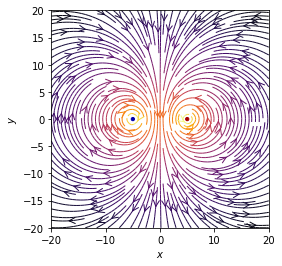

In [4]:
cones = []

# Red cone is 1 
# Blue cone is -1

cones.append((1, (5.0, 0.0)))
cones.append((-1, (-5.0, 0.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.rc('figure', figsize= ( 15.0, 15.0))
plt.show()

Classic positive and negative charge field vector plot. The orange color indicates a stronger force and then 'cools' off to the weaker black color. 

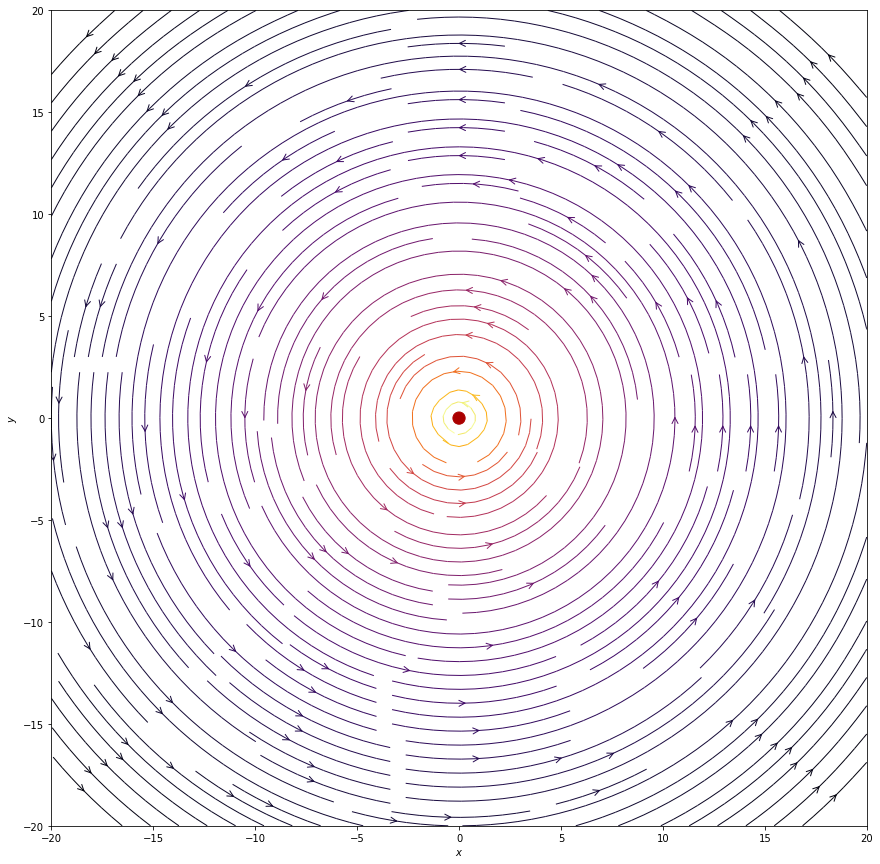

In [5]:
cones = []
cones.append((1, (0.0, 0.0)))


# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

A single charge field vector plot, normally used representing objects to stay away from in path finding algorithms.
Going back to the two charge diagram I rembered that if rotated the vector field 90 degrees I would then have a vector that pointed the way between the two charges.

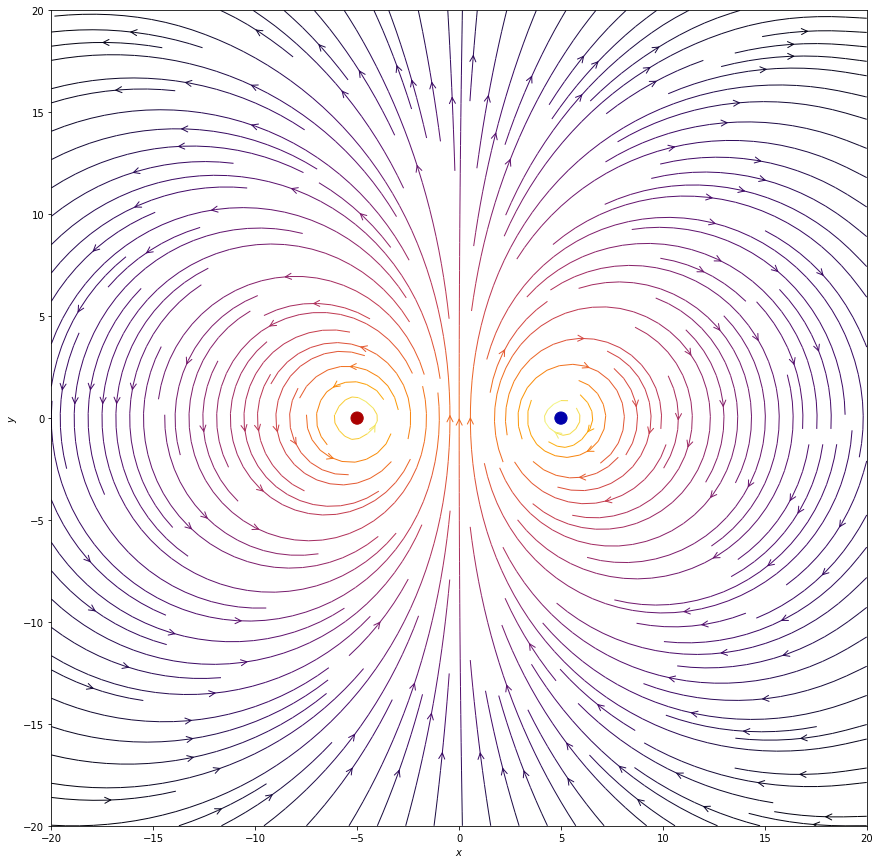

In [6]:
cones = []
cones.append((-1, (5.0, 0.0)))
cones.append((1, (-5.0, 0.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2.0 + Ey**2.0))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

Now you can see that you have a force vector that shows you the way between the two cones. How it works is a negative blue cone has a clockwise force so you pass by the blue cones on the left side. For red cones the force is changed to positive and the force is counter clockwise. Red cones you pass on the right.   

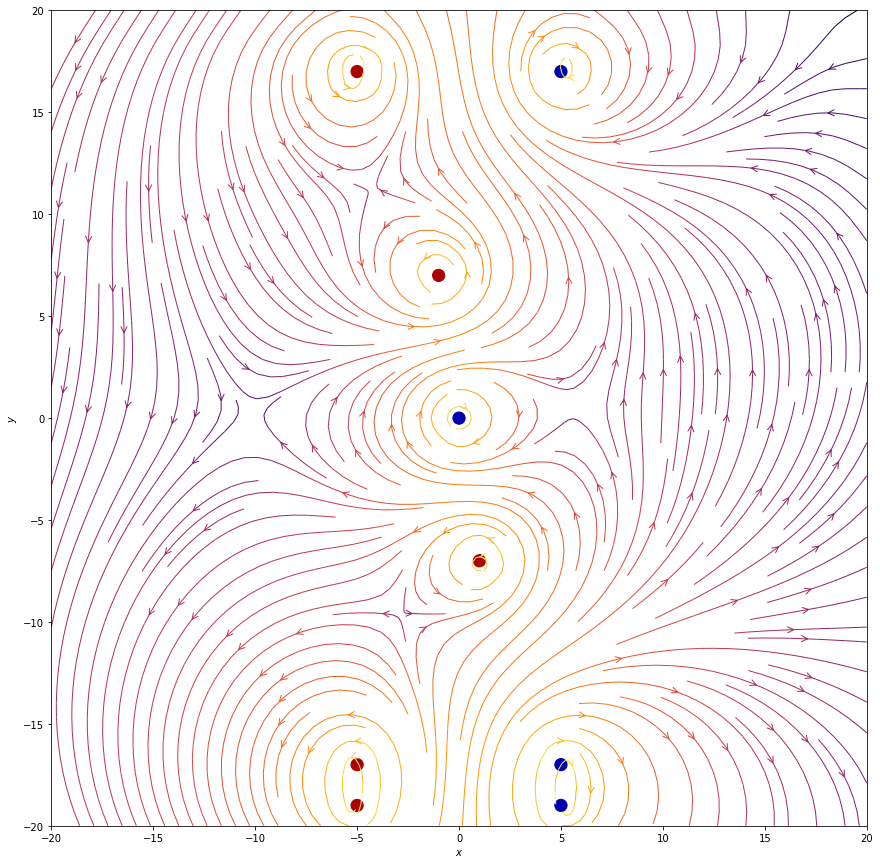

In [7]:


cones = []

#top to bottom
#finish cones
cones.append((-1, (5.0,17.0)))
cones.append((1, (-5.0, 17.0)))

# slalom cones
cones.append((1, (-1.0, 7.0)))
cones.append((-1, (0.0, 0.0)))
cones.append((1, (1.0, -7.0)))

# start cones
cones.append((-1, (5.0,-17.0)))
cones.append((1, (-5.0, -17.0)))
cones.append((-1, (5.0, -19.0)))
cones.append((1, (-5.0, -19.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for cone in cones:
    ex, ey = E(*cone, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

Imagine starting at point (0,-20). The force would be in the upwards direction. As you move up, the force would start pushing you to the right. When as you pass the first blue cone in the slalom you are directed right between the blue and the red cones. Then back between the red and the last blue cone in the slalom. Then the force directs you across the finish line at (0,17). Now if you get really off the 'line' then the force vectors are weaked and influenced by all the cones. The idea is that the cones you are closest too will have the strongest influence on your direction. My next step is to develop the code to step the virtual car through the course guided by the force. ;)

In [8]:
cones = []

#top to bottom
#finish cones
cones.append((-1, (5.0,17.0)))
cones.append((1, (-5.0, 17.0)))

# slalom cones
cones.append((1, (-1.0, 7.0)))
cones.append((-1, (0.0, 0.0)))
cones.append((1, (1.0, -7.0)))

# start cones
cones.append((-1, (5.0,-17.0)))
cones.append((1, (-5.0, -17.0)))
cones.append((-1, (5.0, -19.0)))
cones.append((1, (-5.0, -19.0)))

# Artificial field vector, E=(Ex, Ey), as separate components
#Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

Xpos = 0.0
Ypos = -19.0
path = []
speed = 1.0
tries = 0
angle = -np.pi/2.0
print(Xpos, Ypos)
while not(Xpos < 5.0 and Xpos > -5.0 and Ypos > 17.0) and tries < 80:
    Ex = 0.0
    Ey = 0.0
    for cone in cones:
        ex, ey = E(*cone, x=Xpos, y=Ypos)
        Ex += ex
        Ey += ey
    
    #print(Ex,Ey)
    angle = np.arctan2(Ey, Ex)    
    print(np.arctan2(Ey, Ex)*180/np.pi)
    newx=  np.cos(angle) * speed
    newy= np.sin(angle) * speed
    Xpos += newx
    Ypos += newy
    path.append((Xpos,Ypos))
    tries += 1
    print (newx, newy)
    print(Xpos, Ypos)
    #time.sleep(.5)

0.0 -19.0
85.6166419404
0.0764294242892 0.997074993721
0.0764294242892 -18.0029250063
85.3064451967
0.0818263964685 0.996646597767
0.158255820758 -17.0062784085
83.930922372
0.105727414479 0.994395149741
0.263983235237 -16.0118832588
81.2203410724
0.152634987108 0.988282631999
0.416618222345 -15.0236006268
76.7478021592
0.229237729152 0.973370465718
0.645855951497 -14.0502301611
70.0766389998
0.340762902175 0.940149267139
0.986618853672 -13.1100808939
61.2219306139
0.48141822243 0.876491012568
1.4680370761 -12.2335898813
51.7184039987
0.619526921515 0.784975409499
2.08756399762 -11.4486144718
44.9331688354
0.707931086199 0.706281514123
2.79549508382 -10.7423329577
43.3409810442
0.727282037114 0.686338719942
3.52277712093 -10.0559942378
46.6123530422
0.686930844423 0.726722791015
4.20970796535 -9.32927144677
53.2806812641
0.597895452142 0.801574094085
4.8076034175 -8.52769735268
62.1864242272
0.466596221573 0.884470443833
5.27419963907 -7.64322690885
72.6876423011
0.297580792388 0.95469

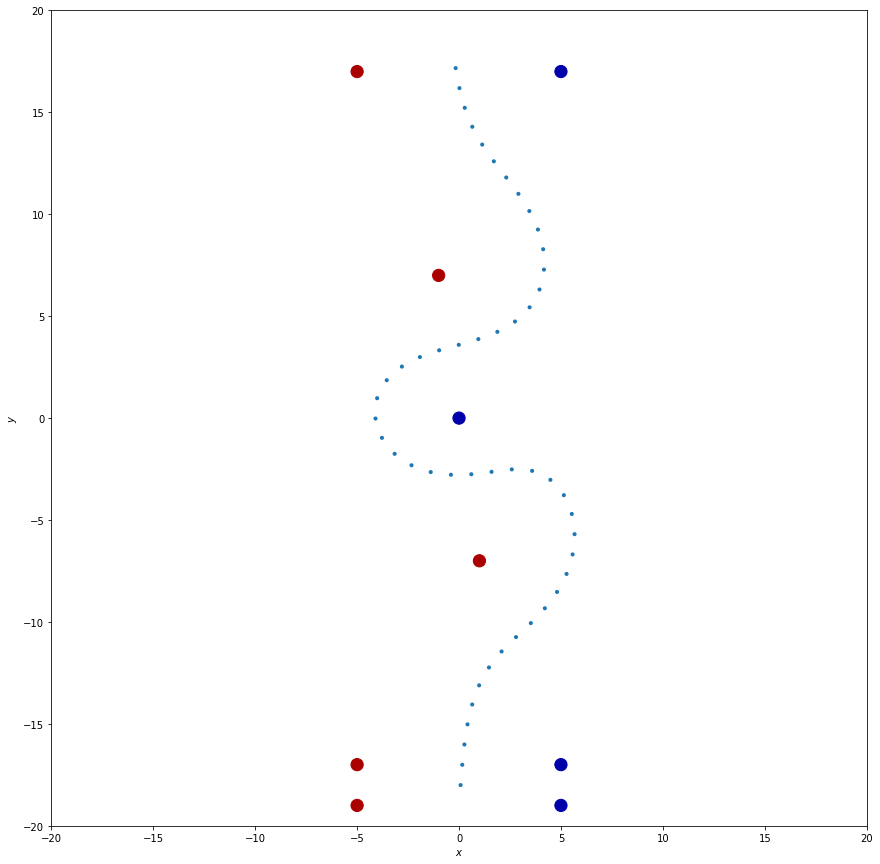

In [9]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 0.3, color=cone_colors[q>0]))
    
for pos in path:
     ax.add_artist(Circle(pos, 0.1))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')
plt.show()

yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


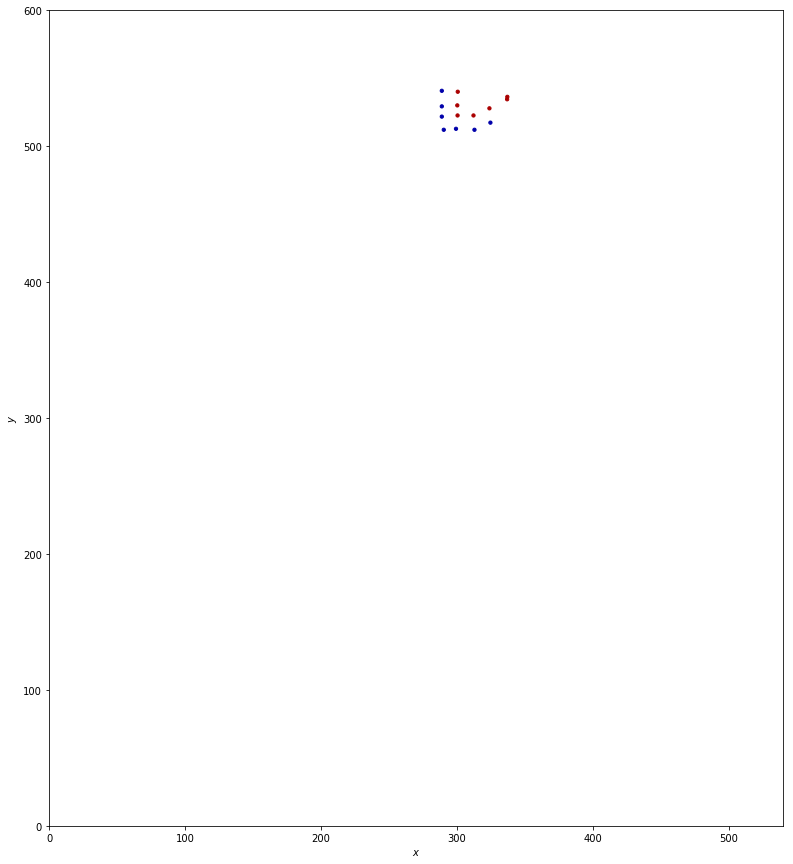

angle -90.0
move (0.28300939358692556, -0.95911713734119075)
293.283009394 557.040882863
1
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


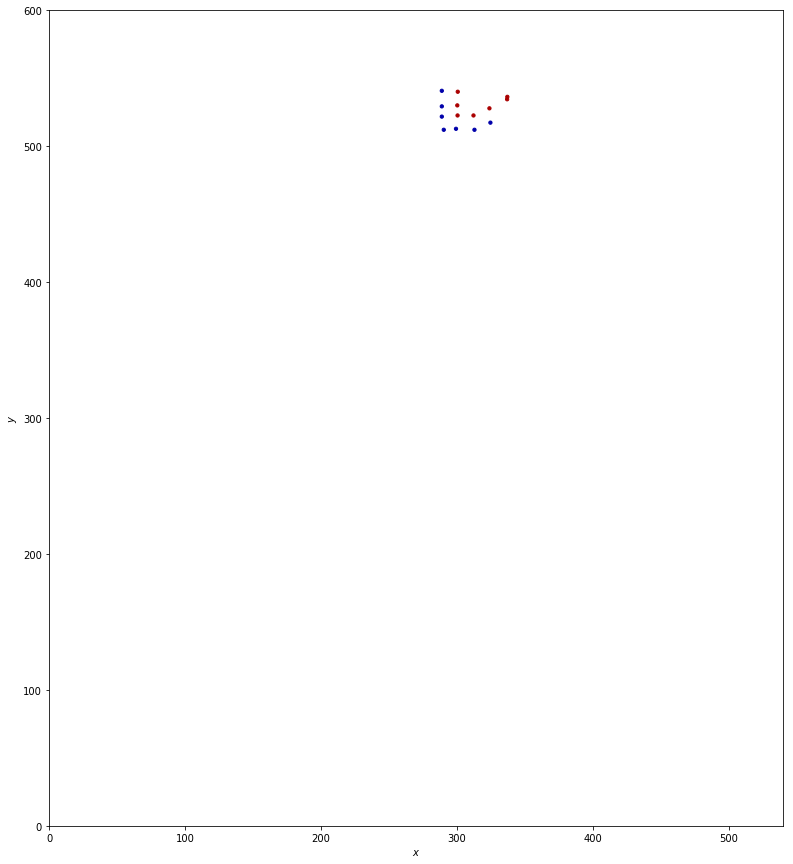

angle -73.5601028626
move (0.27223238211845224, -0.96223153665119132)
293.555241776 556.078651326
2
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


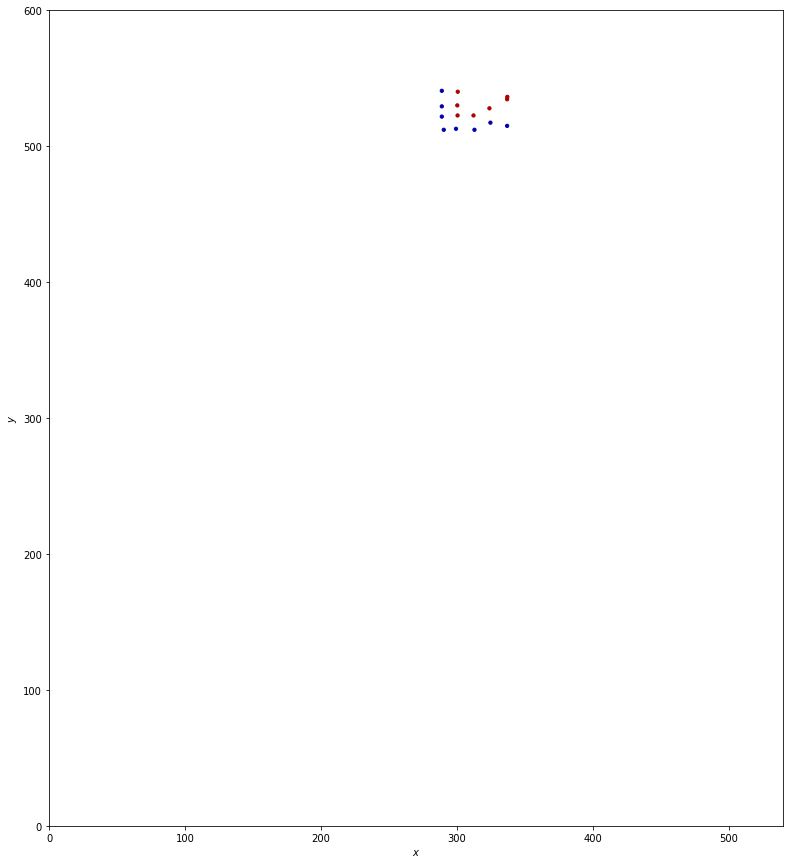

angle -74.2028501221
move (0.3655002351855941, -0.93081124728876985)
293.920742011 555.147840079
3
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


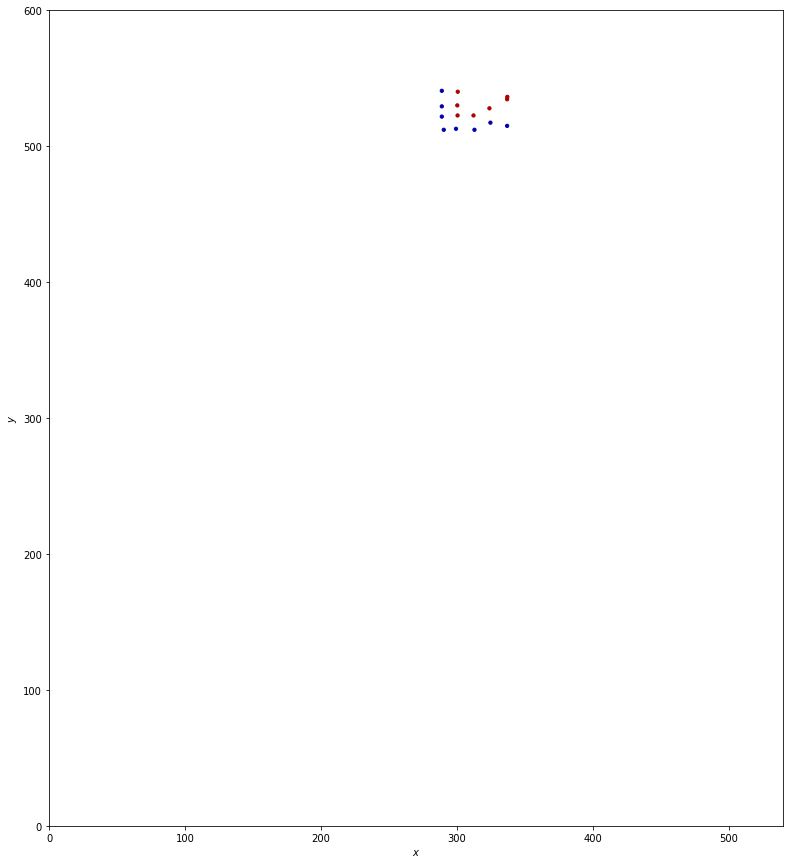

angle -68.561628731
move (0.33604403868244526, -0.94184627411589372)
294.25678605 554.205993805
4
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


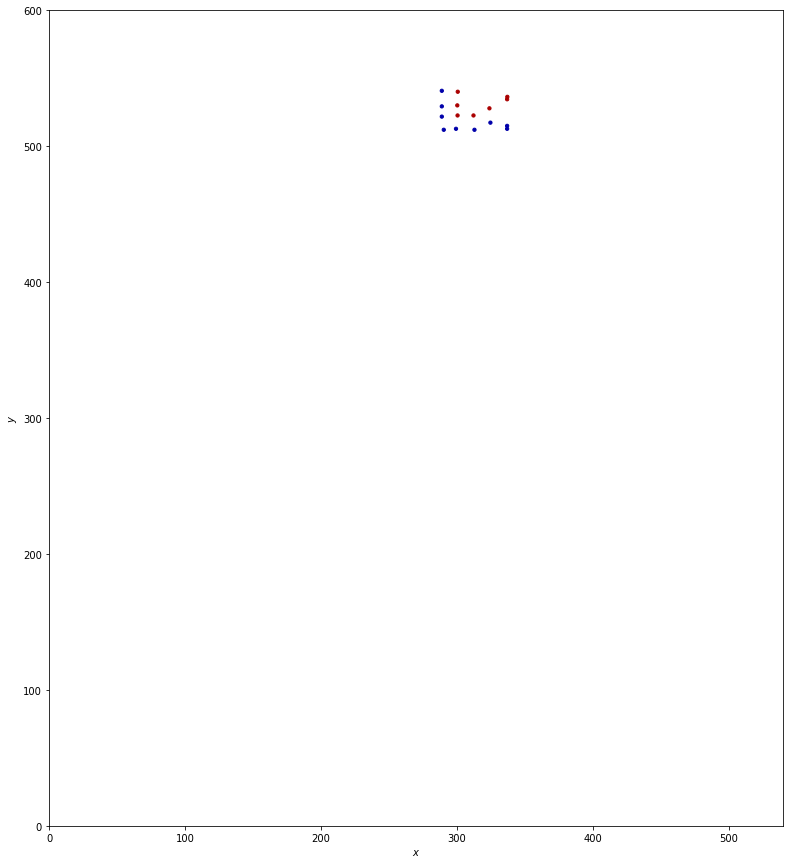

angle -70.3639620988
move (0.4019810506107136, -0.91564798637353373)
294.6587671 553.290345818
5
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


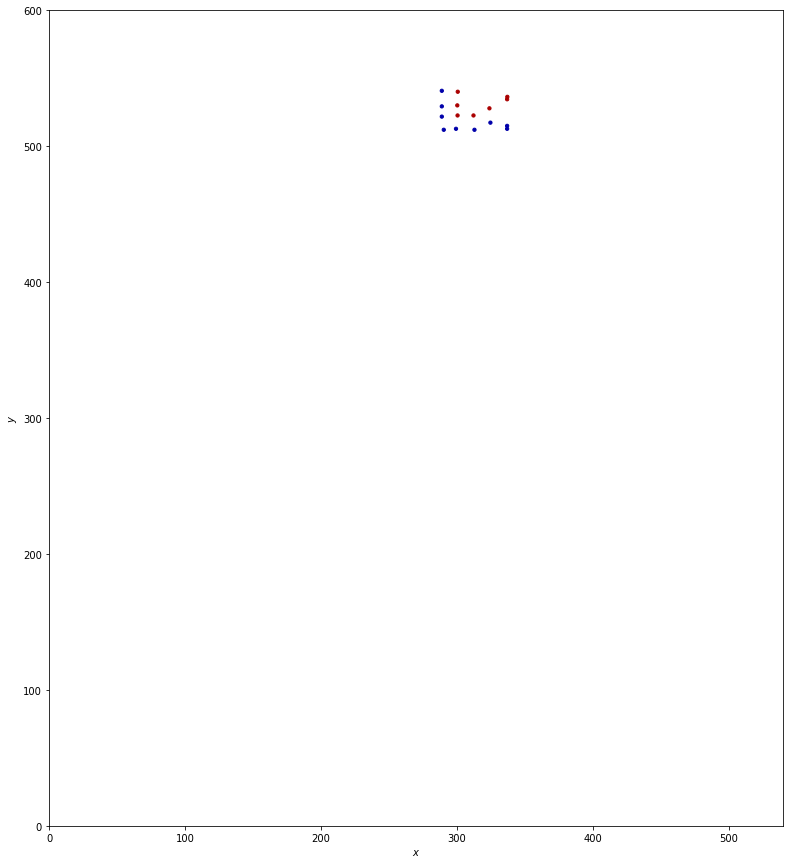

angle -66.2979179313
move (0.35376409959733102, -0.93533467905134882)
295.0125312 552.355011139
6
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


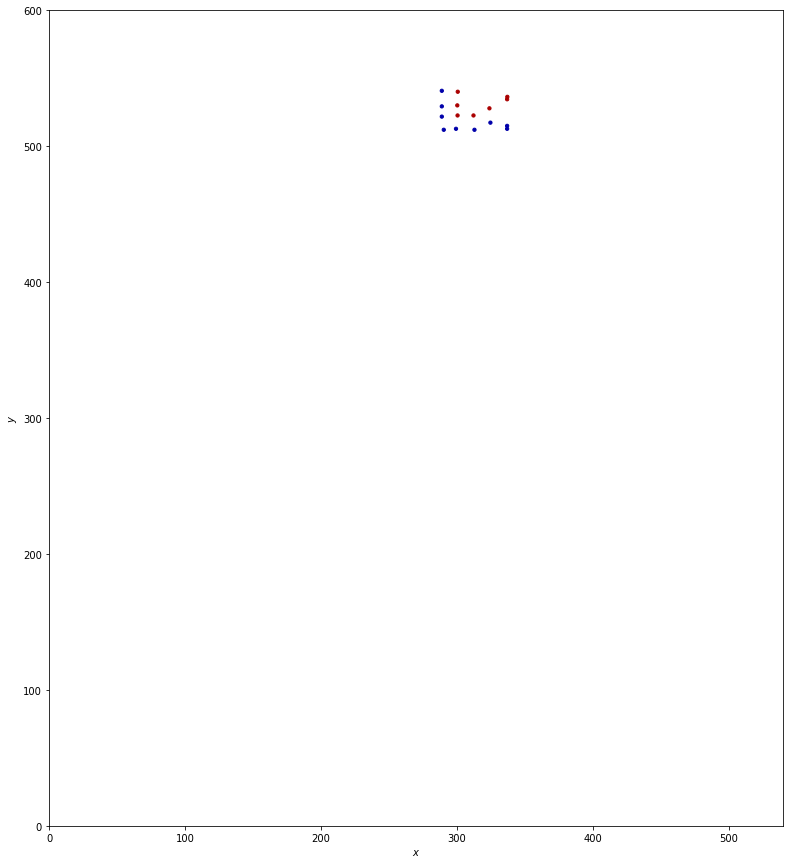

angle -69.2822820974
move (0.30345412734979316, -0.95284604873734746)
295.315985327 551.40216509
7
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


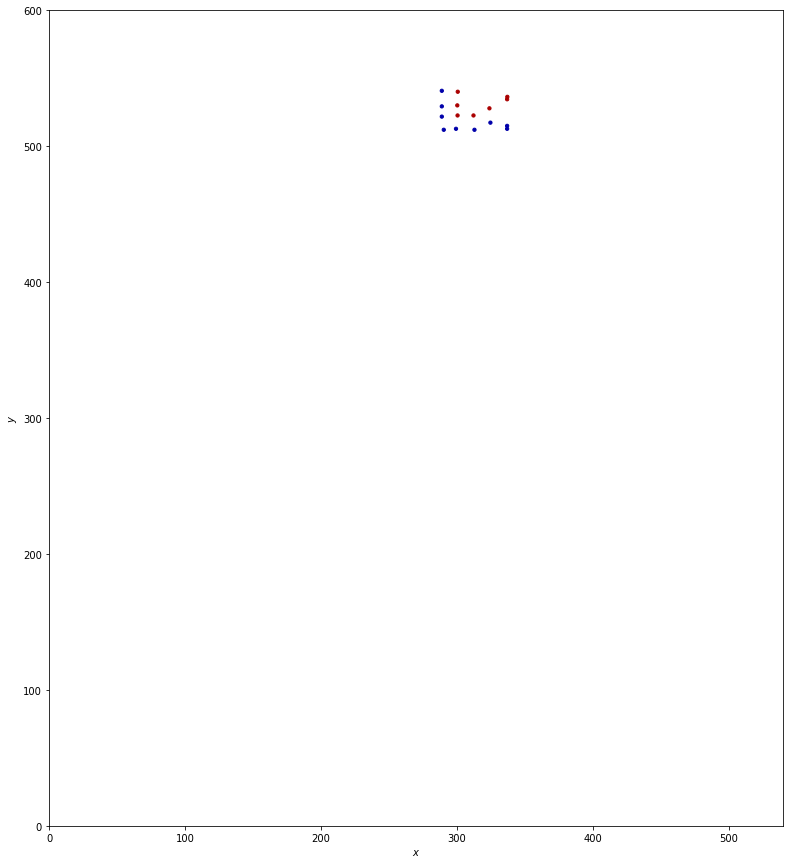

angle -72.3348153434
move (0.25142663704367935, -0.96787635893481039)
295.567411964 550.434288732
8
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


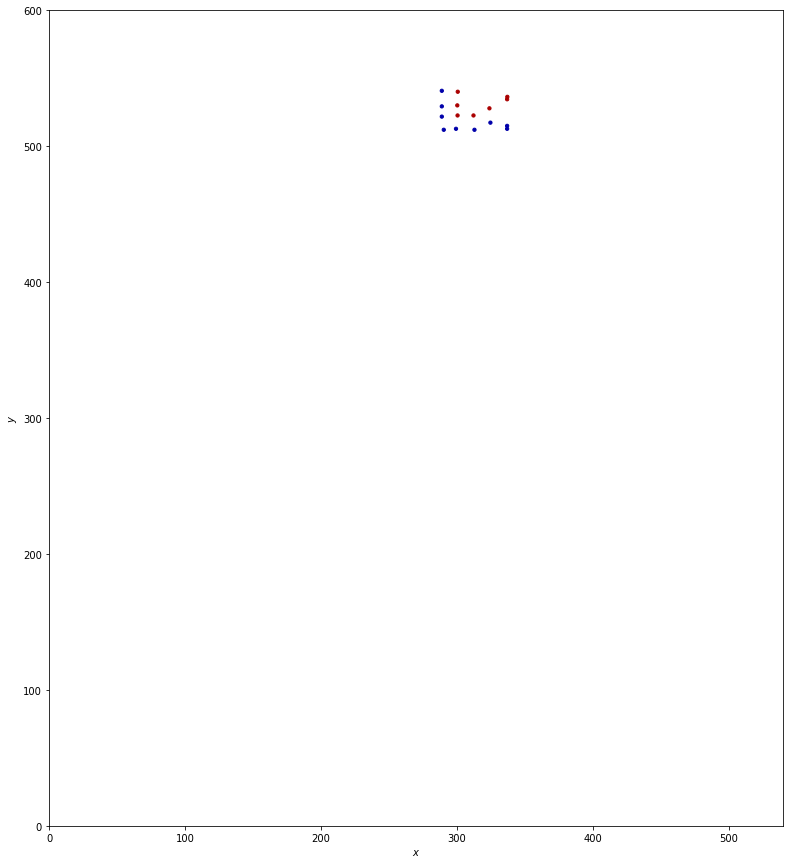

angle -75.4380507192
move (0.19834010638914132, -0.98013325736735624)
295.765752071 549.454155474
9
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


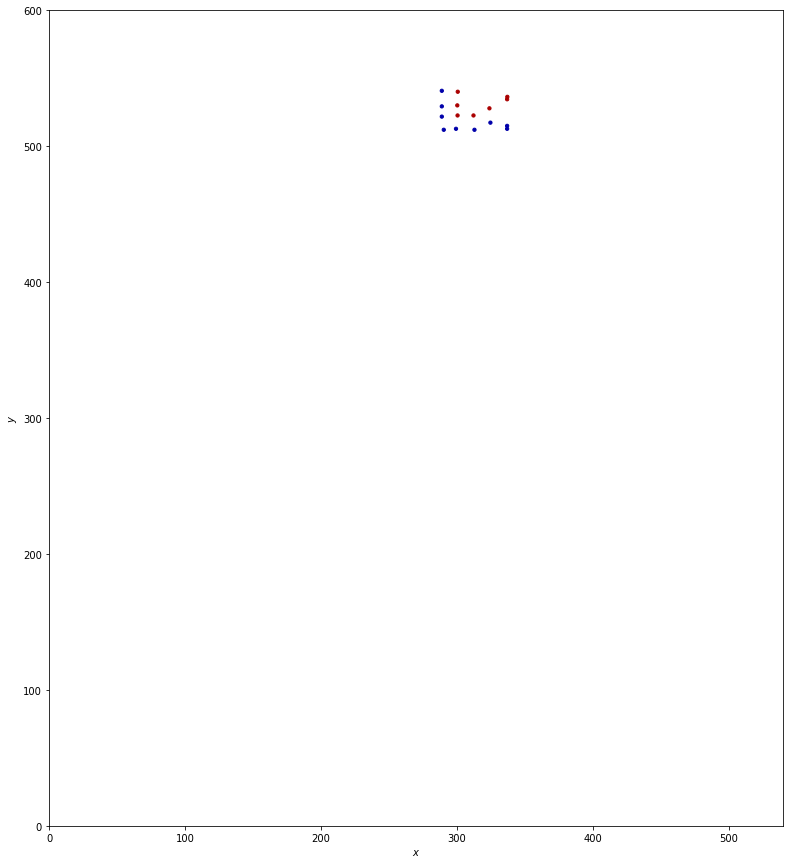

angle -78.5600902665
move (0.14524597685276902, -0.98939557620199858)
295.910998047 548.464759898
10
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


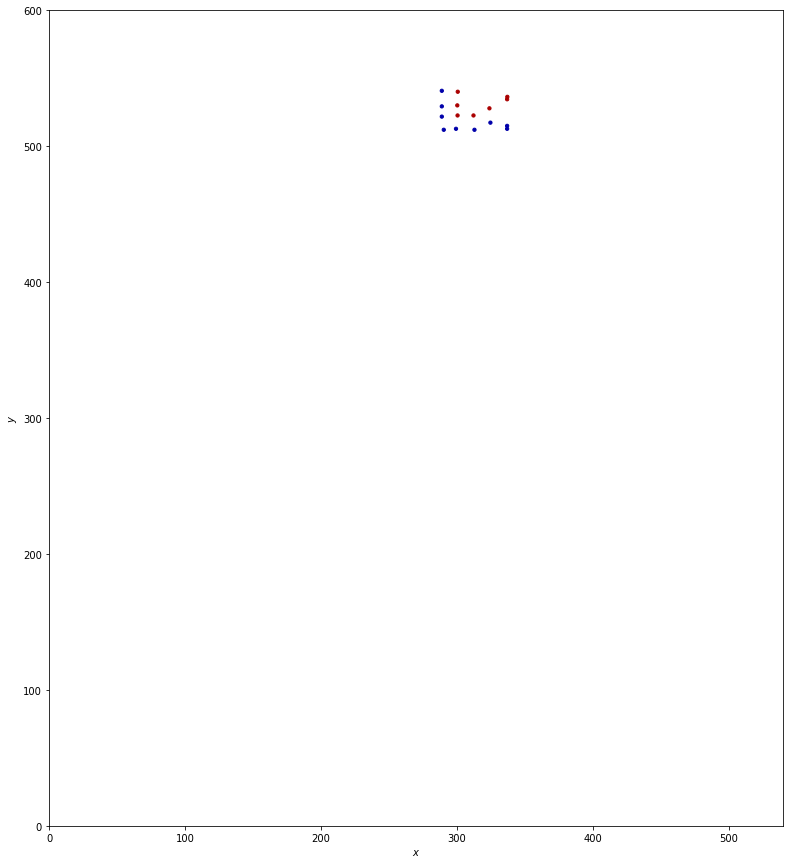

angle -81.6484765807
move (0.093699565318727238, -0.99560051800864469)
296.004697613 547.46915938
11
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


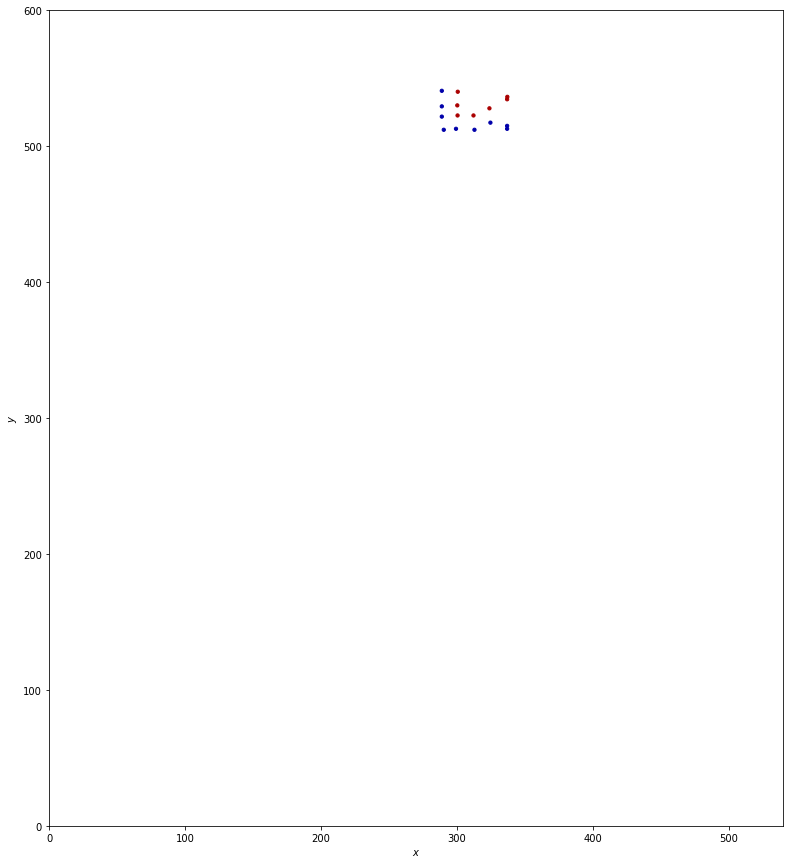

angle -84.6235234795
move (0.045837671946352528, -0.99894890151125271)
296.050535285 546.470210478
12
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


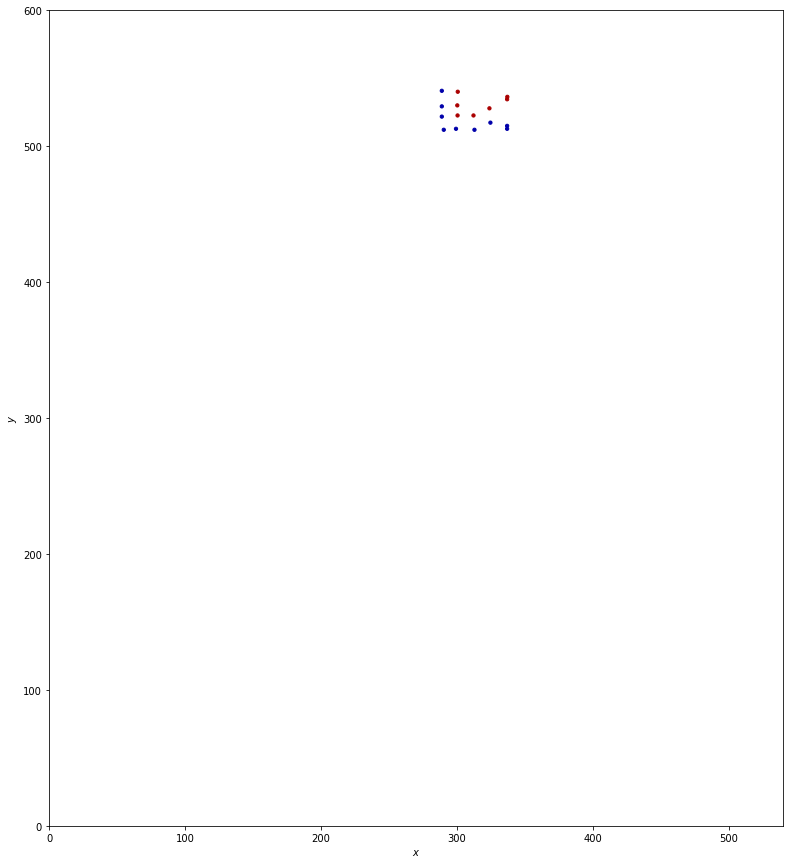

angle -87.3727742993
move (0.0043713343638687478, -0.999990445672297)
296.054906619 545.470220033
13
yes 1 (337.0497, 534.6002)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


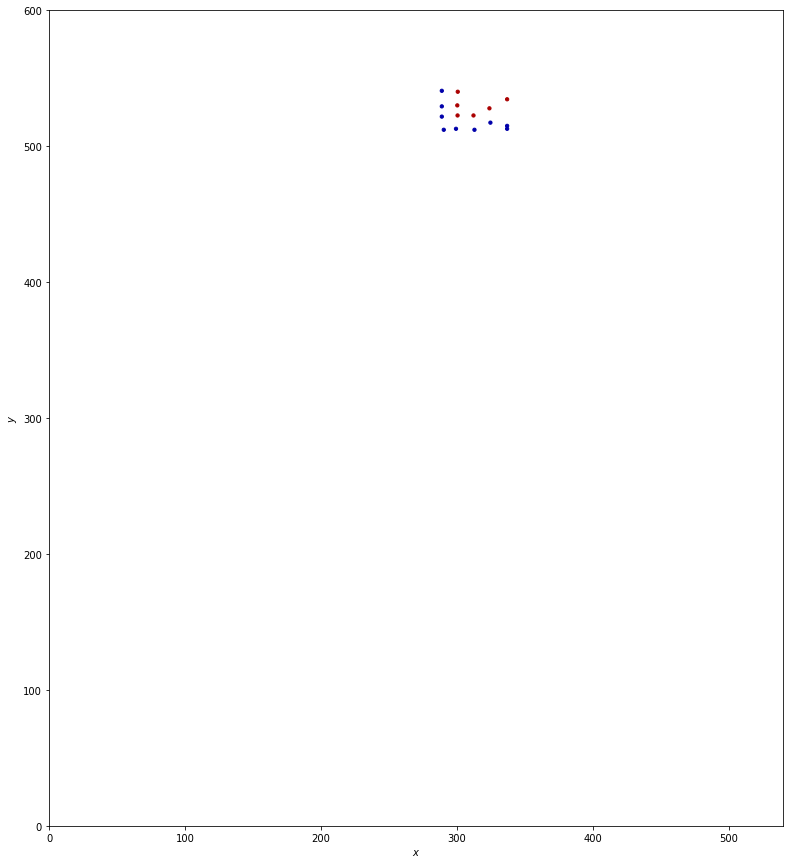

angle -89.7495401925
move (-0.014951090417354646, -0.99988822620097495)
296.039955529 544.470331807
14
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (297.1497, 558.3002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes -1 (288.9881, 558.1653)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


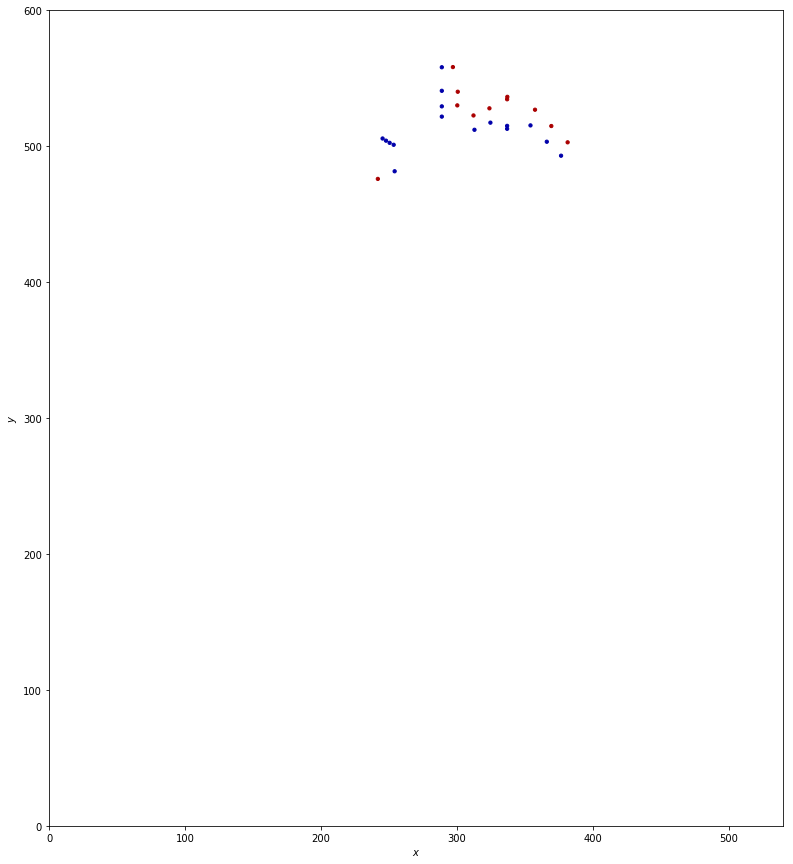

angle -90.8566662979
move (0.055105546992564869, -0.99848053495831868)
296.095061076 543.471851272
15
yes 1 (337.0497, 534.6002)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


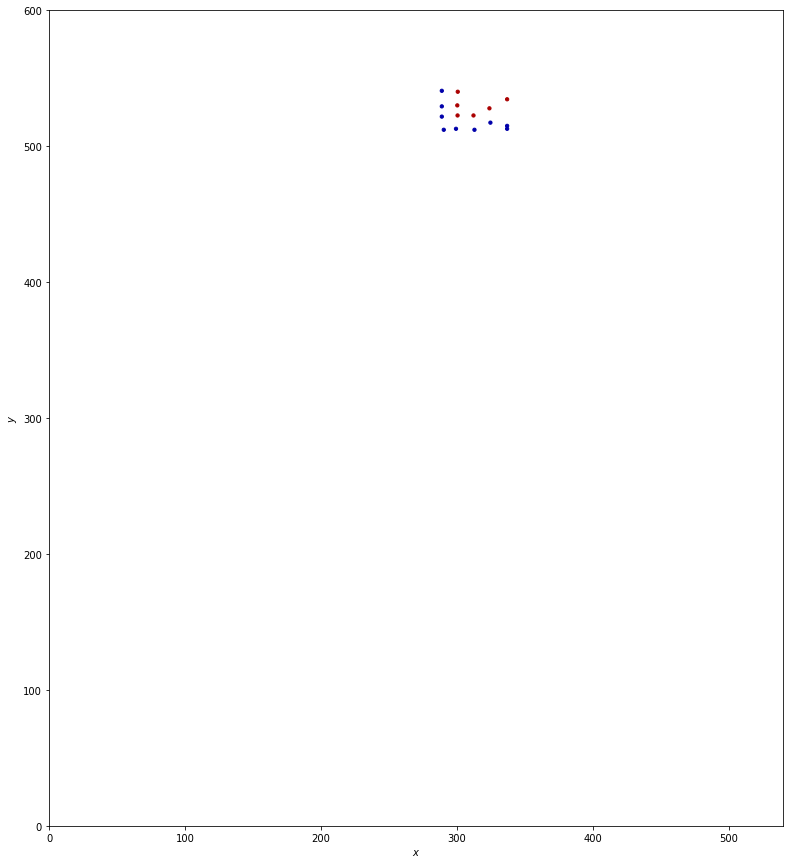

angle -86.8410846136
move (-0.062465346665766454, -0.99804713338896256)
296.032595729 542.473804138
16
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (297.1497, 558.3002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes -1 (288.9881, 558.1653)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


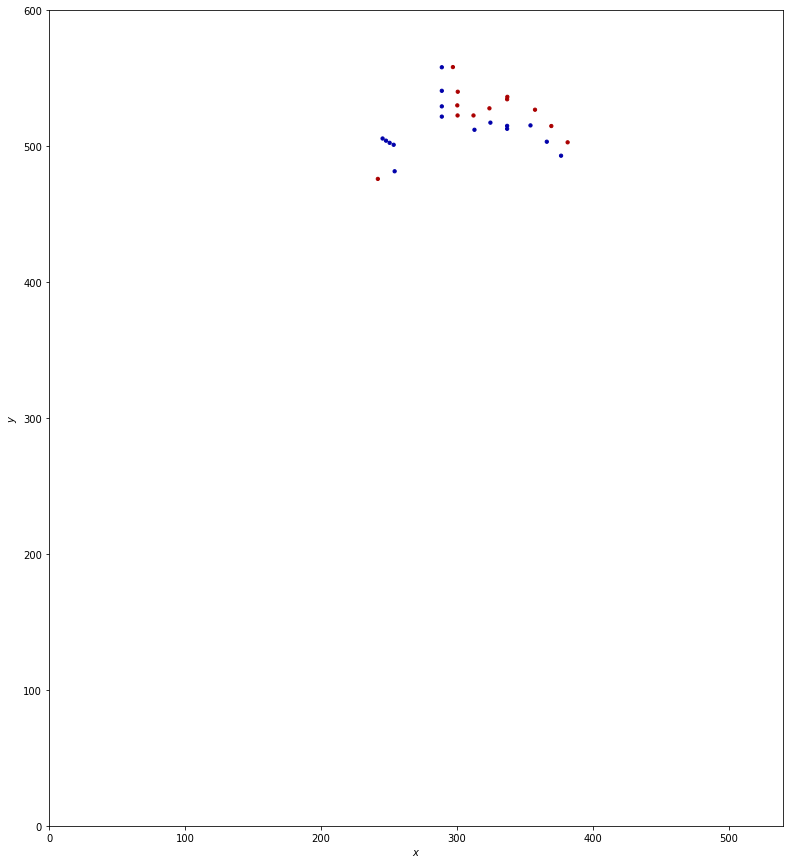

angle -93.5813323215
move (-0.059669133925671941, -0.99821820984019327)
295.972926595 541.475585928
17
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (297.1497, 558.3002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes -1 (288.9881, 558.1653)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)
yes -1 (196.4097, 532.5602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


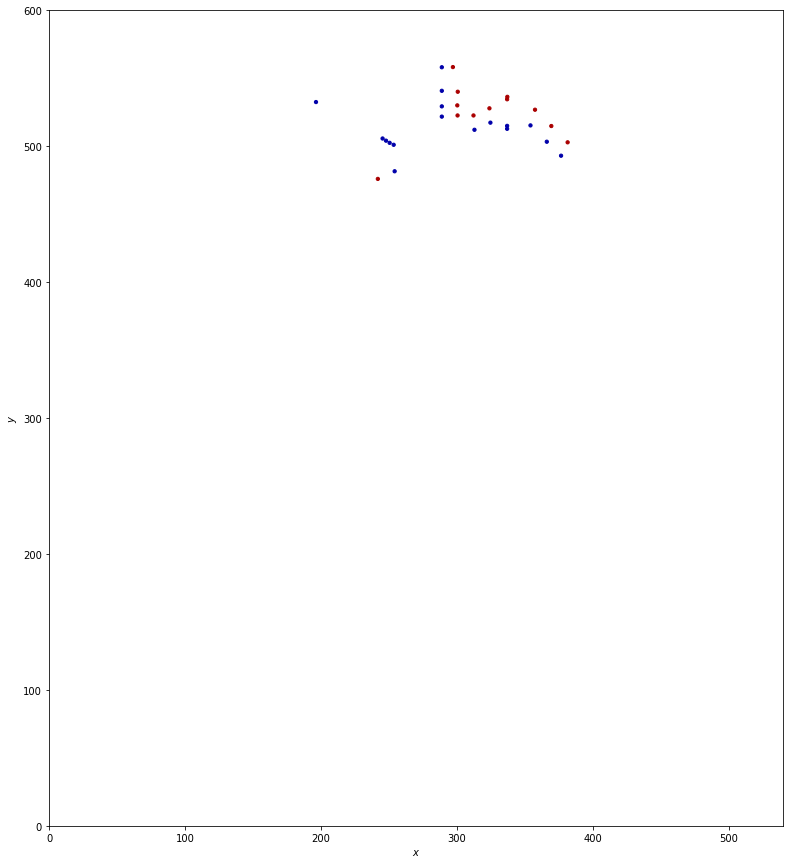

angle -93.4208215113
move (-0.032640375490435865, -0.99946716098521382)
295.94028622 540.476118767
18
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (297.1497, 558.3002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes -1 (288.9881, 558.1653)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)
yes -1 (196.4097, 532.5602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


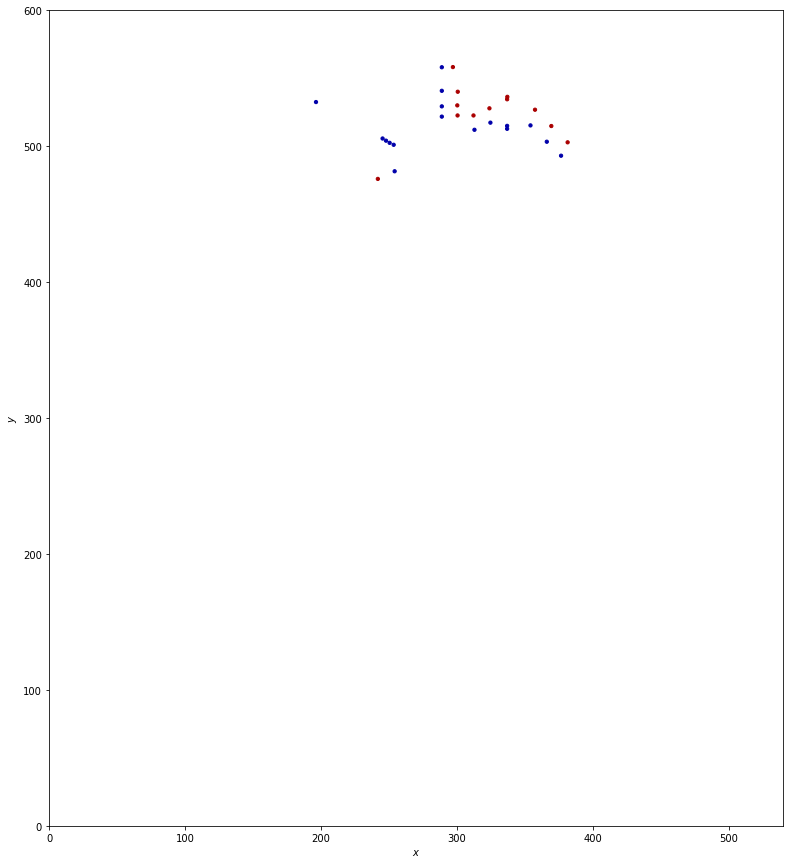

angle -91.8704879921
move (0.00467807548031171, -0.99998905774503377)
295.944964295 539.47612971
19
yes 1 (300.3891, 530.1002)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


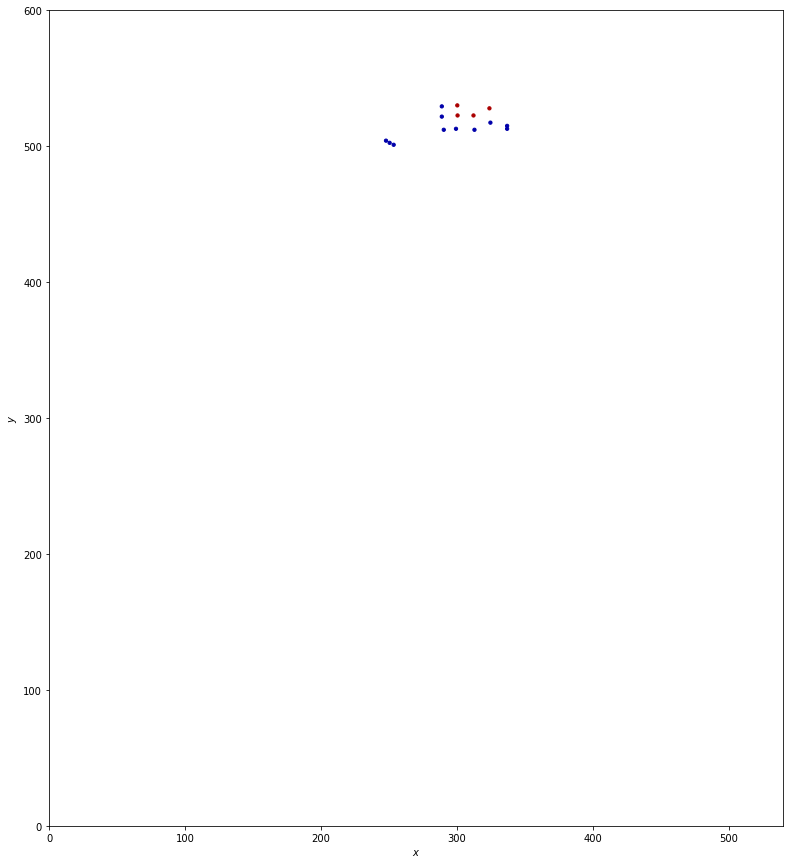

angle -89.7319650411
move (0.43408936055583874, -0.9008698169281858)
296.379053656 538.575259893
20
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (253.5597, 501.1201)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


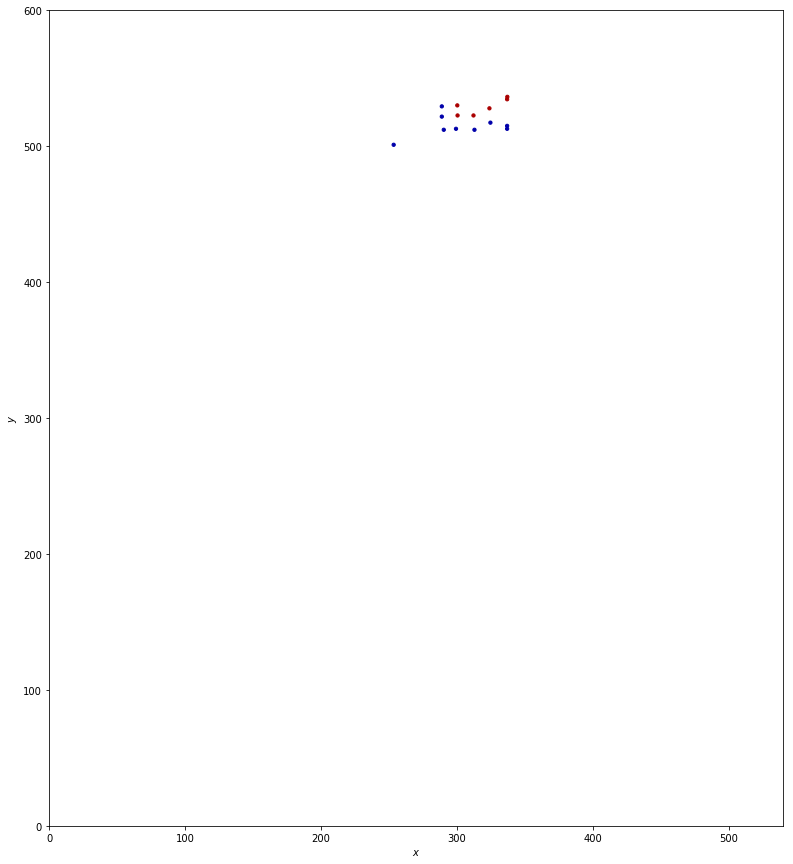

angle -64.2726373764
move (0.21302399145064396, -0.97704696871053032)
296.592077647 537.598212924
21
yes 1 (337.0497, 534.6002)
yes 1 (300.3891, 530.1002)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


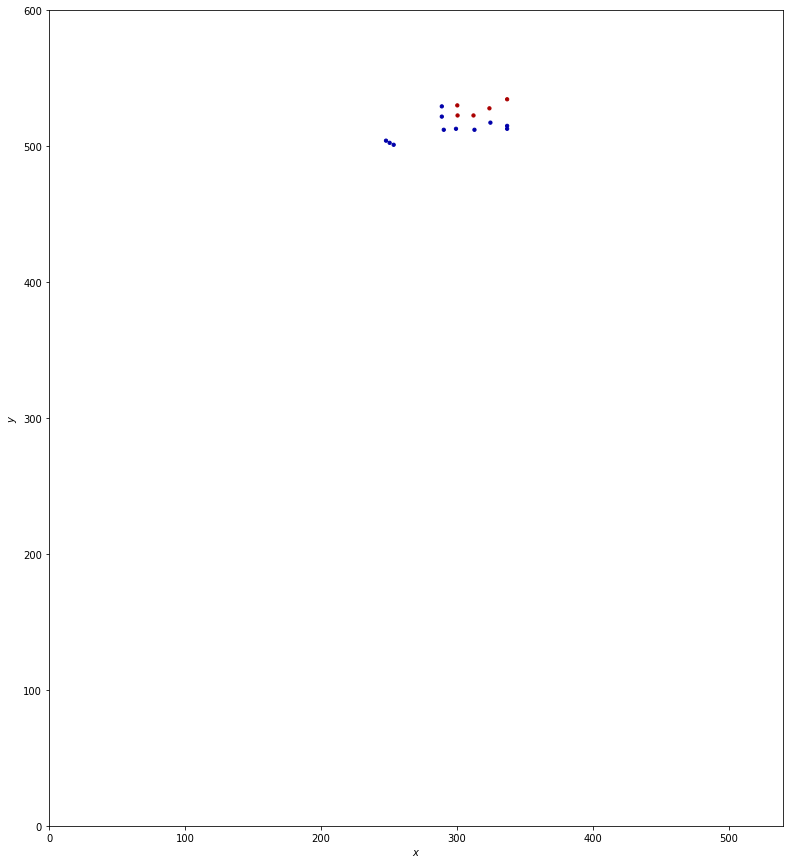

angle -77.7003750042
move (0.20773171562079004, -0.97818583833811623)
296.799809363 536.620027086
22
yes 1 (300.3891, 530.1002)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


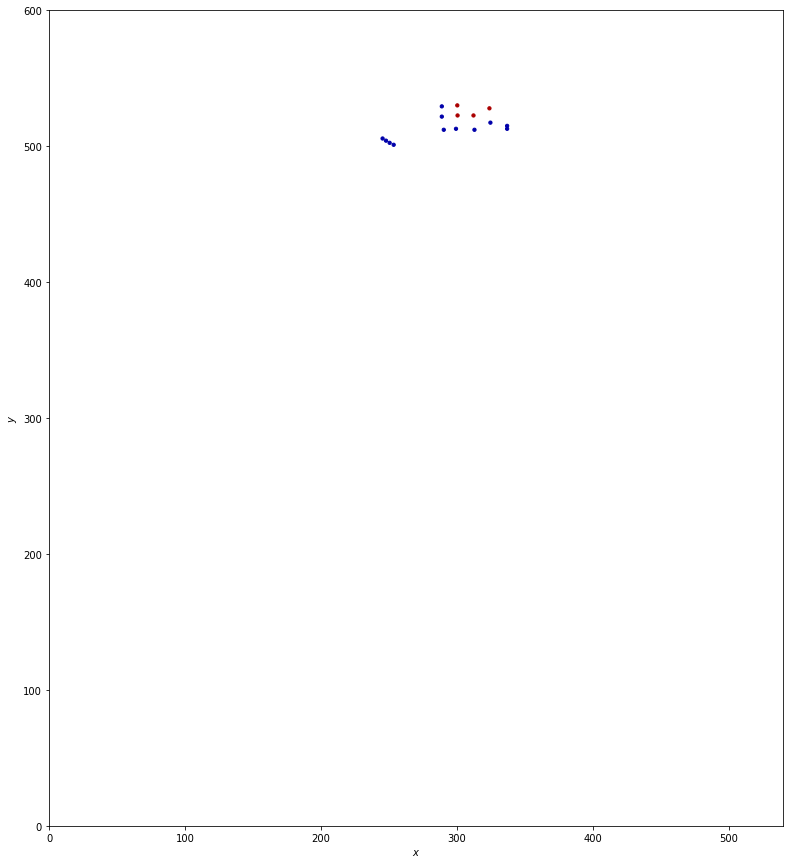

angle -78.0105419853
move (0.15249131192643084, -0.98830481117262403)
296.952300675 535.631722274
23
yes 1 (300.3891, 530.1002)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


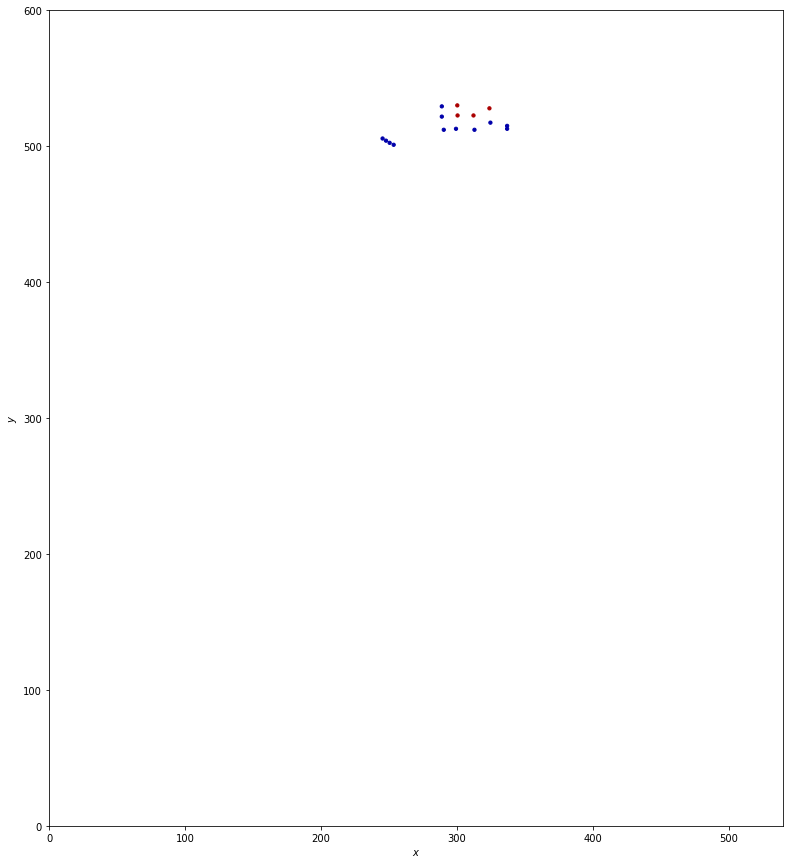

angle -81.2286705612
move (0.055818088569732201, -0.99844095518384135)
297.008118763 534.633281319
24
yes 1 (300.3891, 530.1002)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


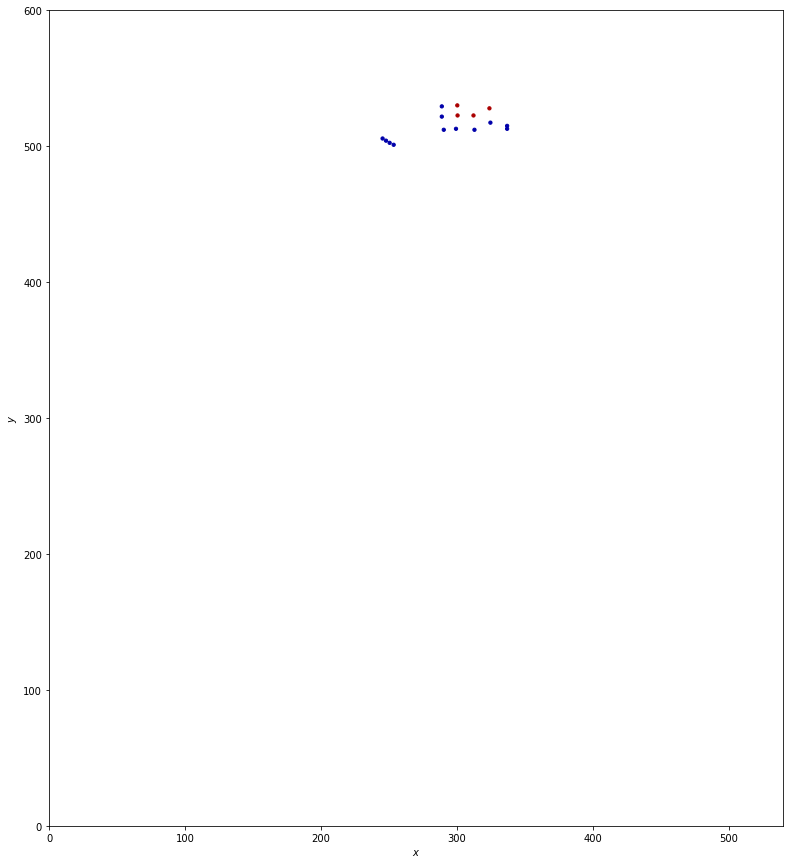

angle -86.8001960523
move (-0.017667575495231489, -0.99984391620698487)
296.990451188 533.633437403
25
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (297.1497, 558.3002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes -1 (288.9881, 558.1653)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


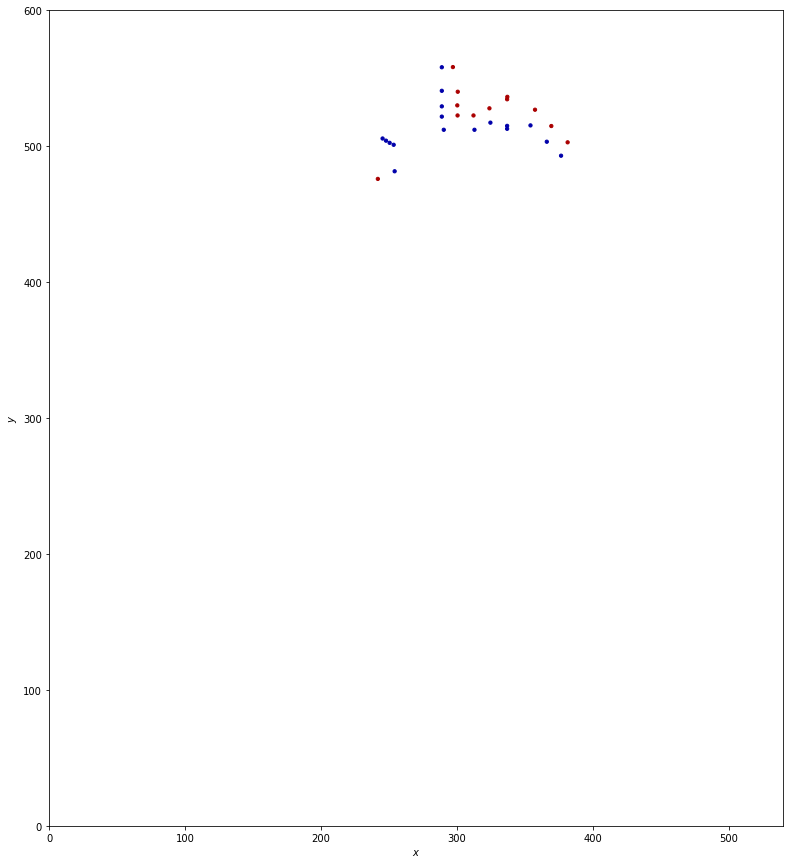

angle -91.0123301801
move (0.019855764586998677, -0.99980285487323239)
297.010306952 532.633634548
26
yes 1 (300.3891, 530.1002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)


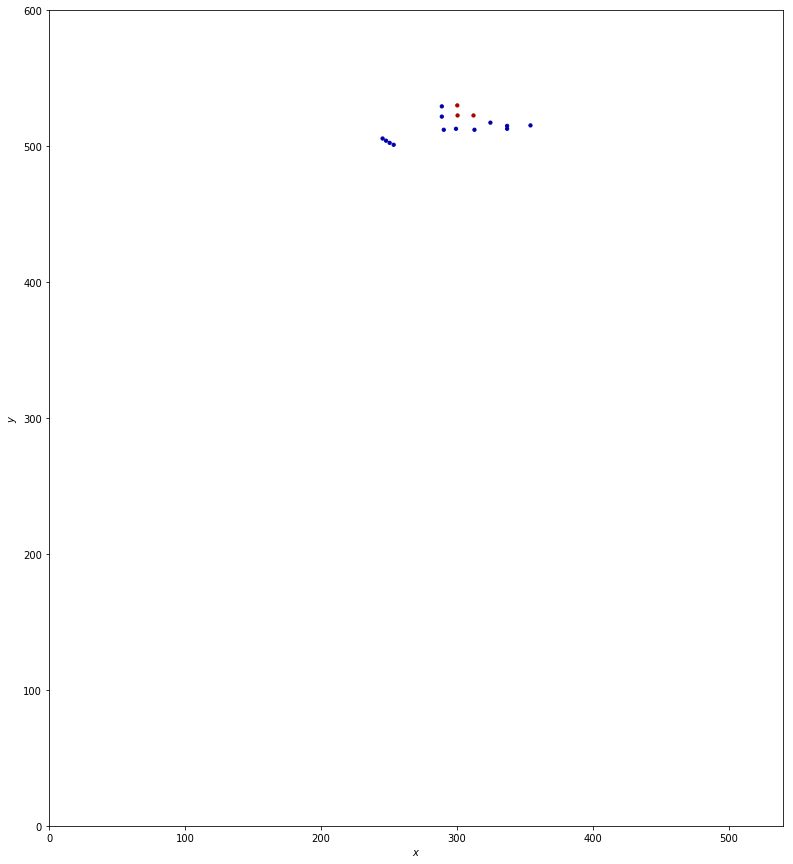

angle -88.8622737234
move (-0.047409838705480371, -0.99887552137086644)
296.962897114 531.634759027
27
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (297.1497, 558.3002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes -1 (288.9881, 558.1653)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


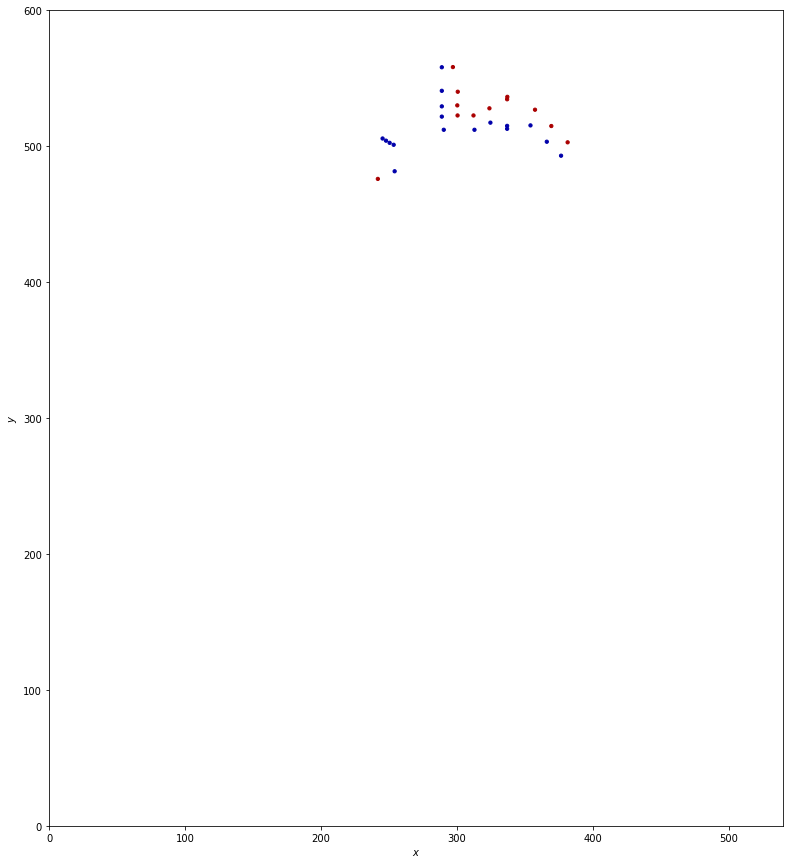

angle -92.7174022952
move (0.0053326509464127073, -0.99998578131585636)
296.968229764 530.634773246
28
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)


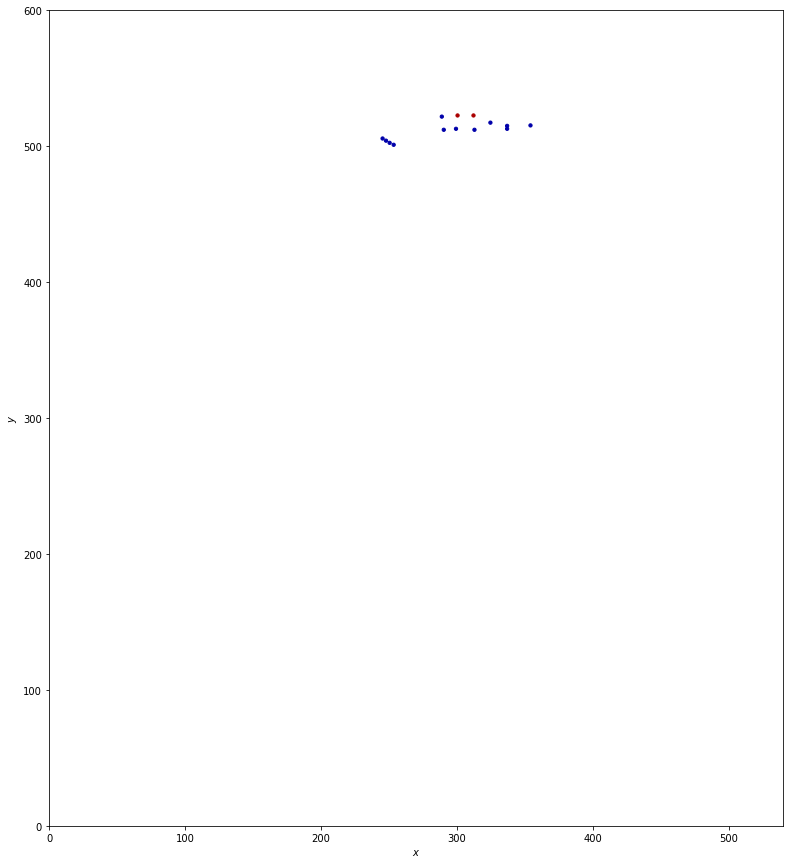

angle -89.694460159
move (0.65884782440278966, -0.75227624200137466)
297.627077589 529.882497004
29
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


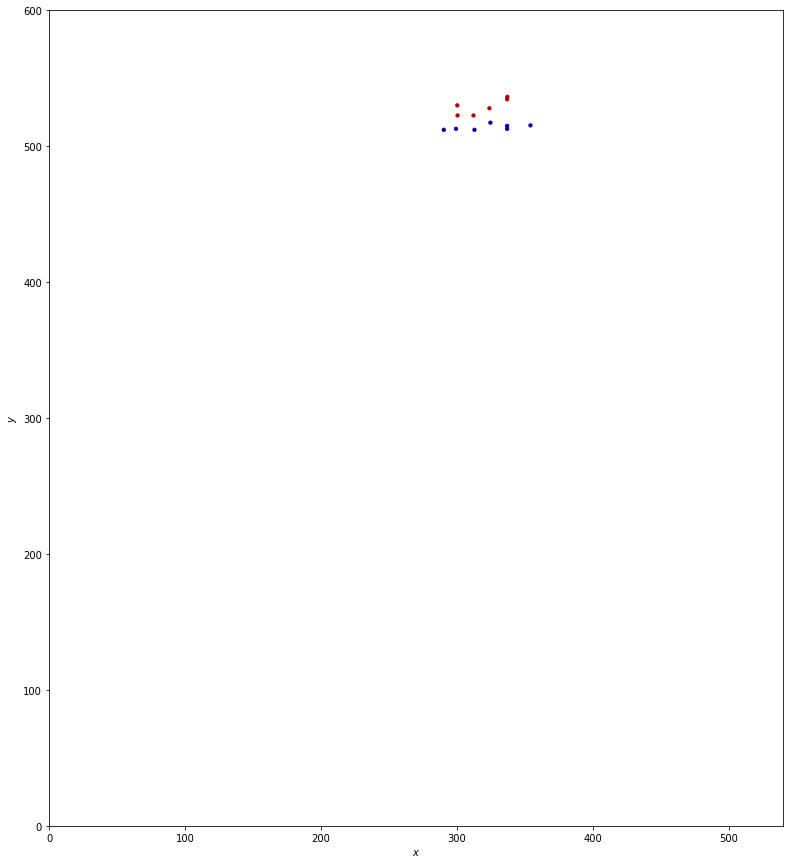

angle -48.7879395781
move (0.070793679109881699, -0.99749097990813285)
297.697871268 528.885006024
30
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)


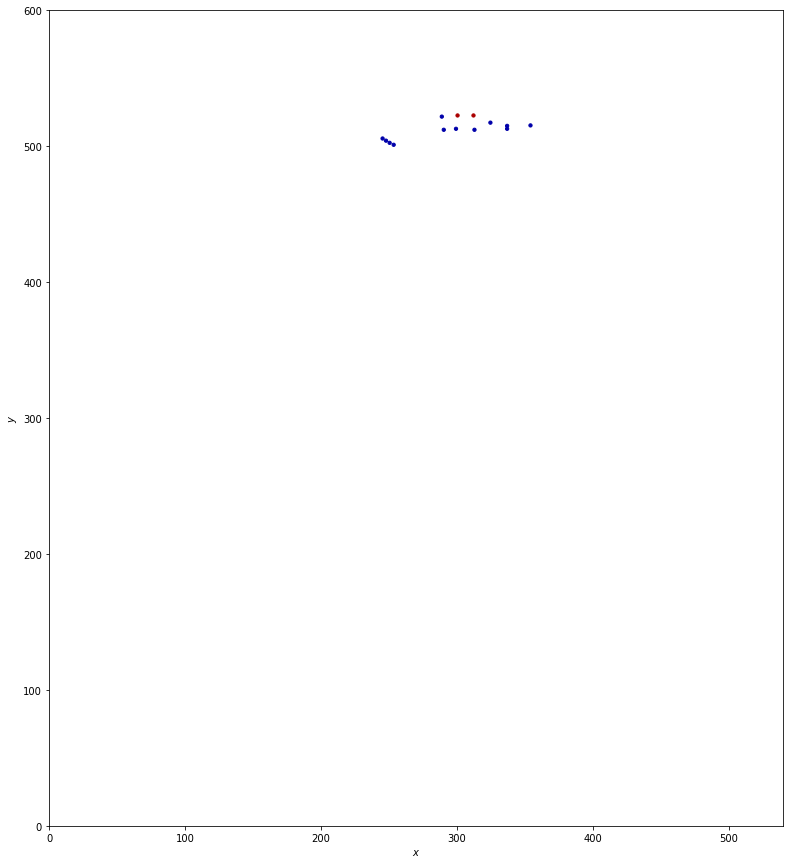

angle -85.9404252177
move (0.41047083610700302, -0.91187372629417163)
298.108342104 527.973132297
31
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


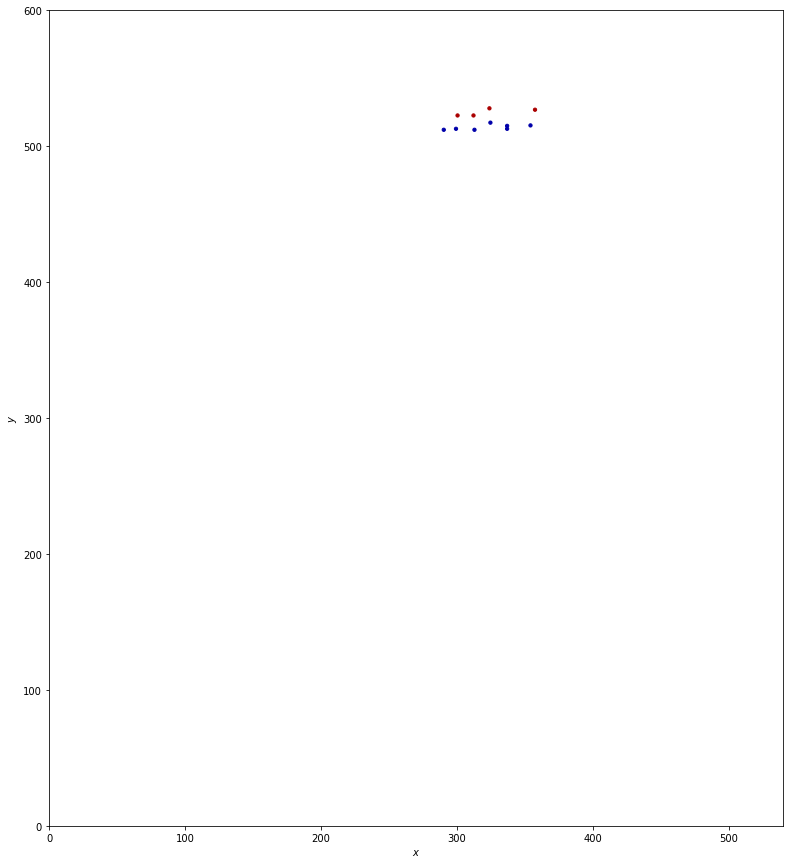

angle -65.7655845802
move (-0.32939501591848463, -0.94419220685624239)
297.778947088 527.02894009
32
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (297.1497, 558.3002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes -1 (288.9881, 558.1653)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


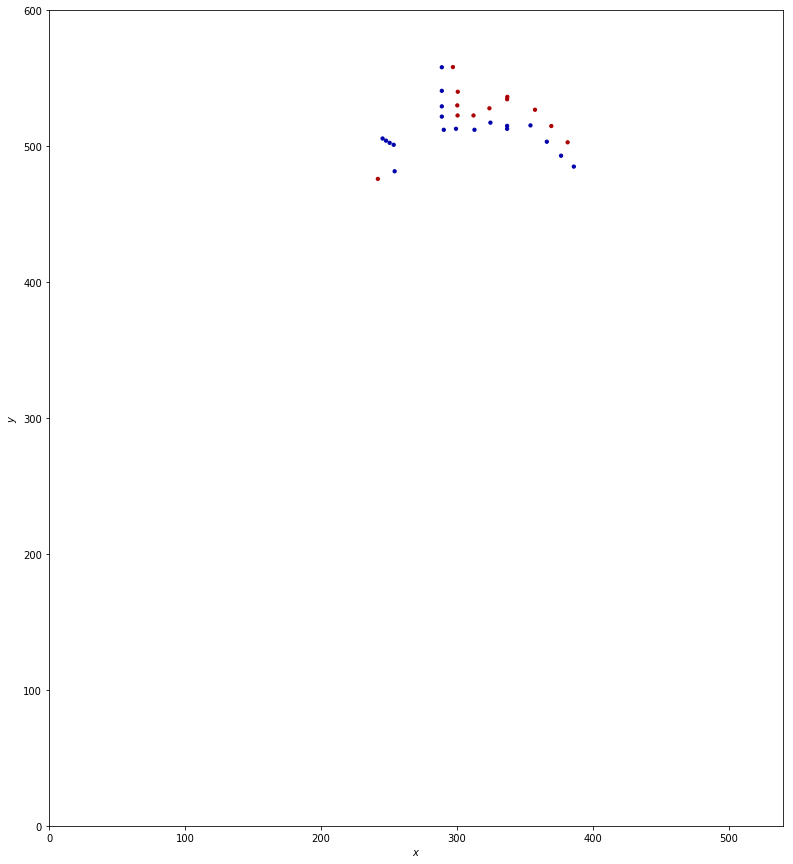

angle -109.232059544
move (0.3858175176705938, -0.92257511513074153)
298.164764606 526.106364975
33
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


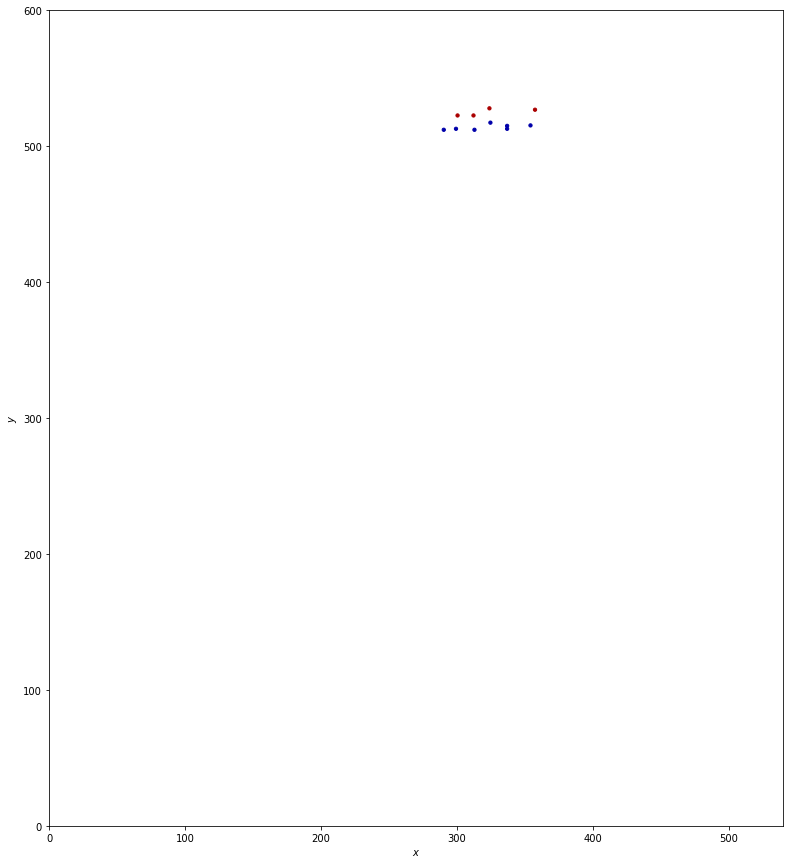

angle -67.3054978622
move (-0.36985436918179676, -0.92908974033574132)
297.794910237 525.177275235
34
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (297.1497, 558.3002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes -1 (288.9881, 558.1653)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


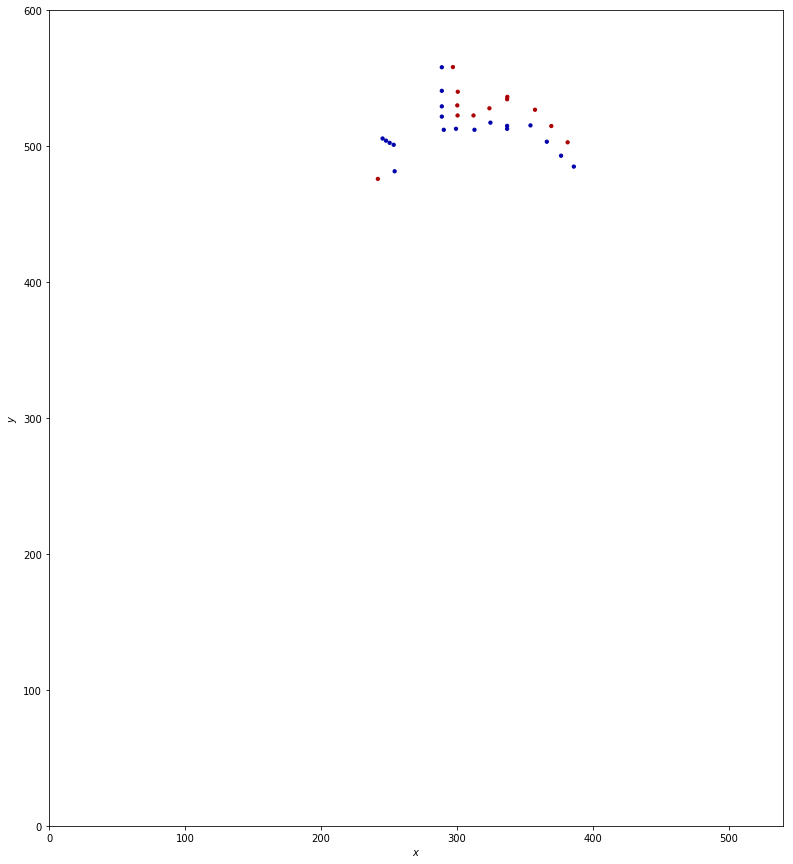

angle -111.706636136
move (0.26289811057289419, -0.96482360224924135)
298.057808347 524.212451633
35
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)


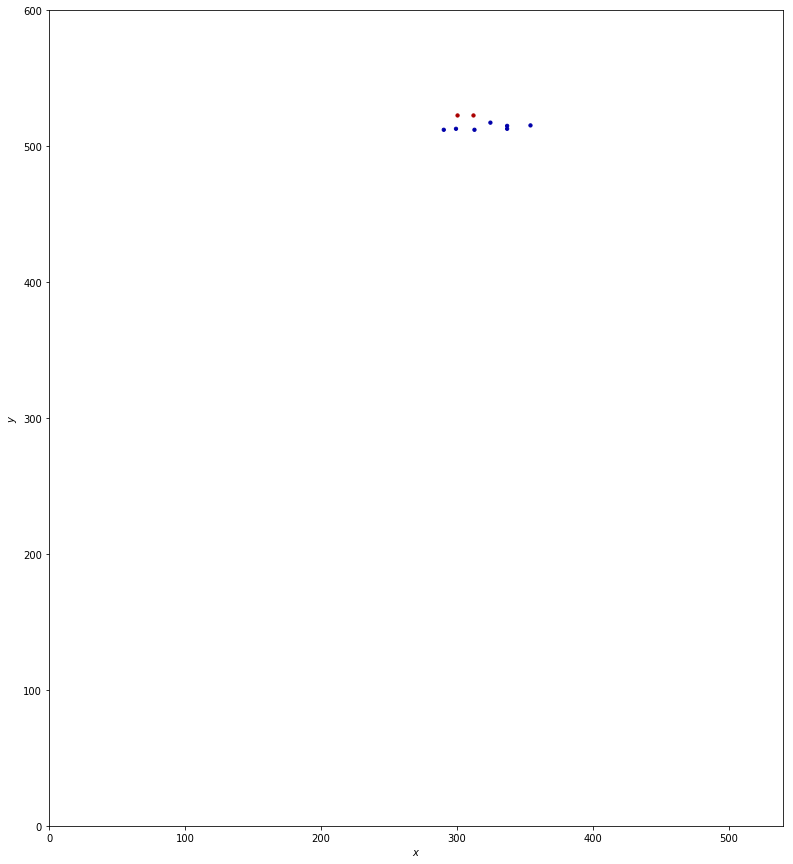

angle -74.7579044855
move (-0.12844643763757627, -0.99171644770983614)
297.92936191 523.220735185
36
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes 1 (297.1497, 558.3002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (288.9881, 529.3801)
yes -1 (288.9881, 540.8401)
yes -1 (288.9881, 558.1653)
yes -1 (254.2797, 481.6201)
yes -1 (253.5597, 501.1201)
yes -1 (250.5897, 502.5601)
yes -1 (247.9197, 504.1501)
yes -1 (245.3997, 505.7401)
yes 1 (241.9197, 476.0102)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


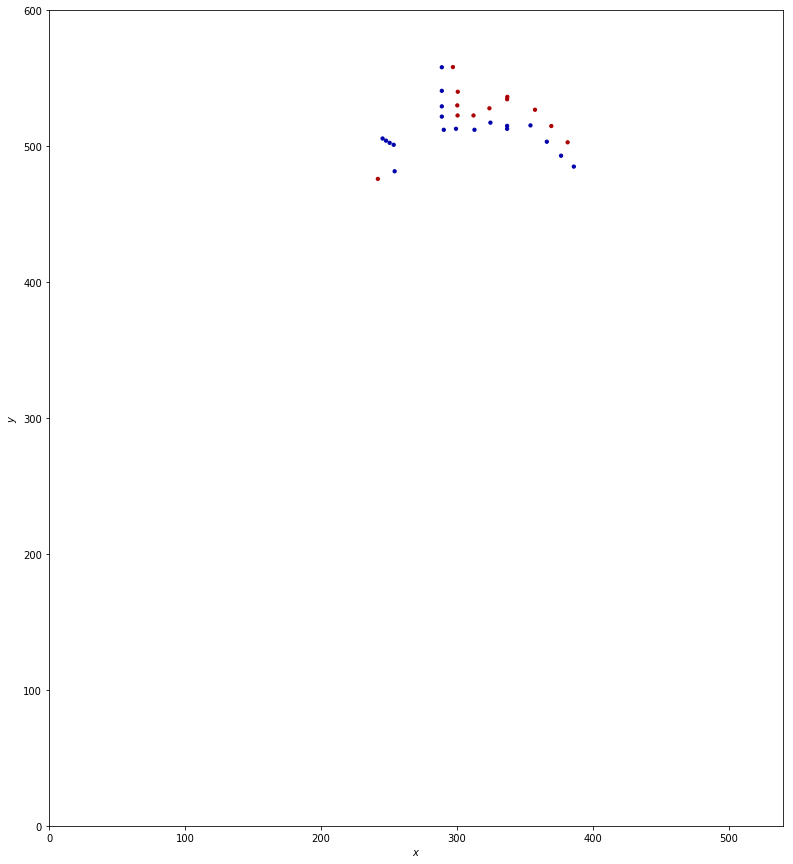

angle -97.3798271066
move (0.29708279935792892, -0.9548517216435527)
298.226444709 522.265883463
37
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (254.2797, 481.6201)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)


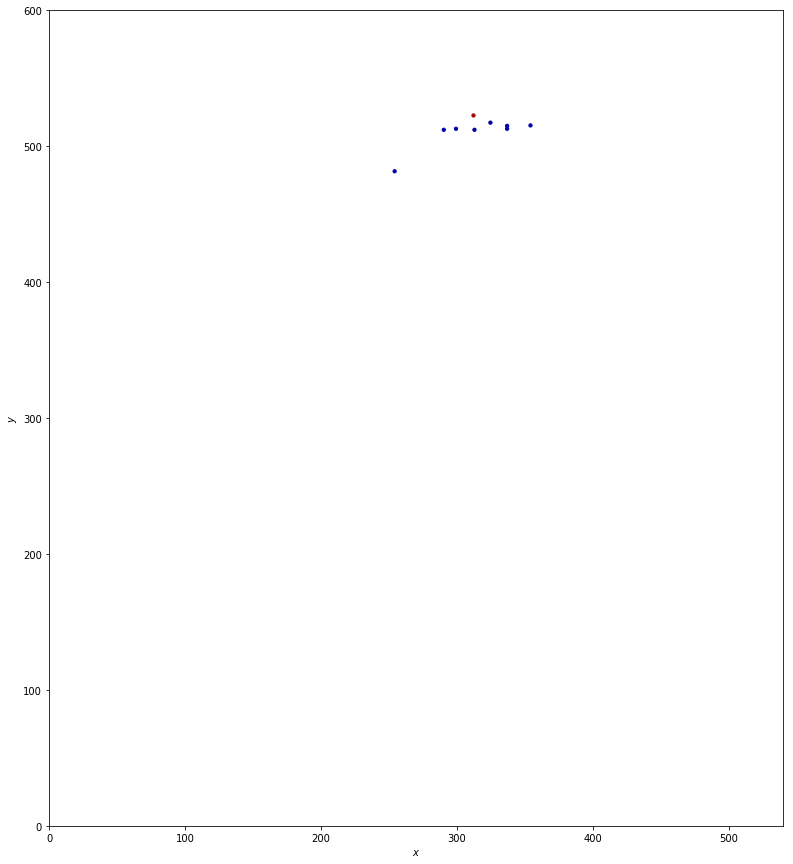

angle -72.7175267479
move (0.9979861073928108, 0.063432873582591379)
299.224430816 522.329316337
38
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)


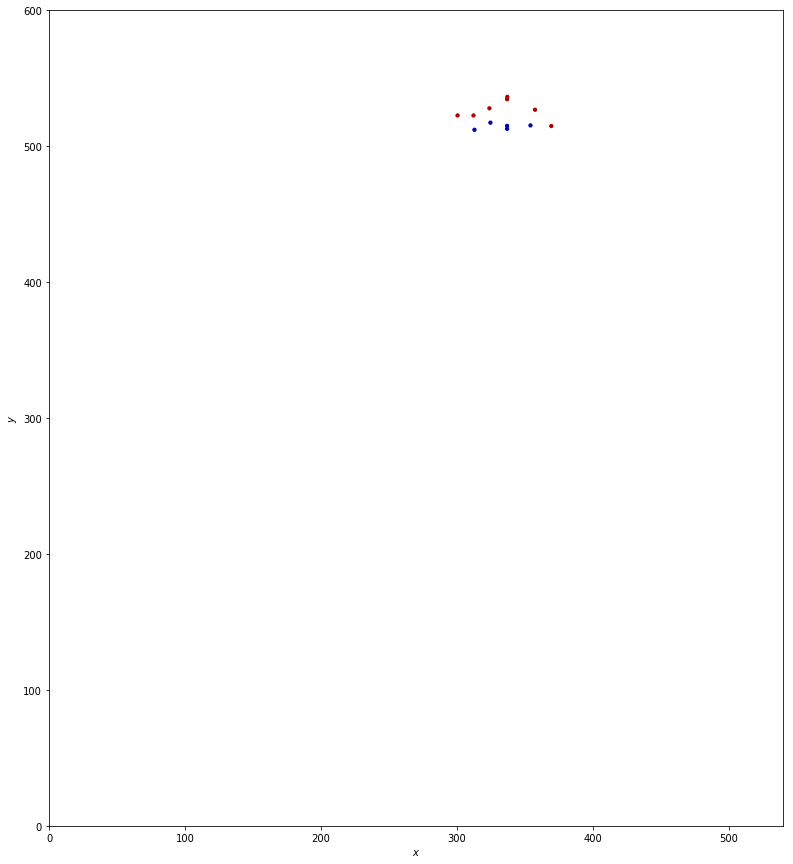

angle 3.63687769364
move (0.30783730734153486, -0.95143901129221808)
299.532268124 521.377877326
39
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (324.7503, 517.4102)


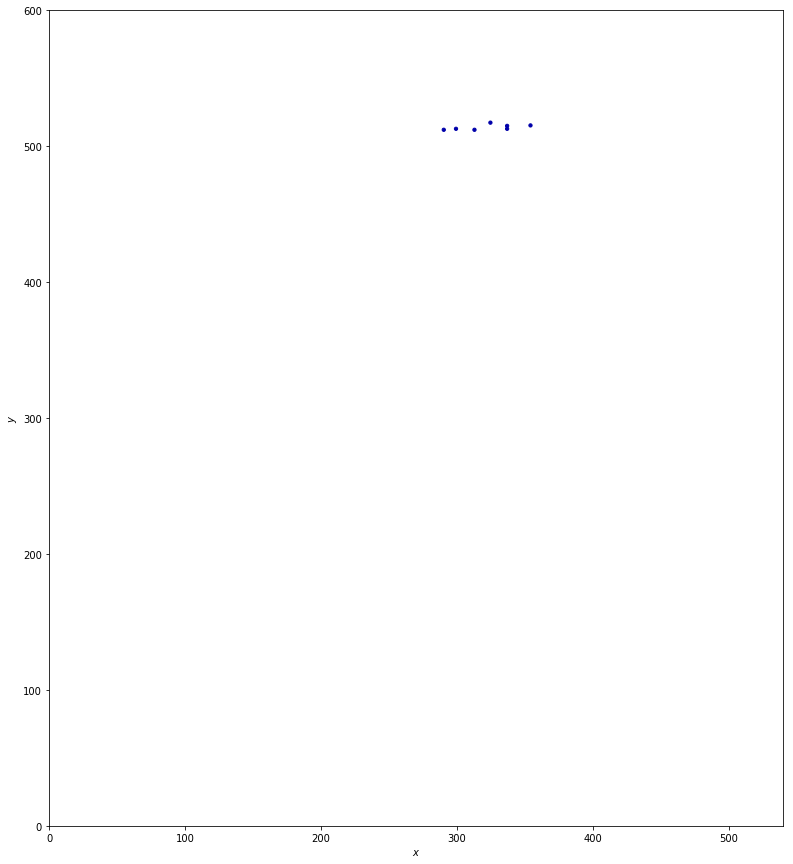

angle -72.0710551783
move (0.94355282733659529, 0.331222073577709)
300.475820951 521.709099399
40
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (300.7194, 540.1503)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)


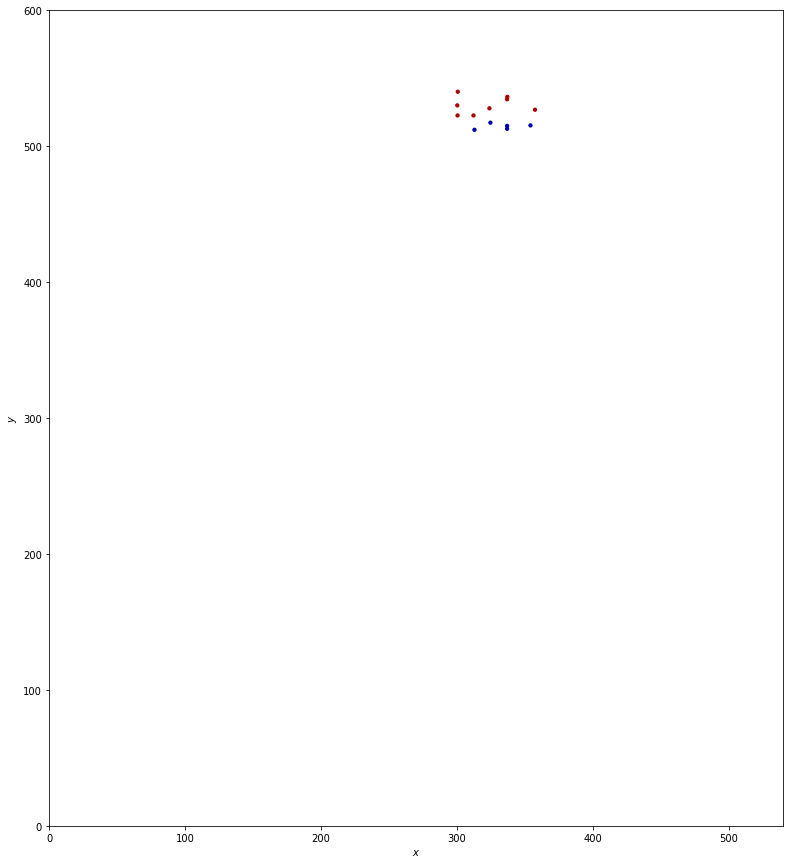

angle 19.3429671695
move (0.99522118156590644, -0.097646299277346624)
301.471042133 521.6114531
41
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)


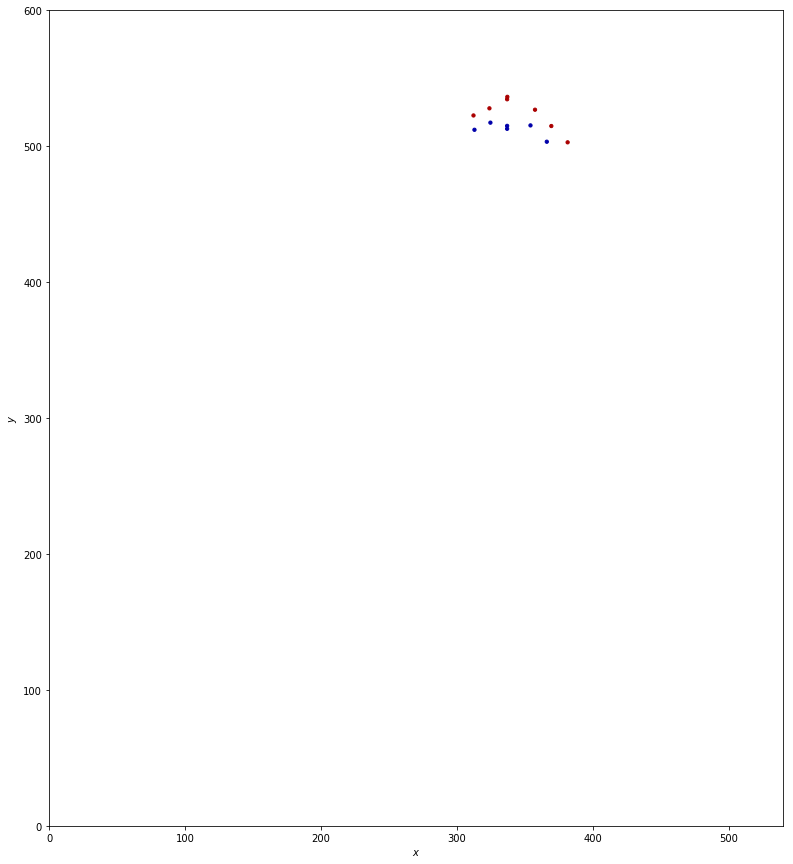

angle -5.60364995594
move (0.89710208885971021, -0.44182331554994314)
302.368144221 521.169629784
42
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


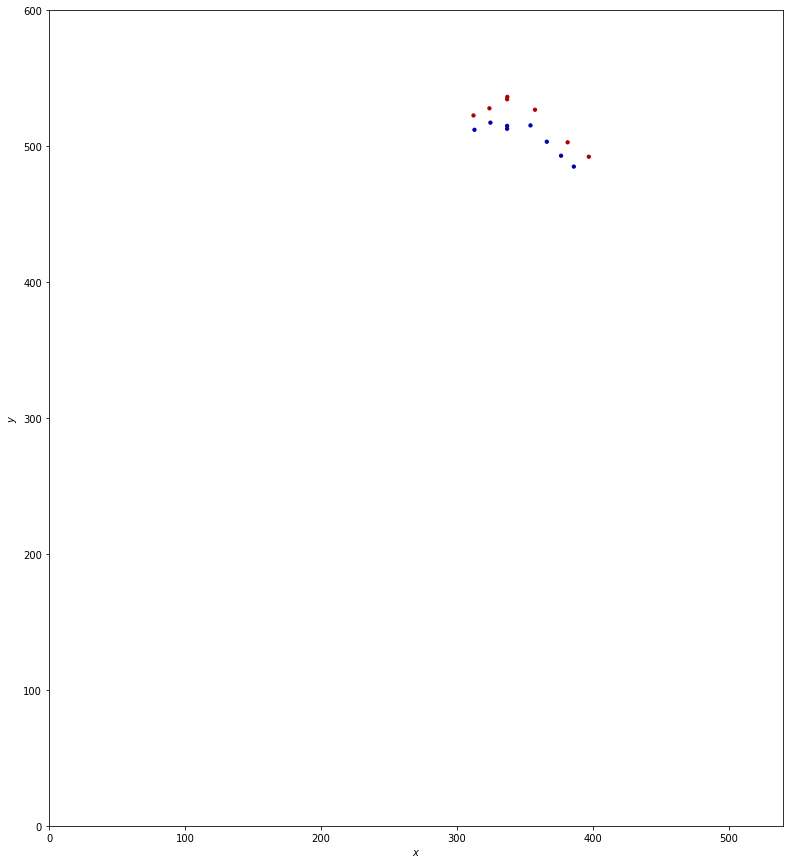

angle -26.2202738262
move (0.96436984938030301, -0.26455773208547839)
303.332514071 520.905072052
43
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


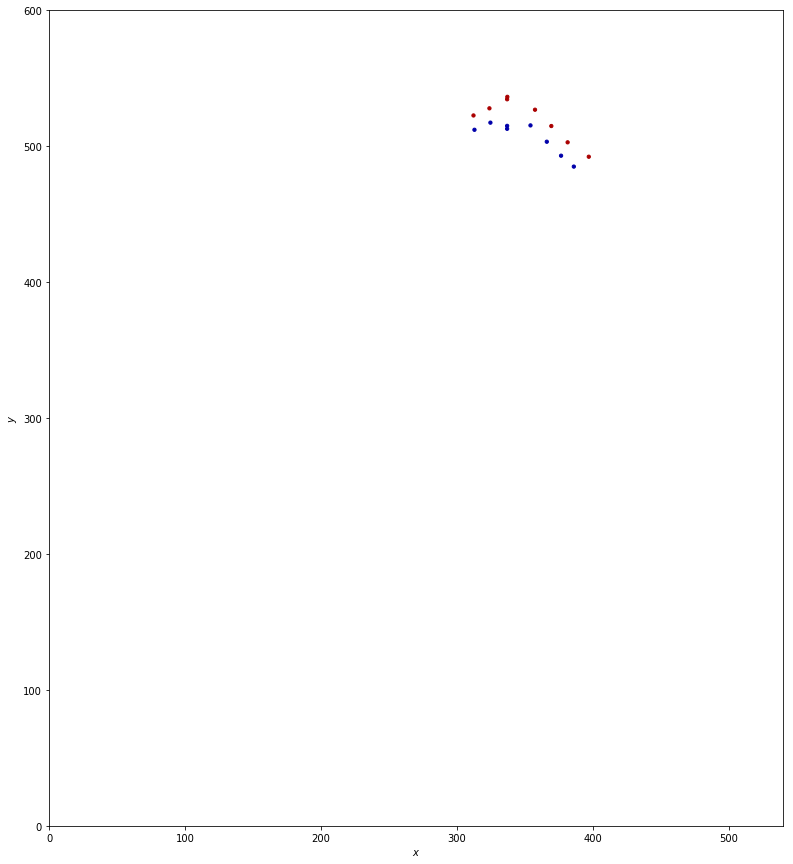

angle -15.3406748298
move (0.93515249840784509, -0.35424540183545827)
304.267666569 520.550826651
44
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


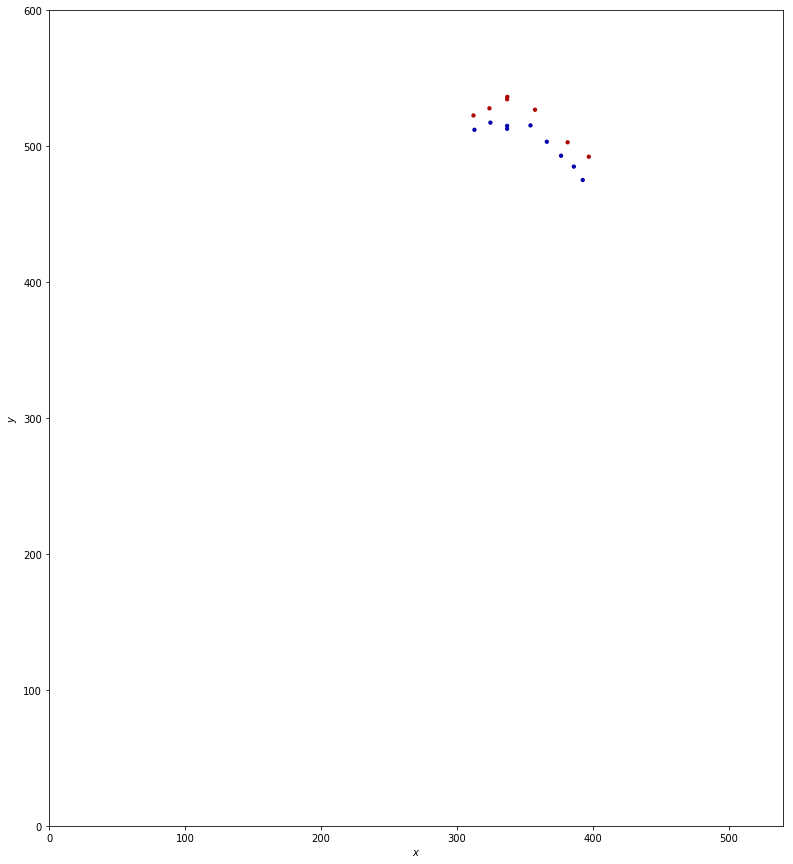

angle -20.747203896
move (0.97081456882121375, -0.23983134274835904)
305.238481138 520.310995308
45
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


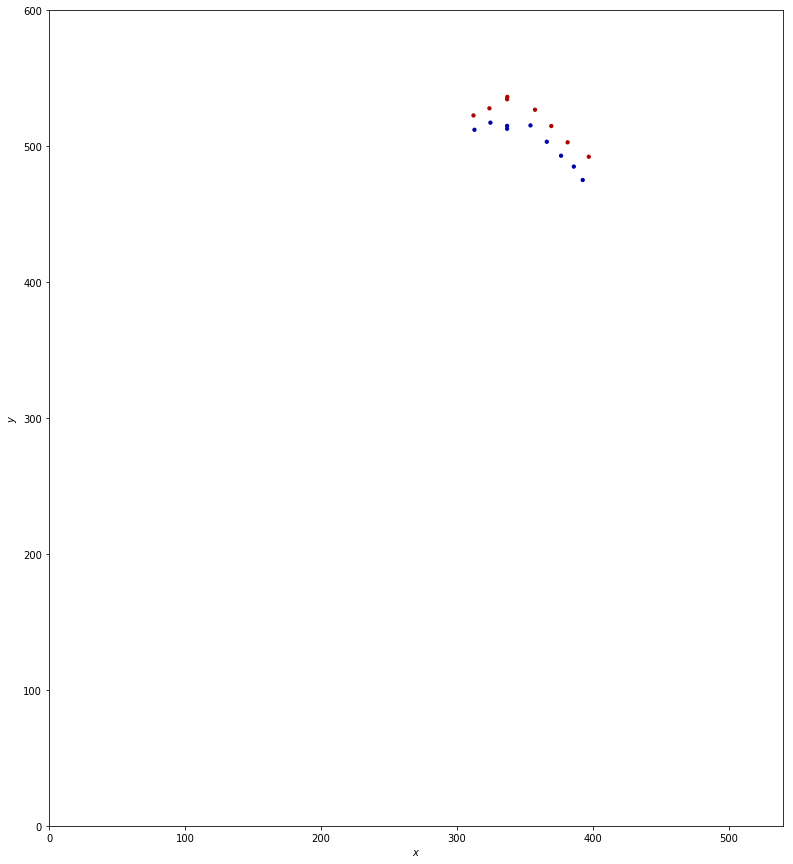

angle -13.8765862927
move (0.94976674394799843, -0.31295867473265093)
306.188247882 519.998036633
46
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


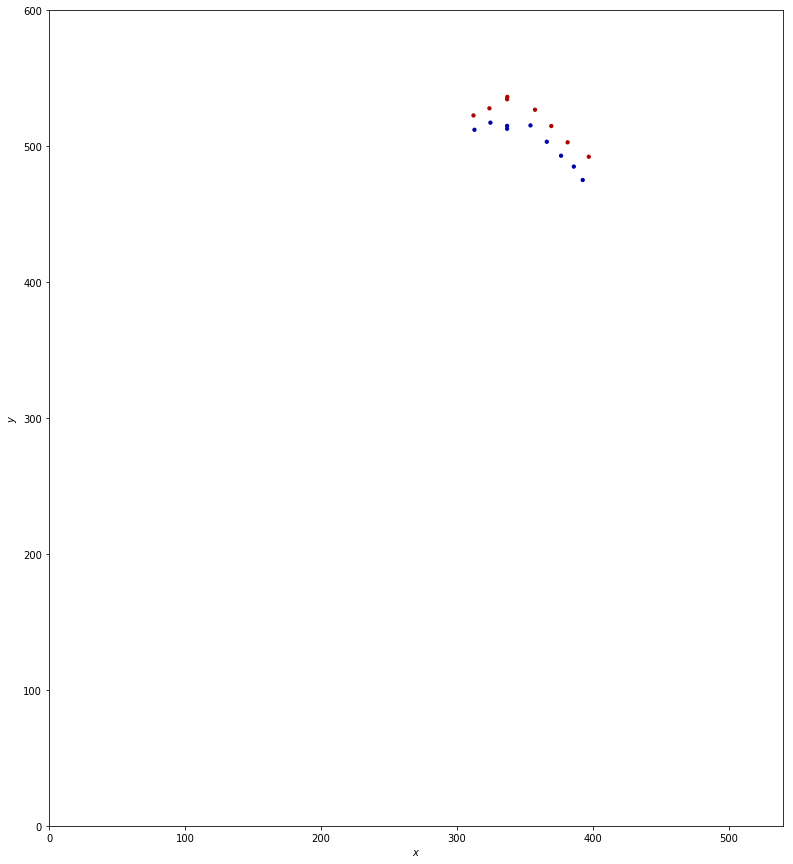

angle -18.2376247489
move (0.95403366847385884, -0.29969944847849023)
307.14228155 519.698337185
47
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


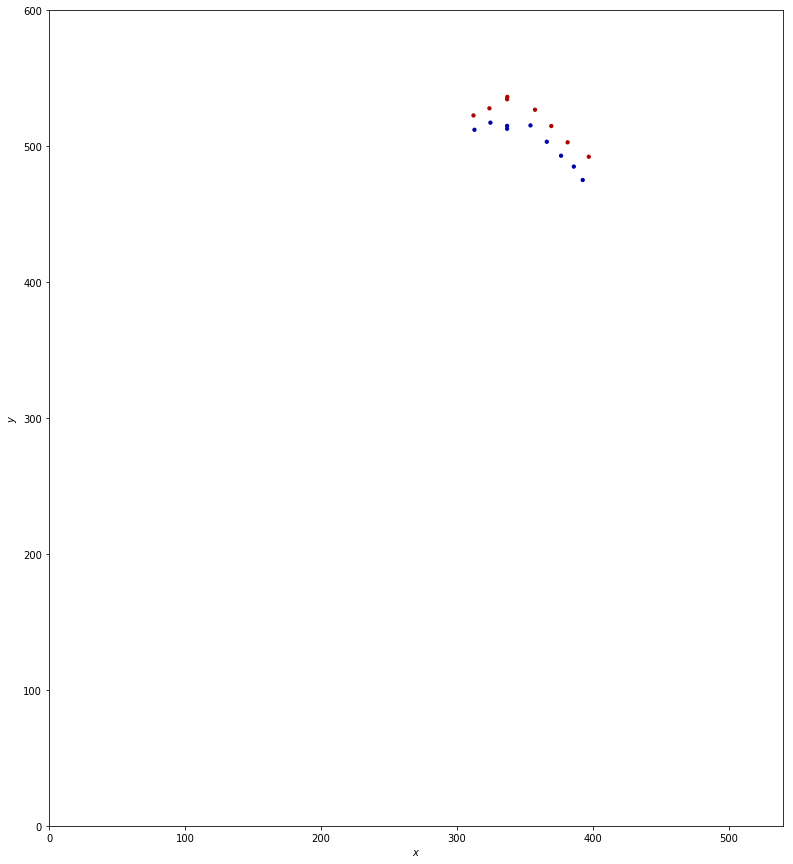

angle -17.4395522029
move (0.96156311490432034, -0.27458400546190032)
308.103844665 519.423753179
48
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


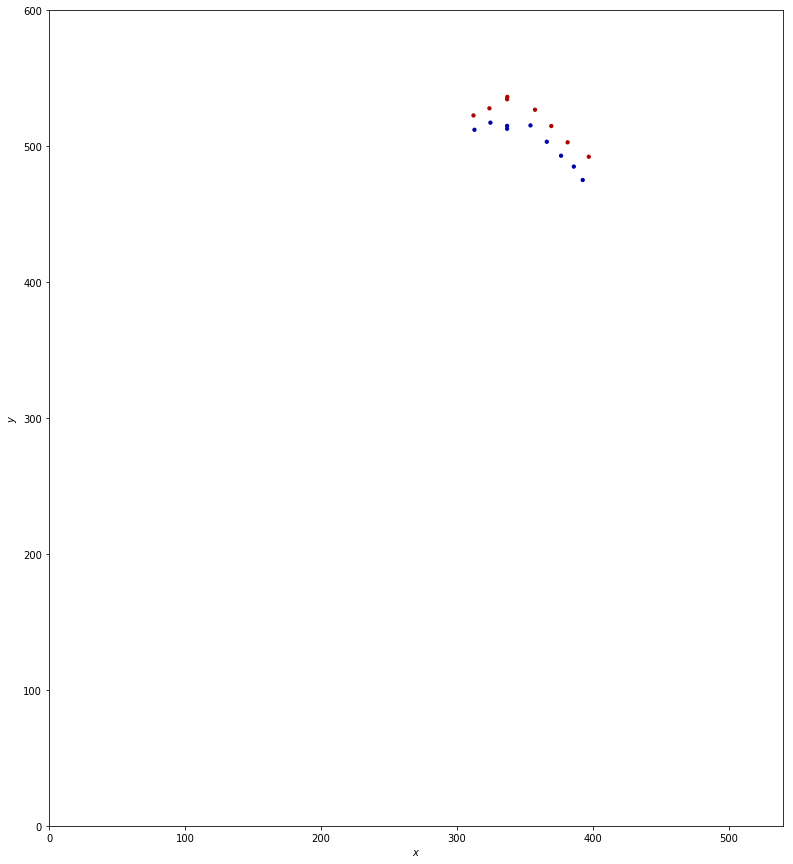

angle -15.9372251457
move (0.97204180504646442, -0.23480785600573786)
309.07588647 519.188945323
49
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


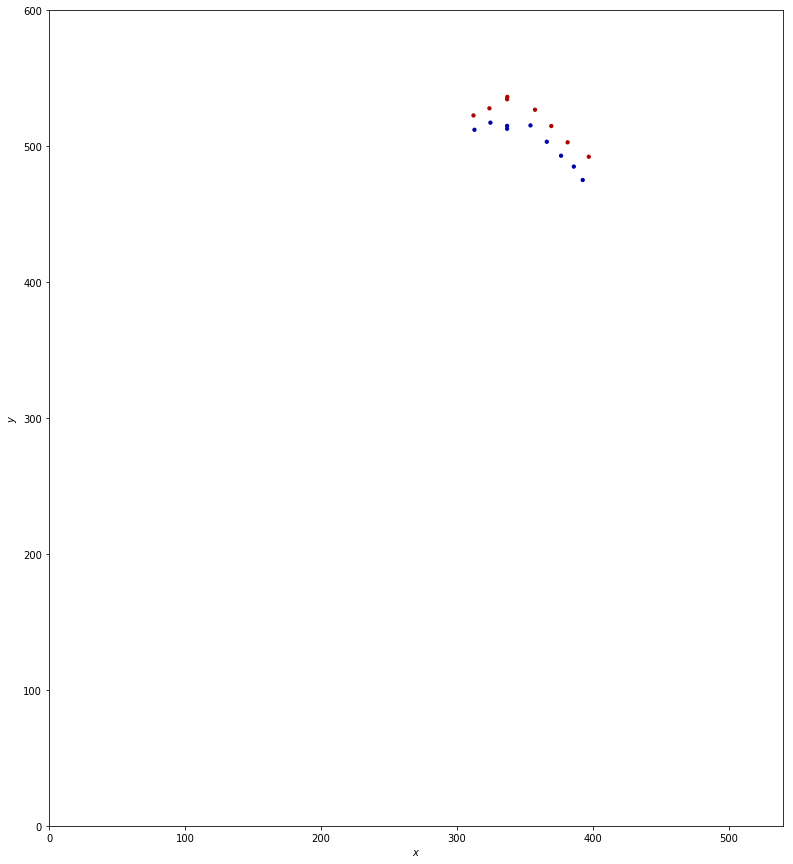

angle -13.5802968178
move (0.98402922460751363, -0.17800698053260552)
310.059915695 519.010938343
50
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


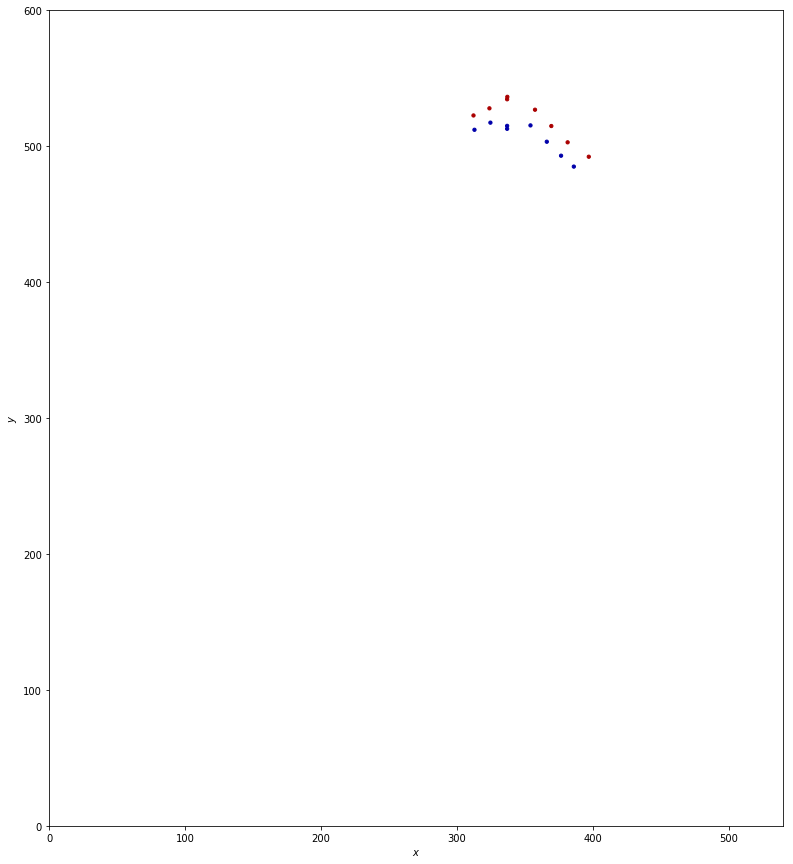

angle -10.2536935285
move (0.99312225259592846, -0.11708198579964735)
311.053037948 518.893856357
51
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)


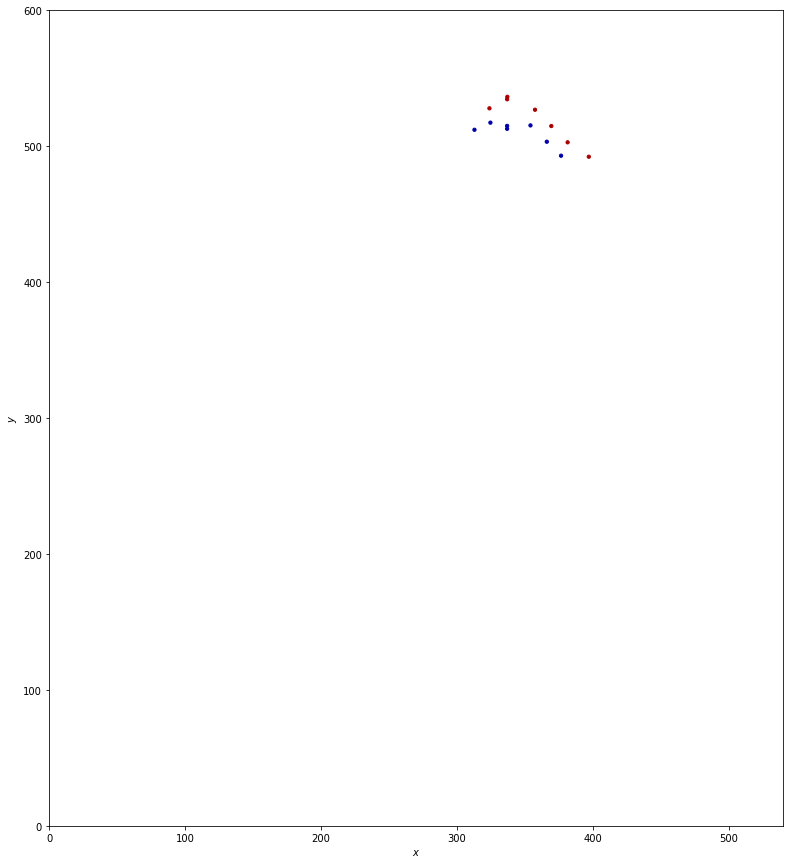

angle -6.72372541783
move (0.95105238565202765, 0.3090297068981992)
312.004090333 519.202886064
52
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


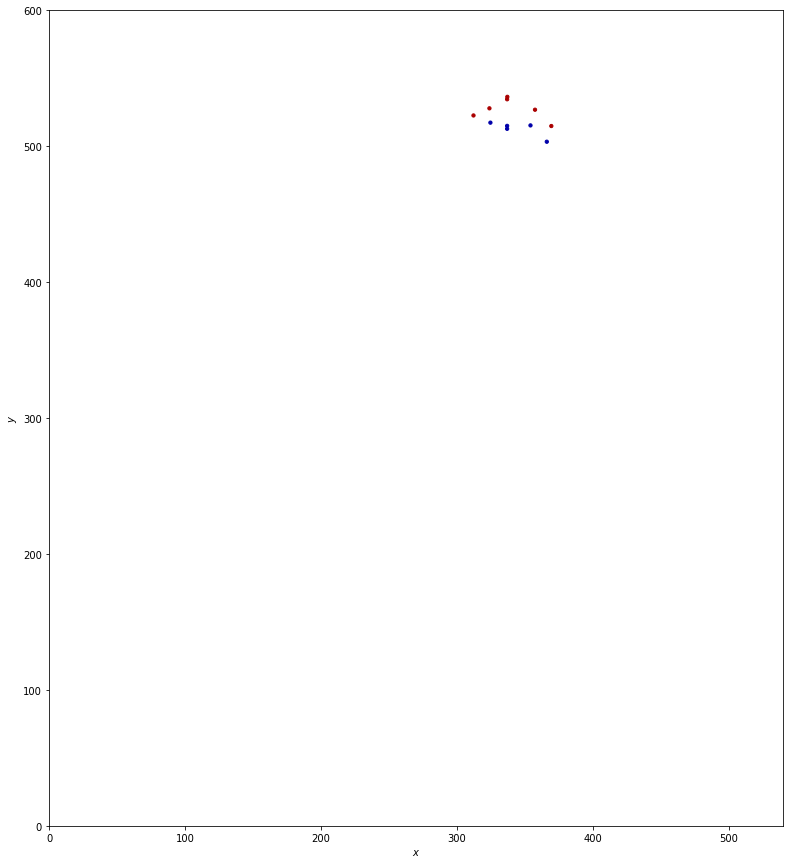

angle 18.0007658593
move (0.99957089947258193, 0.029291925979242628)
313.003661233 519.23217799
53
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


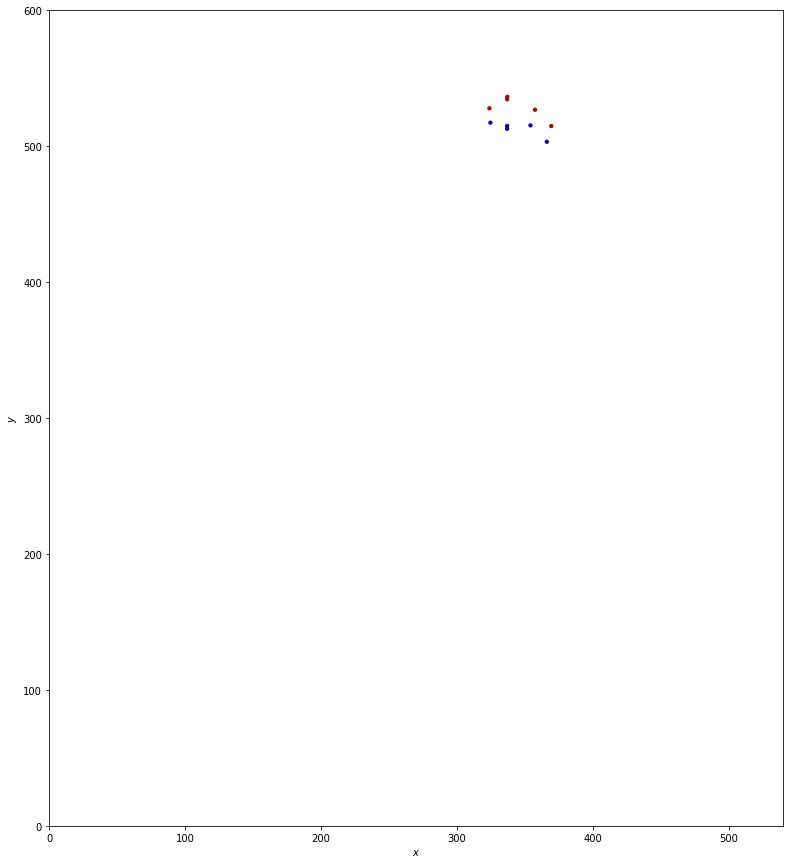

angle 1.6785438273
move (0.904762573948793, 0.42591628846705892)
313.908423807 519.658094278
54
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


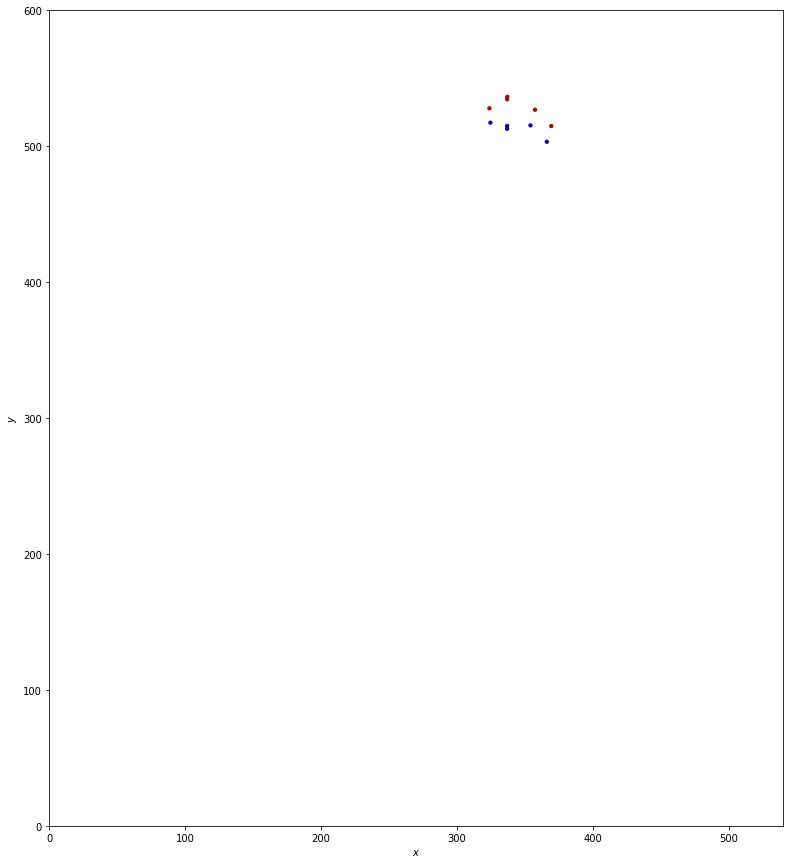

angle 25.2086752755
move (0.91604220093474742, 0.40108189451360654)
314.824466008 520.059176173
55
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


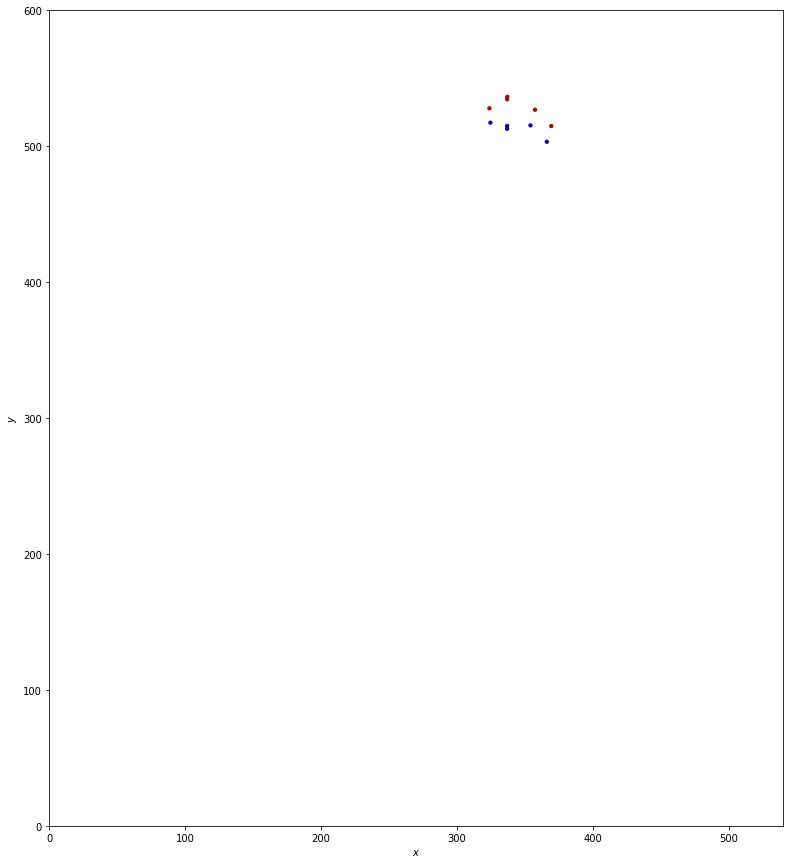

angle 23.6458303666
move (0.92696893438391226, 0.37513810082042354)
315.751434942 520.434314273
56
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


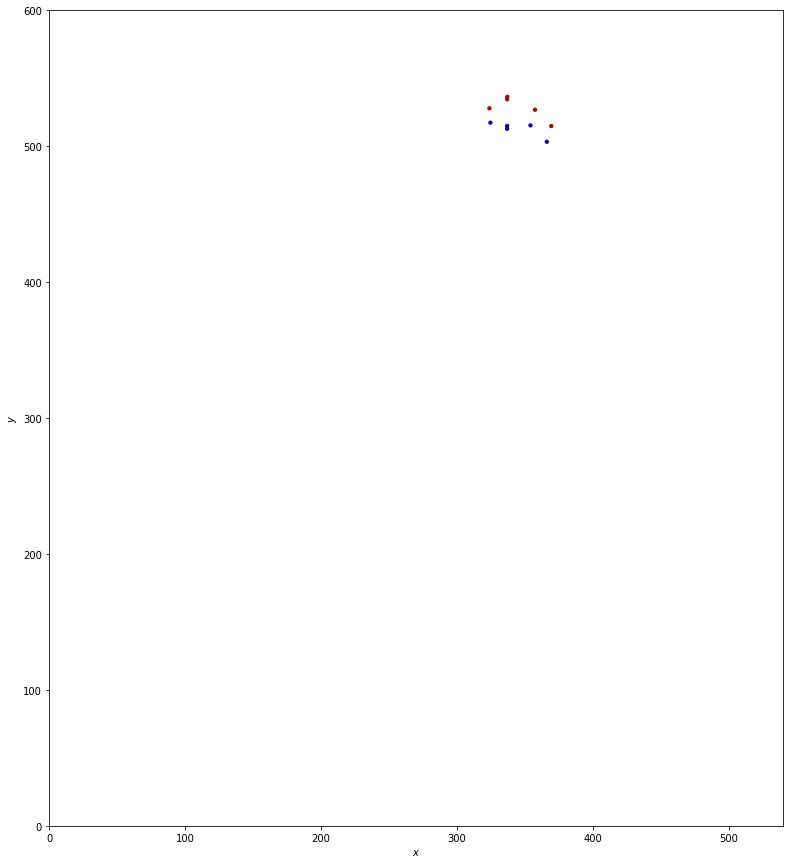

angle 22.0328485661
move (0.93750939519068288, 0.34795996023853076)
316.688944337 520.782274234
57
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


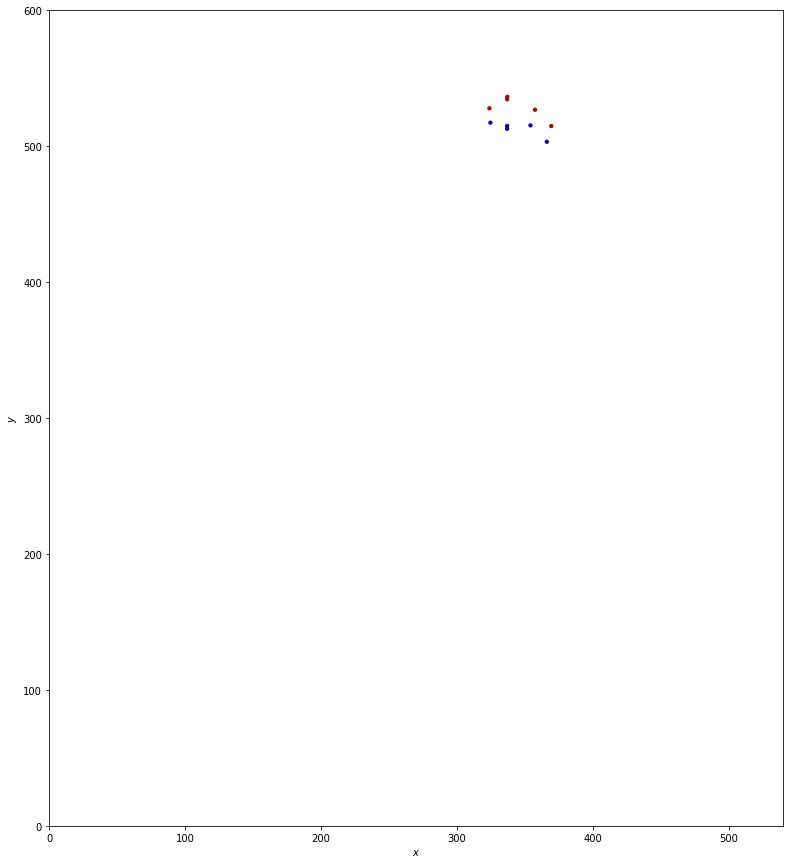

angle 20.3625878318
move (0.94760138118089154, 0.31945519620764778)
317.636545718 521.10172943
58
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


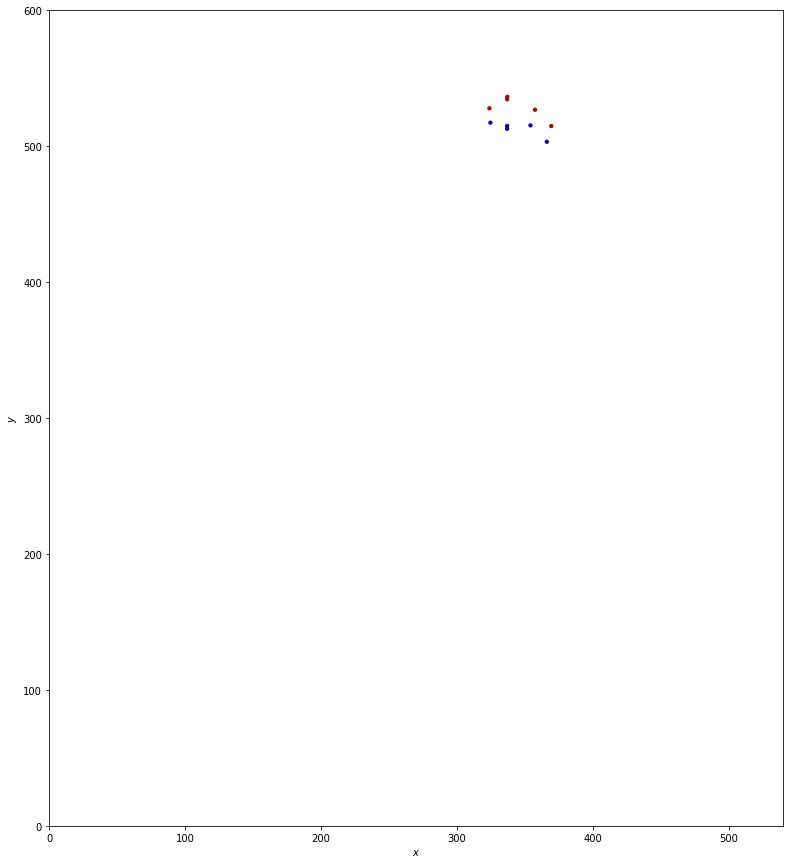

angle 18.6299806682
move (0.95714253451803843, 0.28961727955421723)
318.593688253 521.391346709
59
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


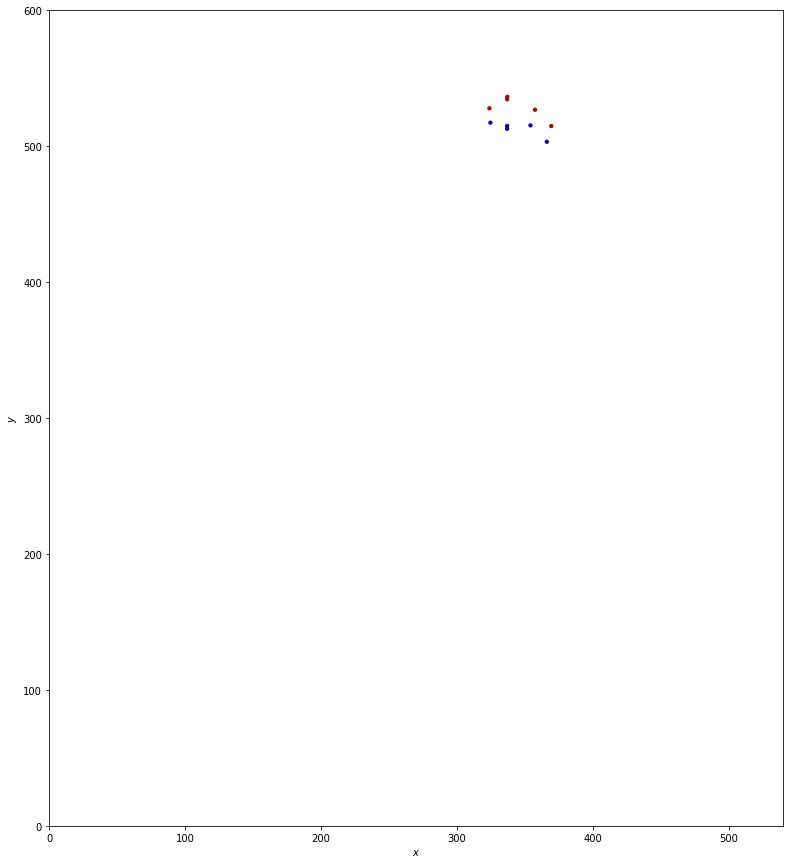

angle 16.8350444991
move (0.96598115471209756, 0.25861246826300277)
319.559669408 521.649959178
60
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


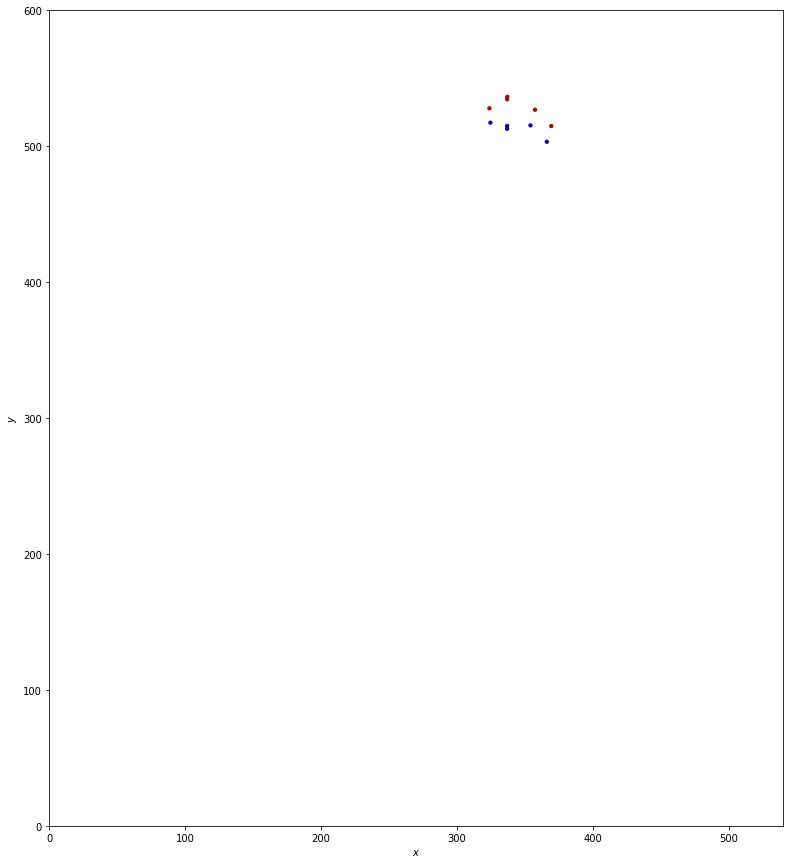

angle 14.9877468417
move (0.97391678945523485, 0.22690545876467533)
320.533586197 521.876864636
61
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


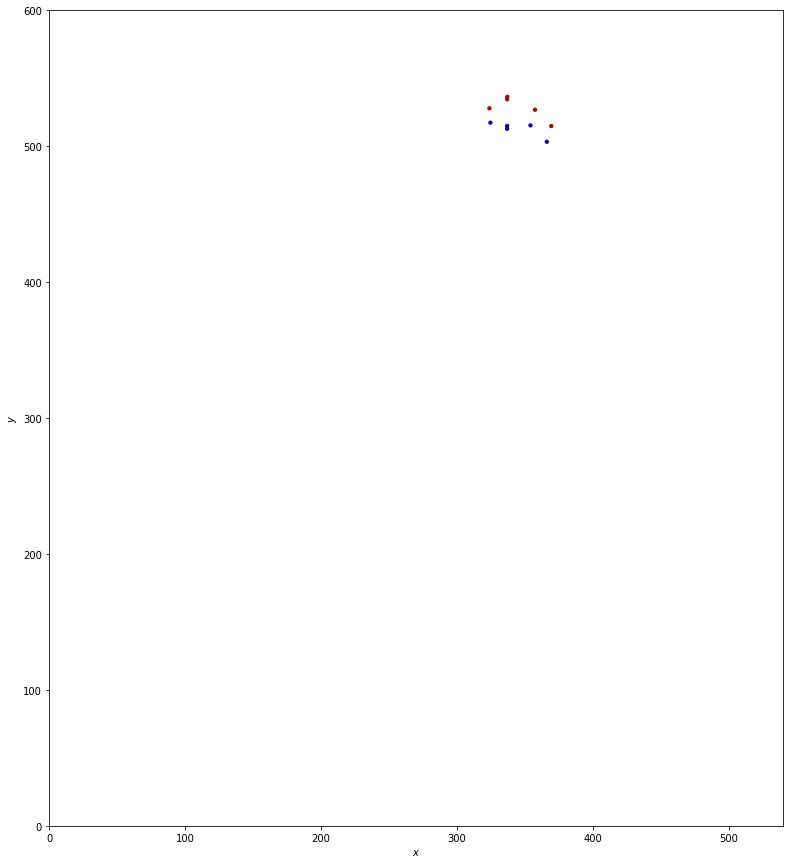

angle 13.1149513348
move (0.980722350198589, 0.19540642727647464)
321.514308547 522.072271064
62
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


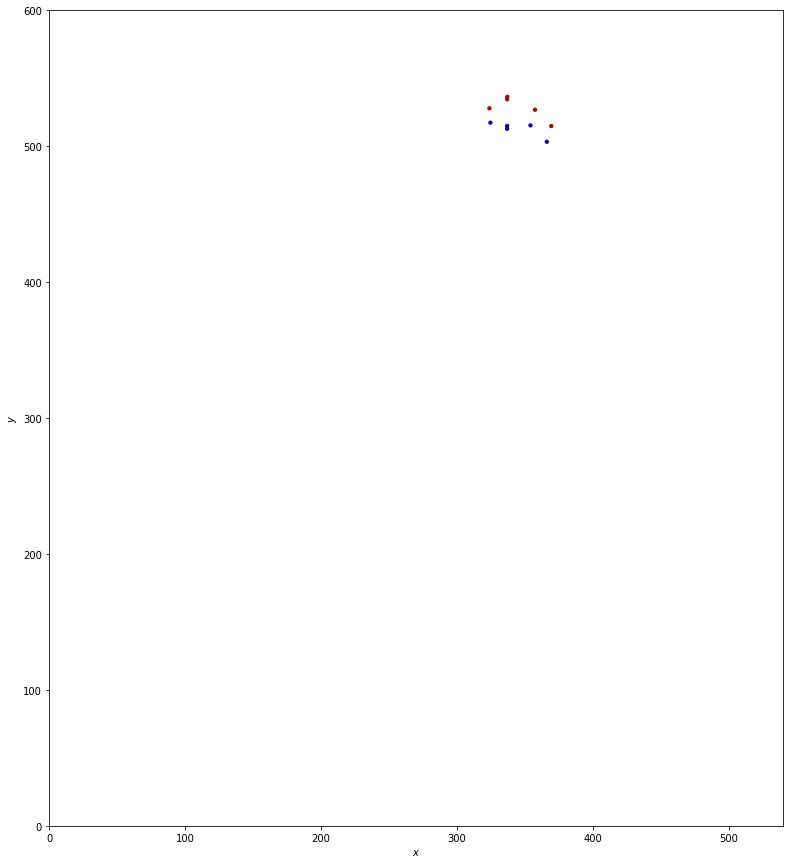

angle 11.2684669148
move (0.98619750635969183, 0.16557318155403553)
322.500506054 522.237844245
63
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


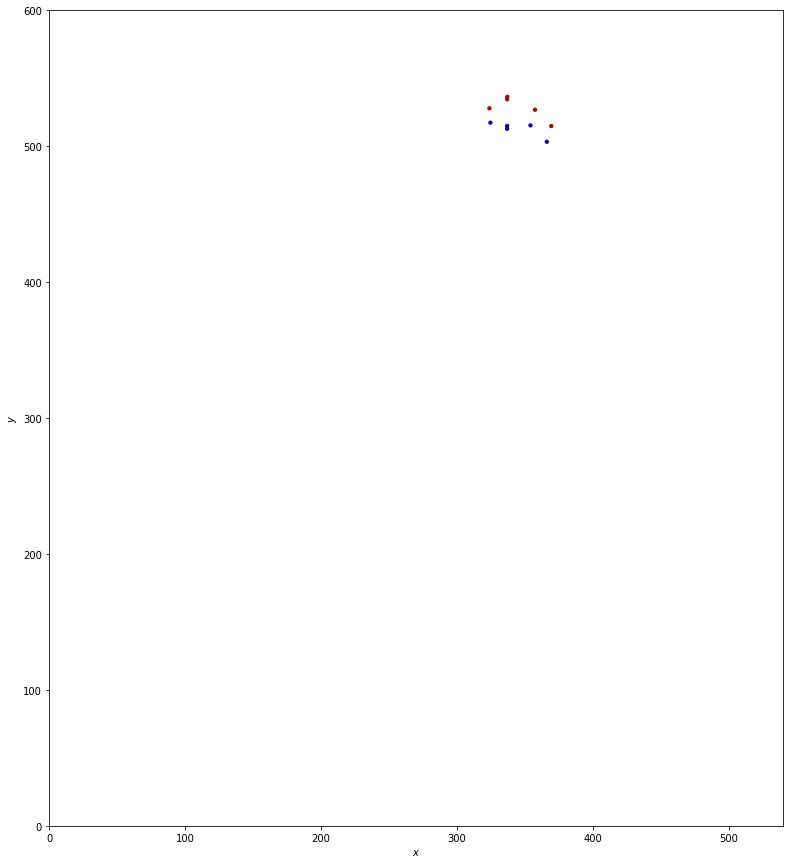

angle 9.53053335992
move (0.99024473730056362, 0.13933901194043874)
323.490750791 522.377183257
64
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


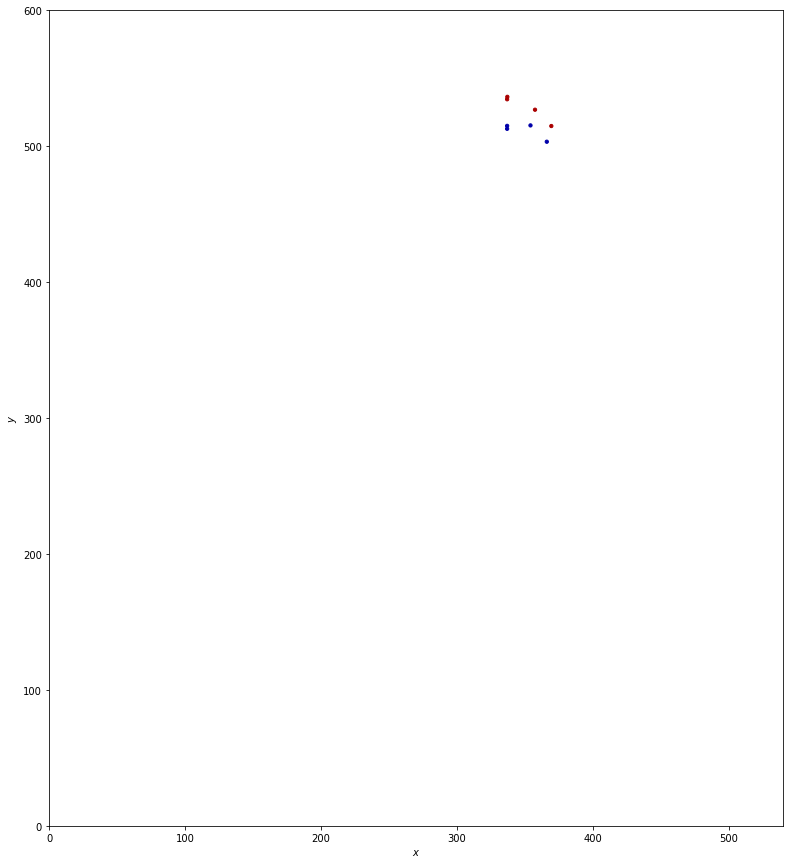

angle 8.00959953291
move (0.97566224094238896, 0.2192787987911182)
324.466413032 522.596462056
65
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


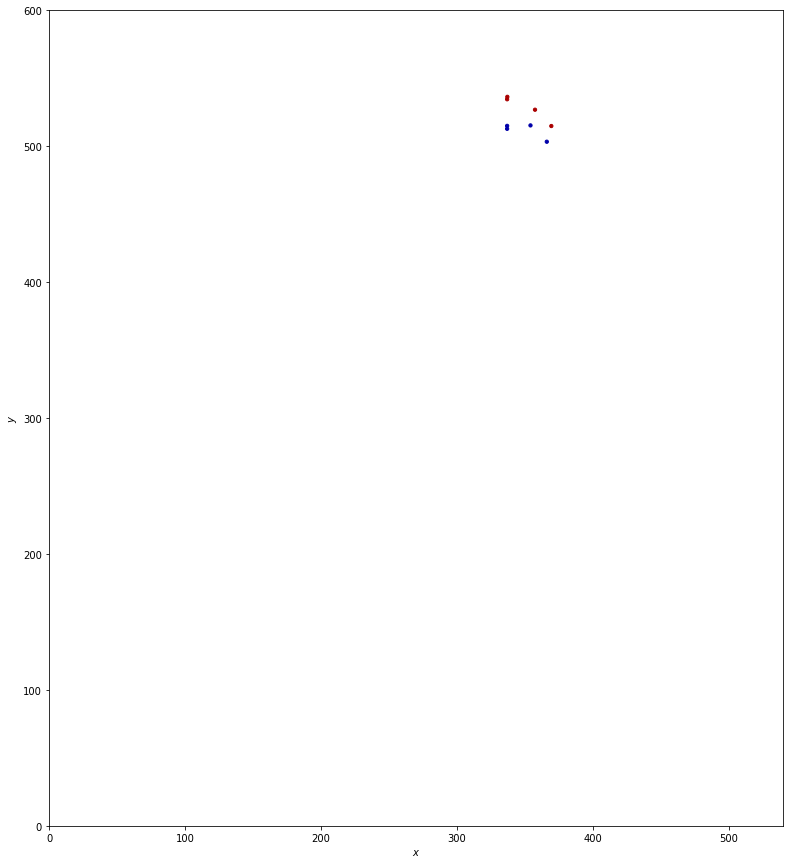

angle 12.6666769202
move (0.97941429332864582, 0.20186045185610127)
325.445827325 522.798322508
66
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


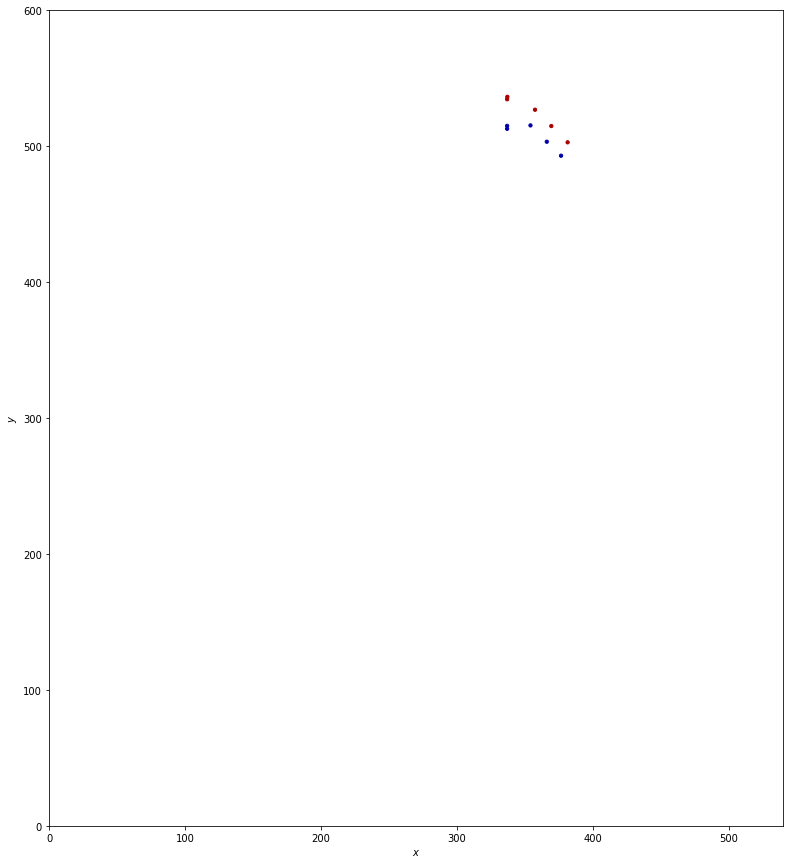

angle 11.6457743175
move (0.98410187737150157, 0.17760488437508187)
326.429929203 522.975927392
67
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


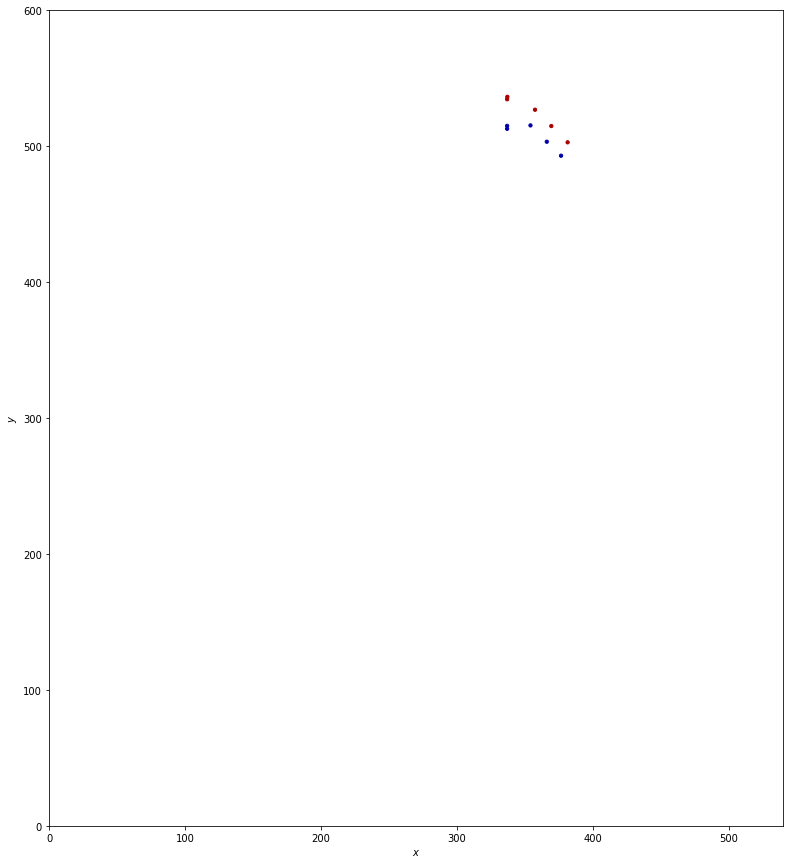

angle 10.2302820673
move (0.98687508379252209, 0.16148550705714271)
327.416804286 523.137412899
68
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


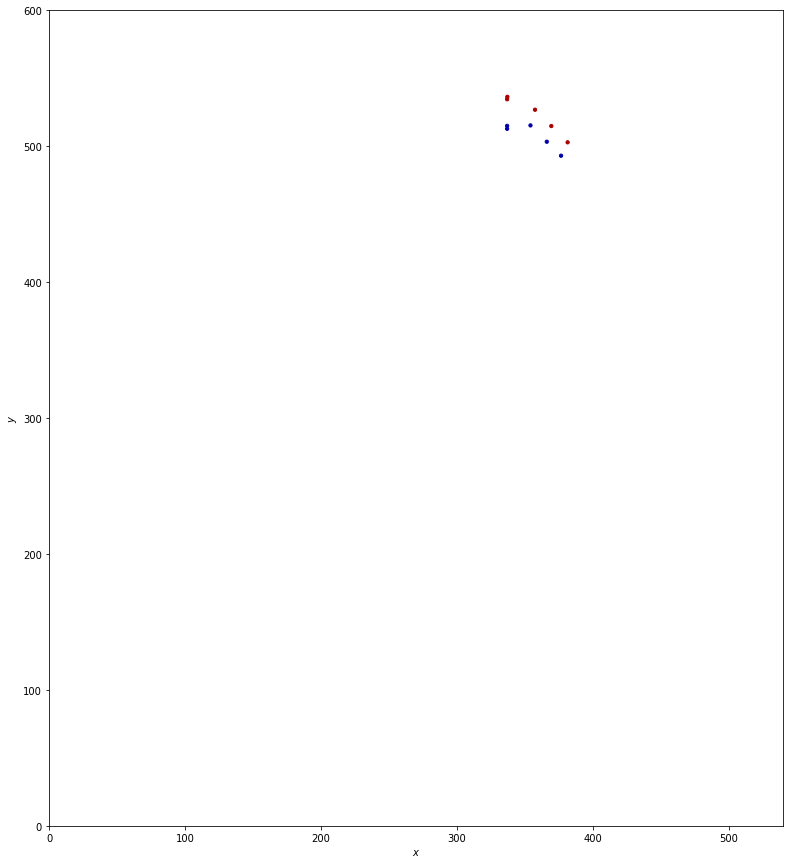

angle 9.29313088138
move (0.9893784938314184, 0.14536229202882708)
328.40618278 523.282775191
69
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


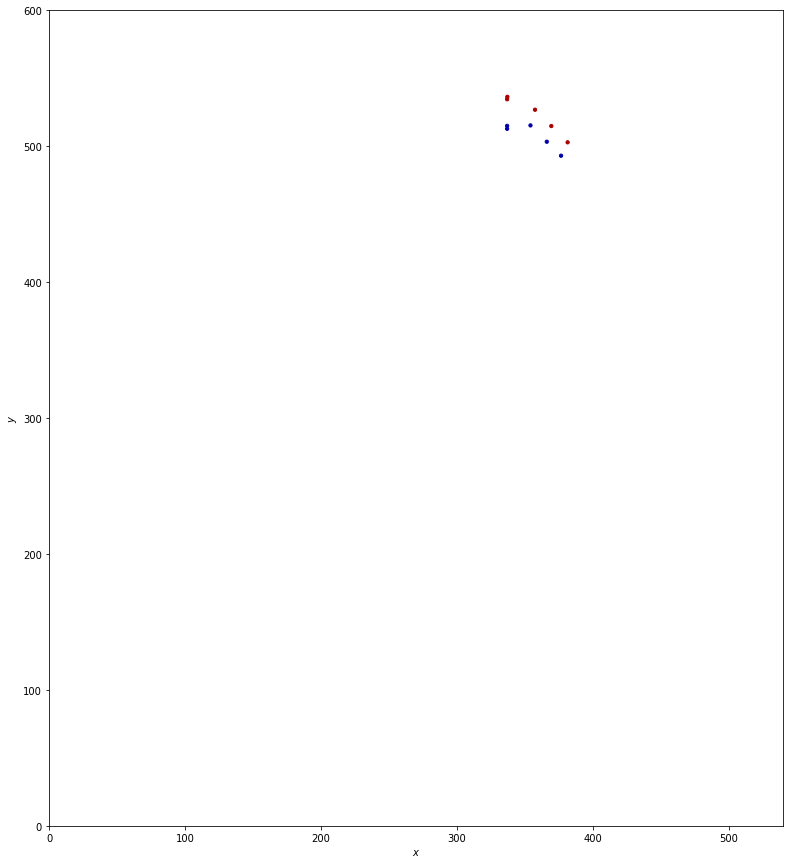

angle 8.35825927533
move (0.99161558502935743, 0.12922279801523109)
329.397798365 523.411997989
70
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


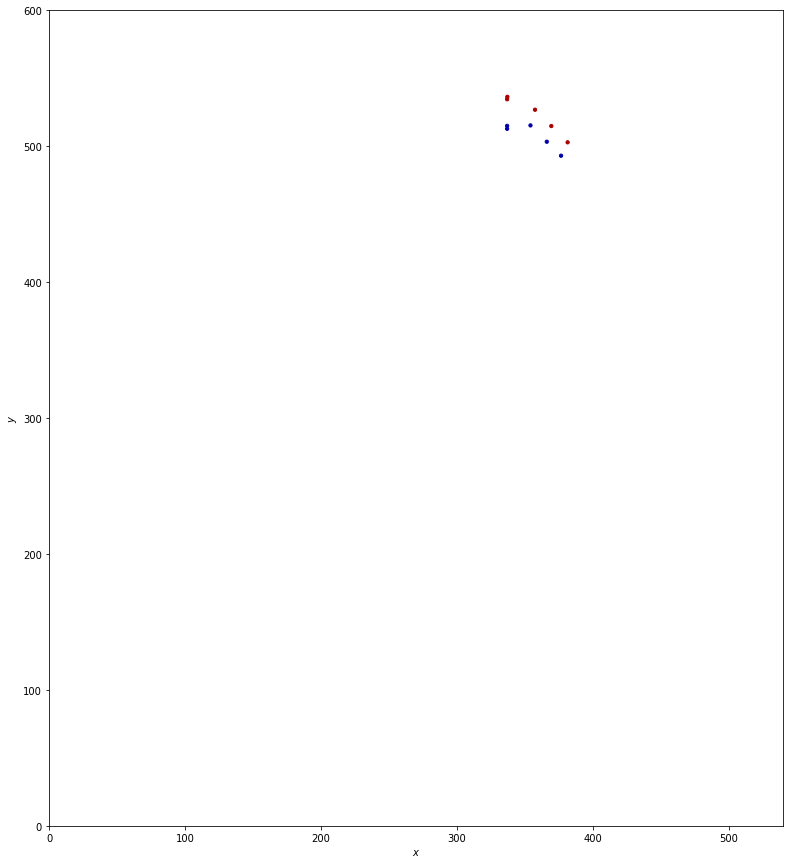

angle 7.4246831065
move (0.993590038841484, 0.1130435080620657)
330.391388404 523.525041497
71
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


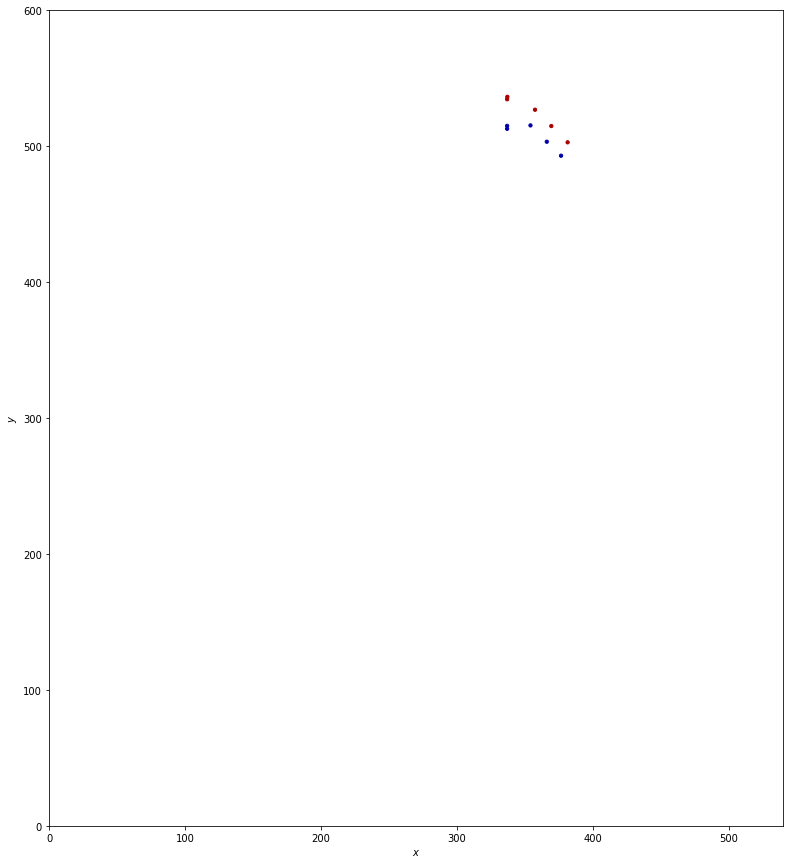

angle 6.49079042033
move (0.99530513583207725, 0.096786809980959357)
331.38669354 523.621828307
72
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


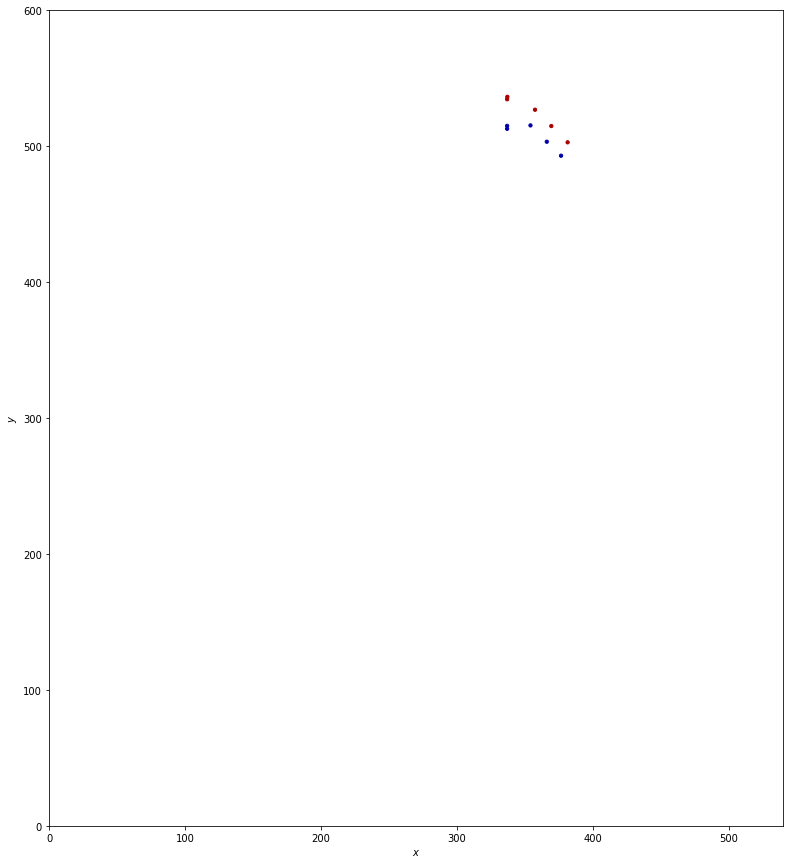

angle 5.55417047333
move (0.99676276337395808, 0.080398964863429012)
332.383456303 523.702227272
73
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


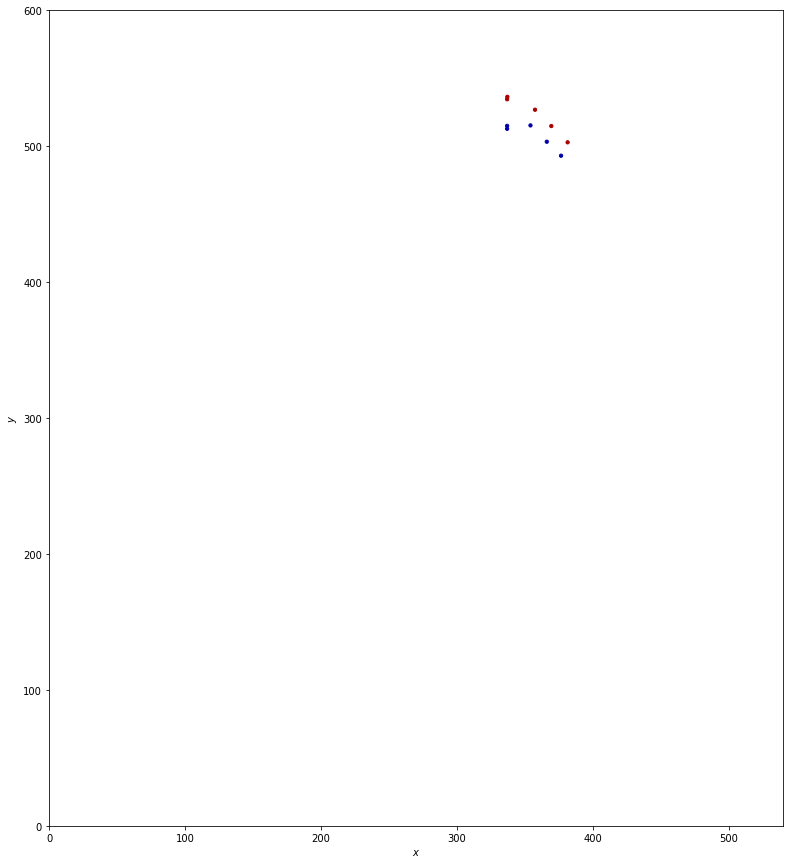

angle 4.61149860939
move (0.99796203648354964, 0.063810451632992135)
333.38141834 523.766037724
74
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


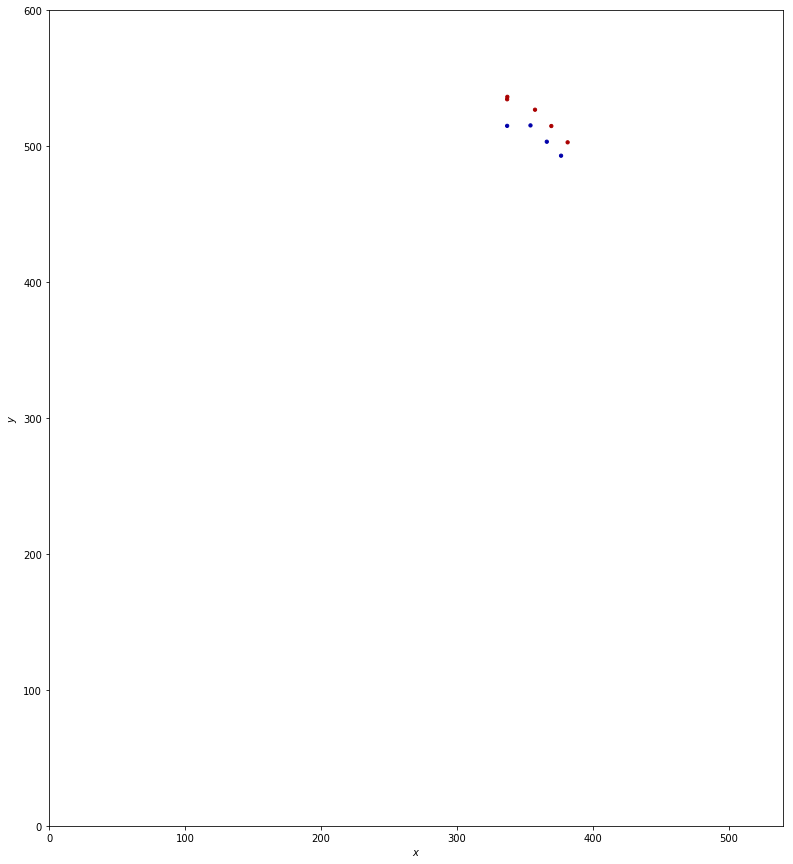

angle 3.65855523926
move (0.99928291919720158, -0.037863536558530891)
334.380701259 523.728174187
75
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


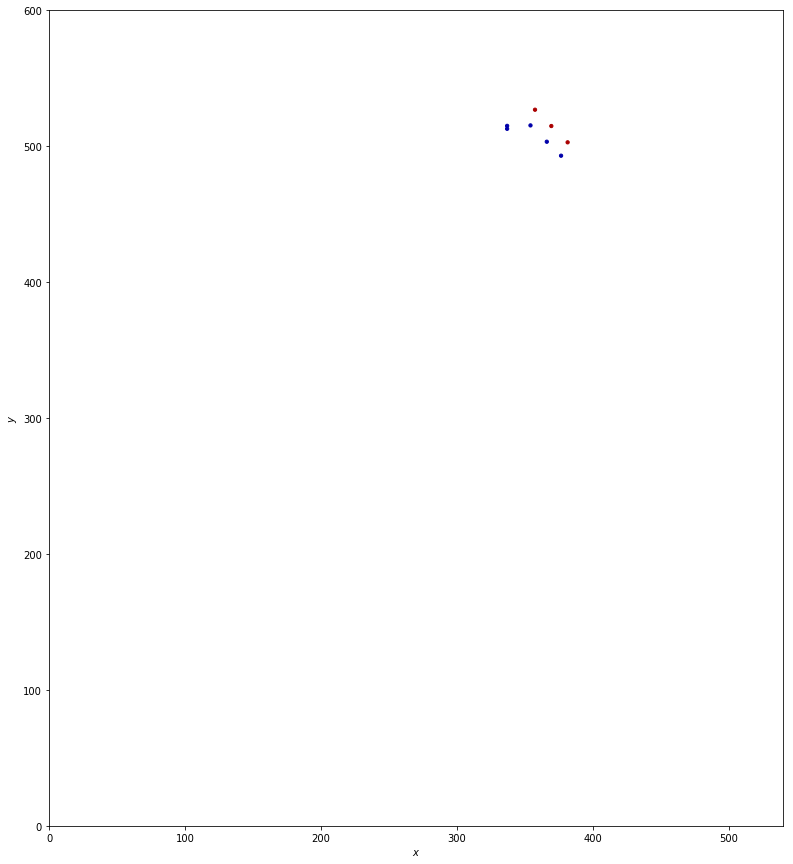

angle -2.16993954104
move (0.97566905018907568, 0.21924849943191613)
335.356370309 523.947422687
76
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


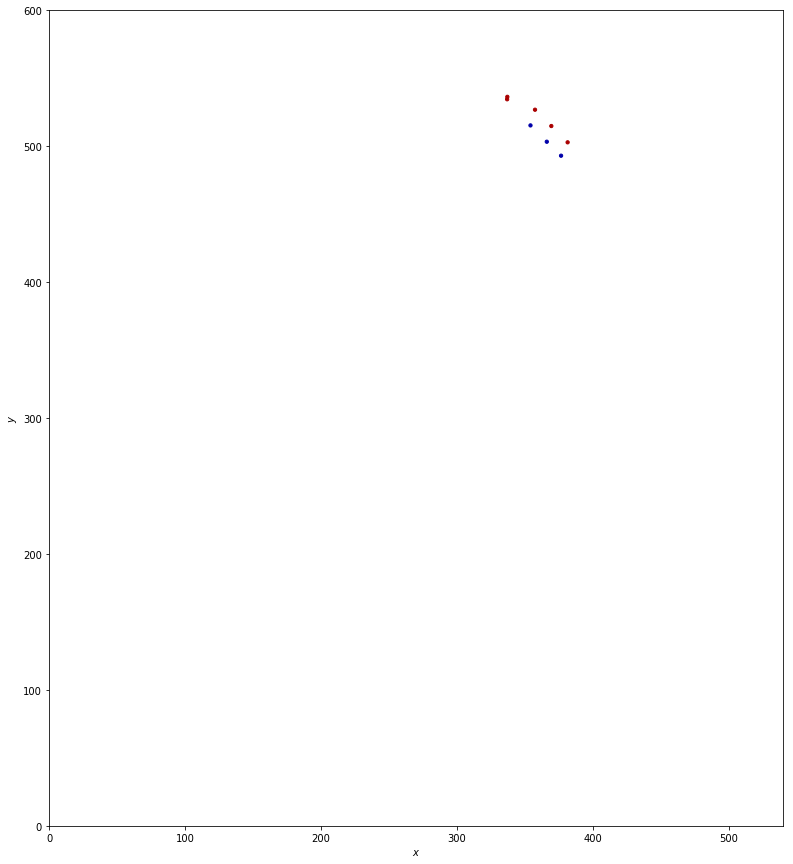

angle 12.6648975961
move (0.98779323258420837, -0.15577075996745979)
336.344163542 523.791651927
77
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


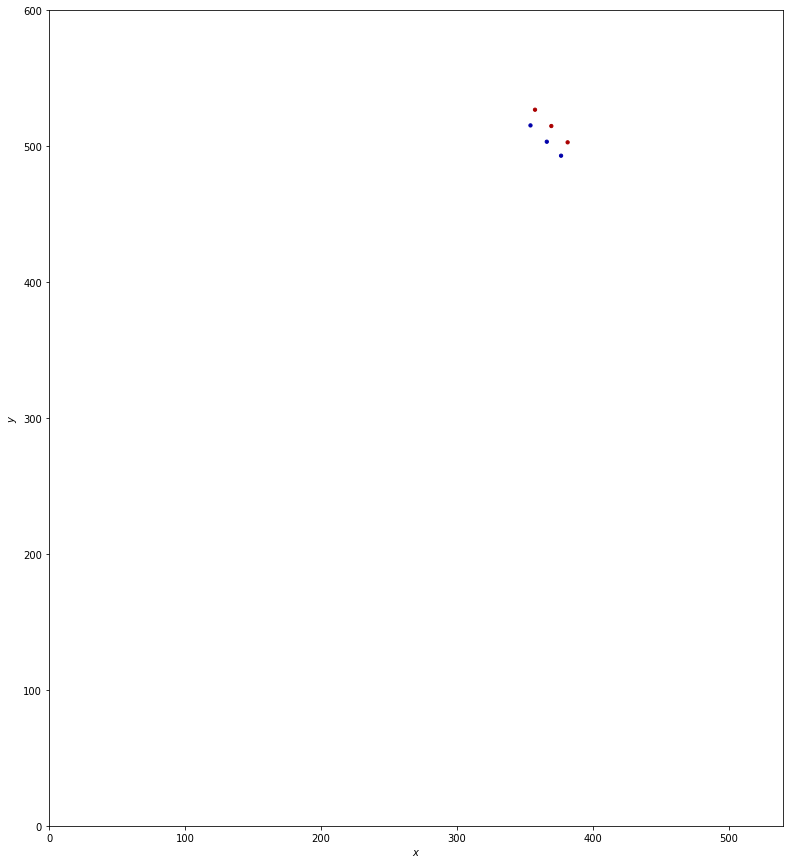

angle -8.96150052868
move (0.98485858137156912, -0.17335966860484125)
337.329022123 523.618292258
78
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


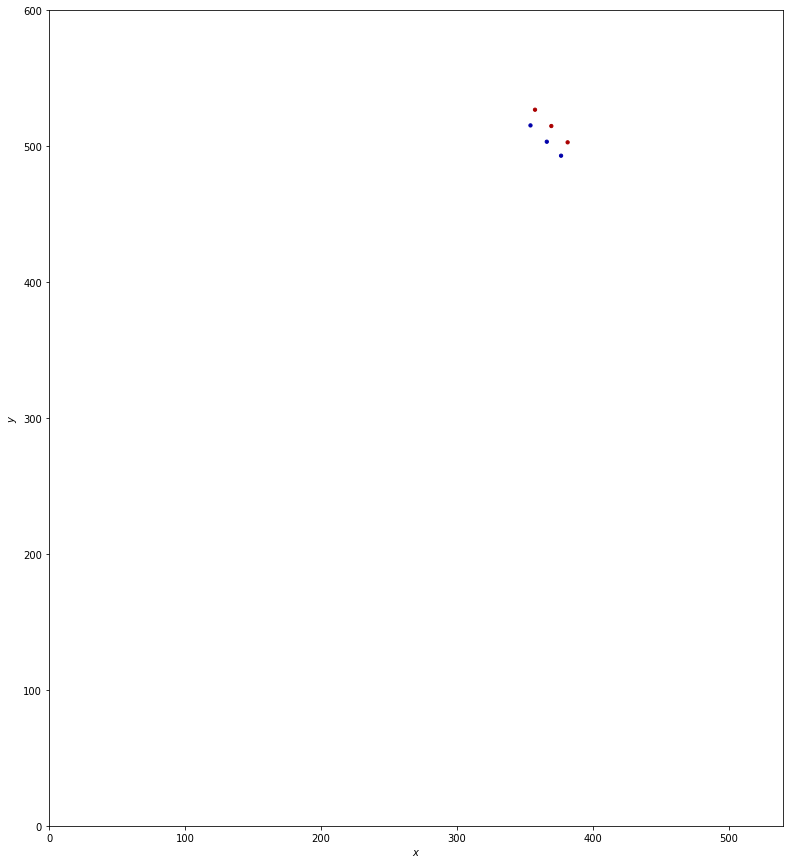

angle -9.98321507435
move (0.98546433548984158, -0.16988244016838511)
338.314486459 523.448409818
79
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


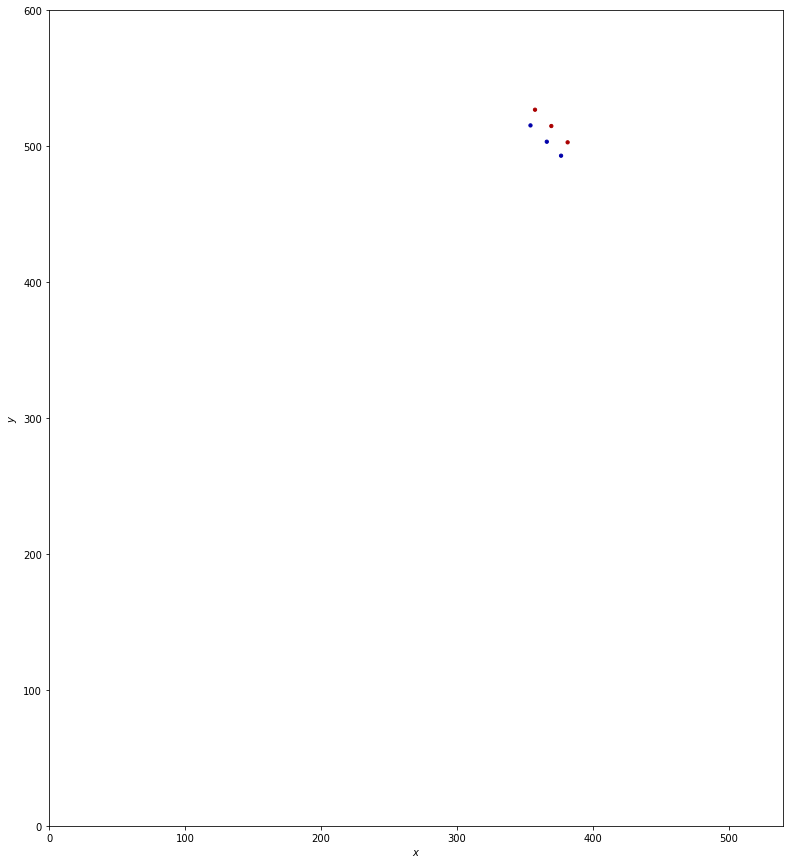

angle -9.78098395246
move (0.98607989719213496, -0.1662721755241946)
339.300566356 523.282137643
80
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)


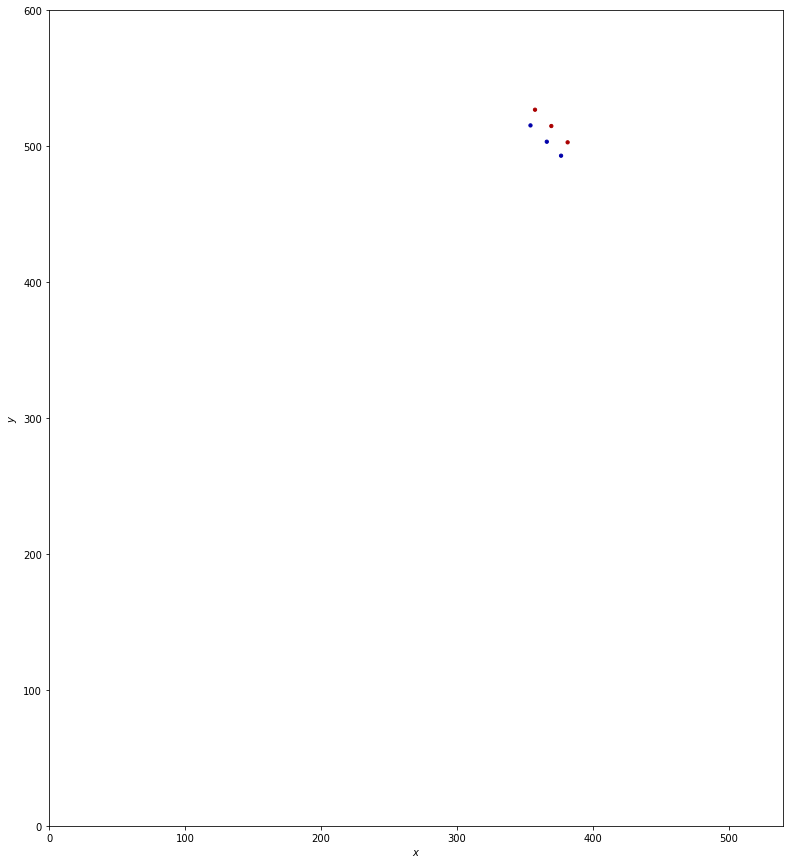

angle -9.57114570243
move (0.98669505233395161, -0.16258189843798901)
340.287261408 523.119555744
81
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


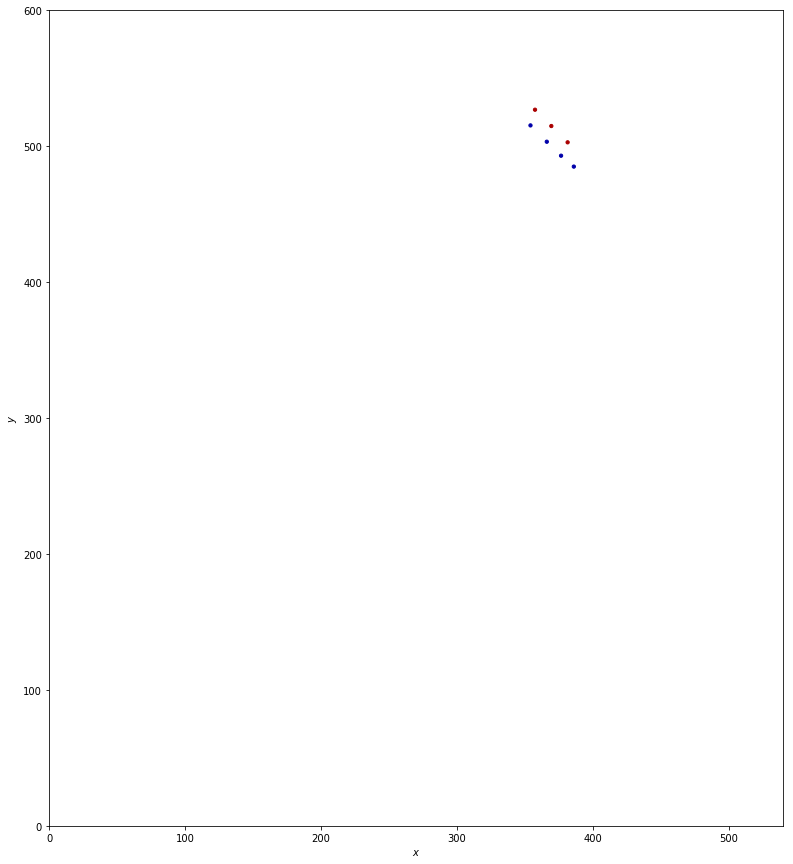

angle -9.35679073436
move (0.99978692026304639, 0.02064253063296323)
341.287048328 523.140198275
82
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


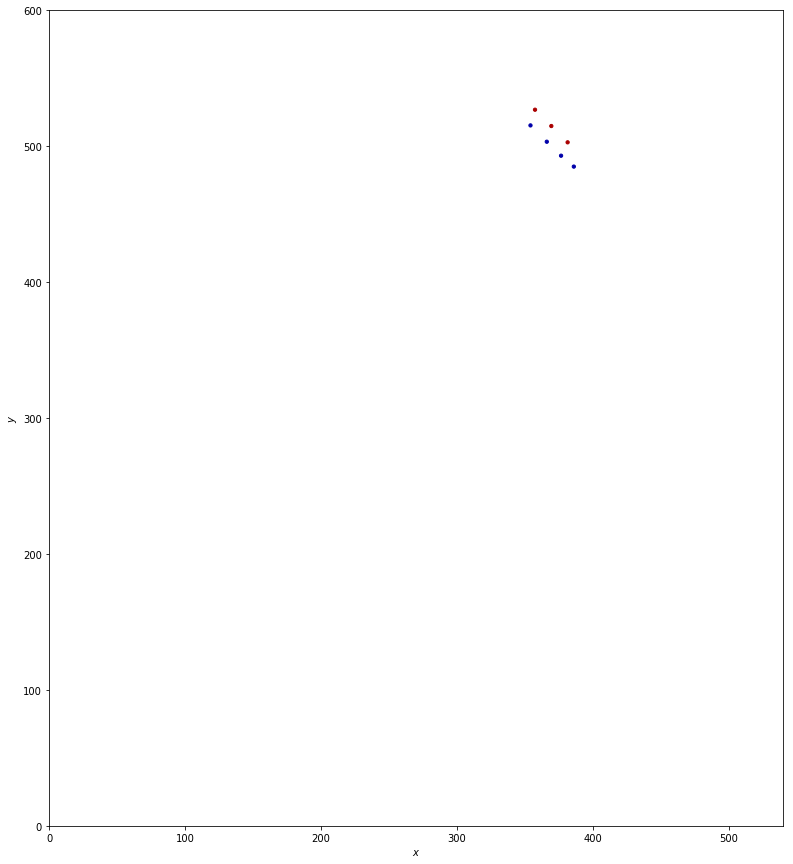

angle 1.18281389616
move (0.99995946768644173, -0.0090034984449455773)
342.287007796 523.131194776
83
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


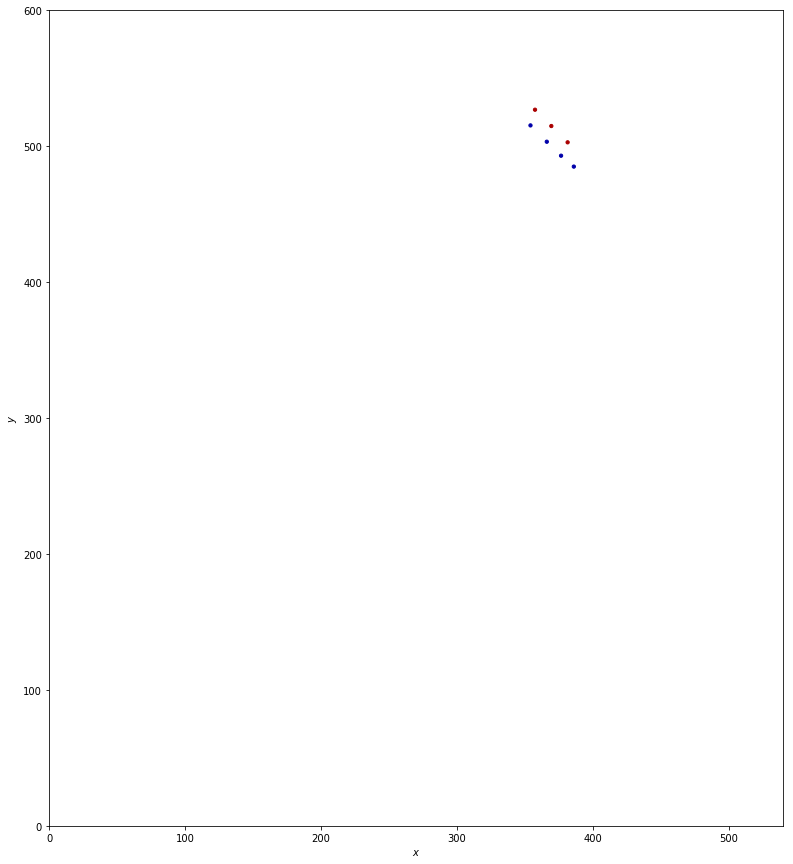

angle -0.515869431561
move (0.99929847964075624, -0.037450615317683032)
343.286306276 523.093744161
84
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


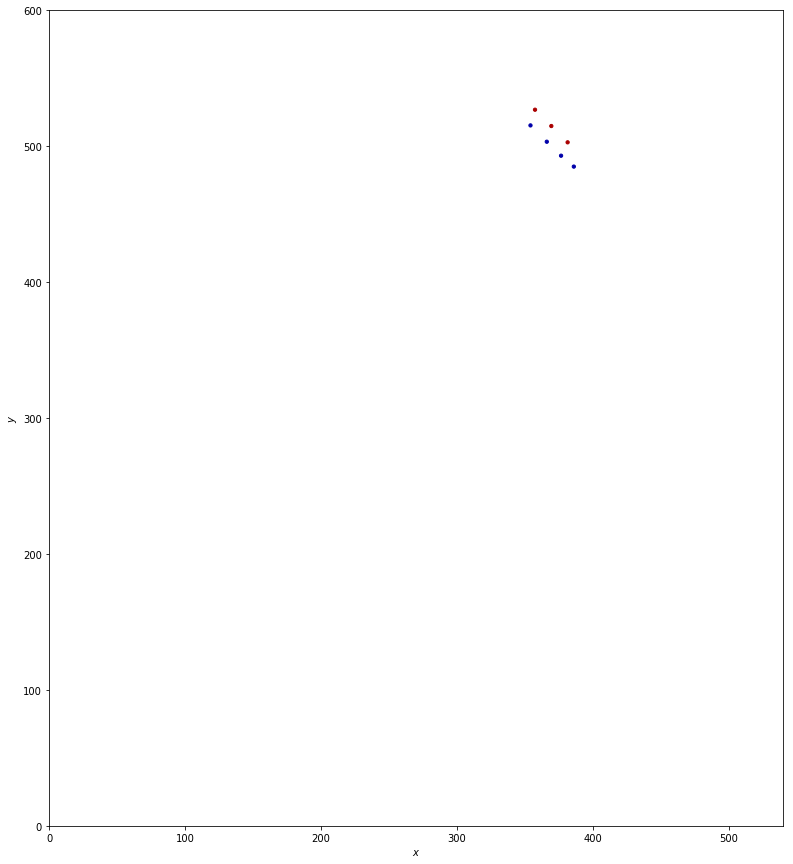

angle -2.146264104
move (0.99791700442566444, -0.064510869457079317)
344.28422328 523.029233291
85
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


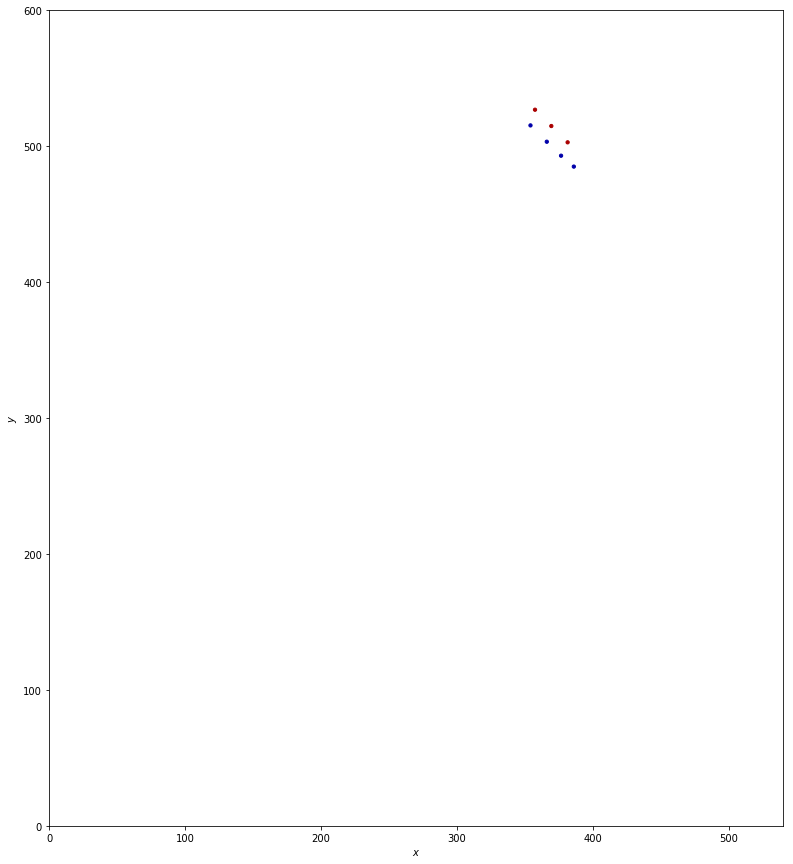

angle -3.69876908263
move (0.99593961926100194, -0.0900237456799622)
345.280162899 522.939209546
86
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


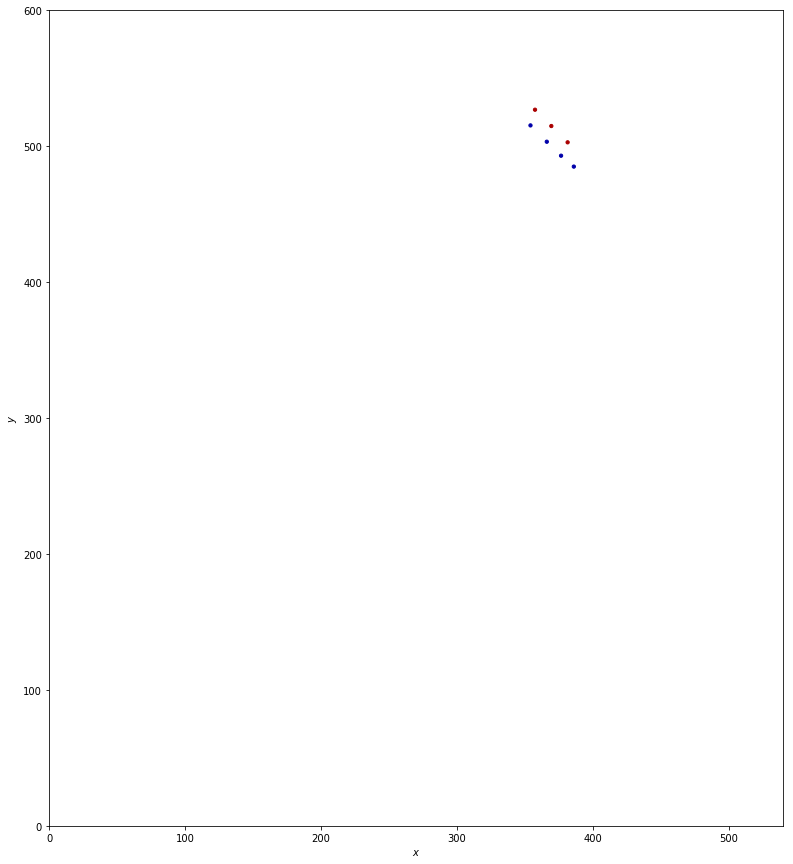

angle -5.1649731634
move (0.99349567033310715, -0.11386989518467987)
346.27365857 522.825339651
87
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


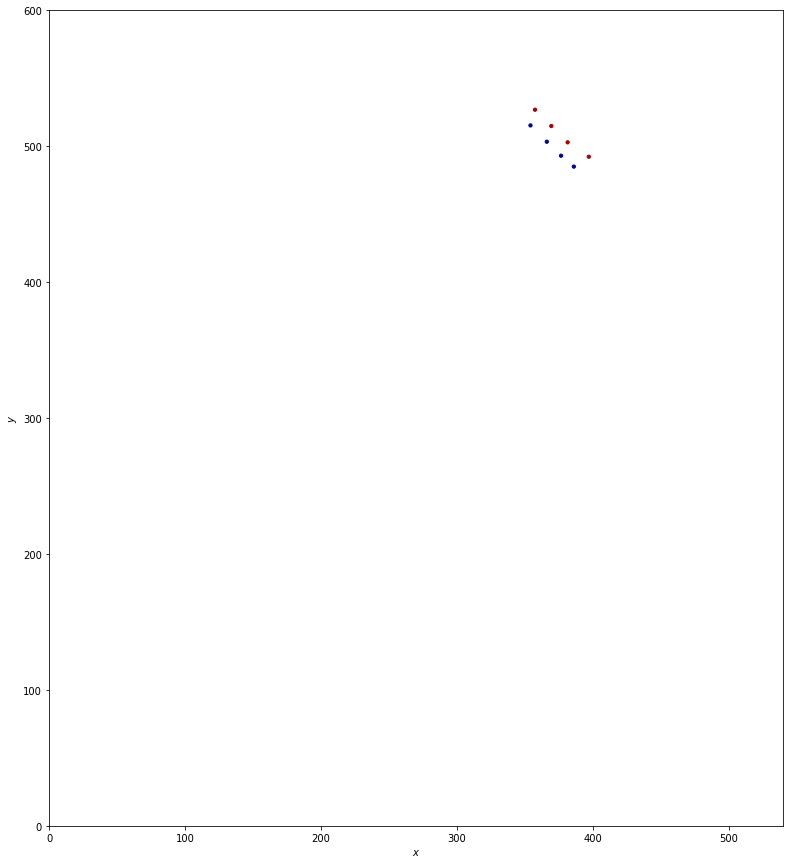

angle -6.53844663508
move (0.97187261165456362, -0.23550716913872846)
347.245531181 522.589832481
88
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


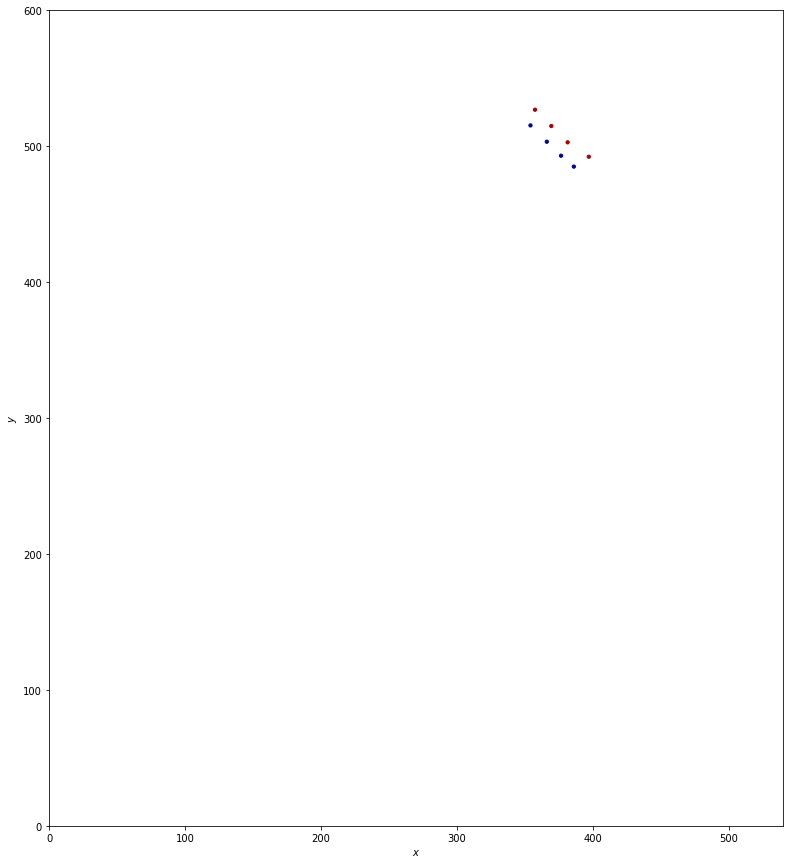

angle -13.6215205353
move (0.97343055914772814, -0.22898241530157171)
348.218961741 522.360850066
89
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


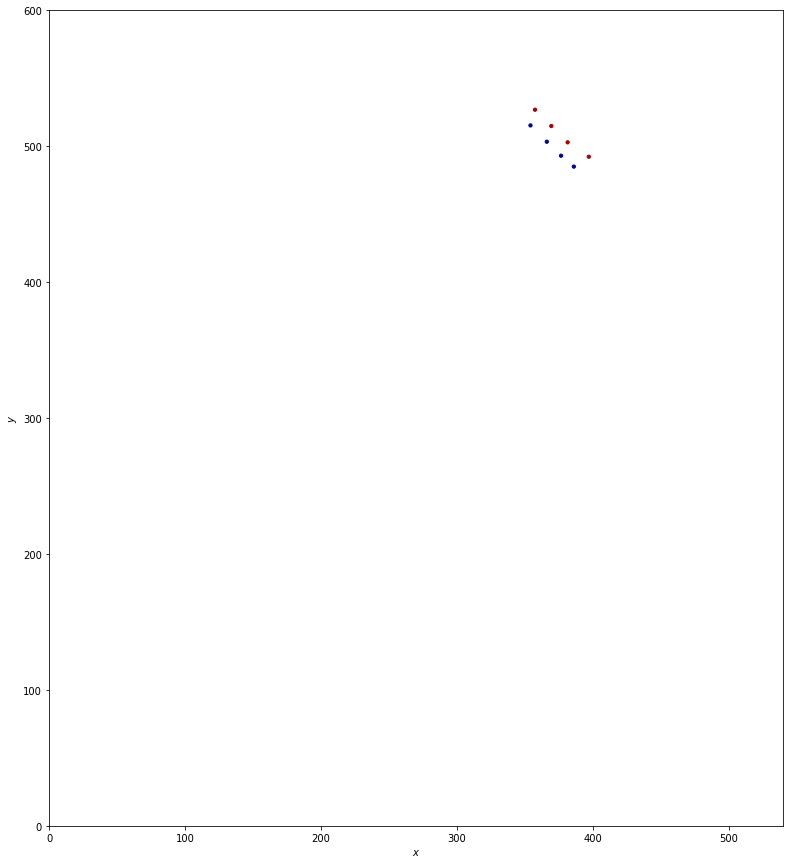

angle -13.2371696938
move (0.97449710543047741, -0.22440007020413574)
349.193458846 522.136449996
90
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


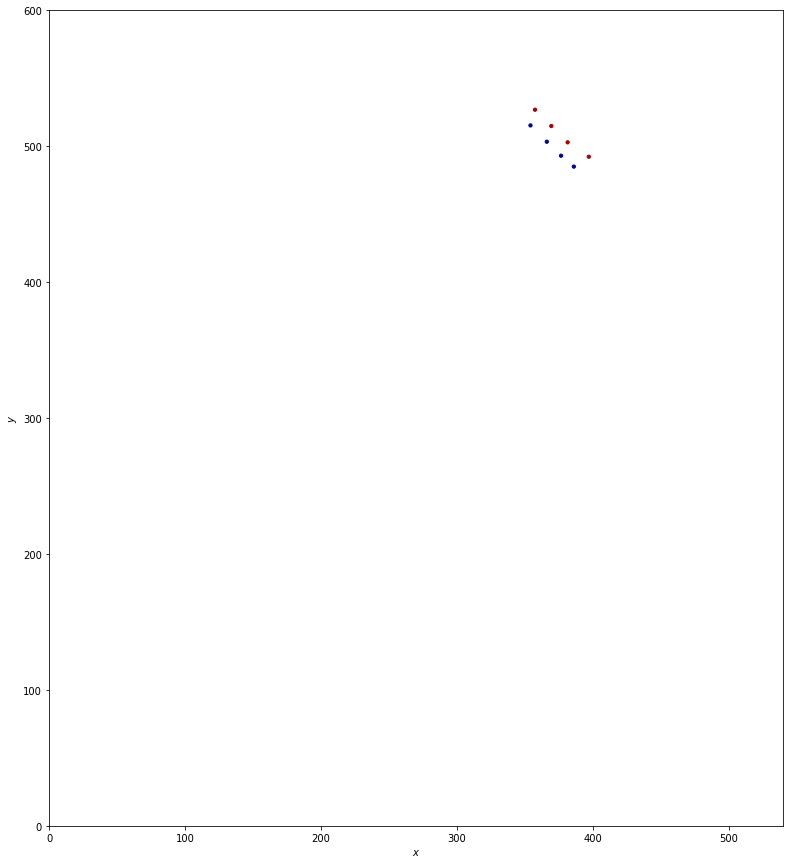

angle -12.967602651
move (0.9749232193101075, -0.22254149377142246)
350.168382065 521.913908502
91
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


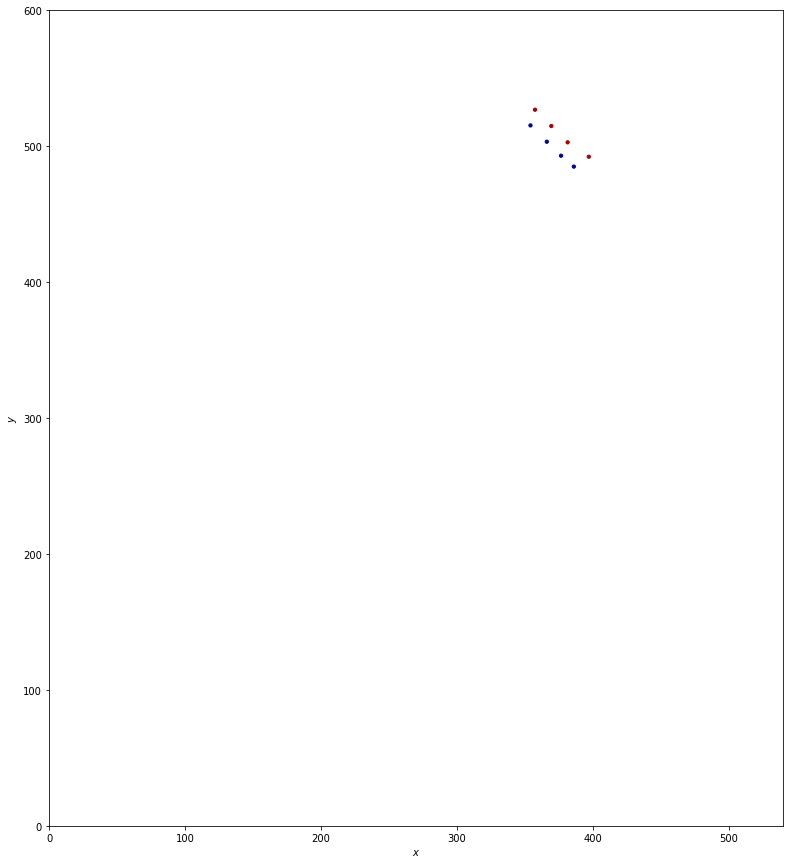

angle -12.8583511449
move (0.97451198392415816, -0.22433544790826371)
351.142894049 521.689573054
92
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


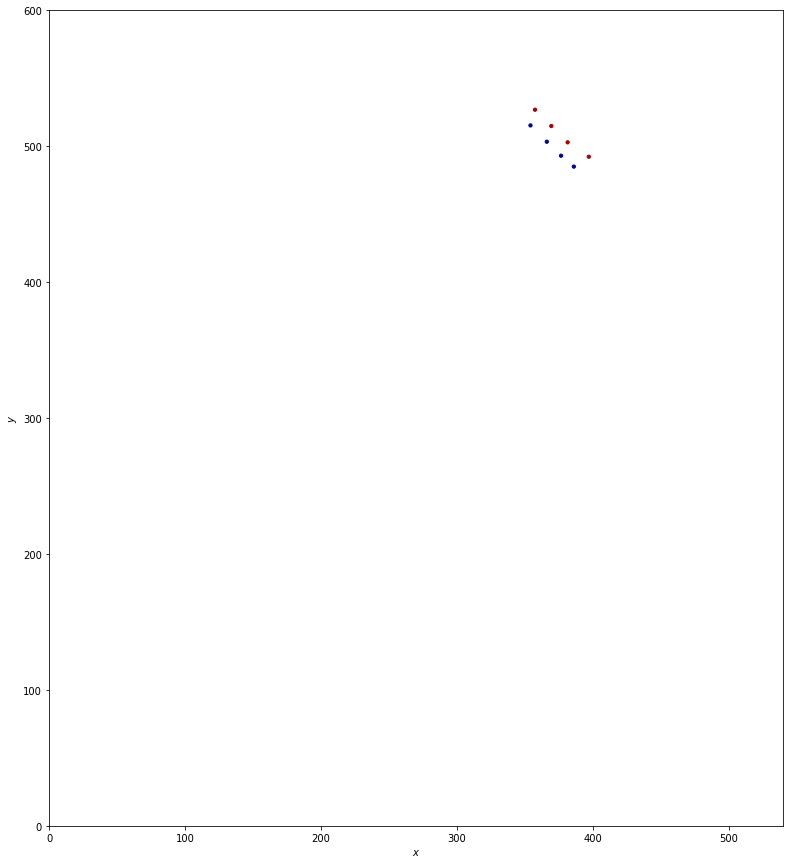

angle -12.9638031974
move (0.97299196424613177, -0.2308389861190136)
352.115886013 521.458734068
93
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


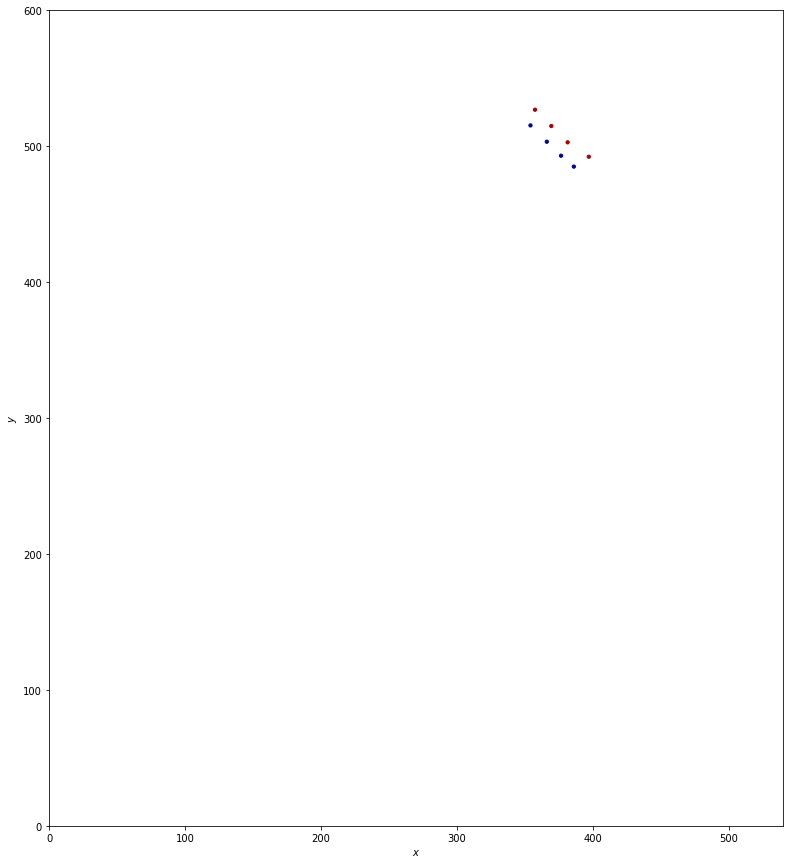

angle -13.3464713882
move (0.96997709095517004, -0.24319630552733701)
353.085863104 521.215537763
94
yes 1 (357.5678, 526.9202)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


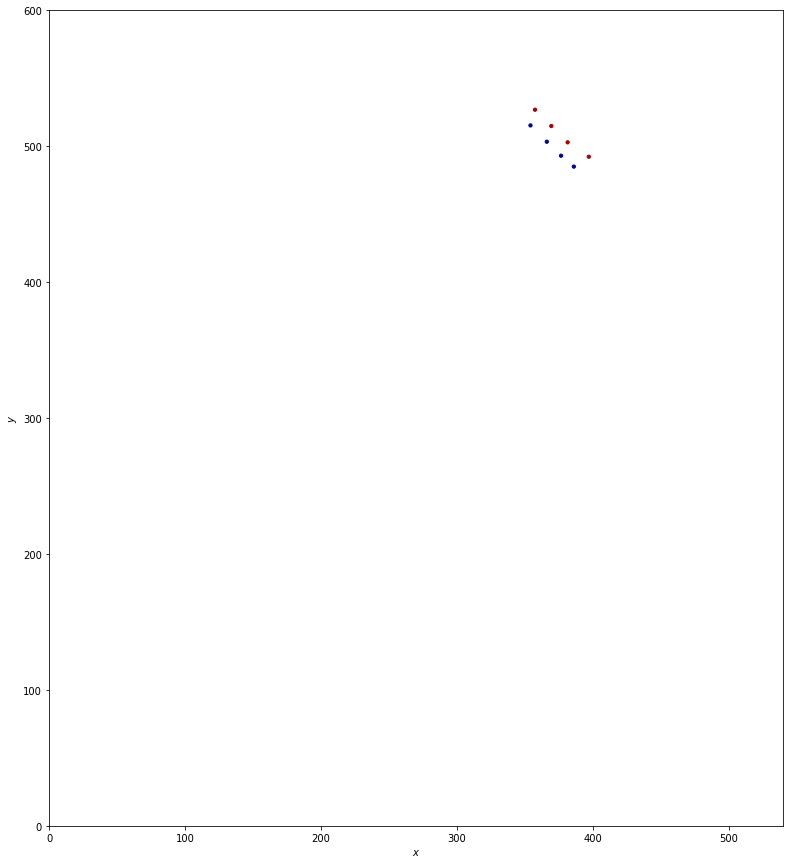

angle -14.0752660132
move (0.96490970189628655, -0.26258192471382985)
354.050772806 520.952955838
95
yes 1 (357.5678, 526.9202)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


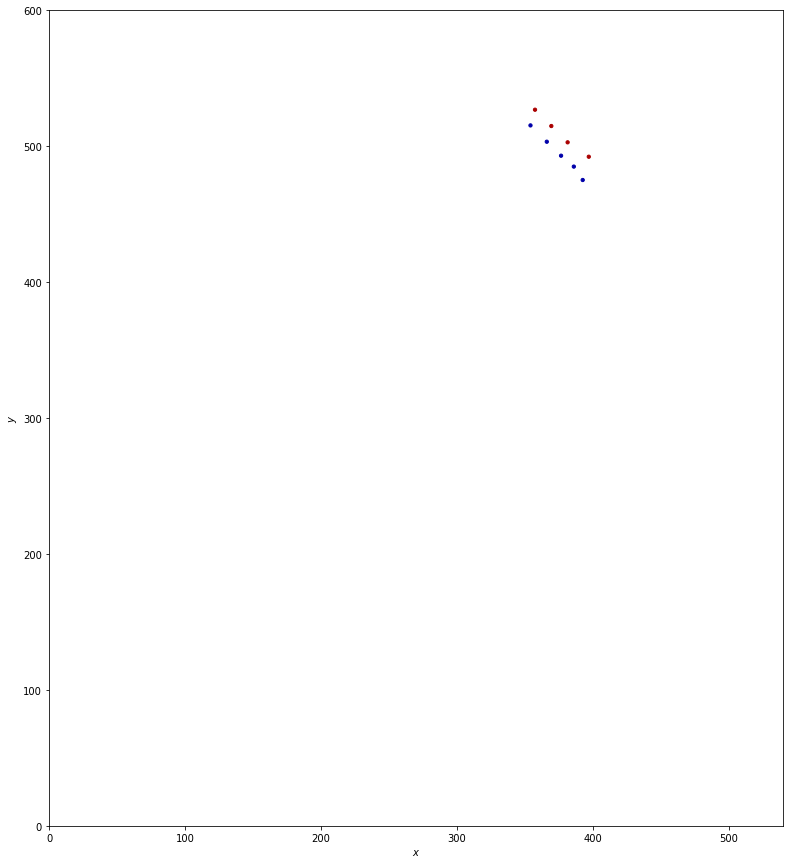

angle -15.2233197437
move (0.96418209605551941, -0.26524118391755303)
355.014954902 520.687714654
96
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


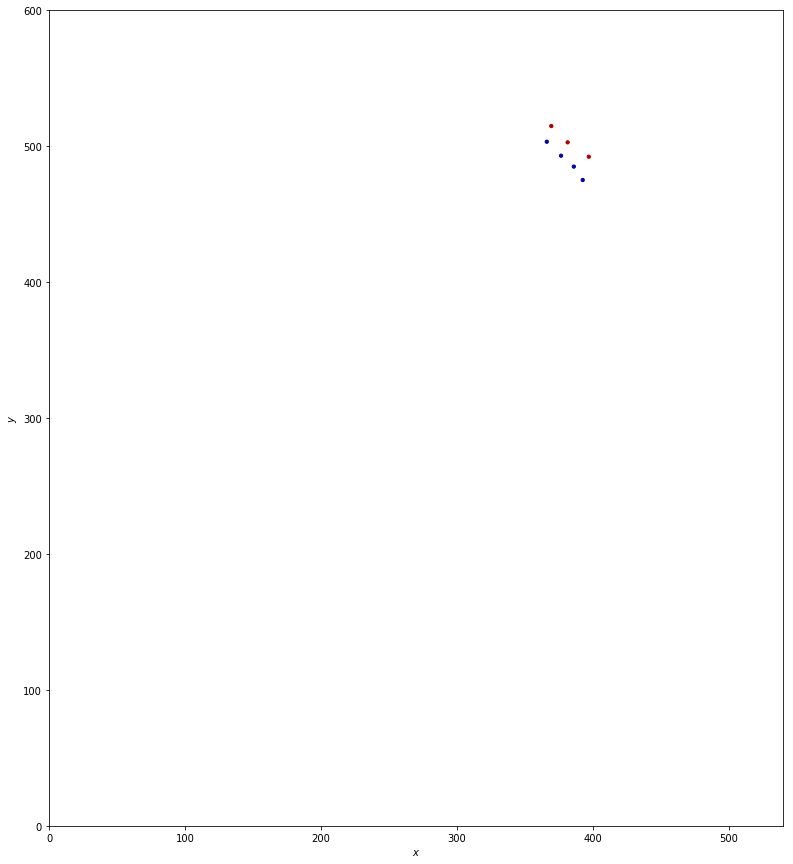

angle -15.3812844736
move (0.68032663342298205, -0.7329090474645209)
355.695281536 519.954805607
97
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


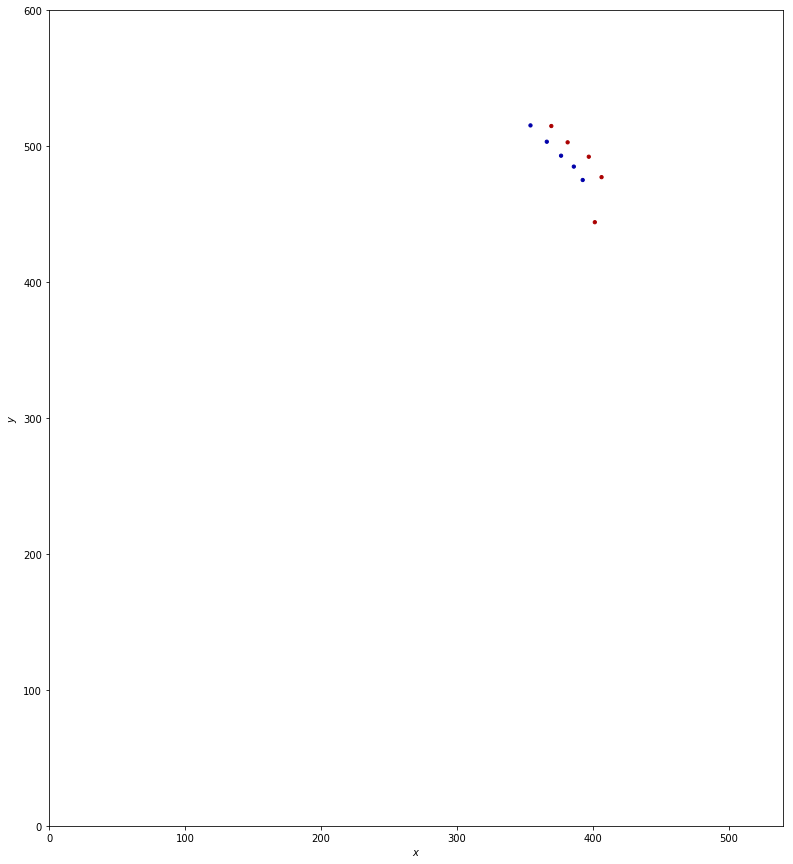

angle -47.1308273934
move (0.89993081528962937, -0.43603271401598181)
356.595212351 519.518772893
98
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


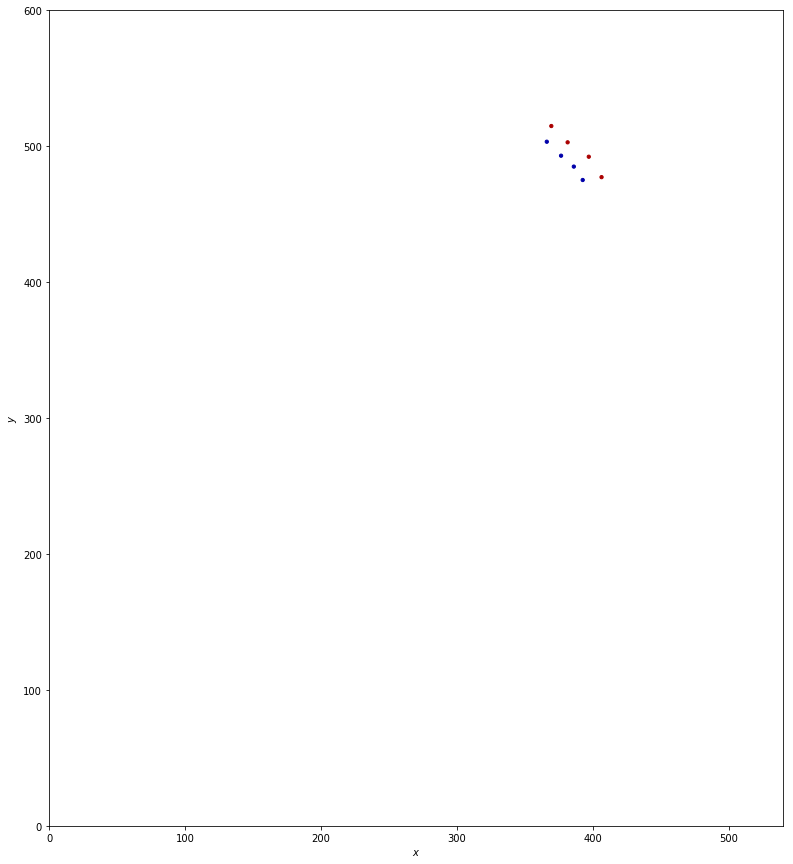

angle -25.8510252947
move (0.49126072923417763, -0.87101256931935489)
357.08647308 518.647760323
99
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


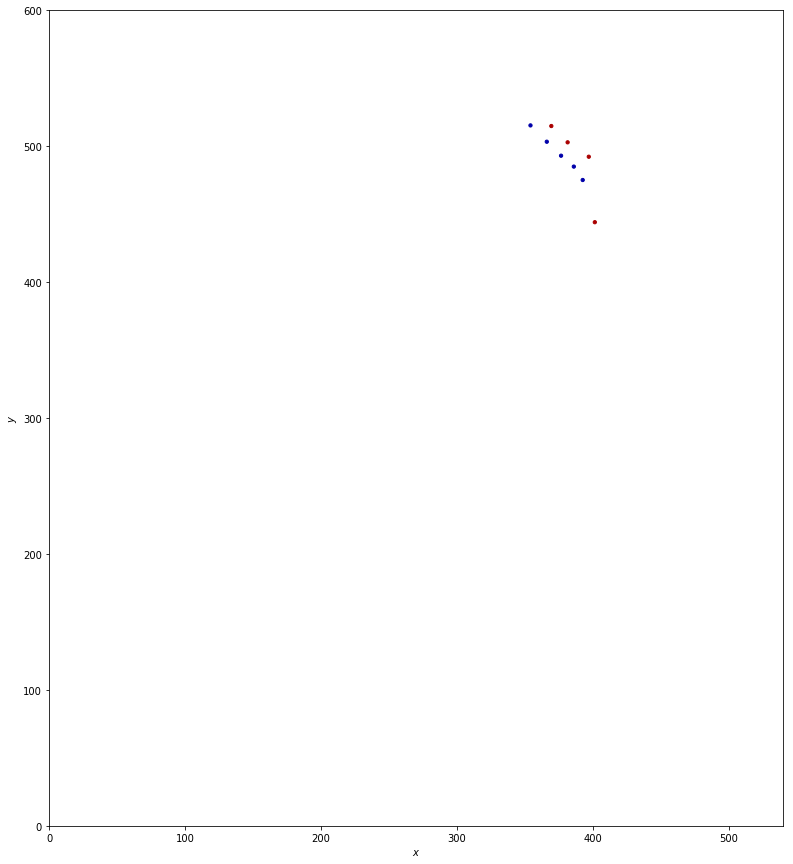

angle -60.5765206218
move (0.72336612201632178, -0.69046466493157188)
357.809839202 517.957295658
100
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


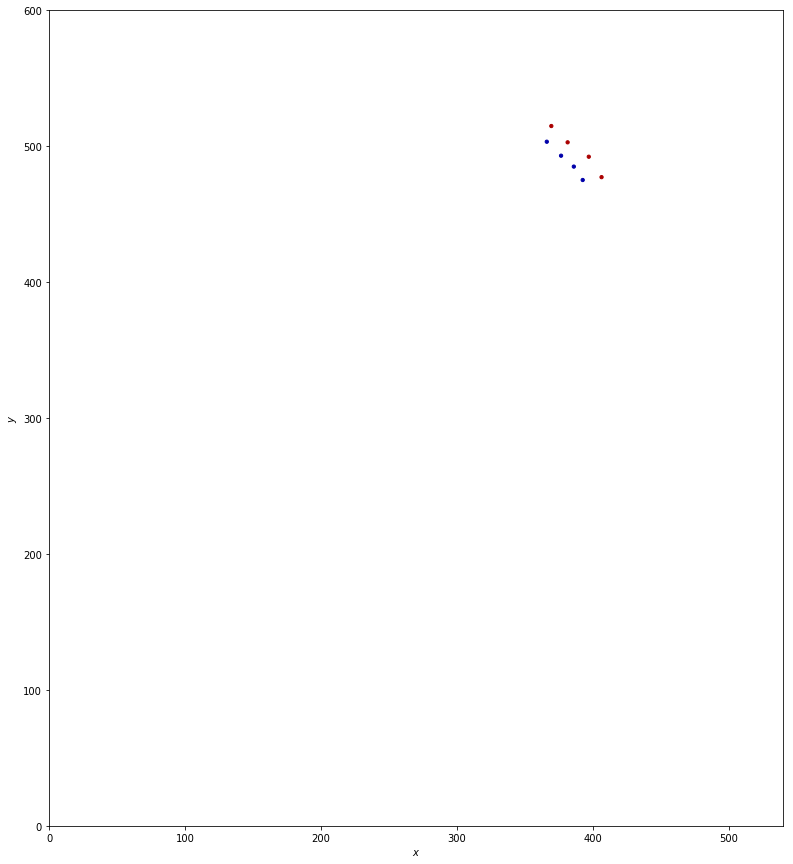

angle -43.6669023856
move (0.53615610469100328, -0.84411884909802248)
358.345995307 517.113176809
101
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


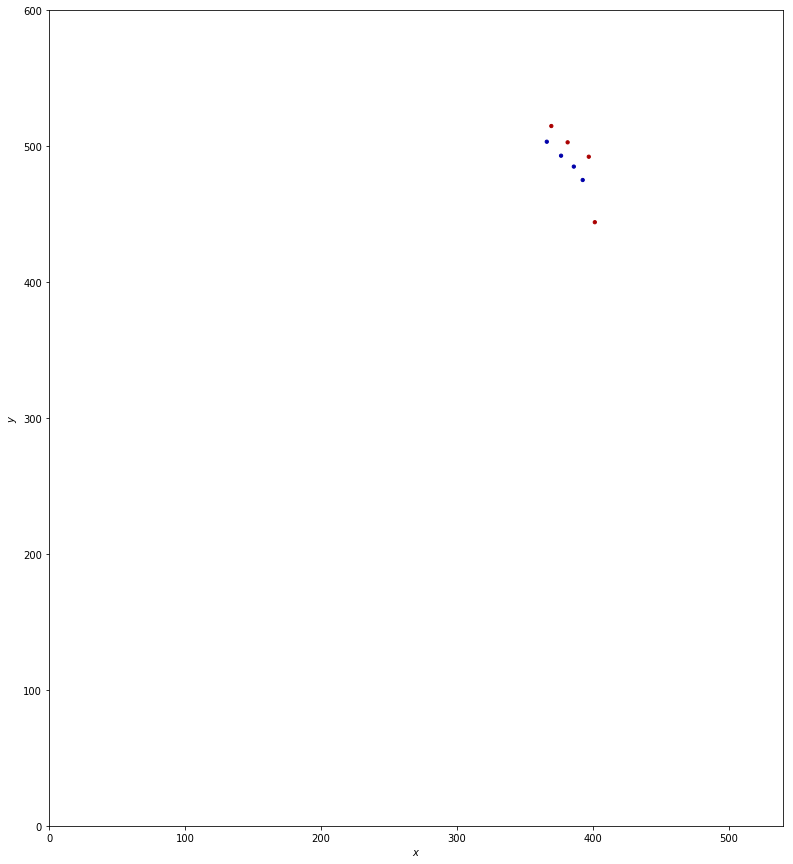

angle -57.5776503983
move (0.60604993898423098, -0.79542659715225139)
358.952045246 516.317750212
102
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


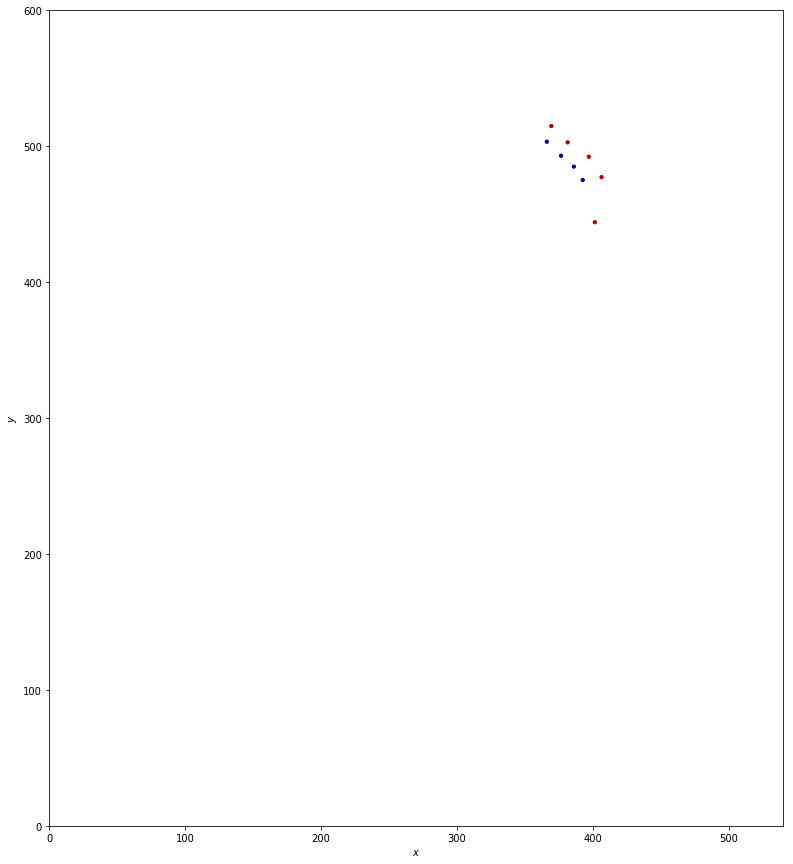

angle -52.6955674038
move (0.54053227457146669, -0.84132327921352357)
359.492577521 515.476426933
103
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


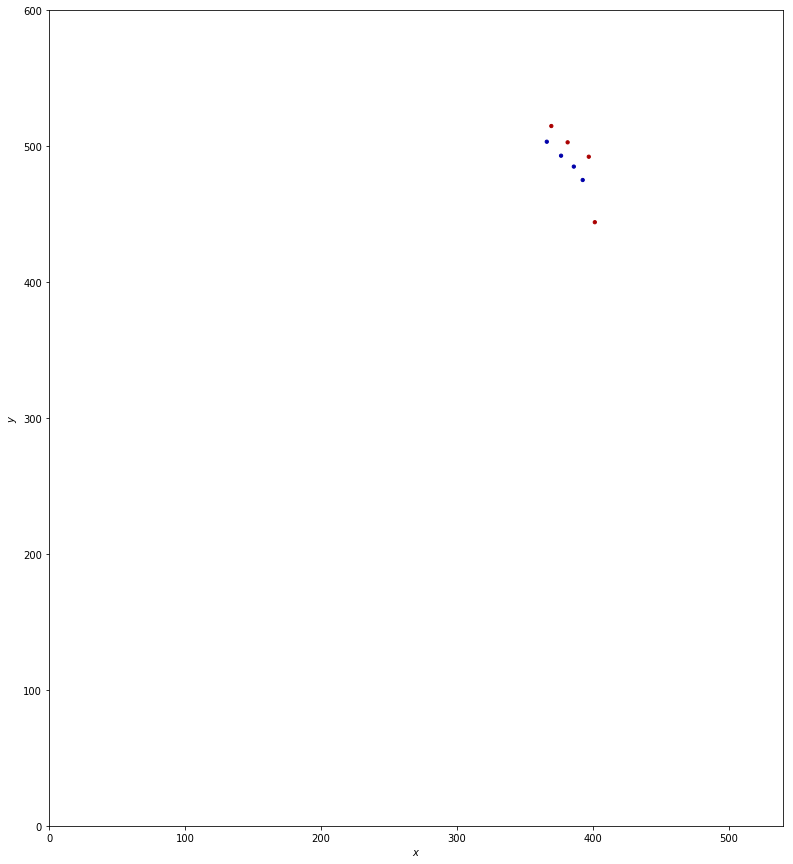

angle -57.2801195642
move (0.68352701358232293, -0.72992521651415143)
360.176104534 514.746501716
104
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


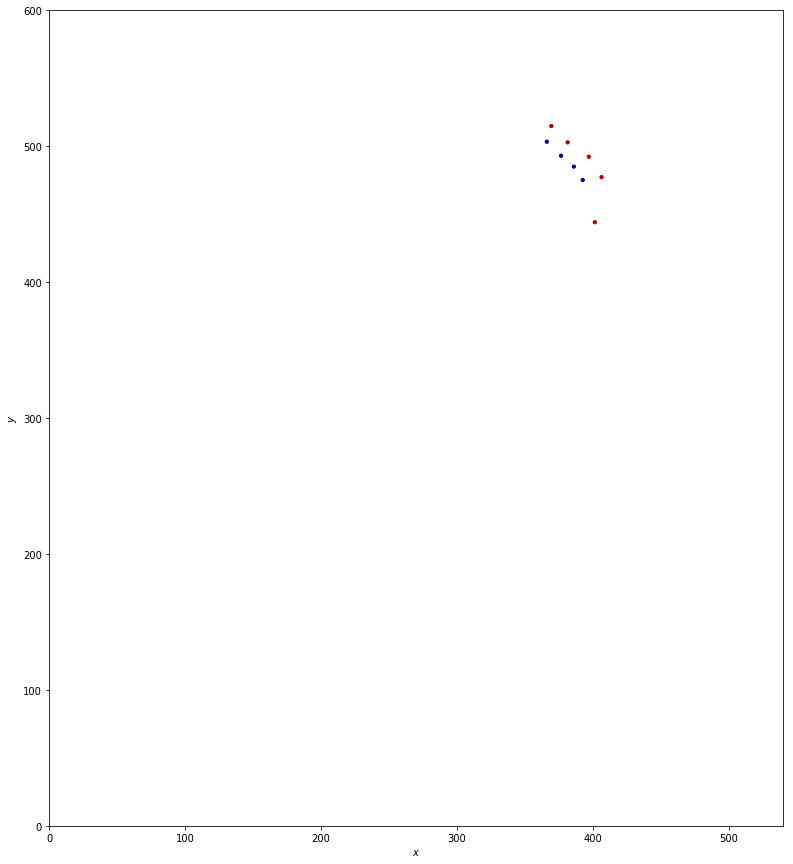

angle -46.8801250576
move (0.64288799776887617, -0.76596019630573853)
360.818992532 513.98054152
105
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


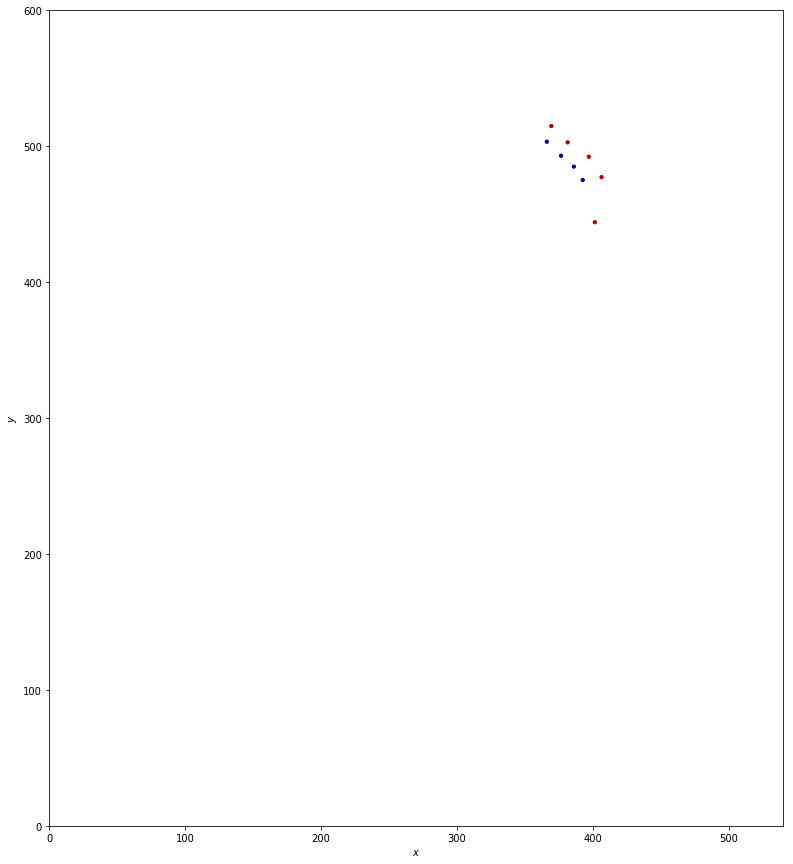

angle -49.9924911279
move (0.69654602422585432, -0.71751211567133522)
361.515538556 513.263029404
106
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


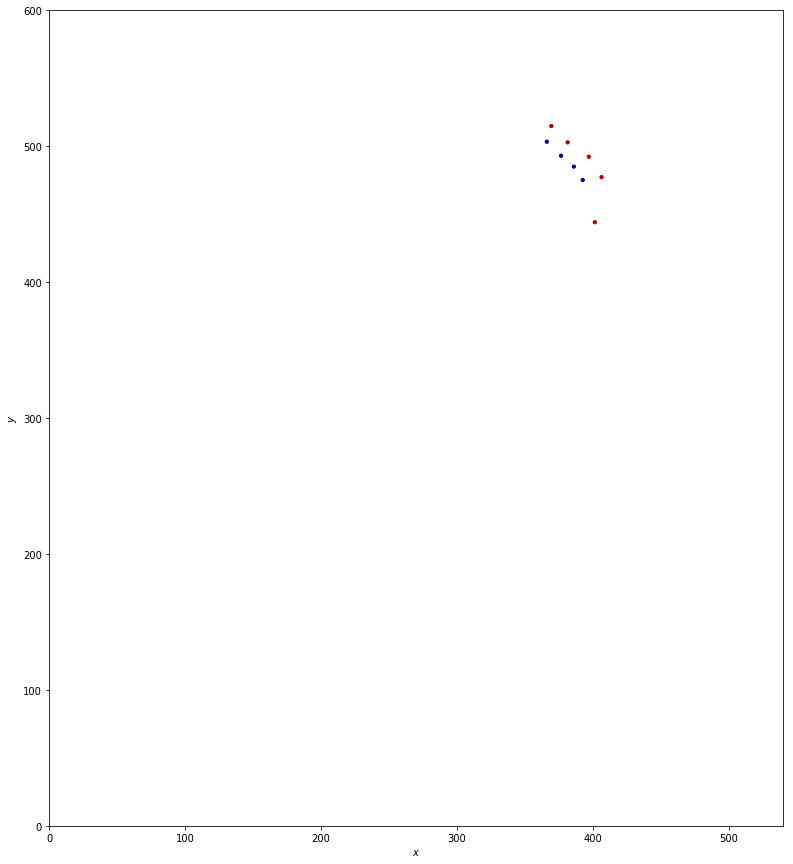

angle -45.8494562584
move (0.74582555760121205, -0.66614130455094966)
362.261364114 512.5968881
107
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


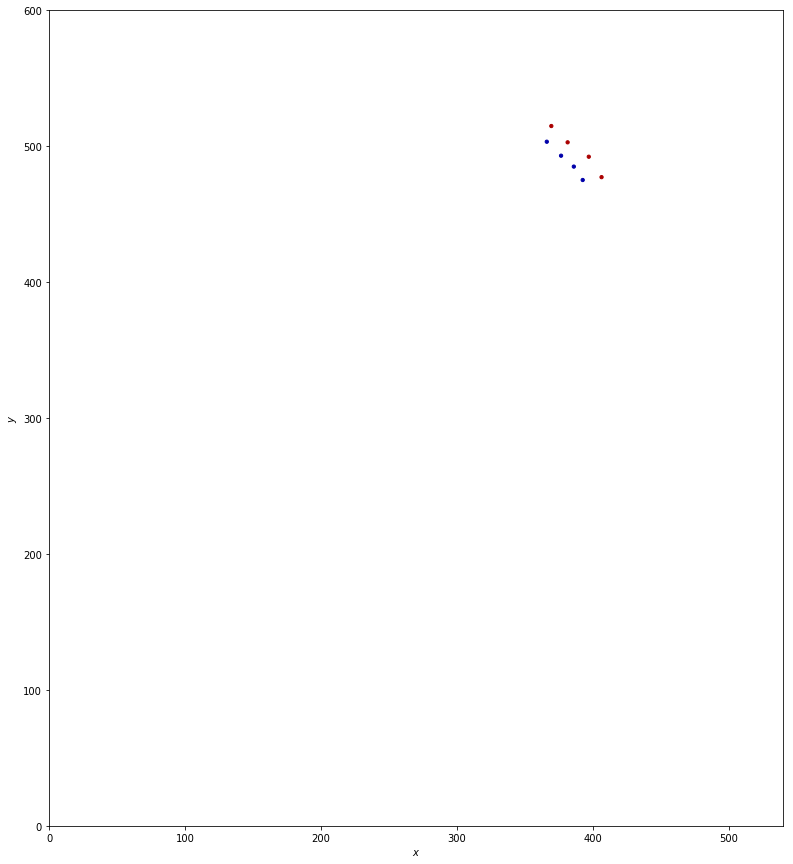

angle -41.7699428422
move (0.81468279275759947, -0.57990684354013122)
363.076046907 512.016981256
108
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


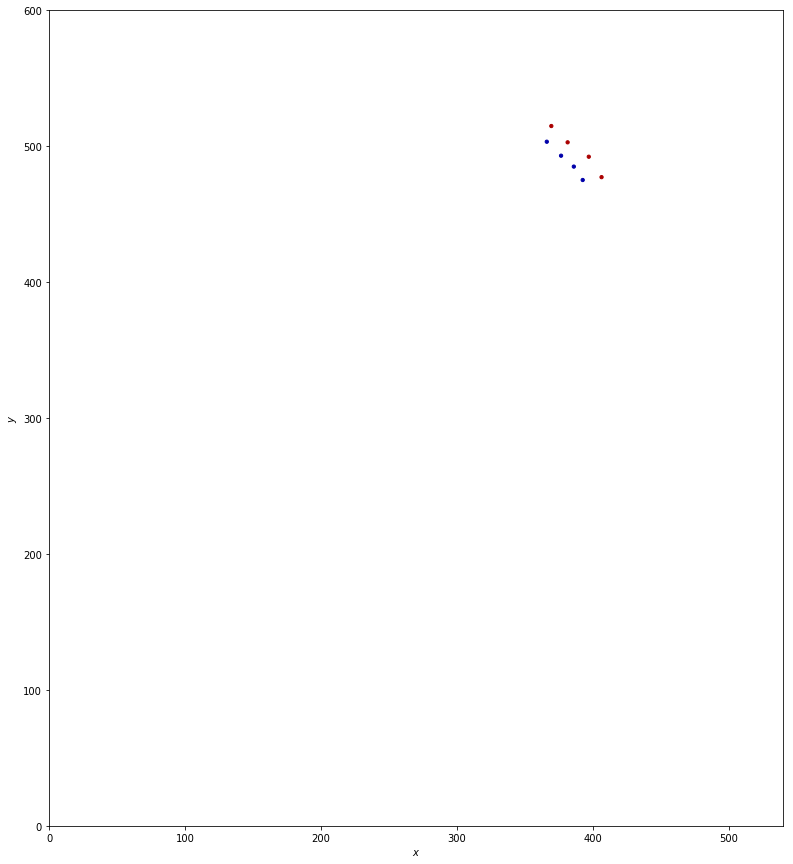

angle -35.4439907772
move (0.84417308806802871, -0.53607070184975436)
363.920219995 511.480910554
109
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


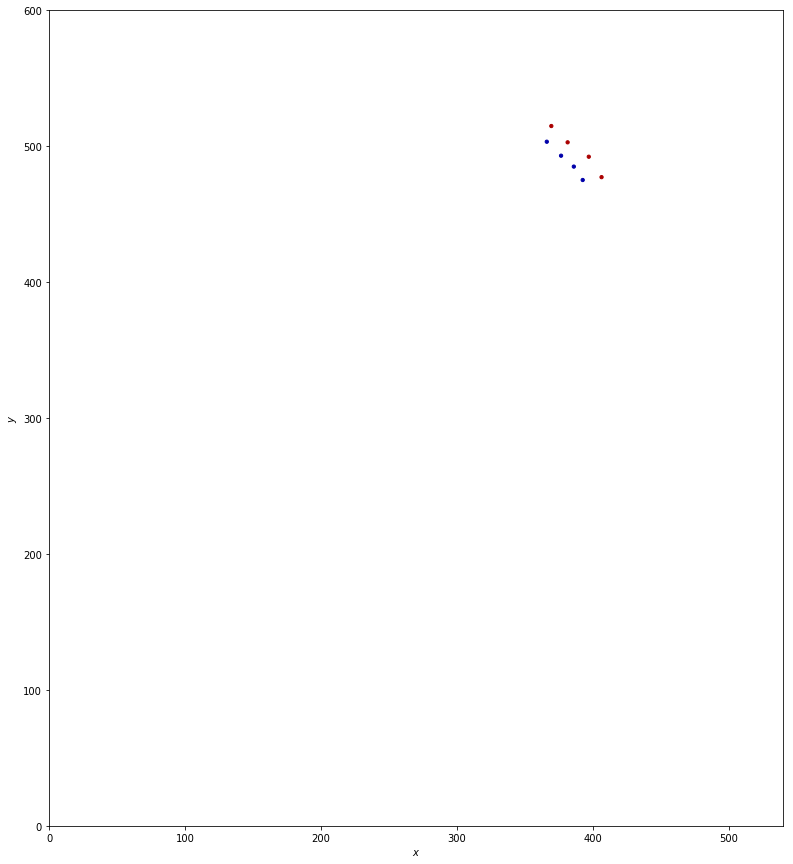

angle -32.4165529474
move (0.87079201427432429, -0.49165157161964296)
364.791012009 510.989258983
110
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


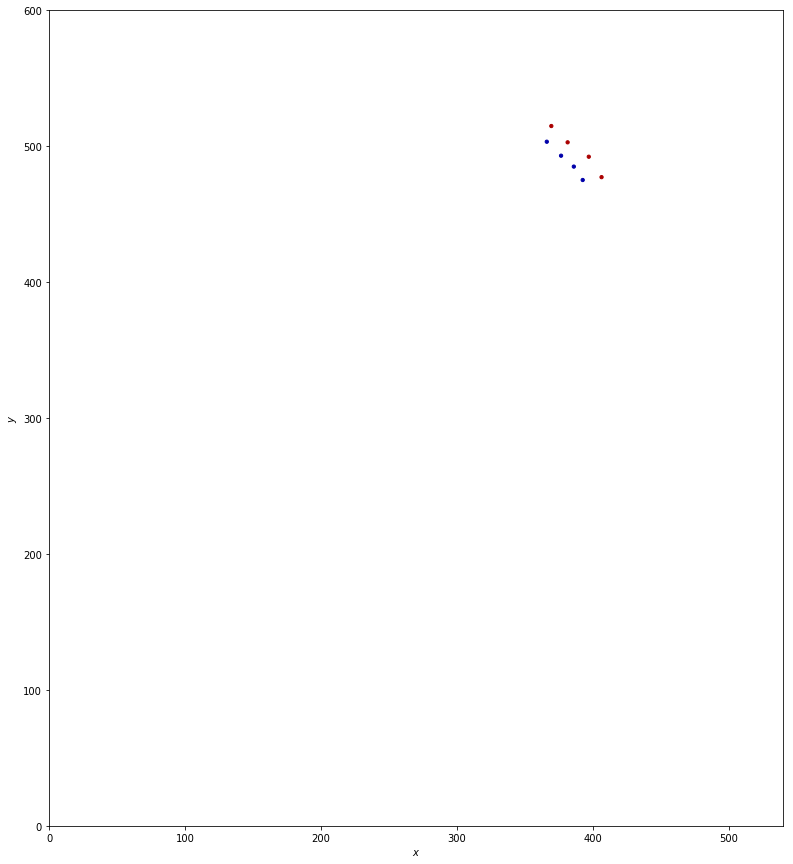

angle -29.4491925024
move (0.89383442692497106, -0.44839716462496565)
365.684846436 510.540861818
111
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


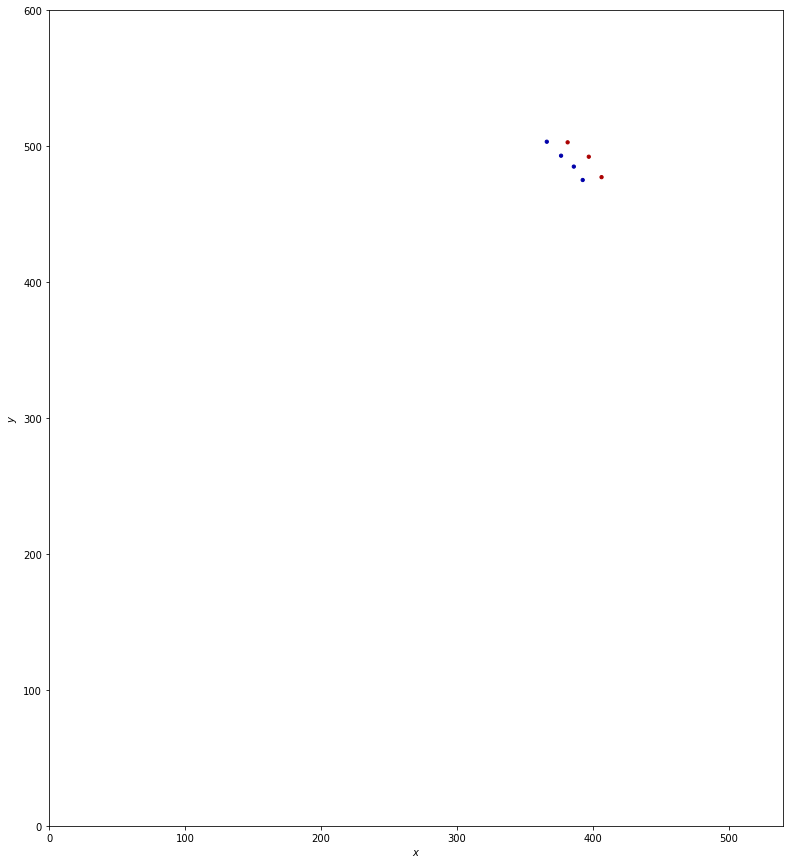

angle -26.6408941131
move (0.99602202983988619, -0.089107328955775875)
366.680868466 510.451754489
112
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (369.5678, 514.9202)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


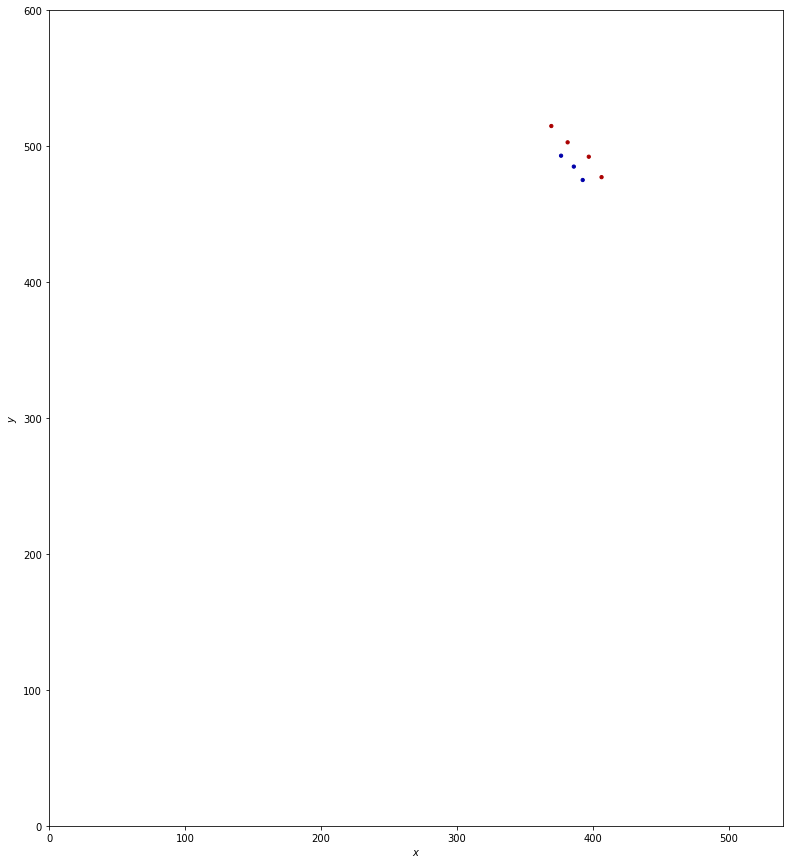

angle -5.11225447086
move (0.81399604076826959, -0.58087042067364869)
367.494864506 509.870884069
113
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


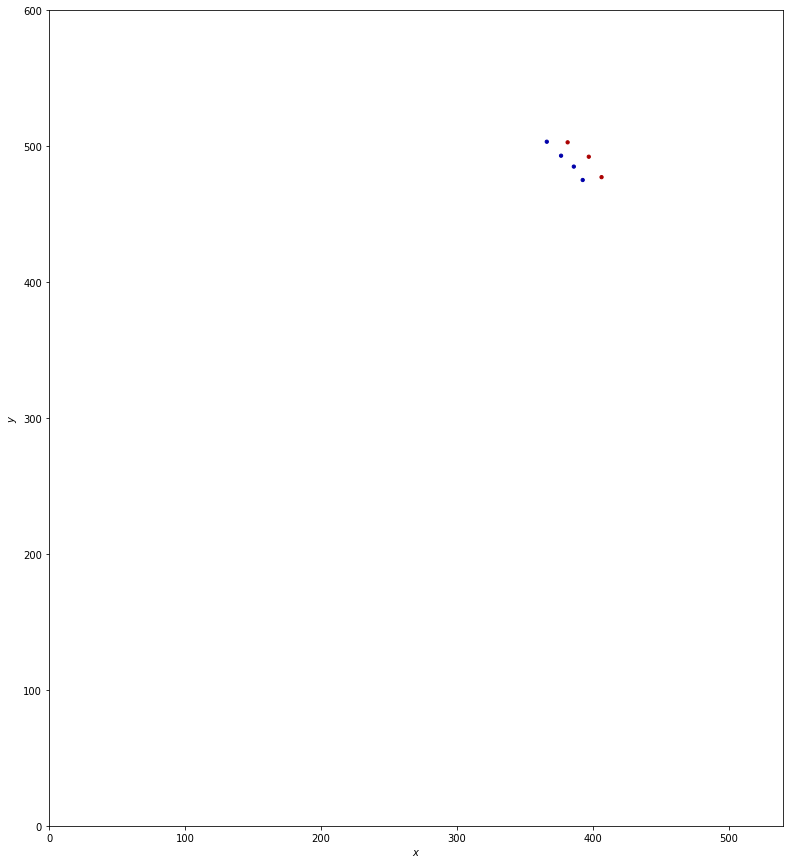

angle -35.5117867053
move (0.94434727789035022, -0.32895017668498933)
368.439211784 509.541933892
114
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


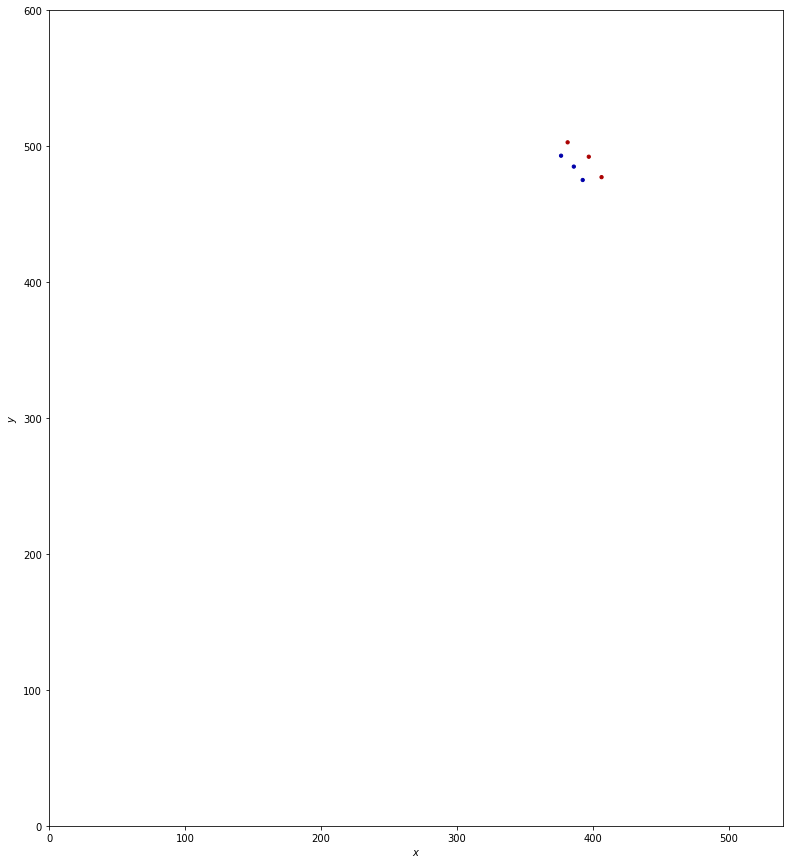

angle -19.205067881
move (0.58922473653859542, -0.80796918867678535)
369.028436521 508.733964703
115
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


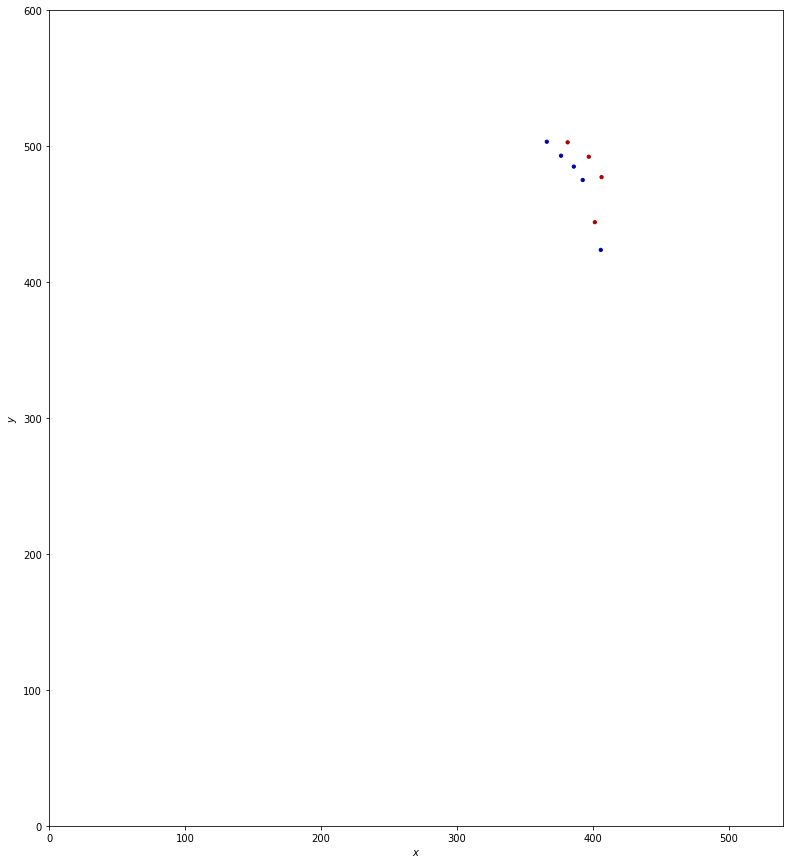

angle -53.8979875635
move (0.82932825046298497, -0.55876171395685703)
369.857764771 508.175202989
116
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


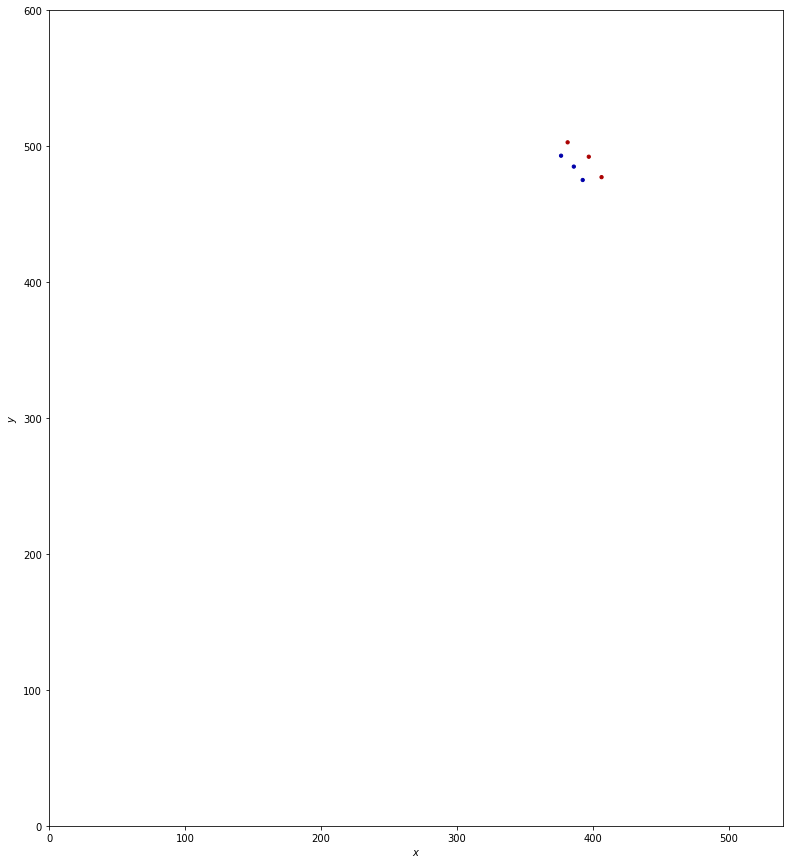

angle -33.9702052003
move (0.57321507908081537, -0.81940495062842678)
370.43097985 507.355798039
117
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


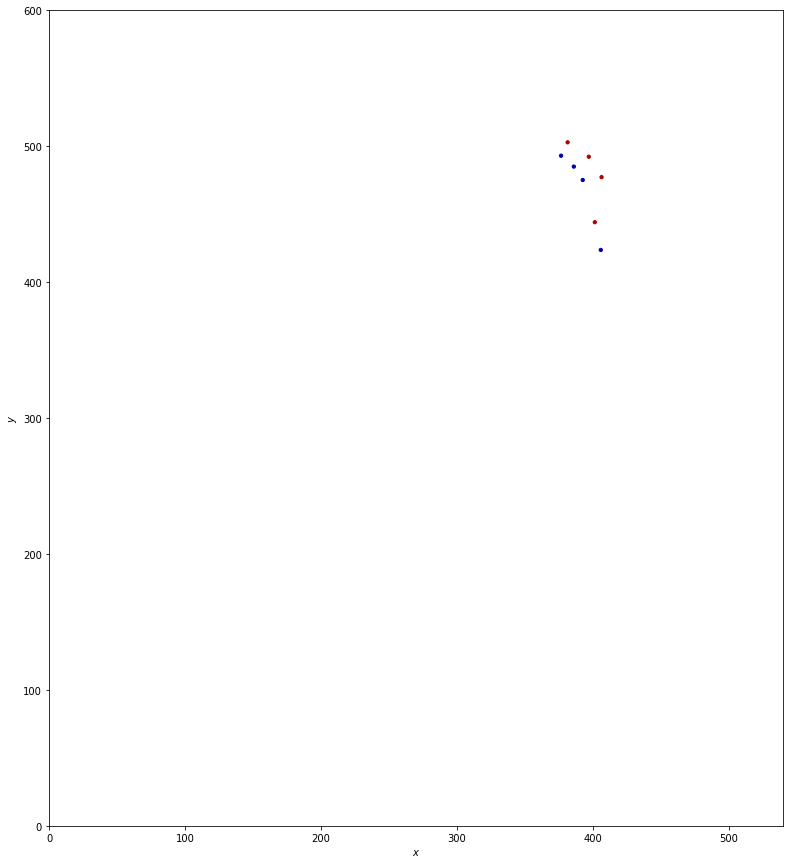

angle -55.0252713164
move (0.55719243403802521, -0.83038340027410285)
370.988172284 506.525414638
118
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


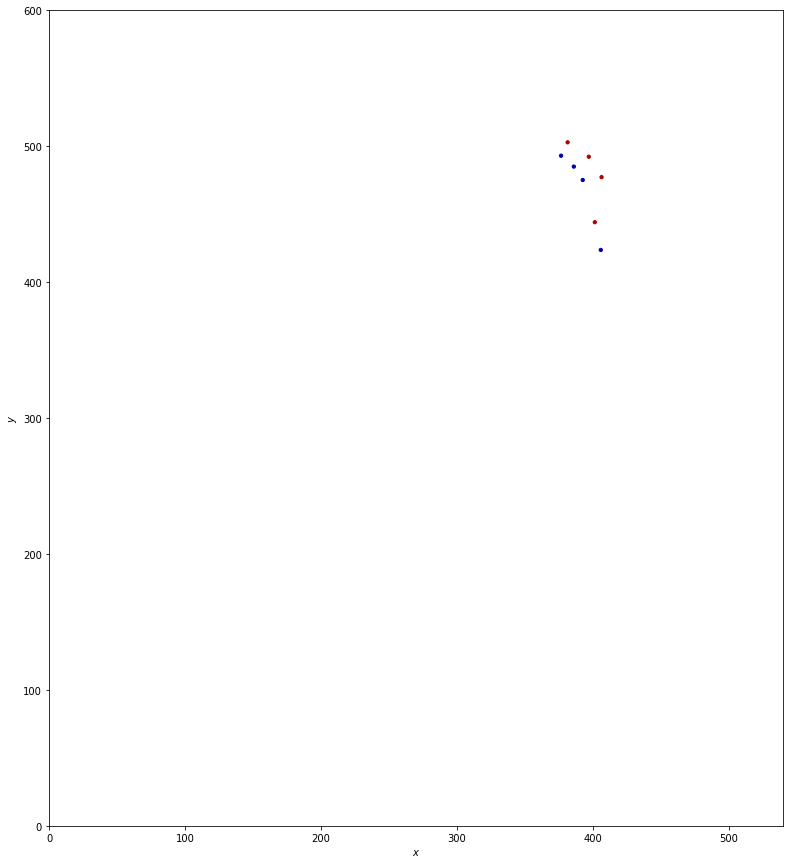

angle -56.1381426436
move (0.58005856367787667, -0.81457477416377111)
371.568230848 505.710839864
119
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


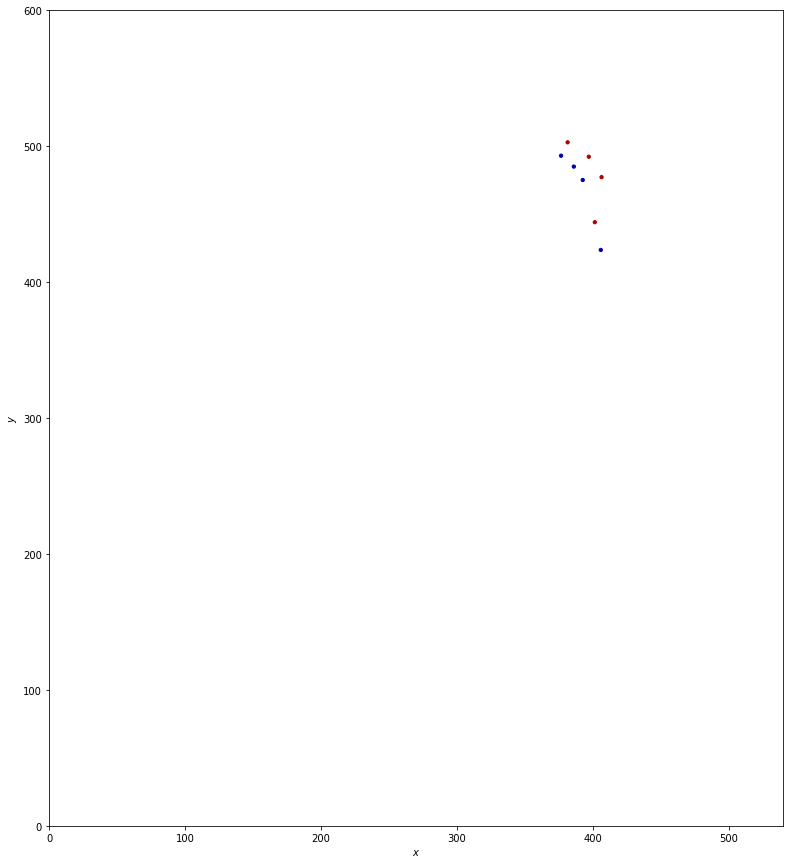

angle -54.5453381985
move (0.60406316175166075, -0.7969364445265299)
372.17229401 504.91390342
120
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


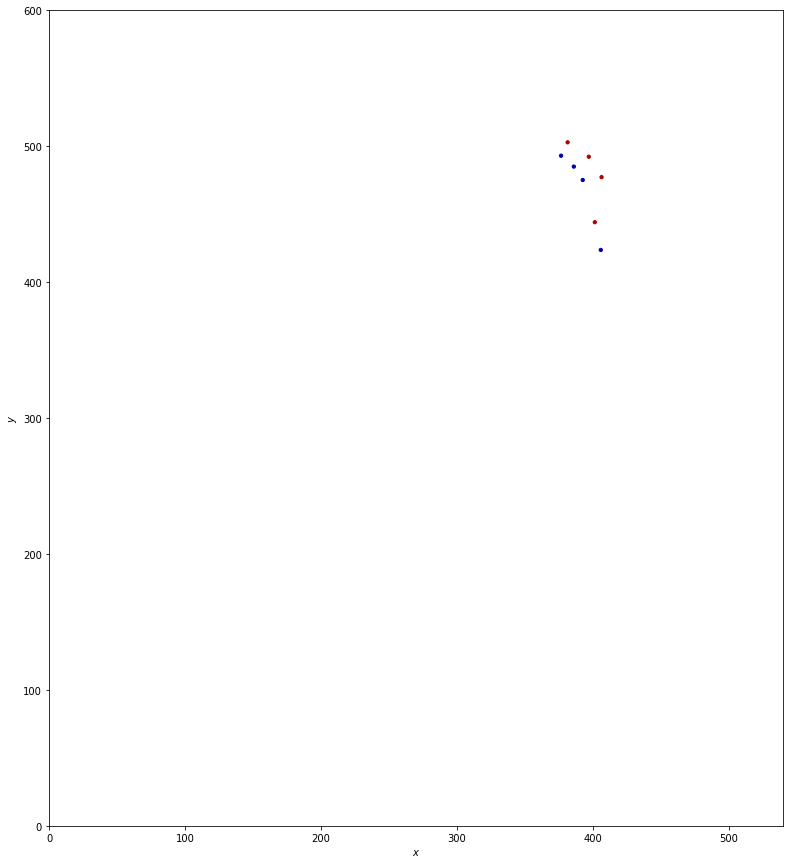

angle -52.8385422006
move (0.62929947788976814, -0.77716289613417933)
372.801593488 504.136740523
121
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


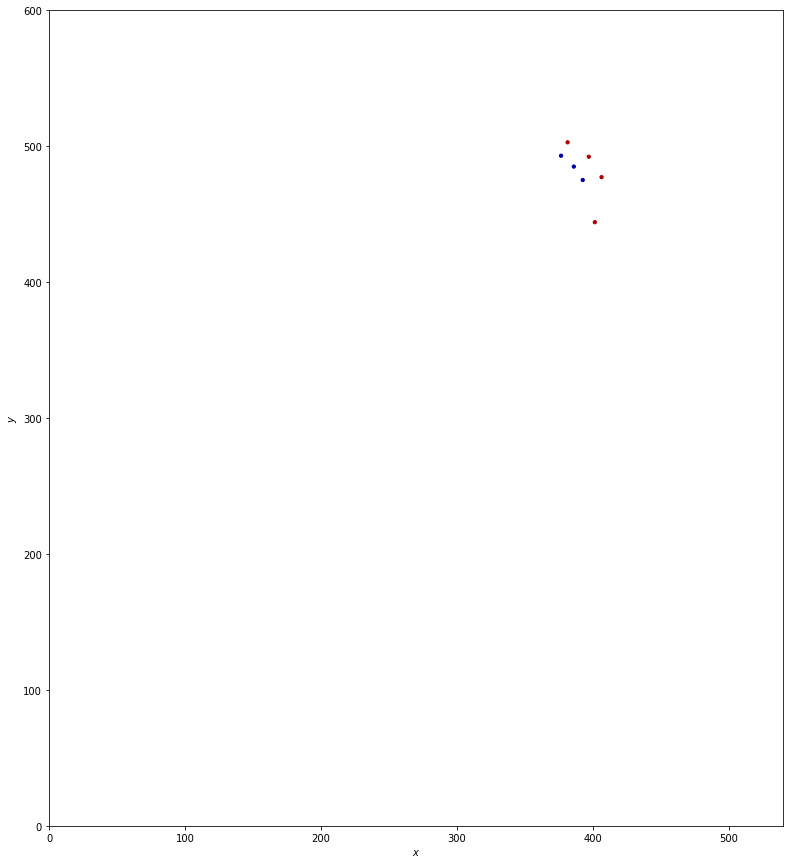

angle -51.0015418246
move (0.61209269831285262, -0.79078601952240613)
373.413686186 503.345954504
122
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


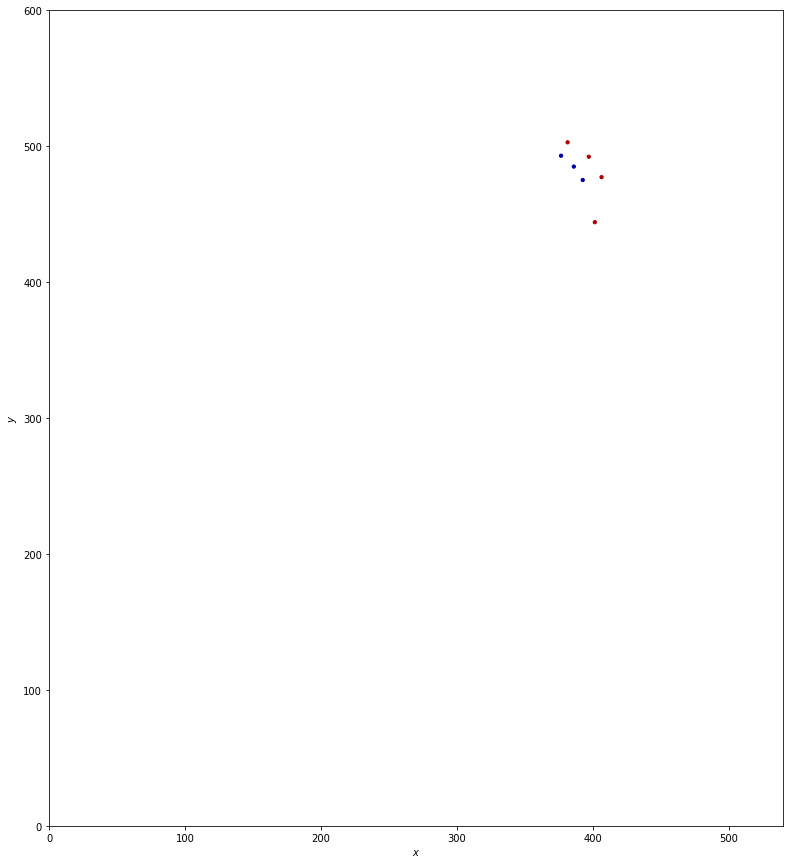

angle -52.2590270212
move (0.65544894799629272, -0.75523948292614651)
374.069135134 502.590715021
123
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


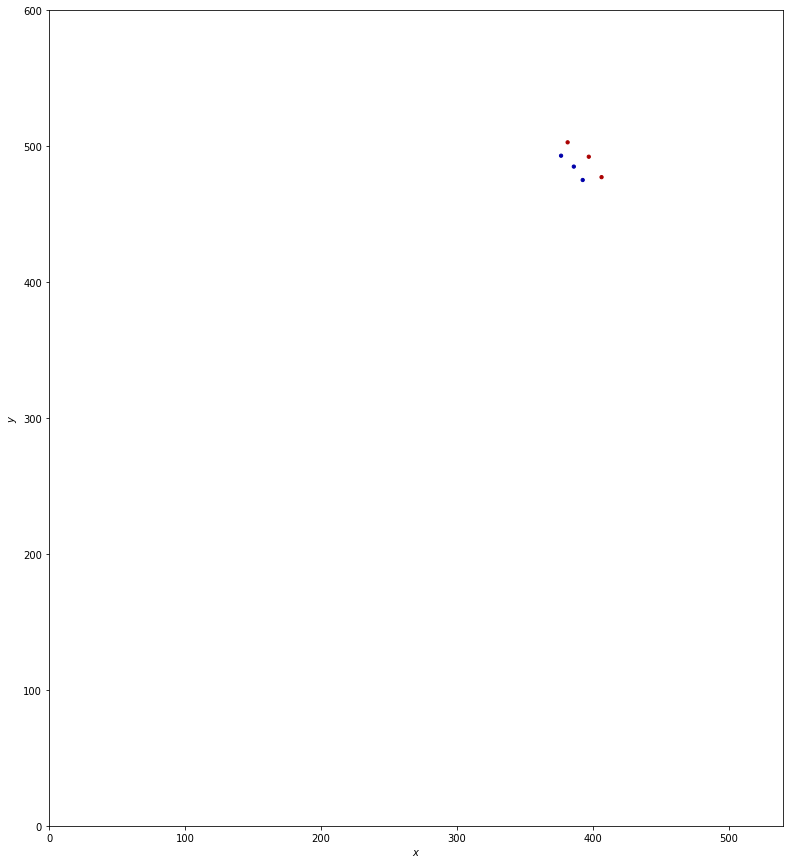

angle -49.0462996601
move (0.73562684858344196, -0.67738699400209457)
374.804761983 501.913328027
124
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


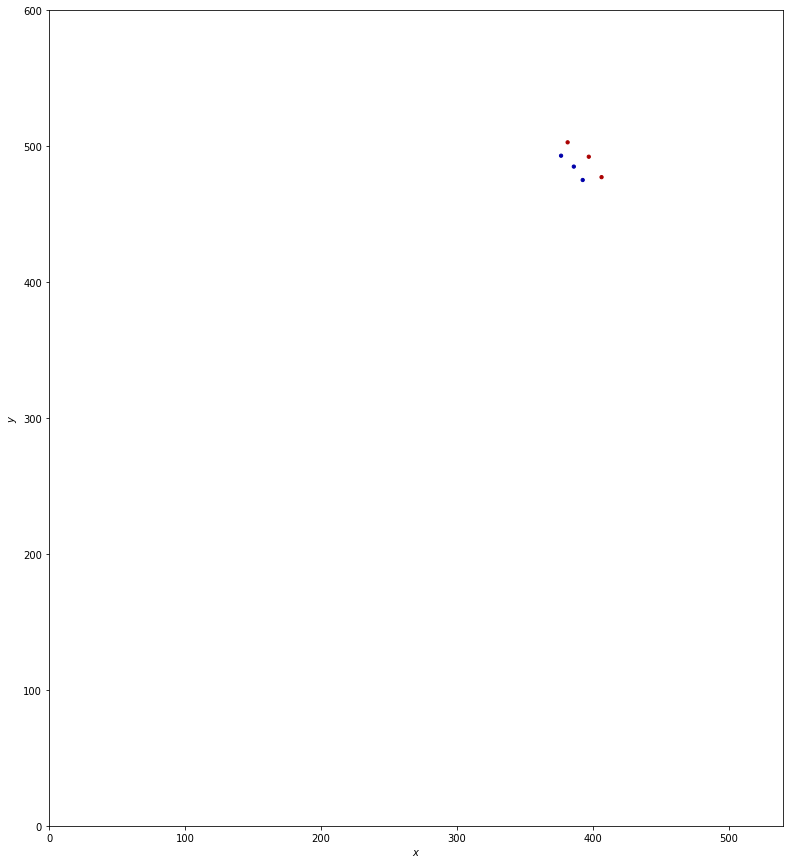

angle -42.6397894399
move (0.75896133606335148, -0.65113569274071637)
375.563723319 501.262192334
125
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


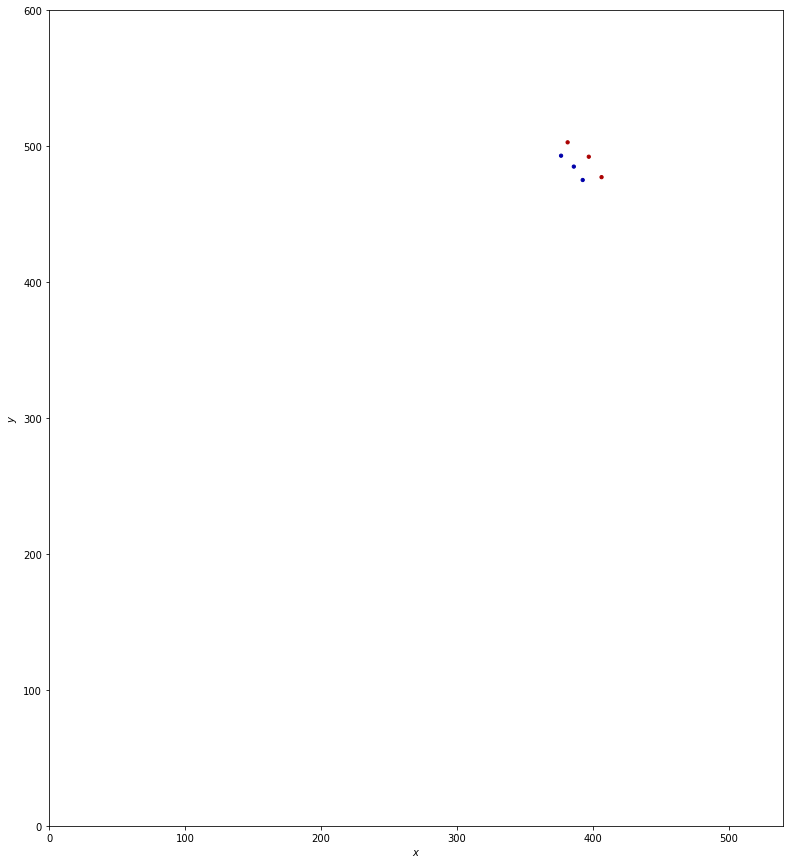

angle -40.6272830634
move (0.78413143060161816, -0.62059479496903591)
376.347854749 500.641597539
126
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


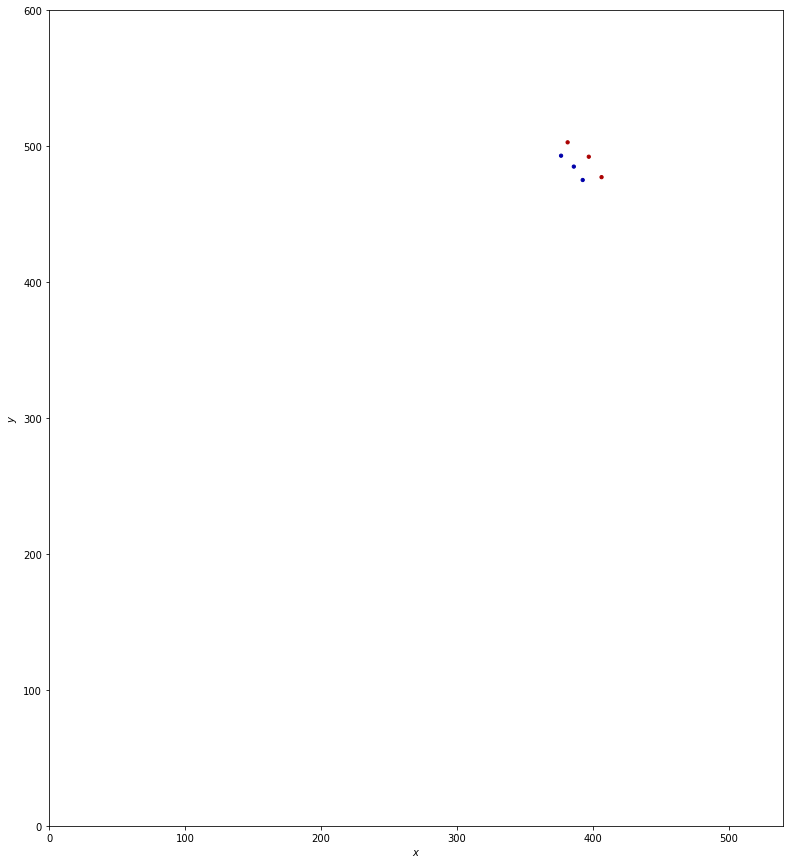

angle -38.3595825742
move (0.81050117608559347, -0.58573700887332525)
377.158355925 500.05586053
127
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


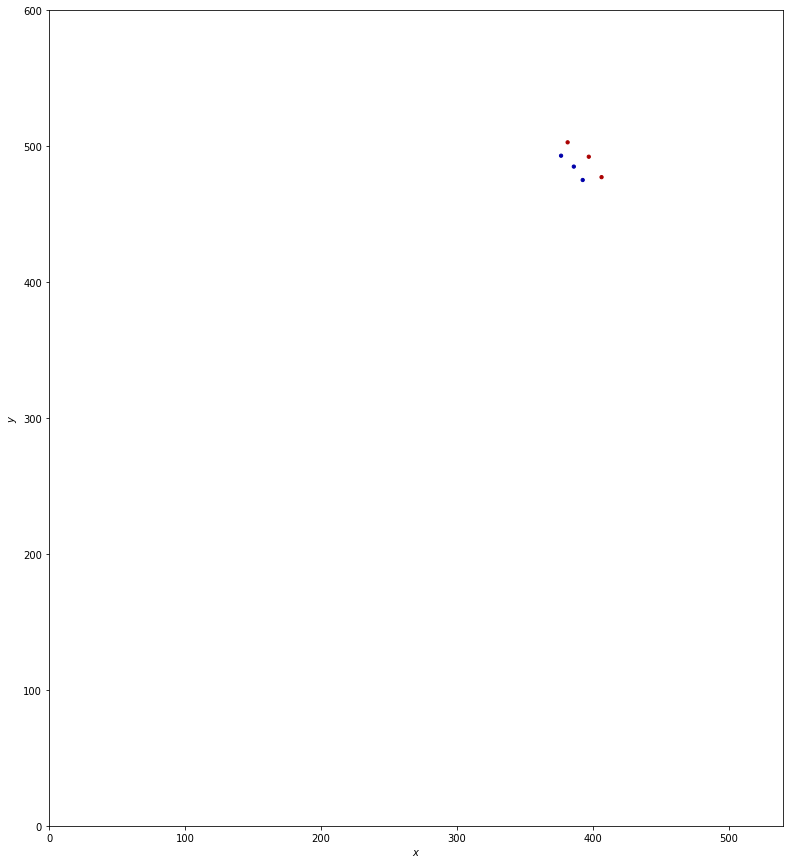

angle -35.855073388
move (0.83714350660824954, -0.54698331724435956)
377.995499432 499.508877213
128
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


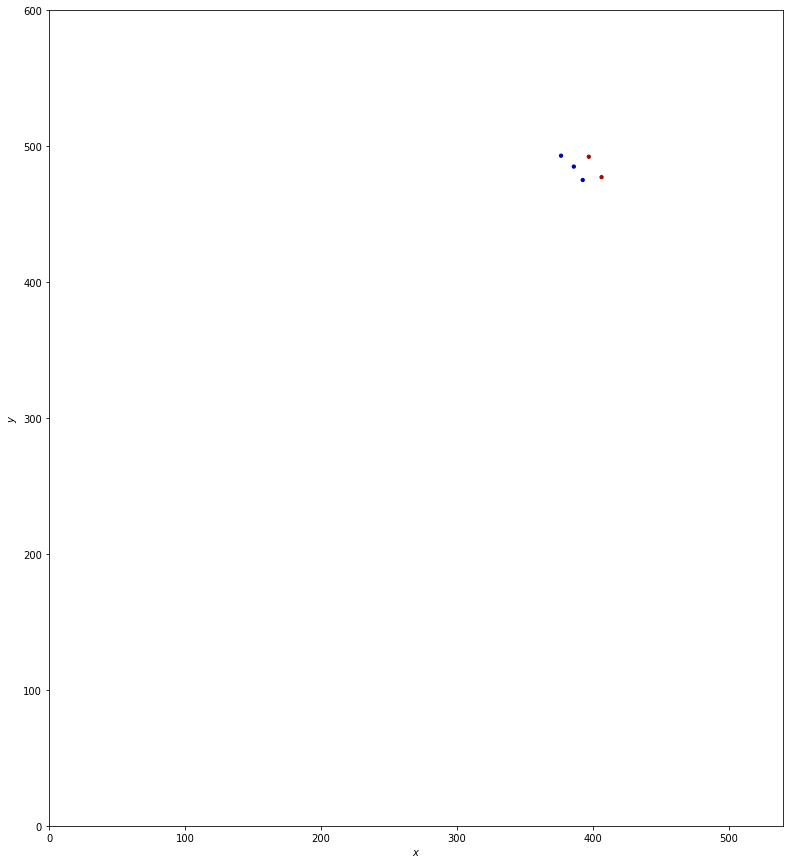

angle -33.1603010646
move (0.97525916313824756, -0.22106461660538296)
378.970758595 499.287812597
129
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (381.5678, 502.9202)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


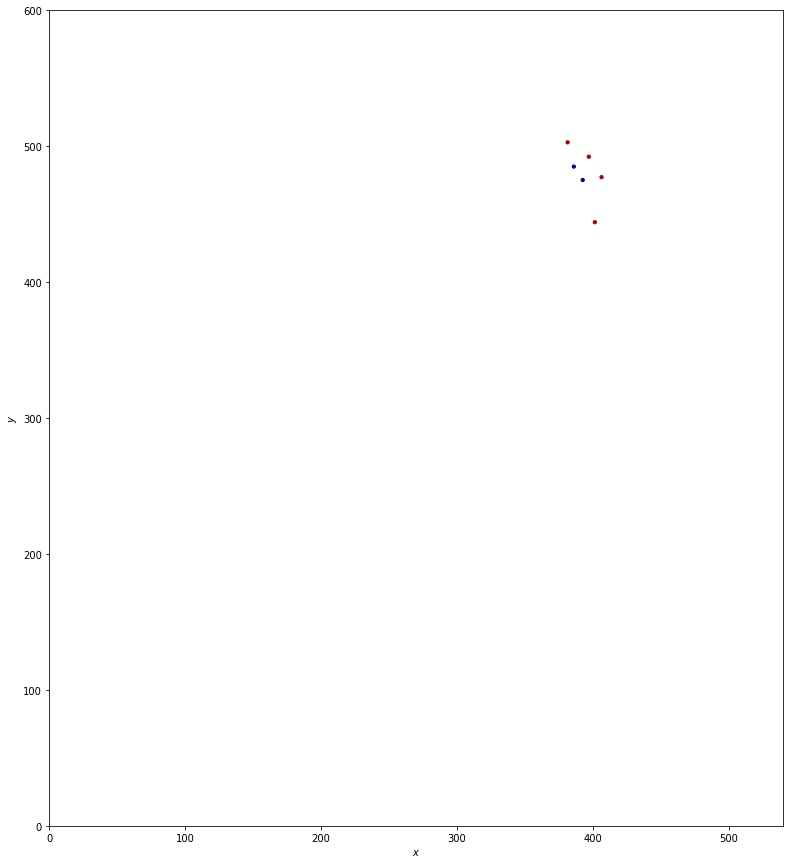

angle -12.771570736
move (0.81706231894802639, -0.57654936211505226)
379.787820914 498.711263234
130
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


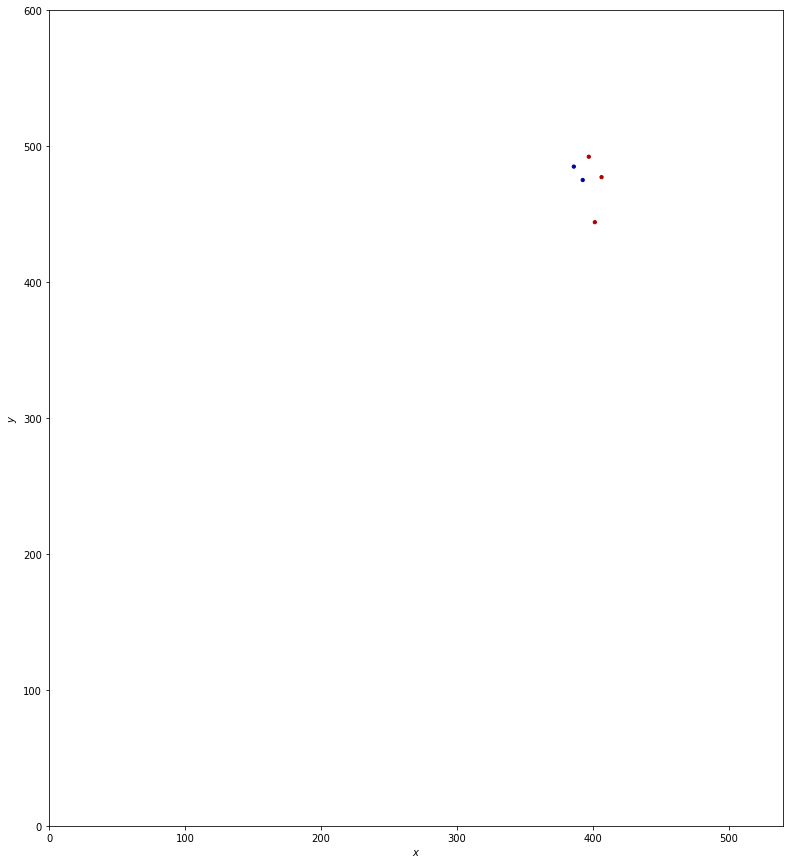

angle -35.2082073296
move (0.83616728372557714, -0.54847449678812787)
380.623988198 498.162788738
131
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


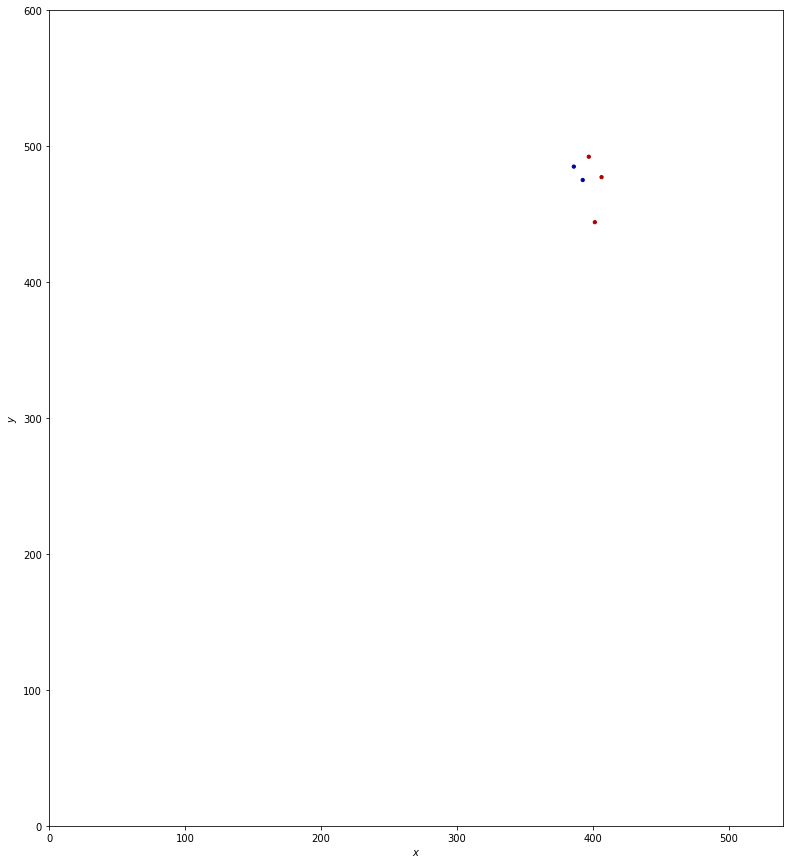

angle -33.2624198966
move (0.82957031626475719, -0.55840226572999385)
381.453558514 497.604386472
132
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


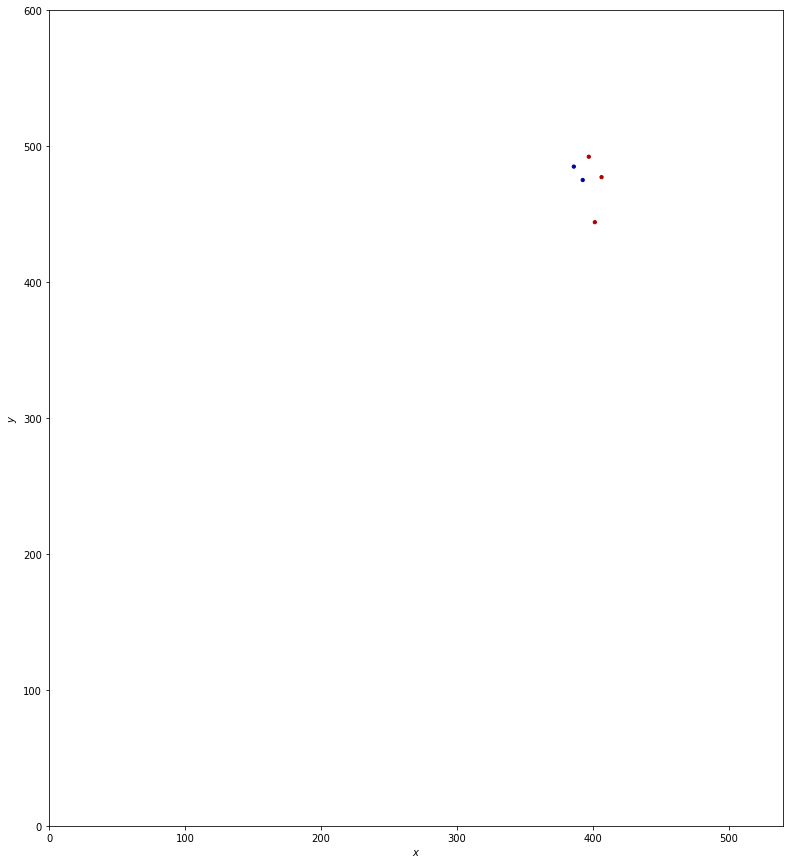

angle -33.9453756339
move (0.82134688514310028, -0.5704290440236427)
382.274905399 497.033957428
133
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


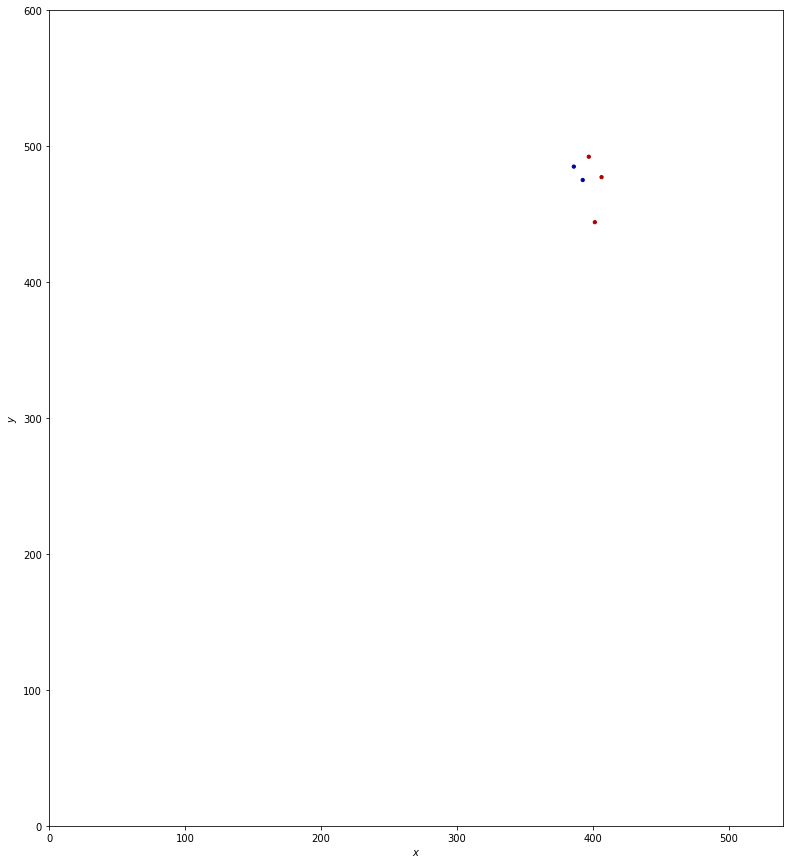

angle -34.7801497187
move (0.81145224270564464, -0.58441873499057129)
383.086357642 496.449538693
134
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


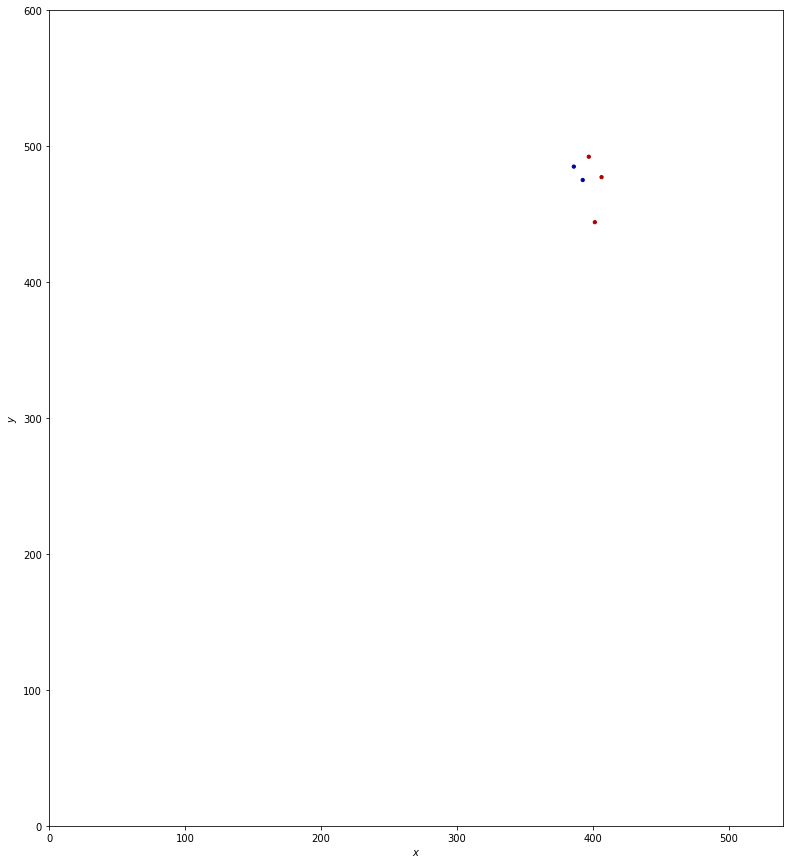

angle -35.7619369117
move (0.79982867542170744, -0.60022836485220932)
383.886186317 495.849310328
135
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


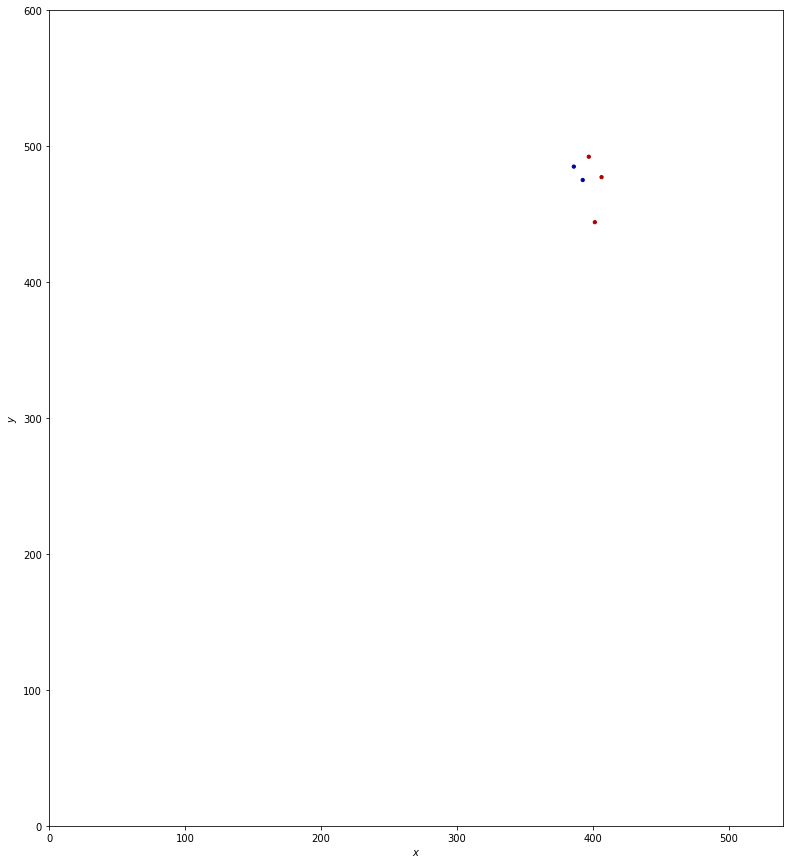

angle -36.886254825
move (0.78641281154467346, -0.61770129499492066)
384.672599129 495.231609033
136
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


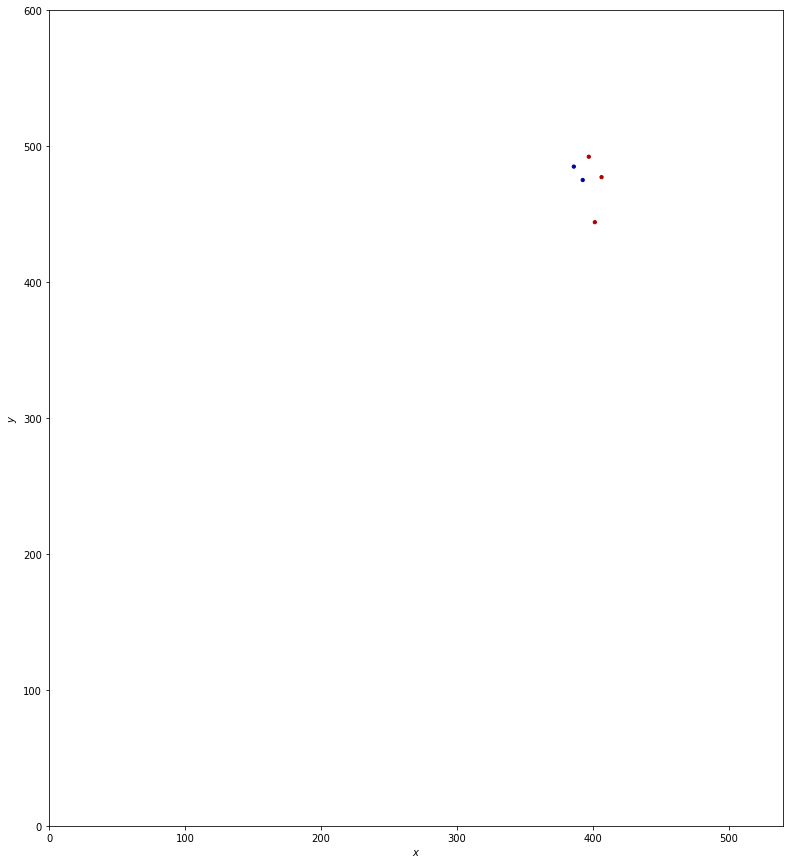

angle -38.1484644859
move (0.77114594382644752, -0.636658411803392)
385.443745073 494.594950621
137
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


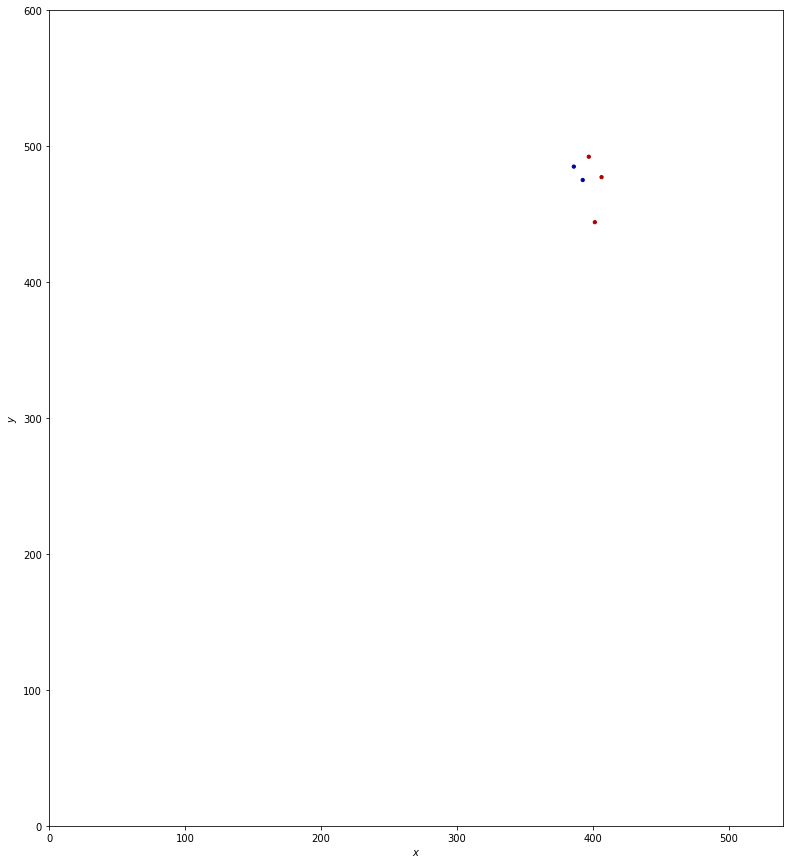

angle -39.5430945803
move (0.75398877471830406, -0.65688730205324464)
386.197733847 493.938063319
138
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


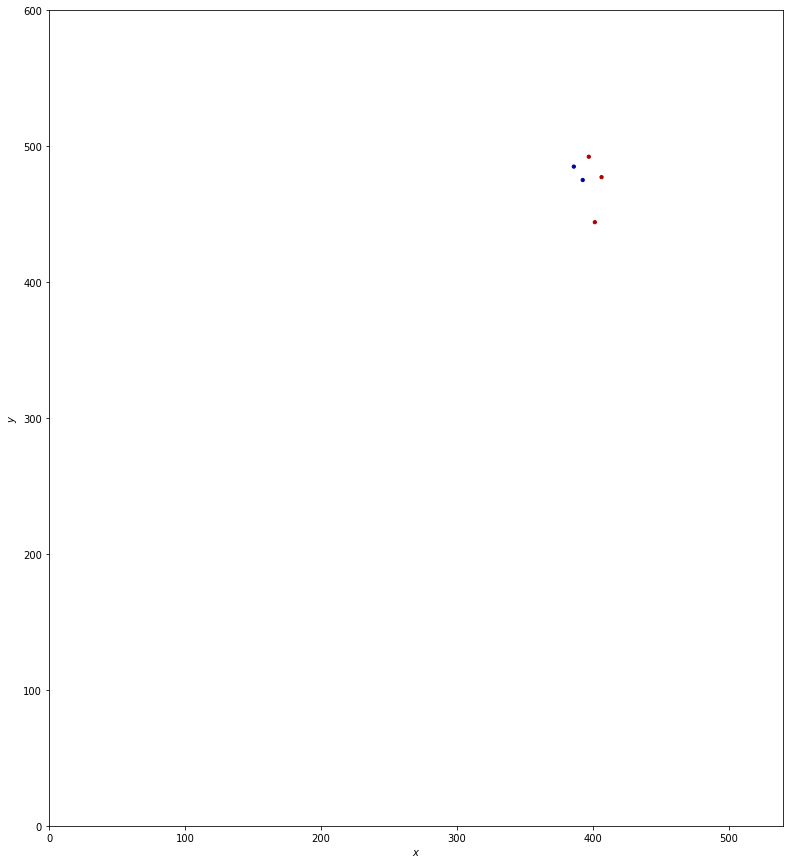

angle -41.0629105823
move (0.73494212987826835, -0.67812982955330503)
386.932675977 493.25993349
139
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


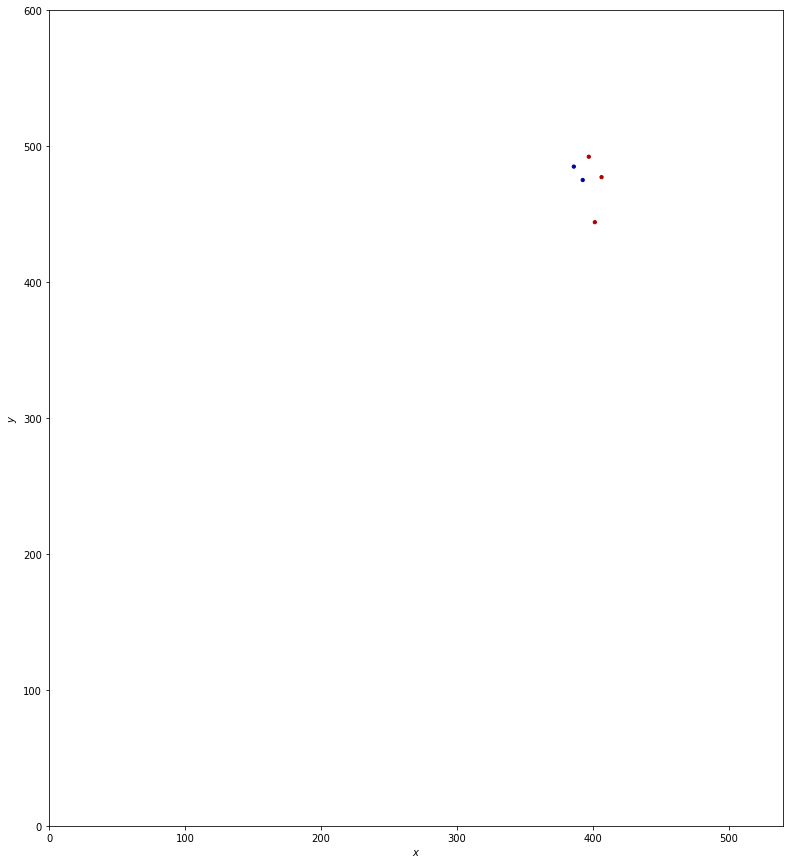

angle -42.697673618
move (0.71407482045491522, -0.70006938998379342)
387.646750798 492.5598641
140
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


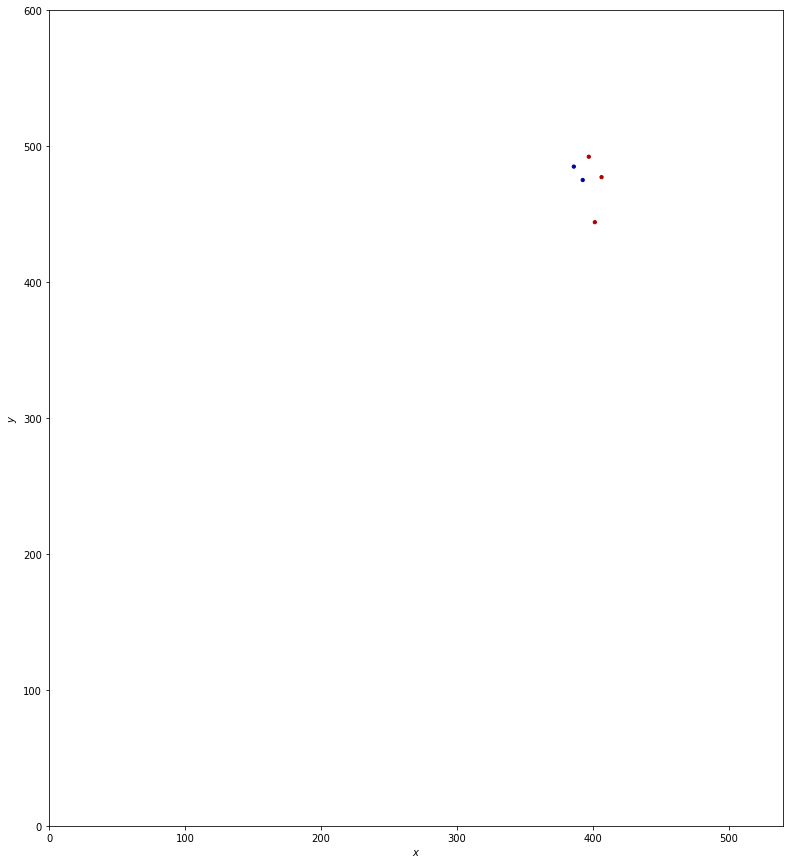

angle -44.432571434
move (0.69155833926990795, -0.72232060983073632)
388.338309137 491.83754349
141
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


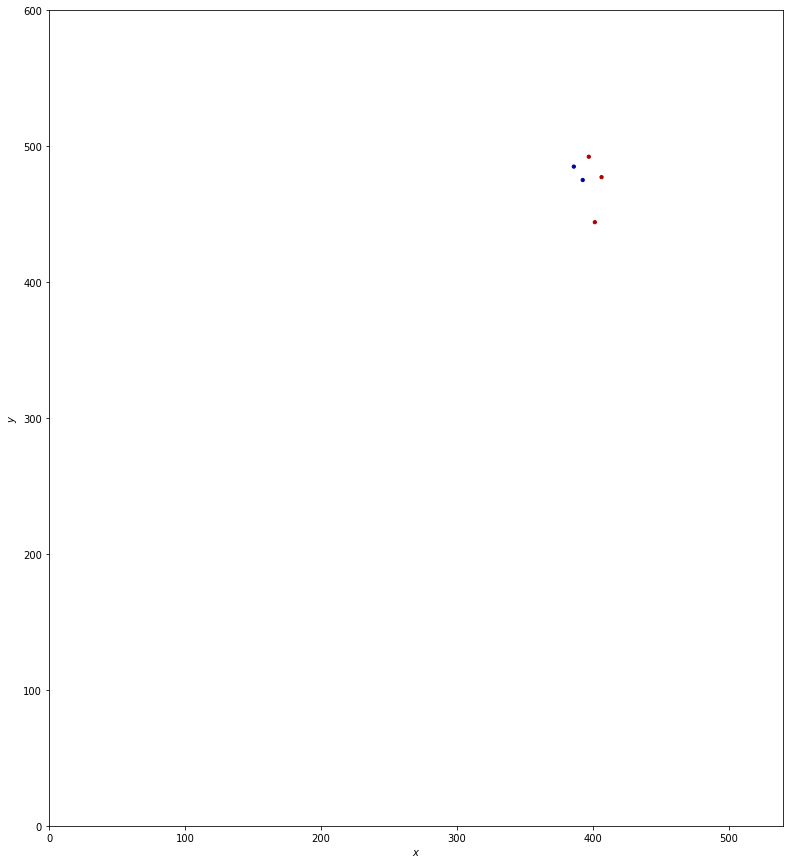

angle -46.2464081395
move (0.66770466199271927, -0.74442627865570987)
389.006013799 491.093117211
142
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


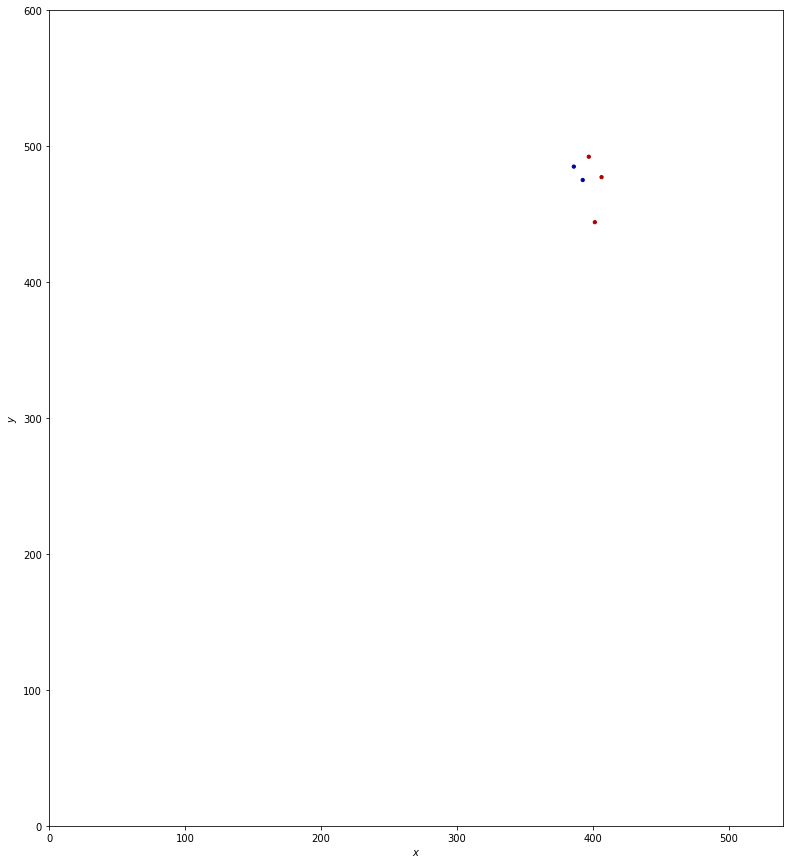

angle -48.1098442538
move (0.64299801014741387, -0.7658678469203849)
389.649011809 490.327249364
143
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


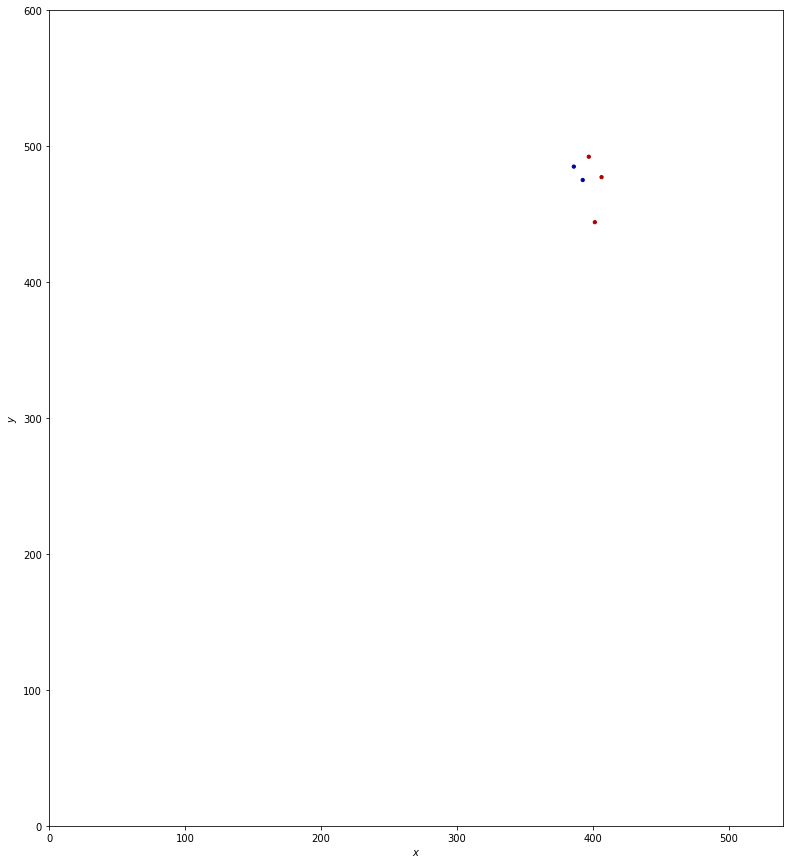

angle -49.9842614249
move (0.61810691355259728, -0.78609404235020253)
390.267118723 489.541155322
144
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)


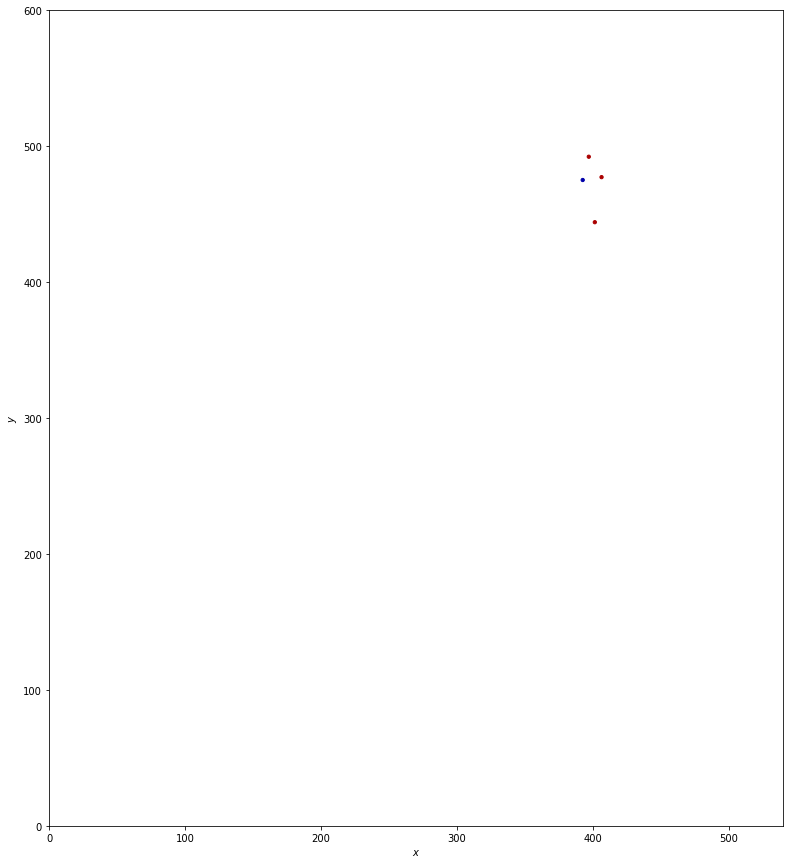

angle -51.8219773206
move (0.42871474212131827, -0.90343990939511387)
390.695833465 488.637715413
145
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)


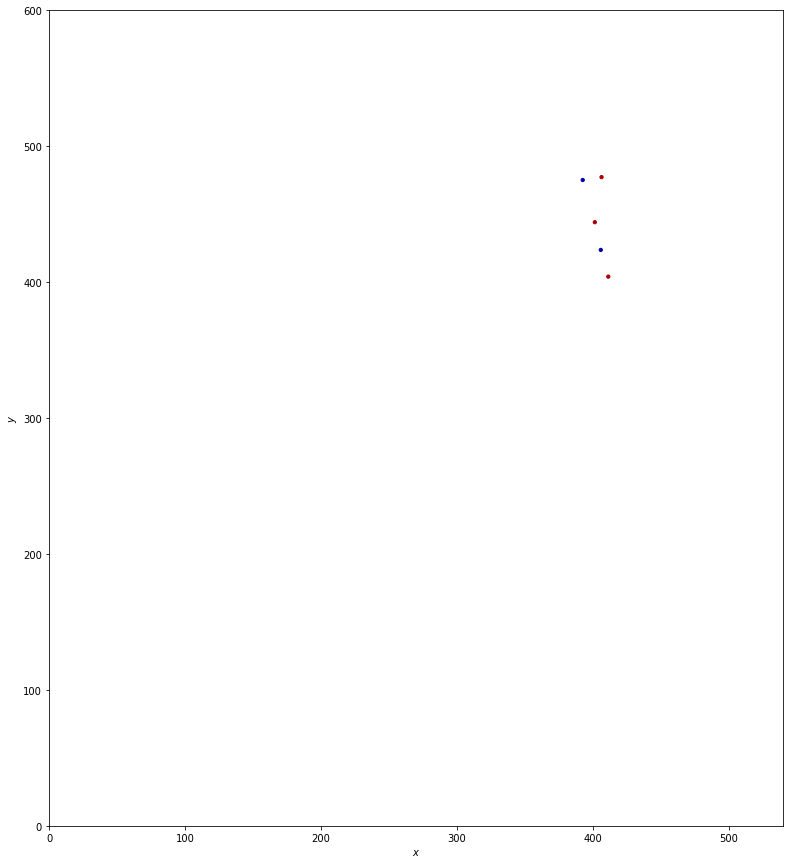

angle -64.6139779317
move (0.70397756499128927, -0.71022221028980437)
391.39981103 487.927493202
146
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


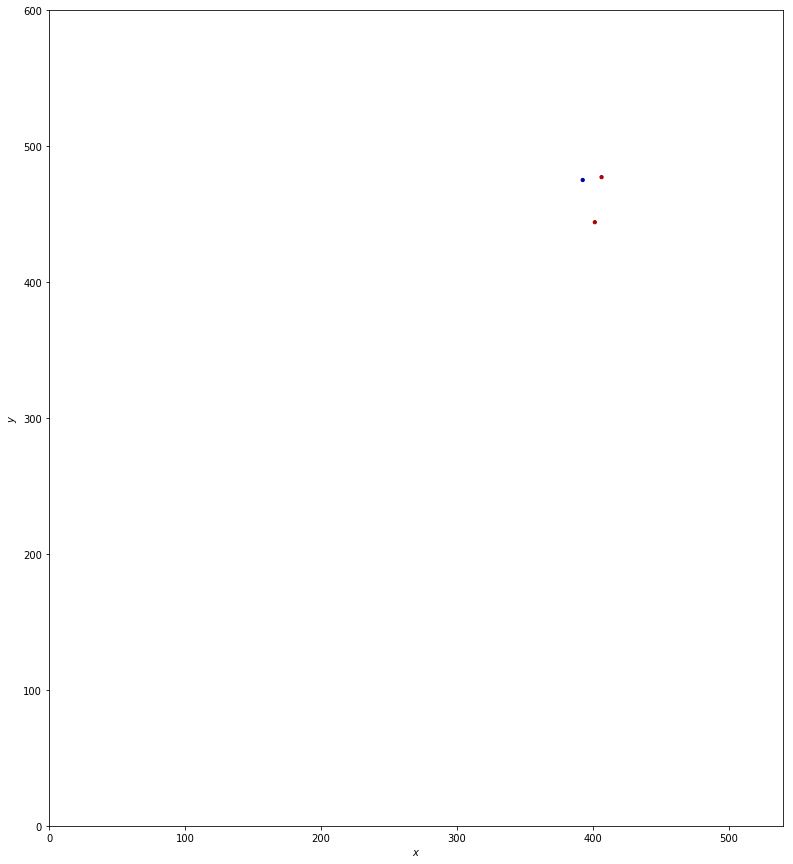

angle -45.2529978444
move (0.6521610549794673, -0.75808044320379897)
392.051972085 487.169412759
147
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


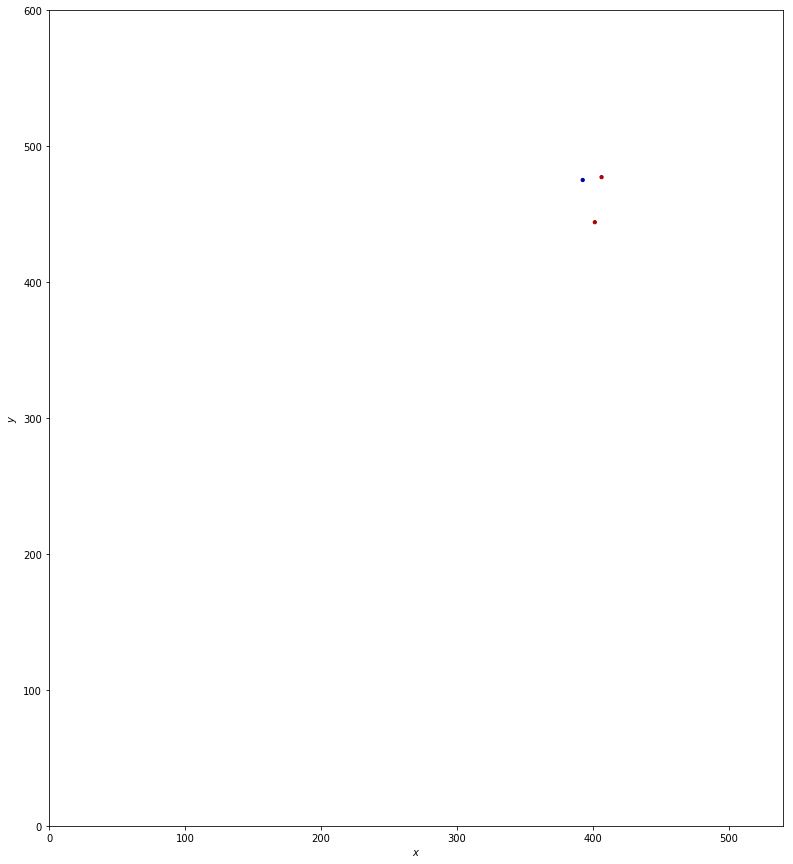

angle -49.2952649895
move (0.64496755611829271, -0.76420995253581792)
392.696939641 486.405202807
148
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


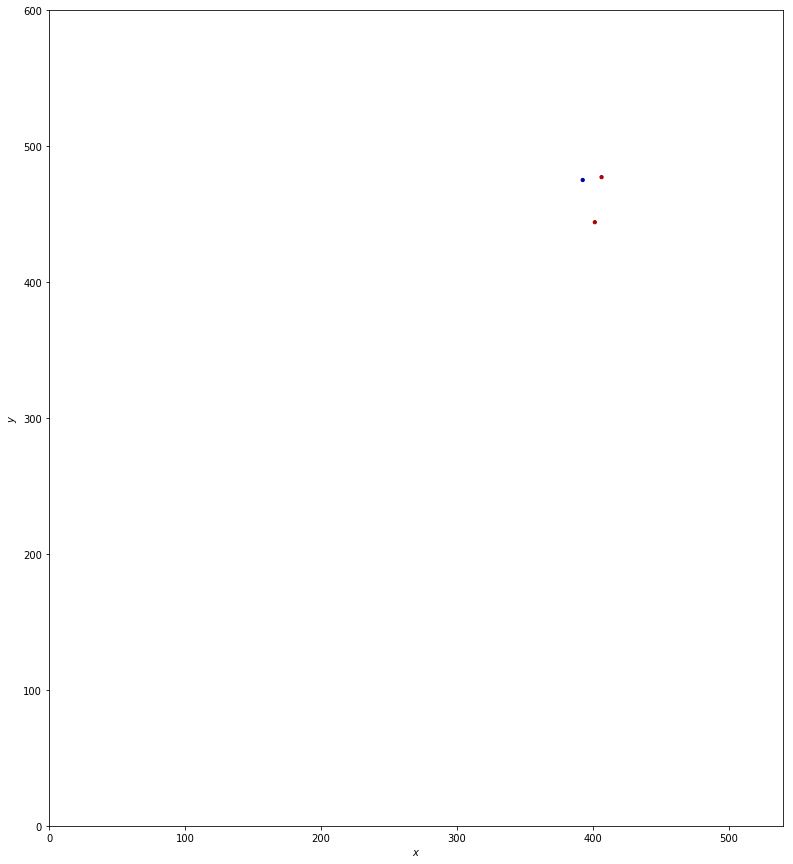

angle -49.8367570177
move (0.63245422361180481, -0.77459773756162575)
393.329393865 485.630605069
149
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


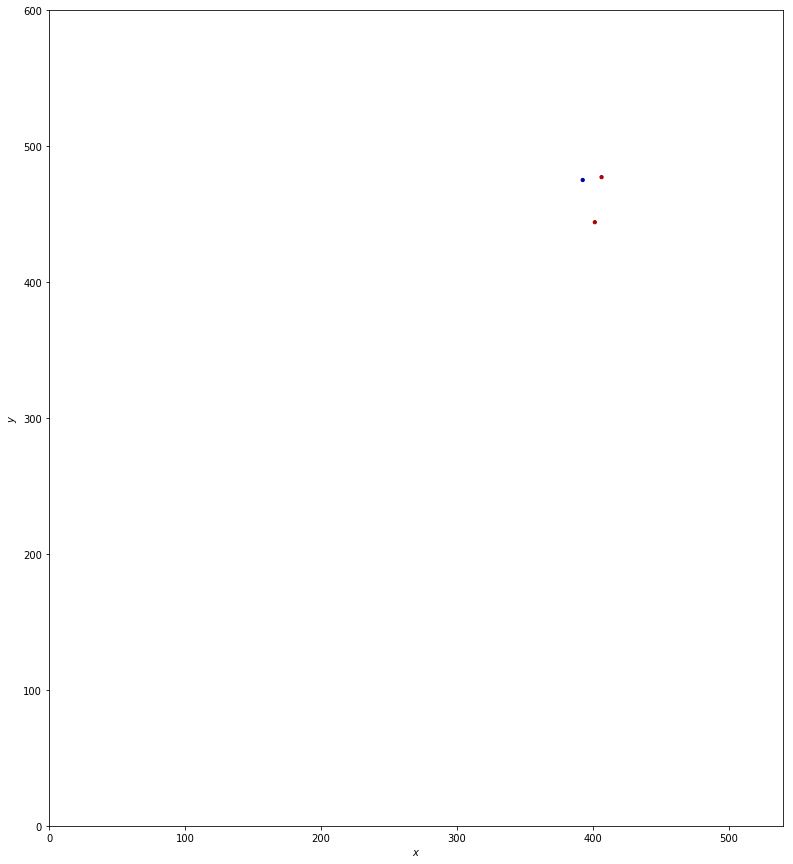

angle -50.7685762984
move (0.61478194170973877, -0.78869713080979531)
393.944175806 484.841907938
150
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


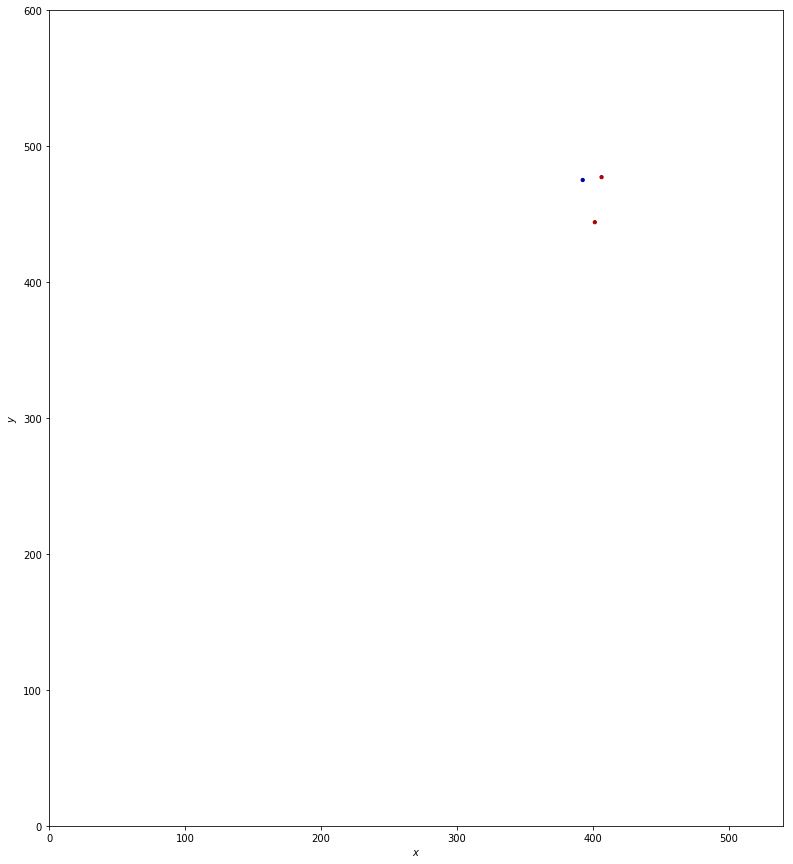

angle -52.0639225051
move (0.59199459960981282, -0.80594192969023348)
394.536170406 484.035966008
151
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


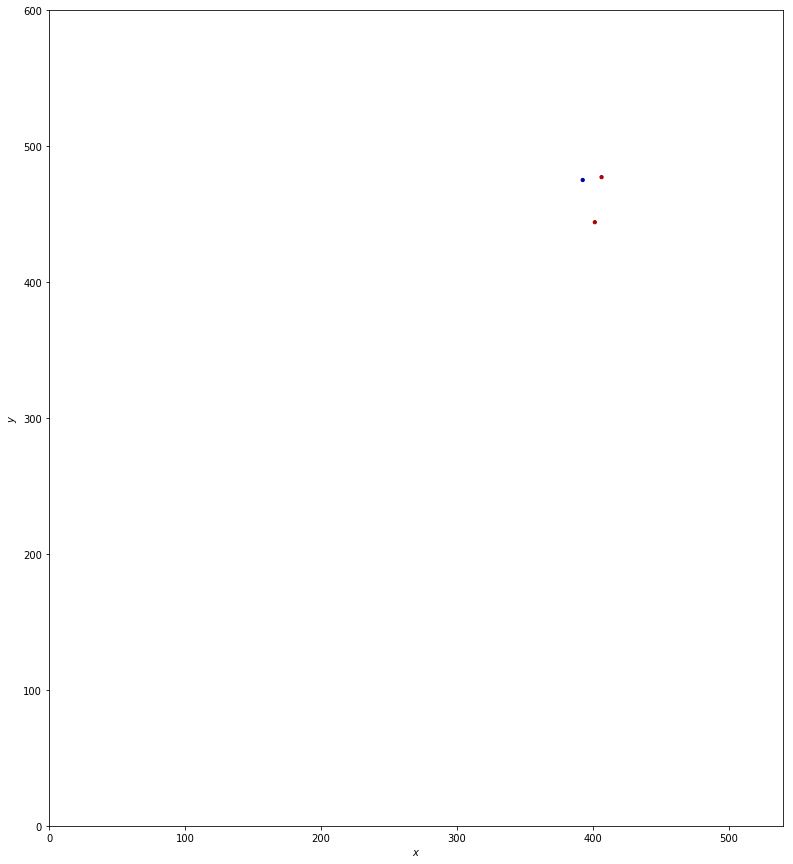

angle -53.7013208373
move (0.56404597046003258, -0.82574338823135607)
395.100216376 483.21022262
152
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (392.6697, 475.2002)


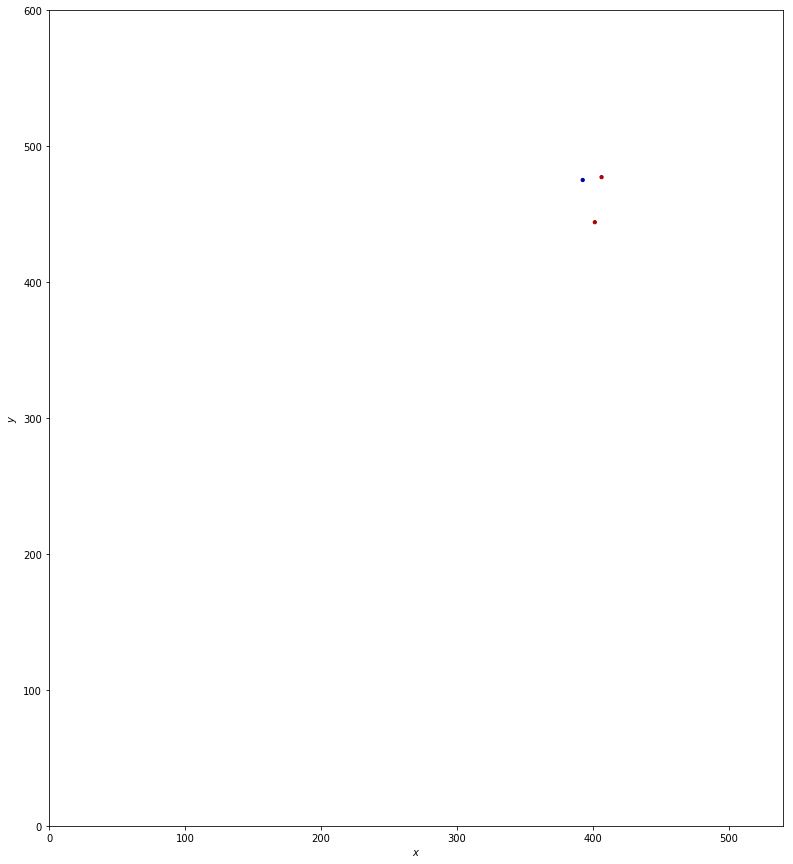

angle -55.663932006
move (0.53082786915371505, -0.84747965953745841)
395.631044245 482.362742961
153
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)


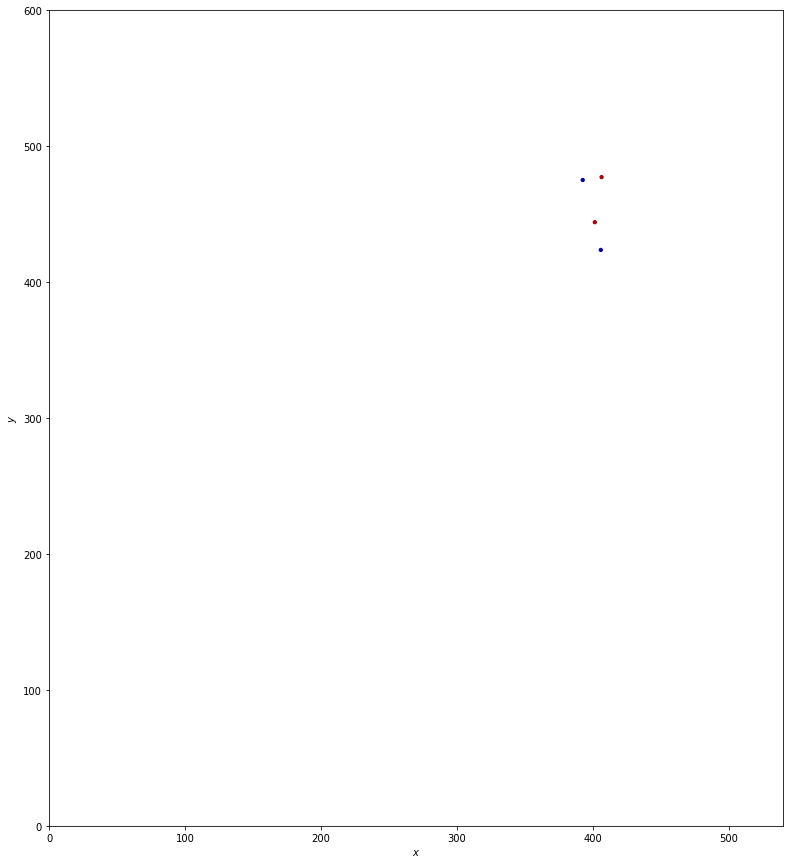

angle -57.9385923091
move (0.55479258070697746, -0.83198869727448332)
396.185836826 481.530754263
154
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)


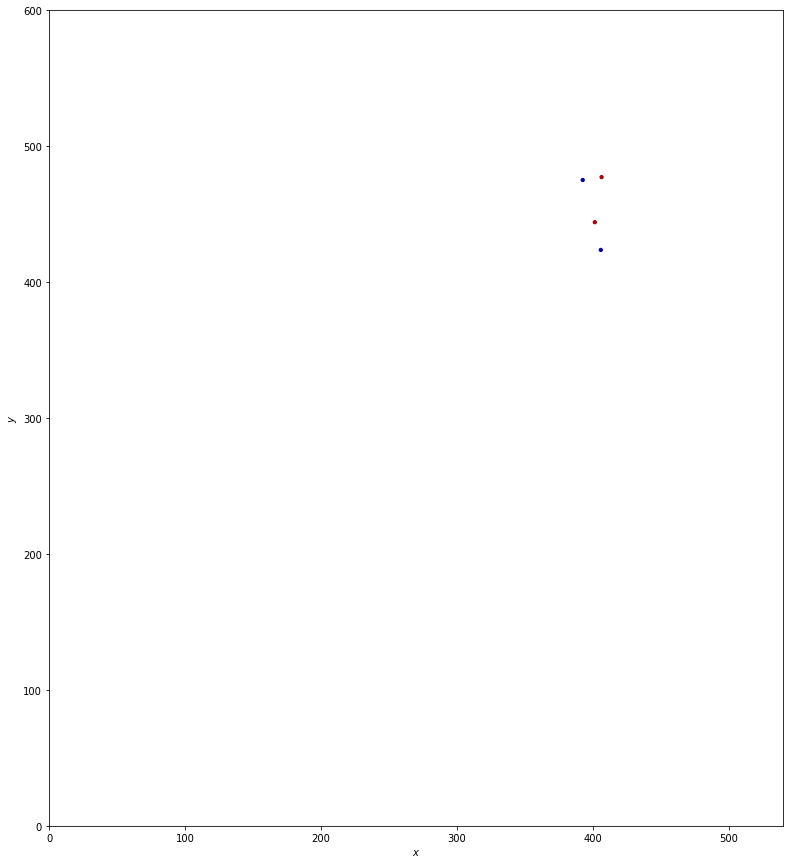

angle -56.3035705547
move (0.4948386816090895, -0.86898485555467431)
396.680675508 480.661769408
155
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)


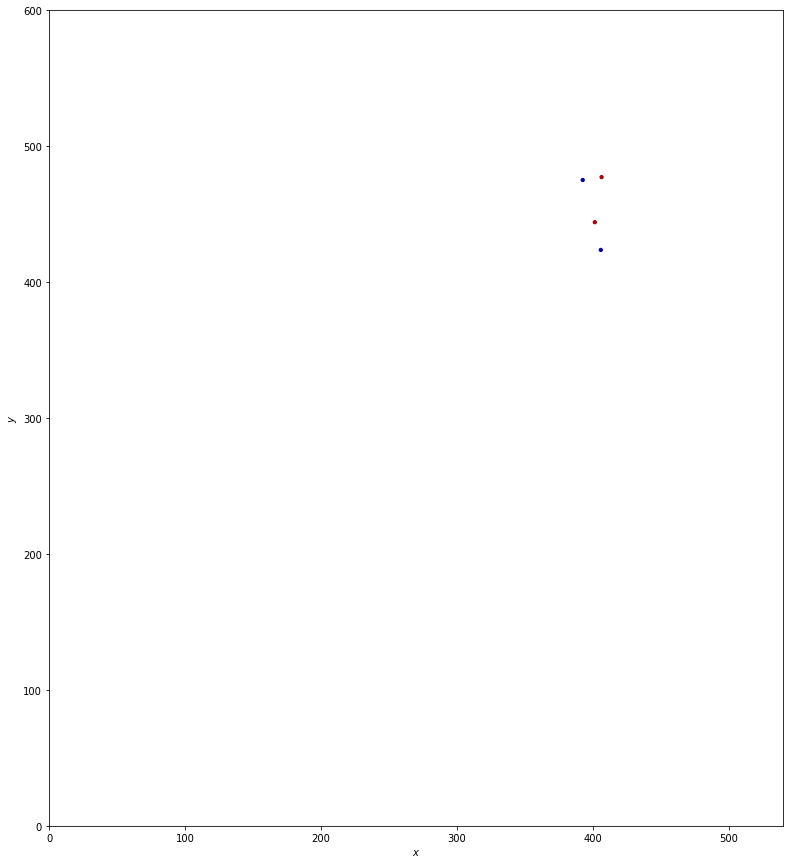

angle -60.3408866162
move (0.43308995910483039, -0.90135070162649589)
397.113765467 479.760418706
156
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)


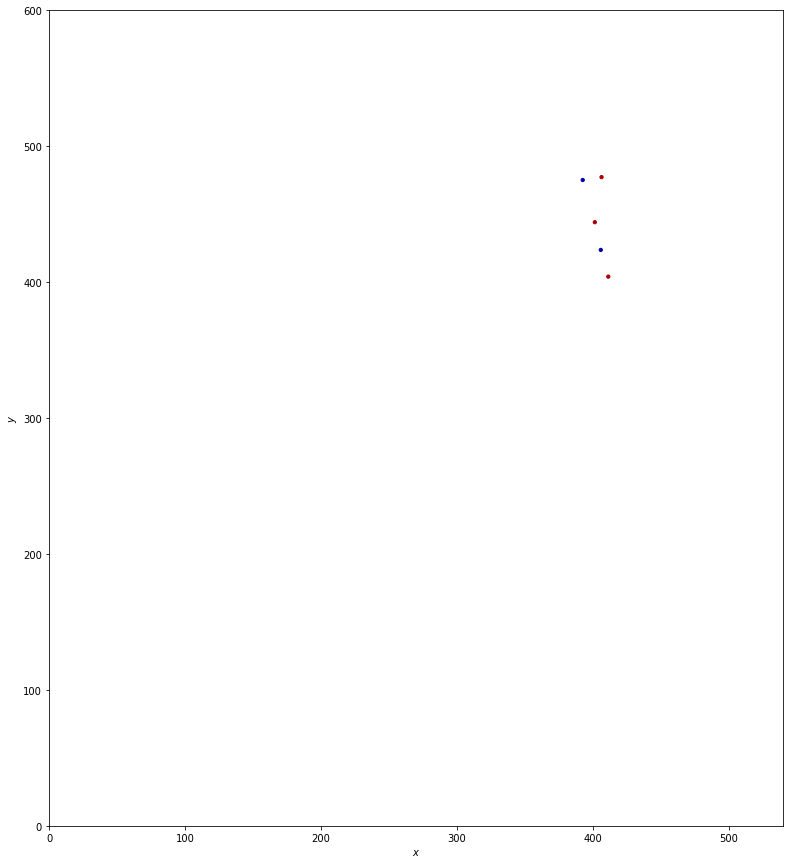

angle -64.3361828512
move (0.33640037022281899, -0.94171906156451479)
397.450165837 478.818699645
157
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)


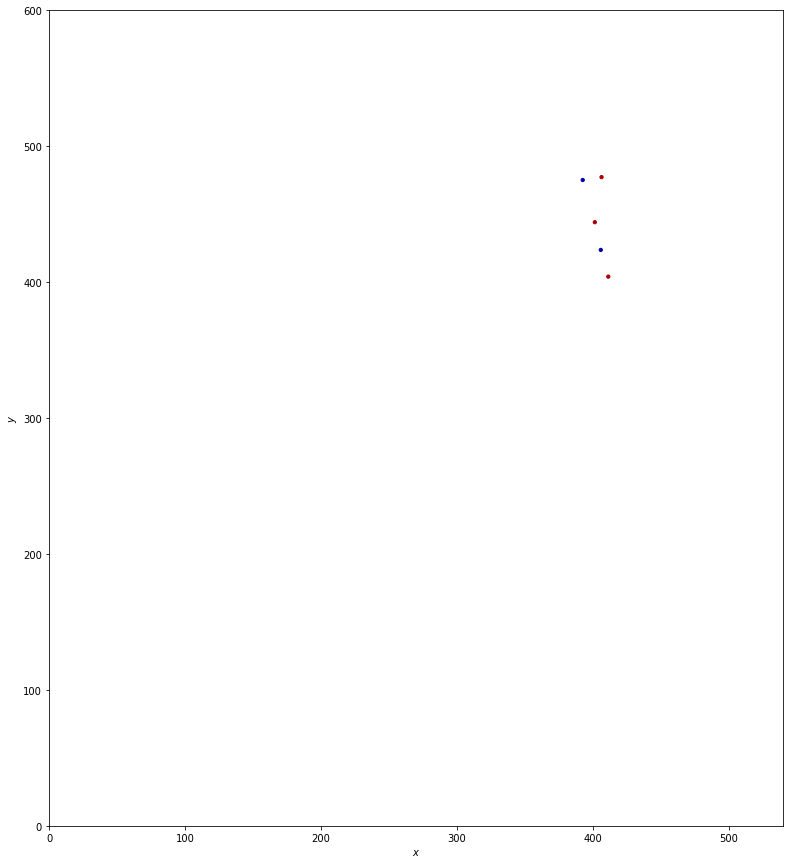

angle -70.34228375
move (0.27894480396213994, -0.96030713646339383)
397.729110641 477.858392508
158
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (417.0894, 379.9204)


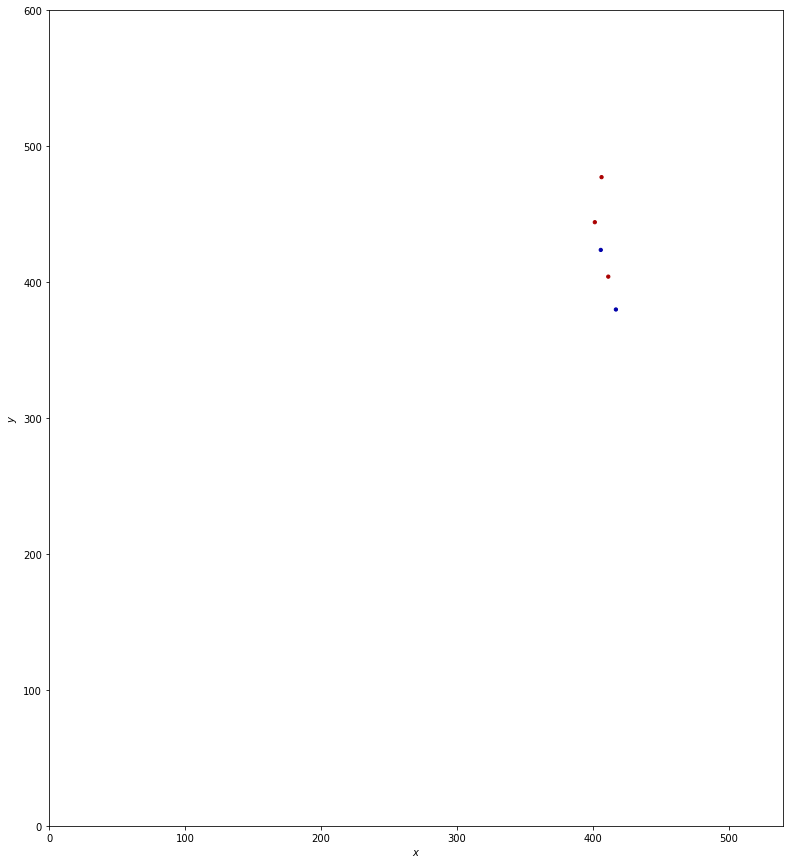

angle -73.8027625872
move (-0.16826595972811184, -0.98574163288195216)
397.560844681 476.872650875
159
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


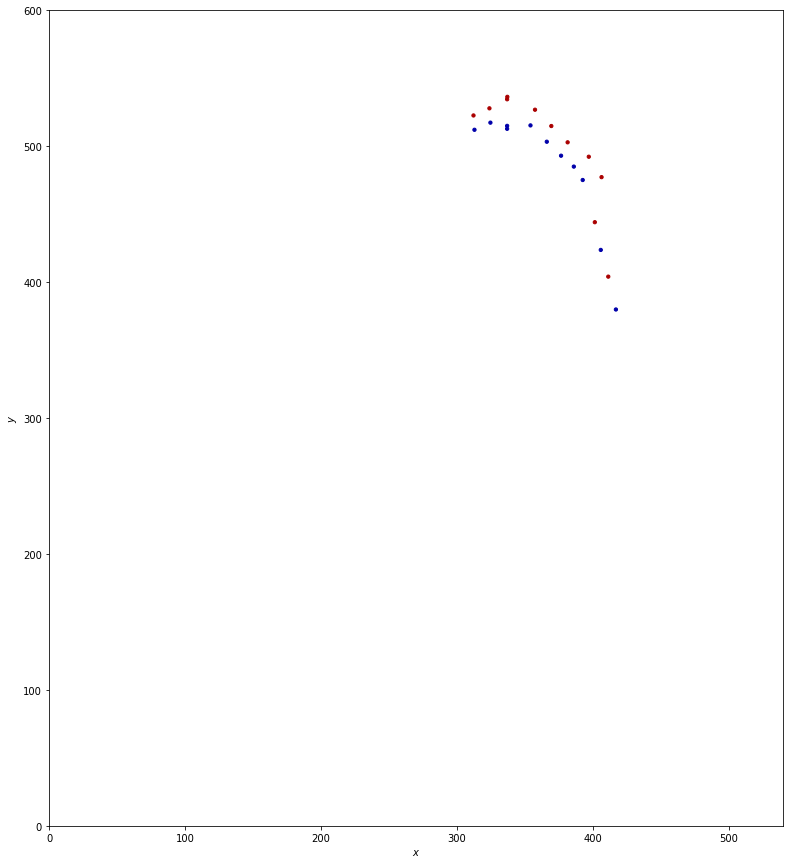

angle -99.6870135733
move (0.21859617676570522, -0.97581540851916071)
397.779440858 475.896835467
160
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (417.0894, 379.9204)


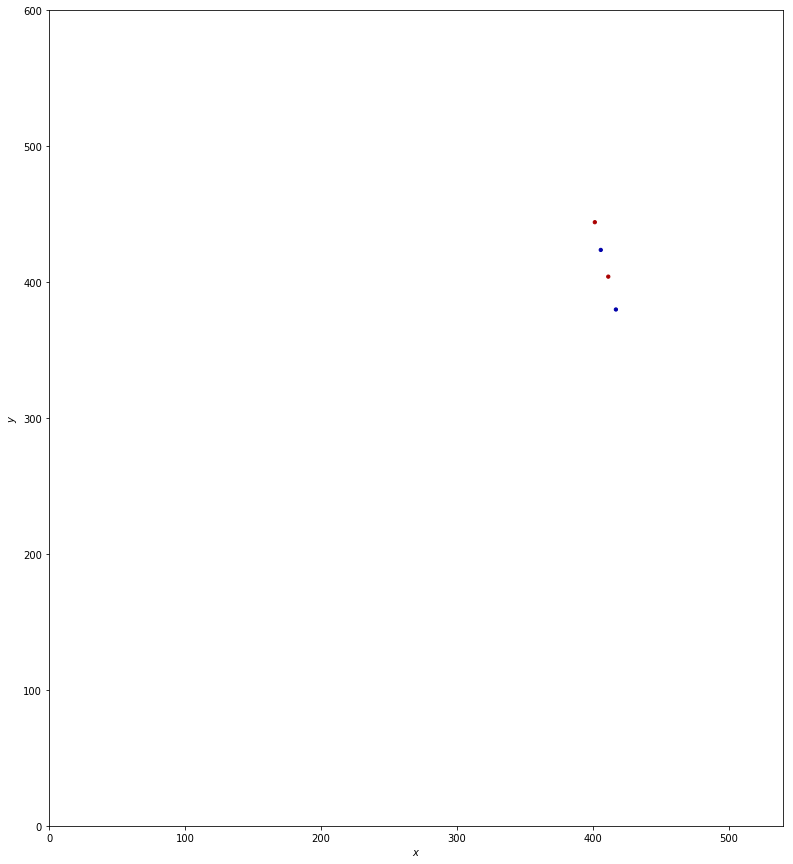

angle -77.3734069203
move (-0.99572257017262389, -0.092393523846771866)
396.783718288 475.804441943
161
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


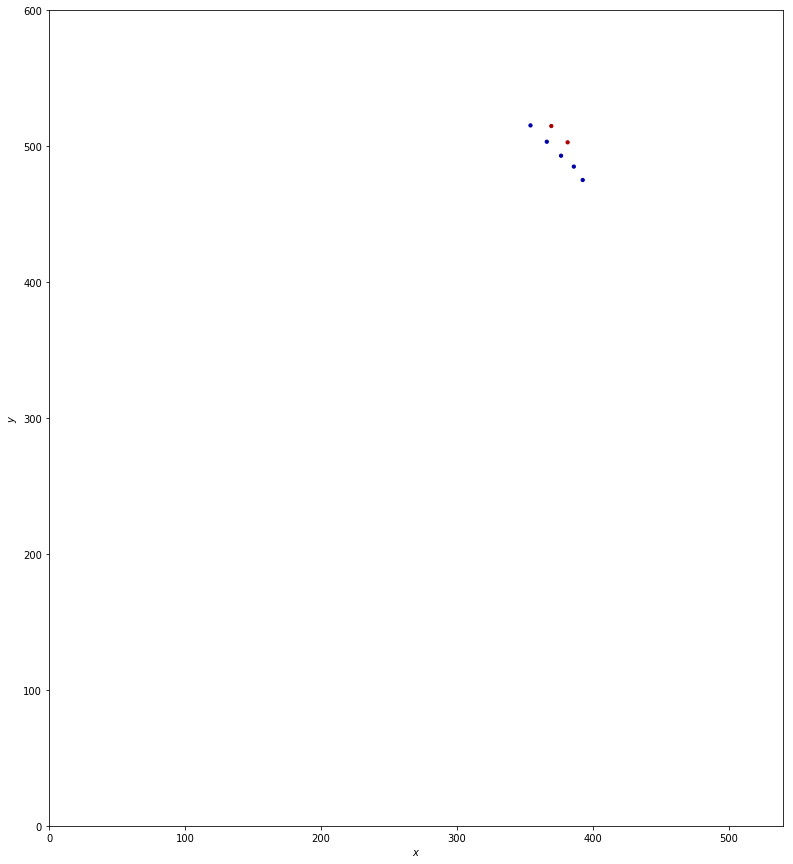

angle -174.698680197
move (-0.02117685332689297, -0.9997757452964996)
396.762541435 474.804666198
162
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


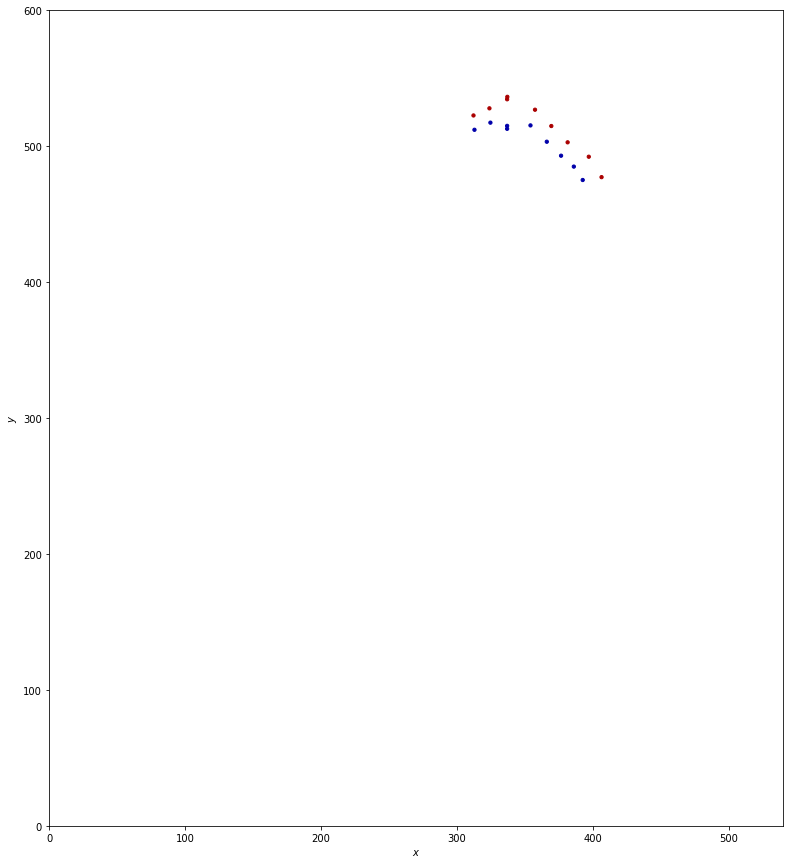

angle -91.2134350265
move (0.015528523857480719, -0.99987942520426309)
396.778069958 473.804786772
163
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (417.0894, 379.9204)


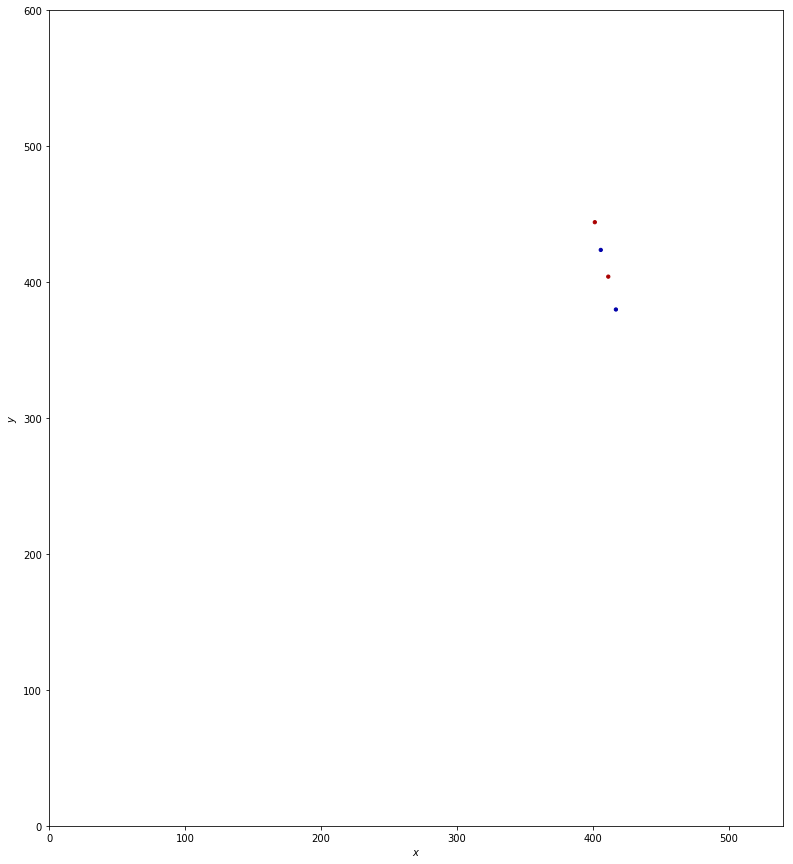

angle -89.1102453599
move (-0.98909359725112633, -0.14728834263724569)
395.788976361 473.65749843
164
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes -1 (386.1294, 485.0703)


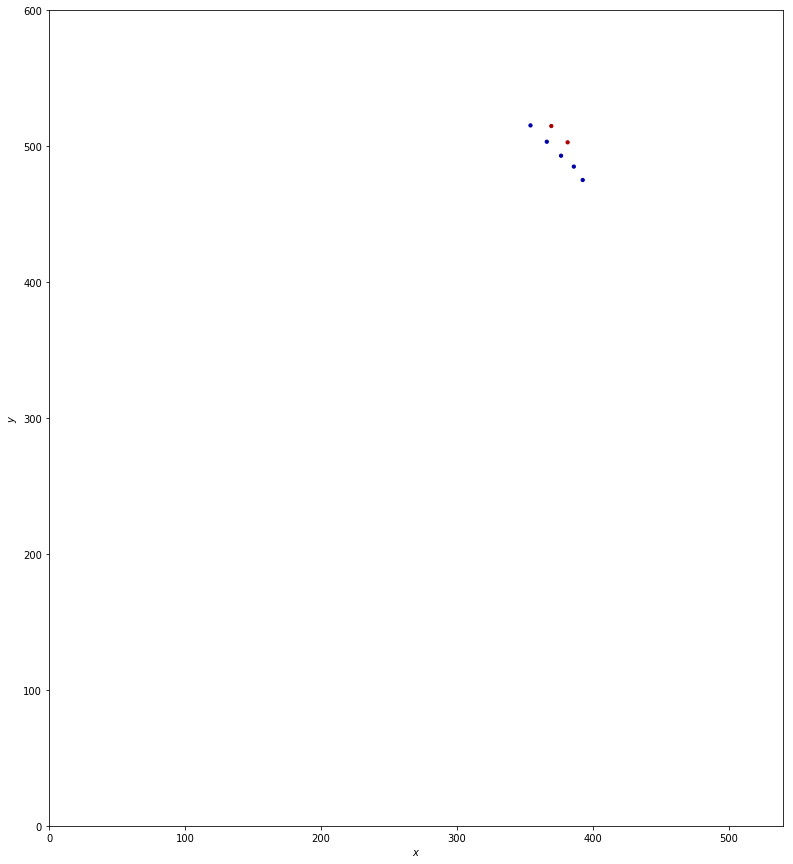

angle -171.530185412
move (-0.48688982337393394, -0.87346339356317582)
395.302086538 472.784035036
165
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


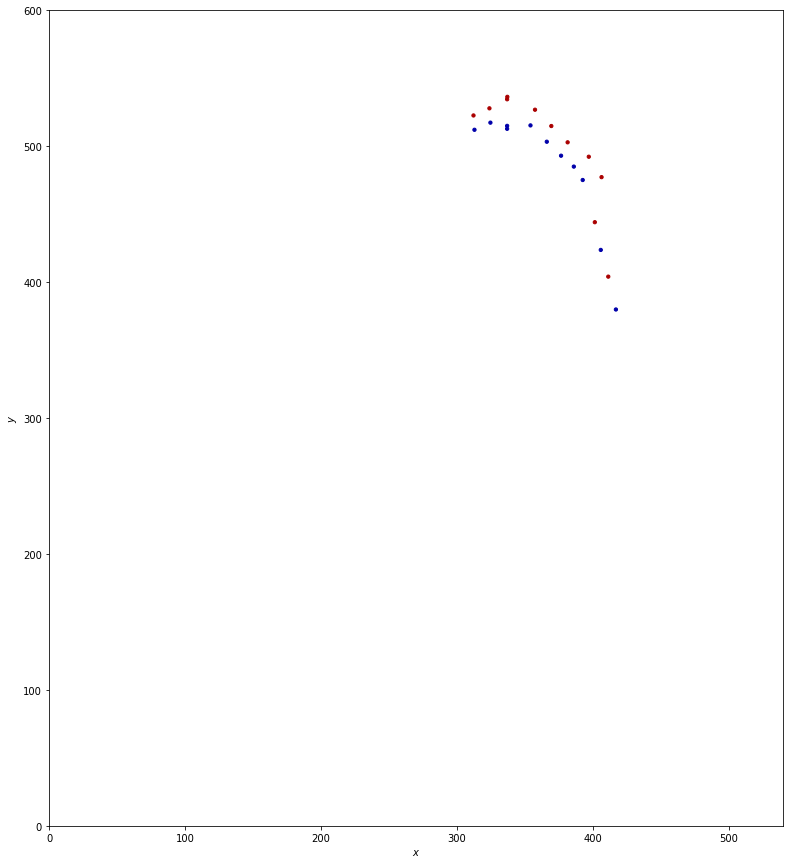

angle -119.136362858
move (-0.49037795316608451, -0.87150987547396241)
394.811708585 471.912525161
166
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


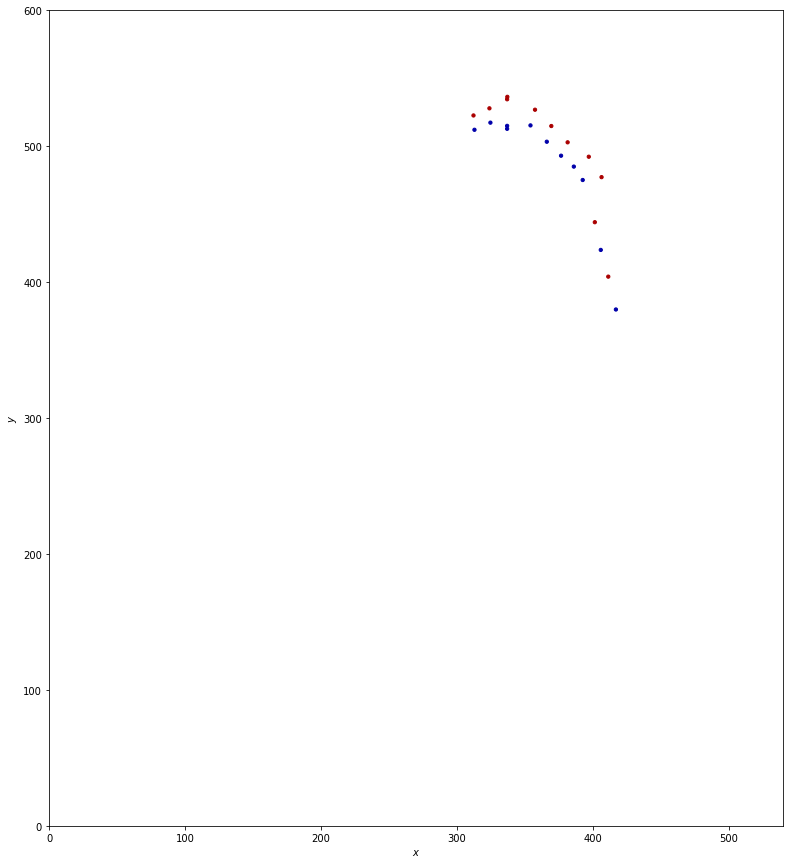

angle -119.365426366
move (-0.64173455749386821, -0.76692682683431357)
394.169974027 471.145598334
167
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


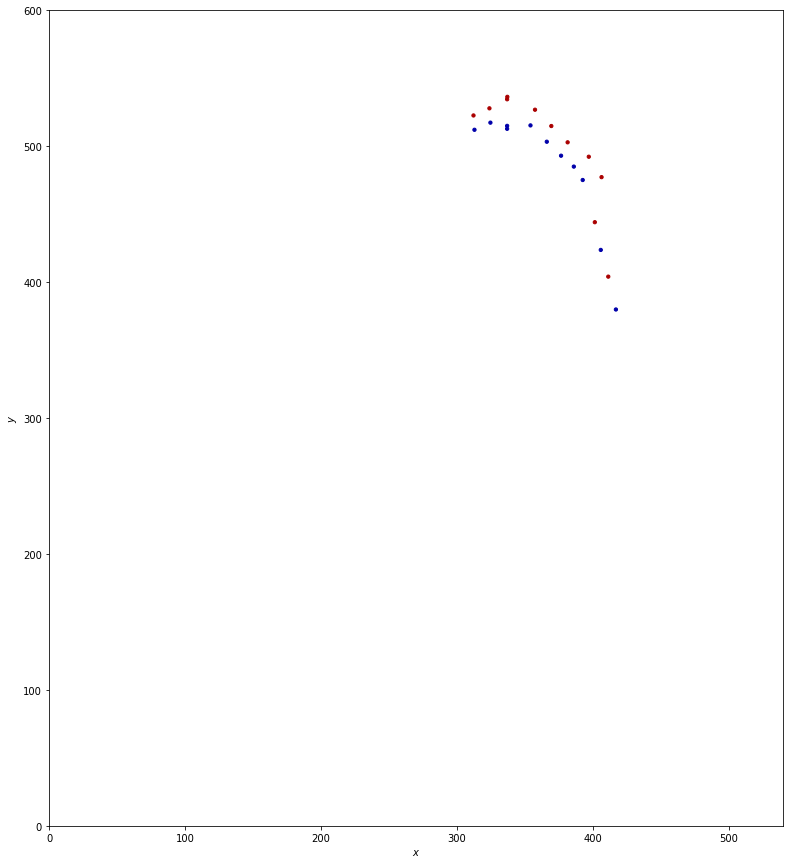

angle -129.921283017
move (-0.75922893499700883, -0.65082365066376291)
393.410745092 470.494774683
168
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


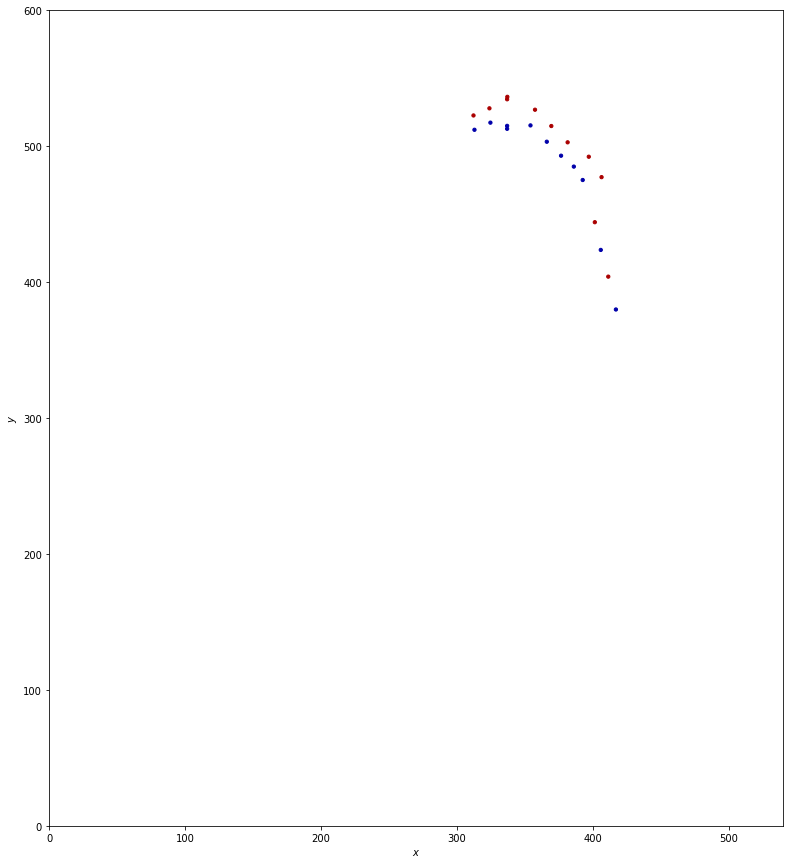

angle -139.396269576
move (-0.84557353793311296, -0.53385896259899801)
392.565171554 469.960915721
169
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


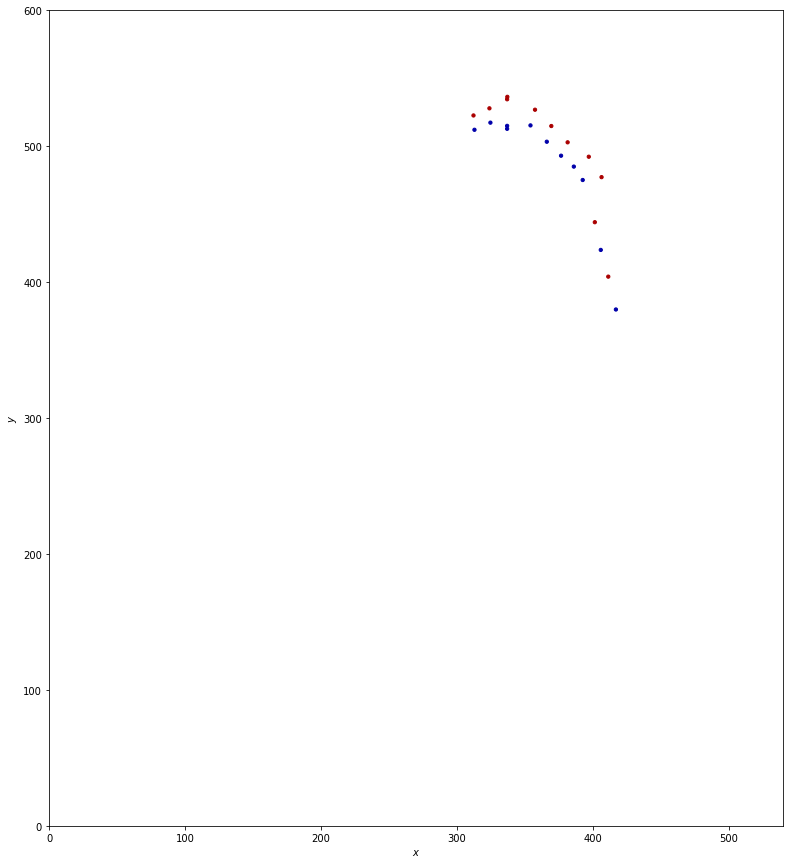

angle -147.733437886
move (-0.90562774241904964, -0.42407356927893486)
391.659543812 469.536842151
170
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


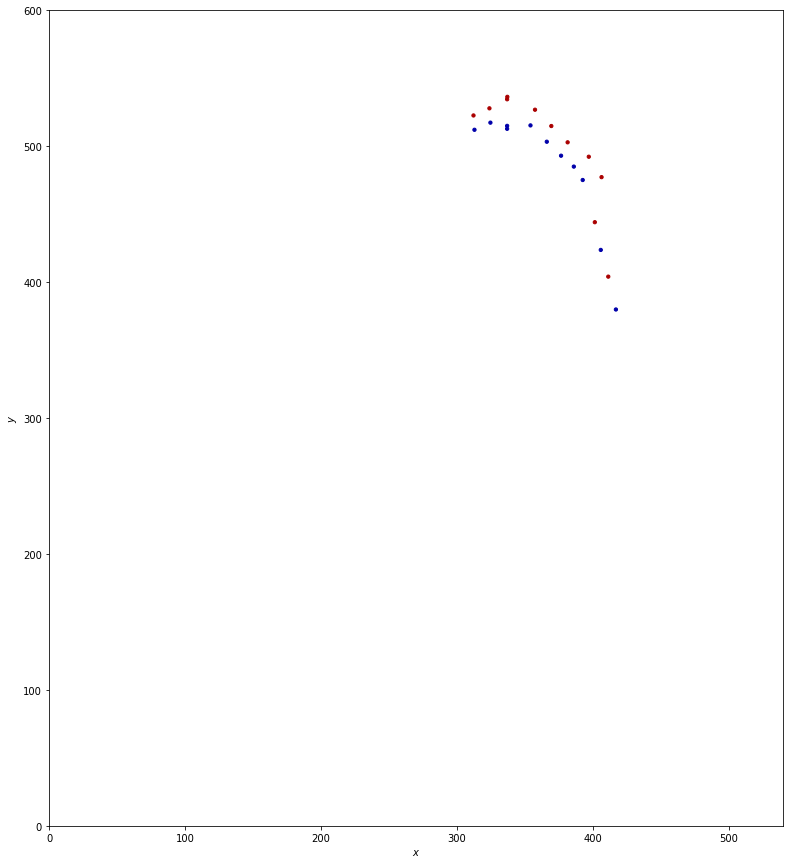

angle -154.907962551
move (-0.94513781773641414, -0.32667186209474608)
390.714405994 469.210170289
171
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


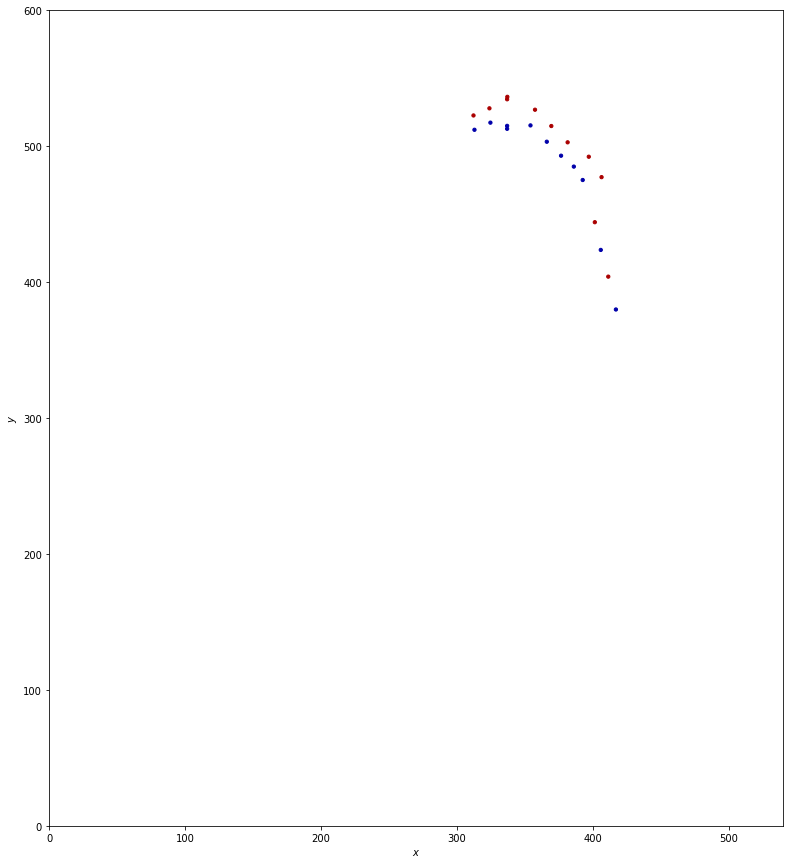

angle -160.933104944
move (-0.96968979328312599, -0.24433932307864059)
389.744716201 468.965830966
172
yes -1 (354.2378, 515.3702)
yes -1 (366.2378, 503.3702)


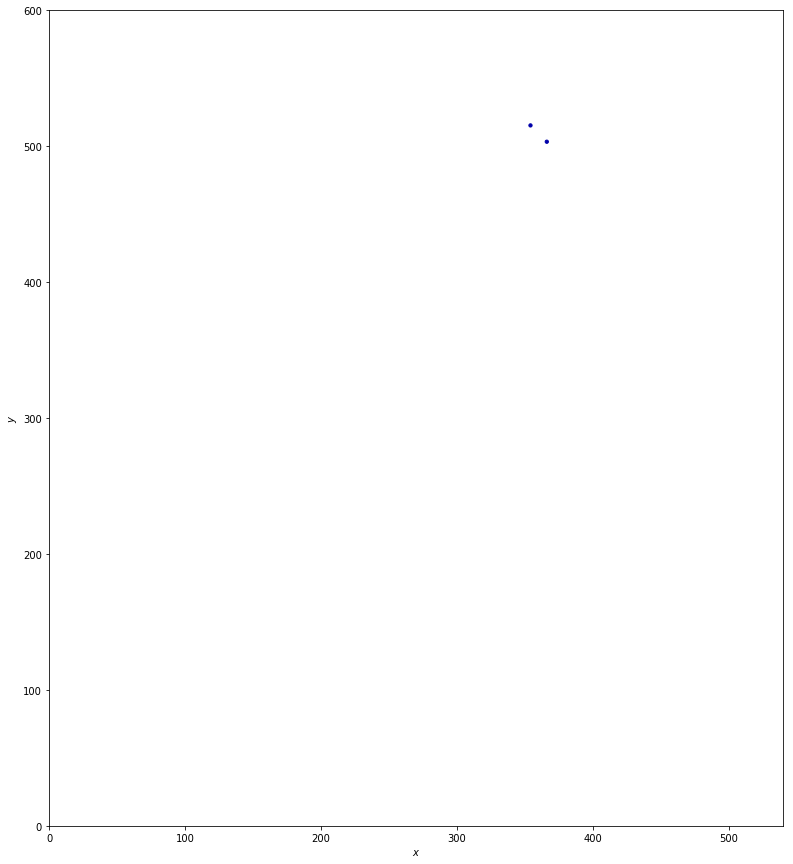

angle -165.857206852
move (-0.81336187427533291, -0.58175807813499036)
388.931354327 468.384072888
173
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


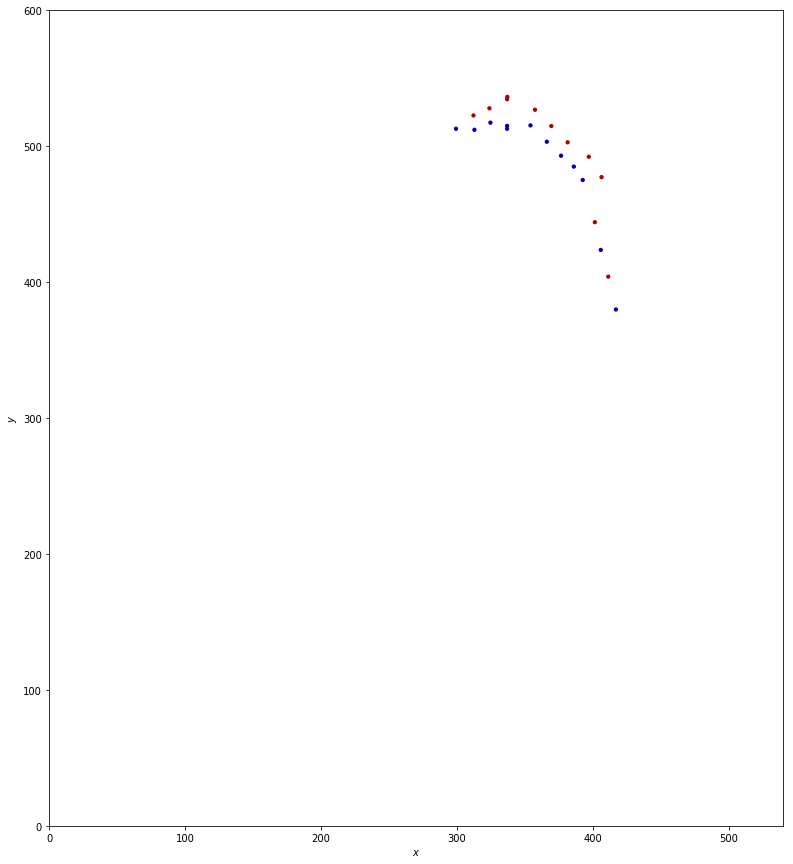

angle -144.425708273
move (-0.97746035568720391, -0.21111904949540855)
387.953893971 468.172953839
174
yes -1 (354.2378, 515.3702)
yes -1 (366.2378, 503.3702)


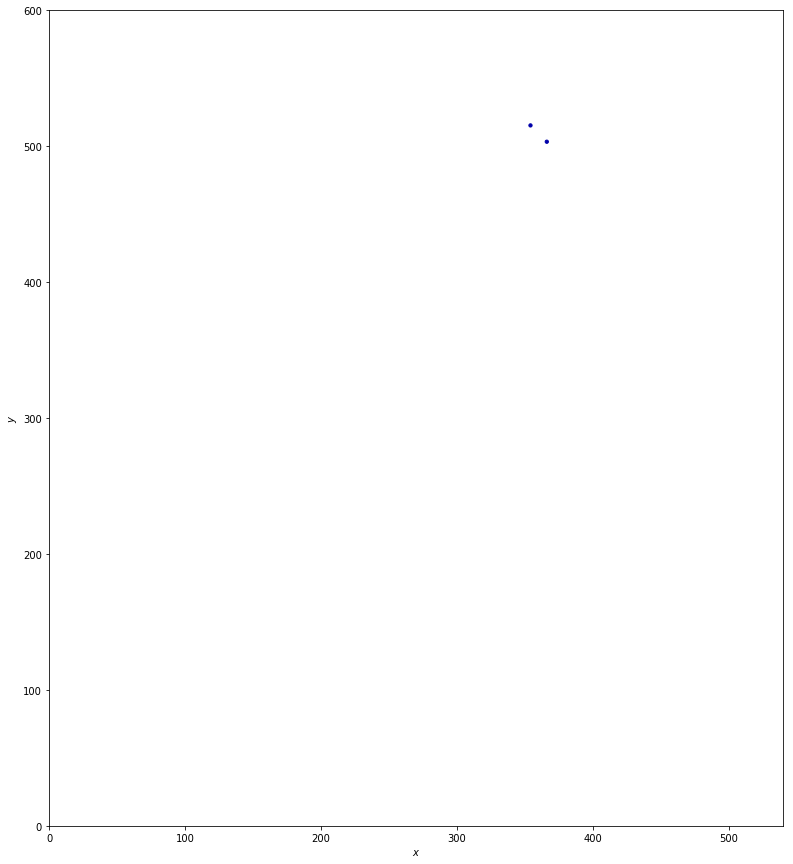

angle -167.812060541
move (-0.83657246927786766, -0.54785628010120602)
387.117321502 467.625097558
175
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


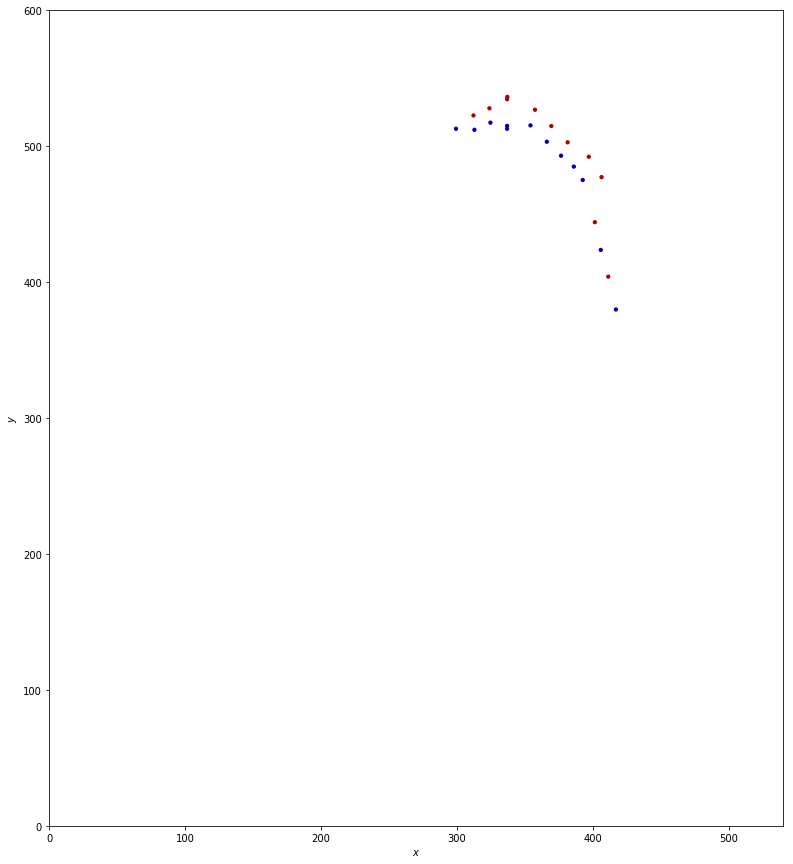

angle -146.779931229
move (-0.97956338709137536, -0.2011357021268784)
386.137758114 467.423961856
176
yes -1 (354.2378, 515.3702)
yes -1 (366.2378, 503.3702)


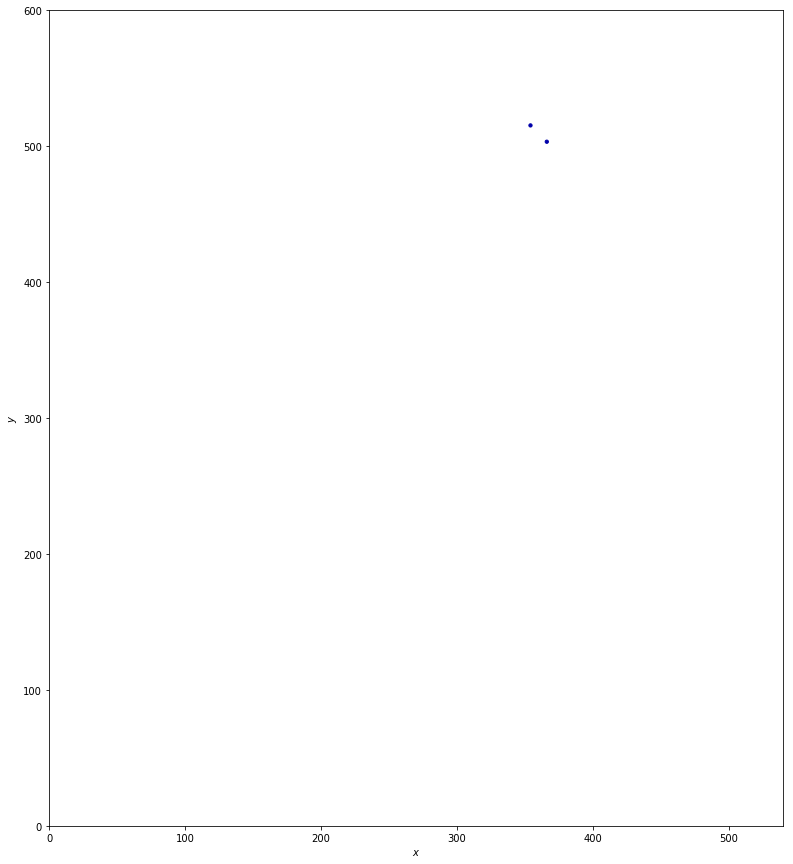

angle -168.396620345
move (-0.85863532989838021, -0.51258693921158371)
385.279122785 466.911374917
177
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


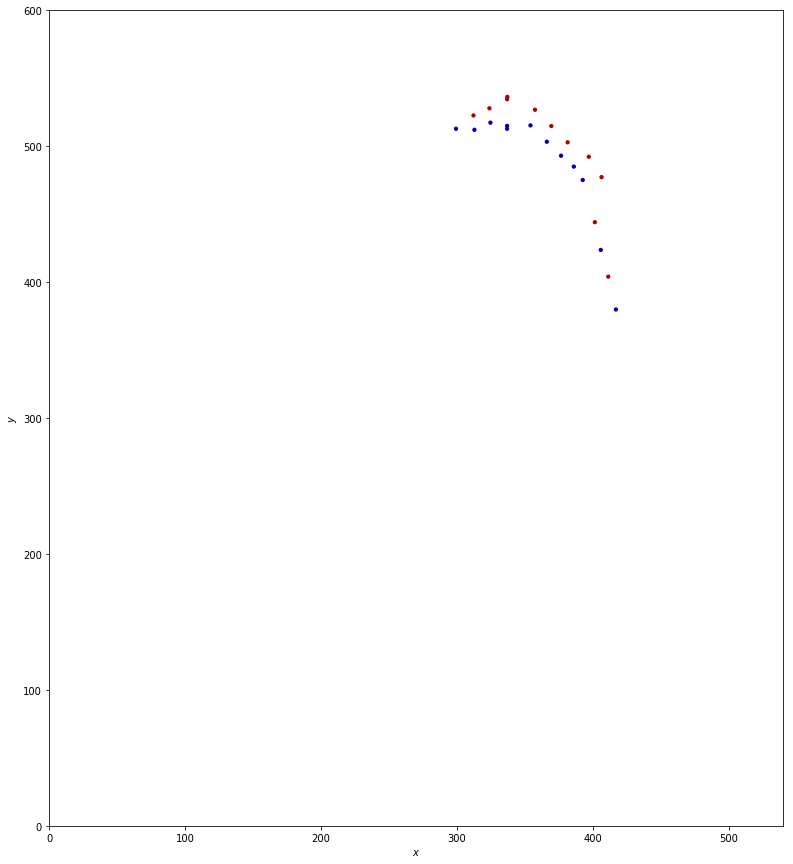

angle -149.163701387
move (-0.97726717481126402, -0.21201148326543642)
384.30185561 466.699363434
178
yes -1 (354.2378, 515.3702)


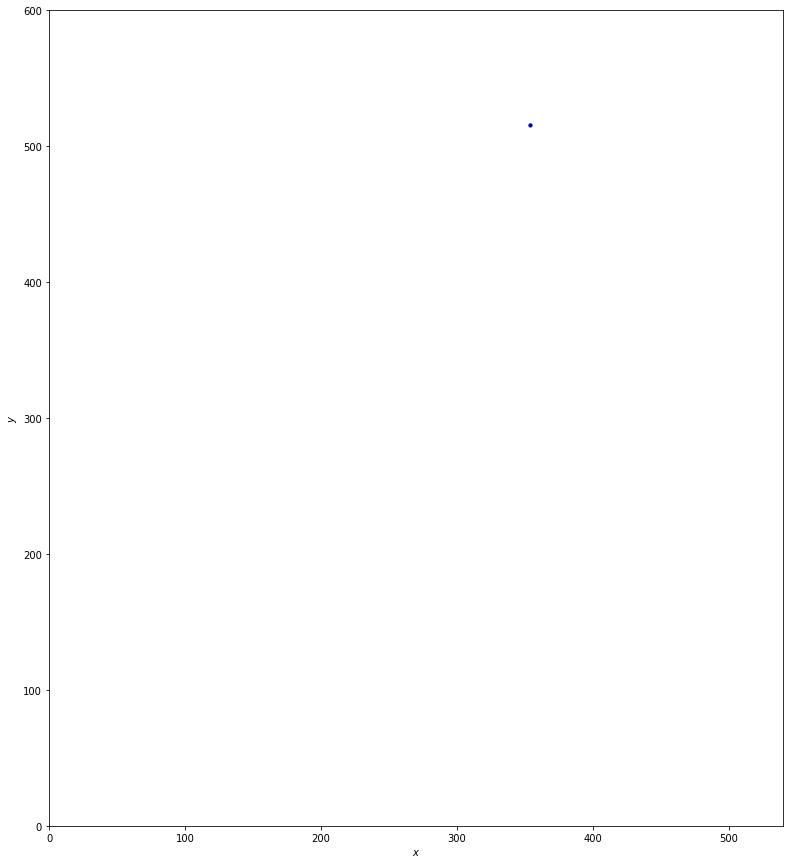

angle -167.759743597
move (-0.85077723518081549, -0.52552649419233599)
383.451078375 466.17383694
179
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


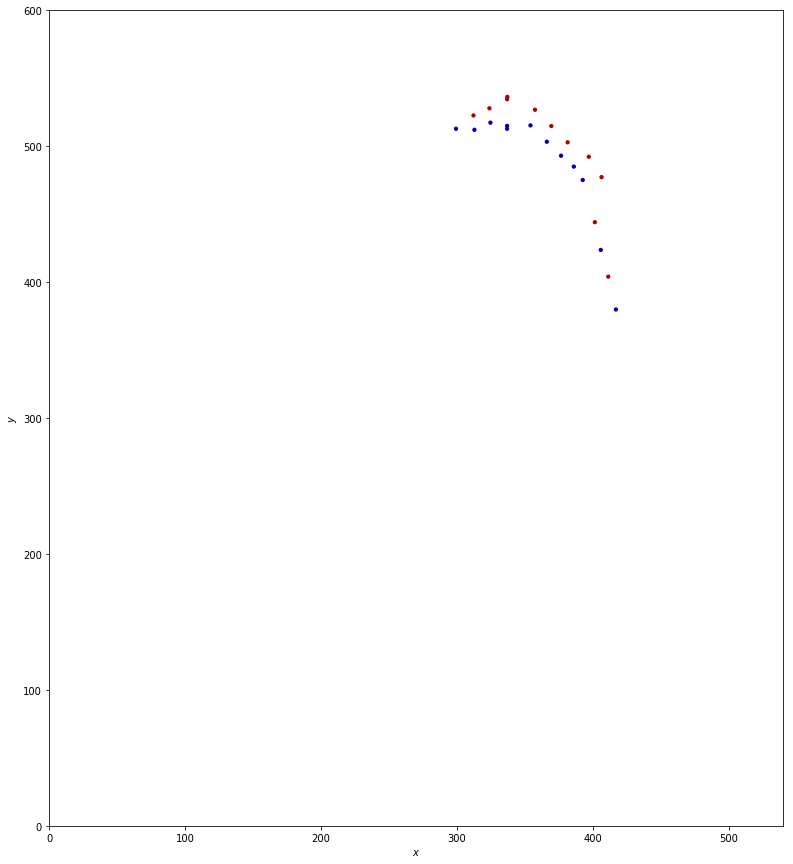

angle -148.296306652
move (-0.97233376034150376, -0.23359592997342904)
382.478744614 465.94024101
180
yes -1 (354.2378, 515.3702)


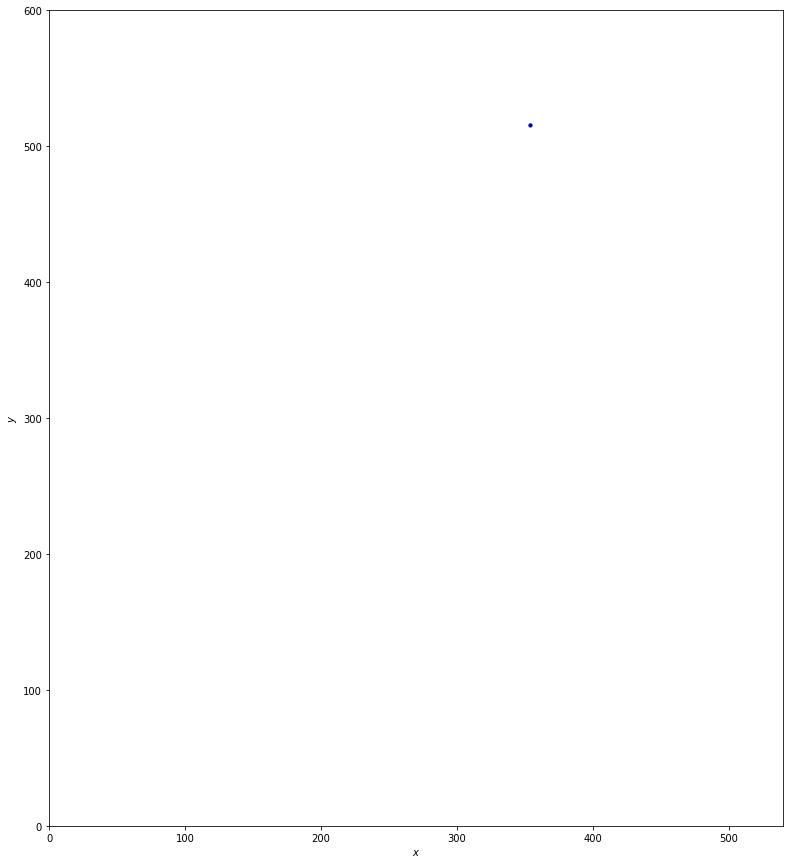

angle -166.4911279
move (-0.86827905380199422, -0.49607608764050865)
381.61046556 465.444164922
181
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


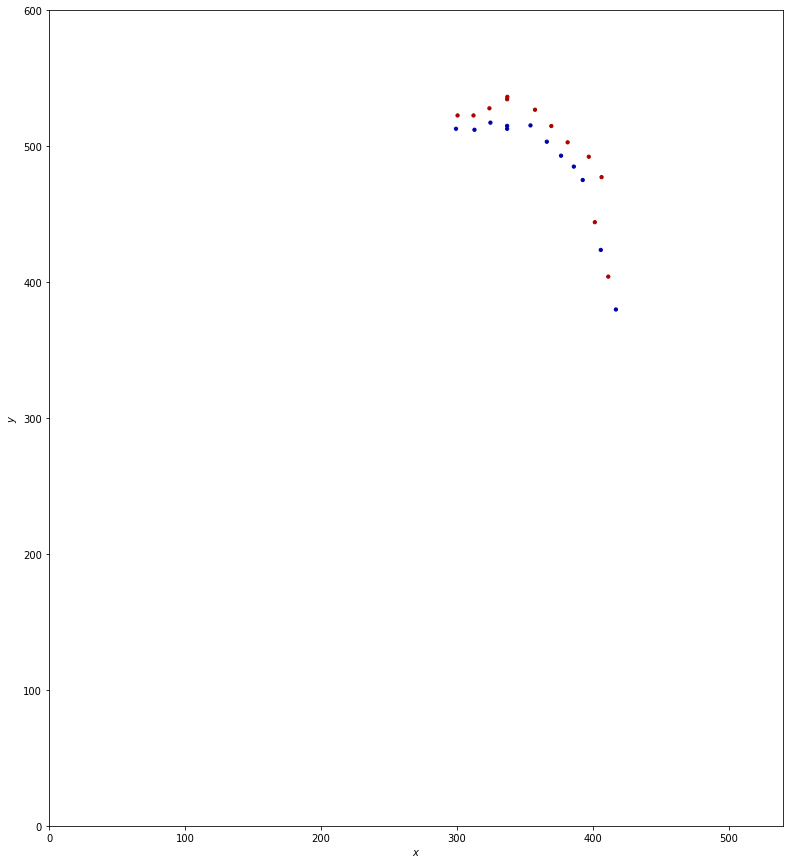

angle -150.259266166
move (-0.97933679521994133, -0.20223610342452408)
380.631128765 465.241928819
182
yes -1 (354.2378, 515.3702)


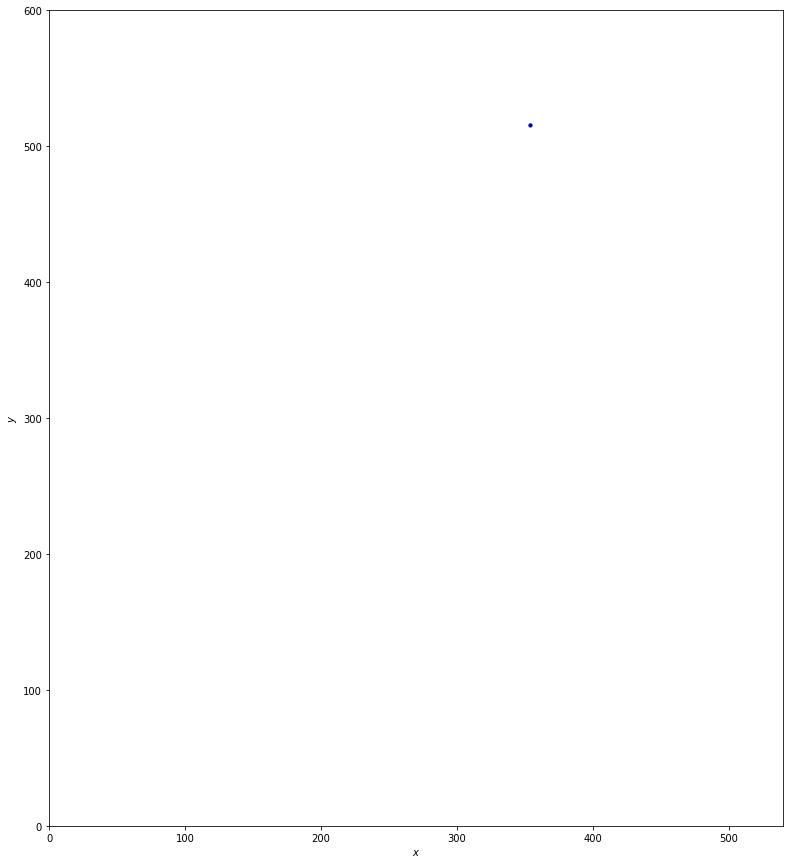

angle -168.33224918
move (-0.88484525606321329, -0.46588504249699458)
379.746283509 464.776043776
183
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


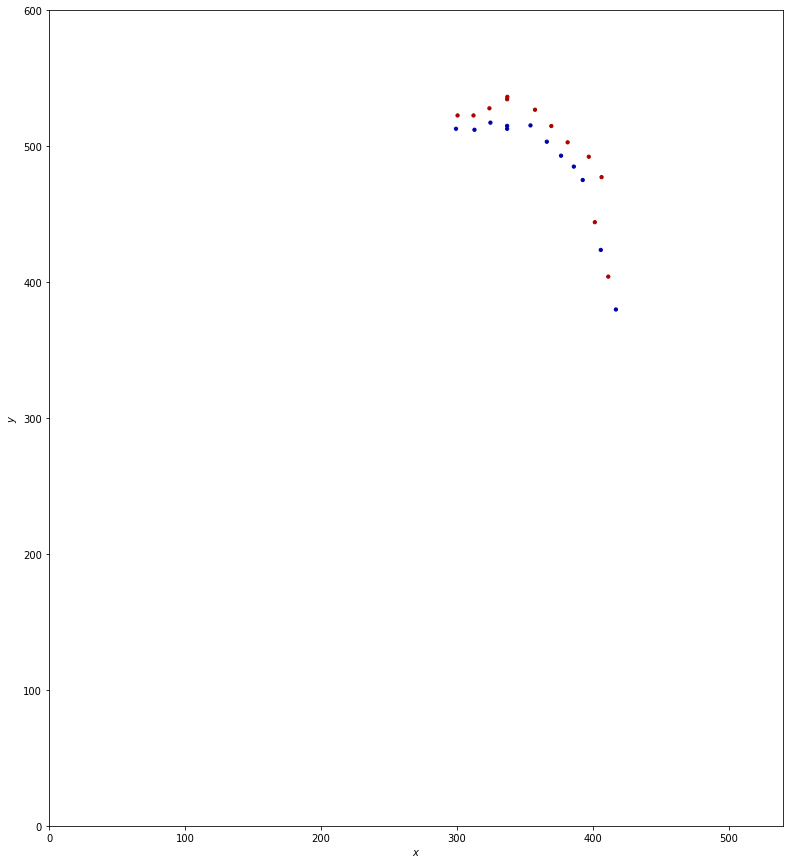

angle -152.232484472
move (-0.97651825293542394, -0.21543468078270811)
378.769765256 464.560609095
184


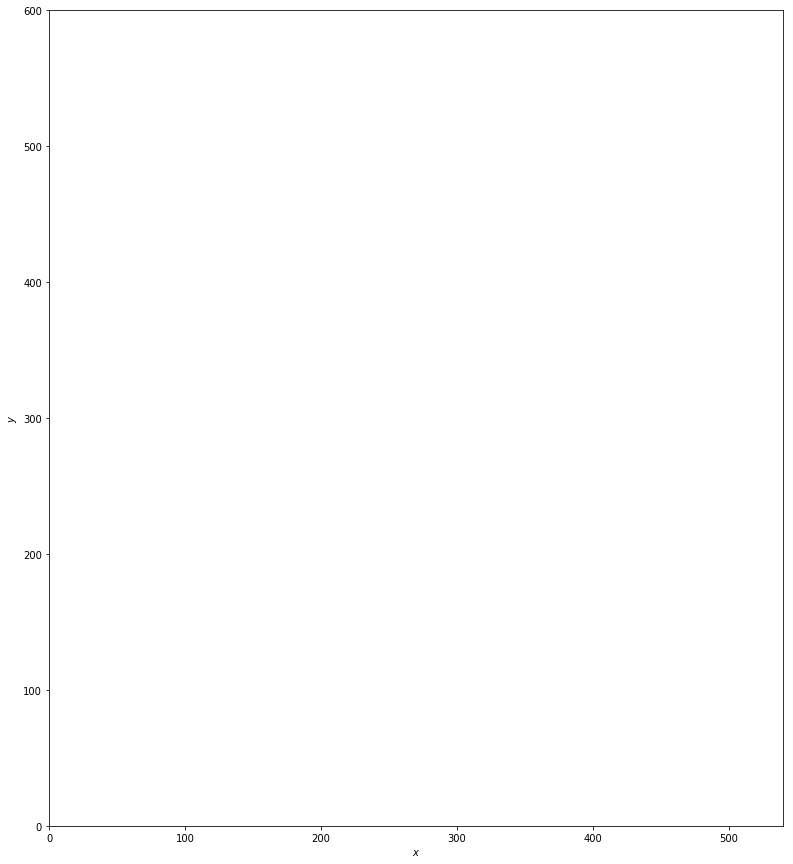

angle -167.558969688
move (1.0, 0.0)
379.769765256 464.560609095
185
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


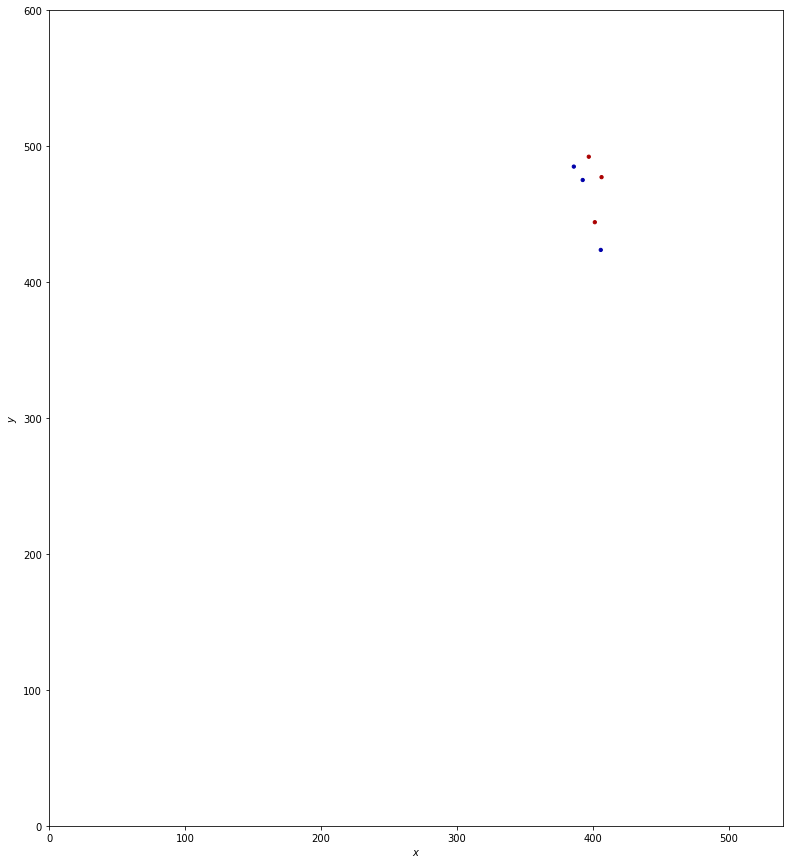

angle 0.0
move (-0.9949316477729595, 0.10055354921524928)
378.774833608 464.661162645
186
yes -1 (354.2378, 515.3702)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)


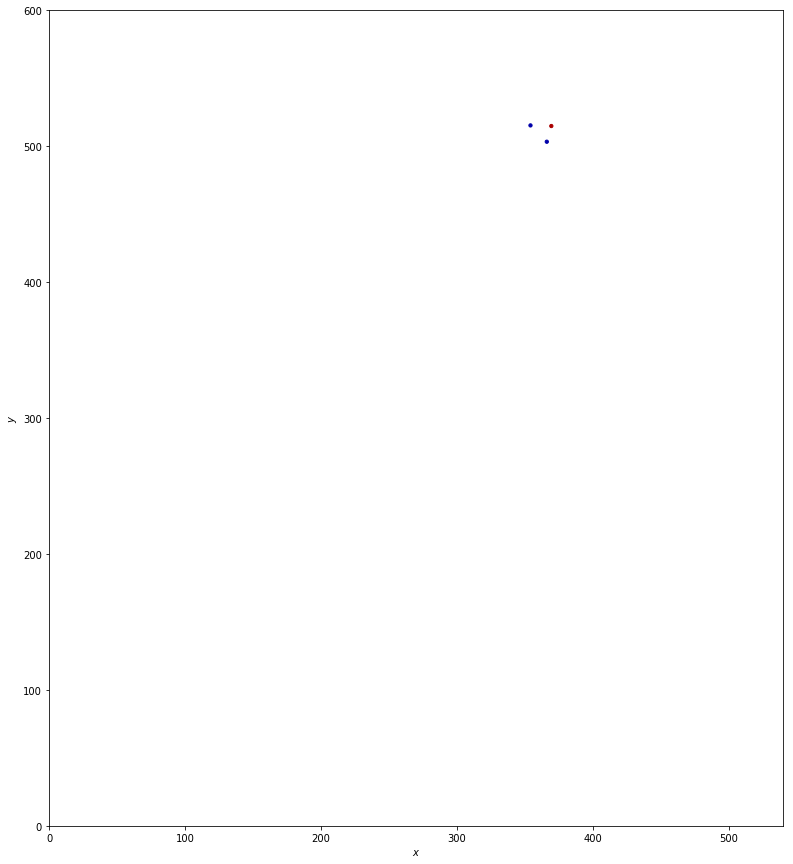

angle 174.228952817
move (-0.8674504690295054, -0.49752355098074608)
377.907383139 464.163639094
187
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


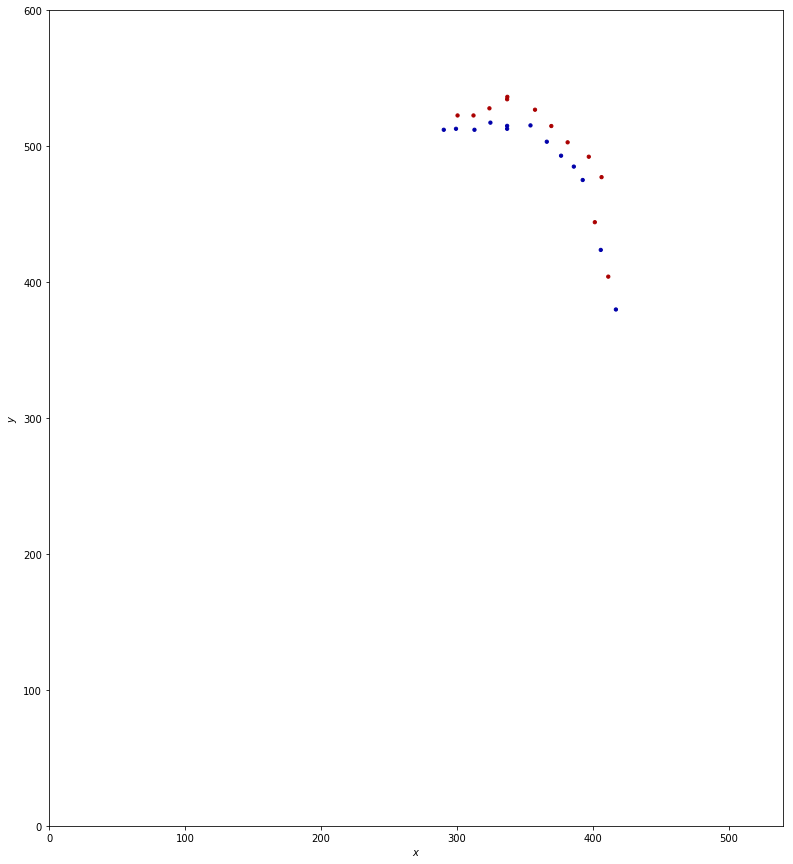

angle -150.163705746
move (-0.95504913109961076, -0.29644756228695579)
376.952334008 463.867191531
188
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


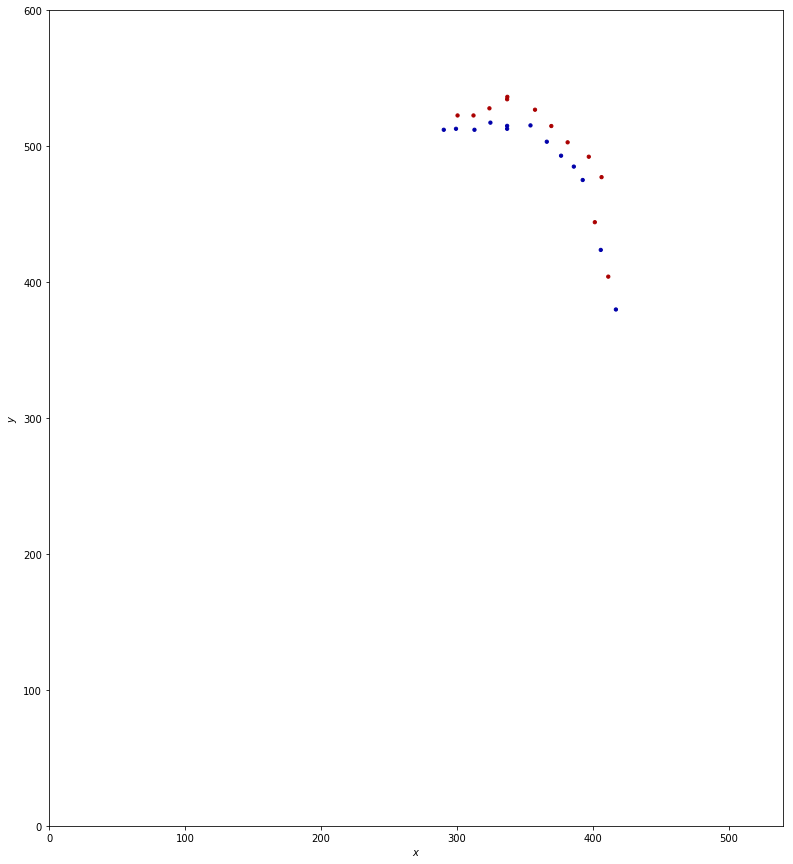

angle -162.755640142
move (-0.95300928083930903, -0.302941100932414)
375.999324727 463.56425043
189
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


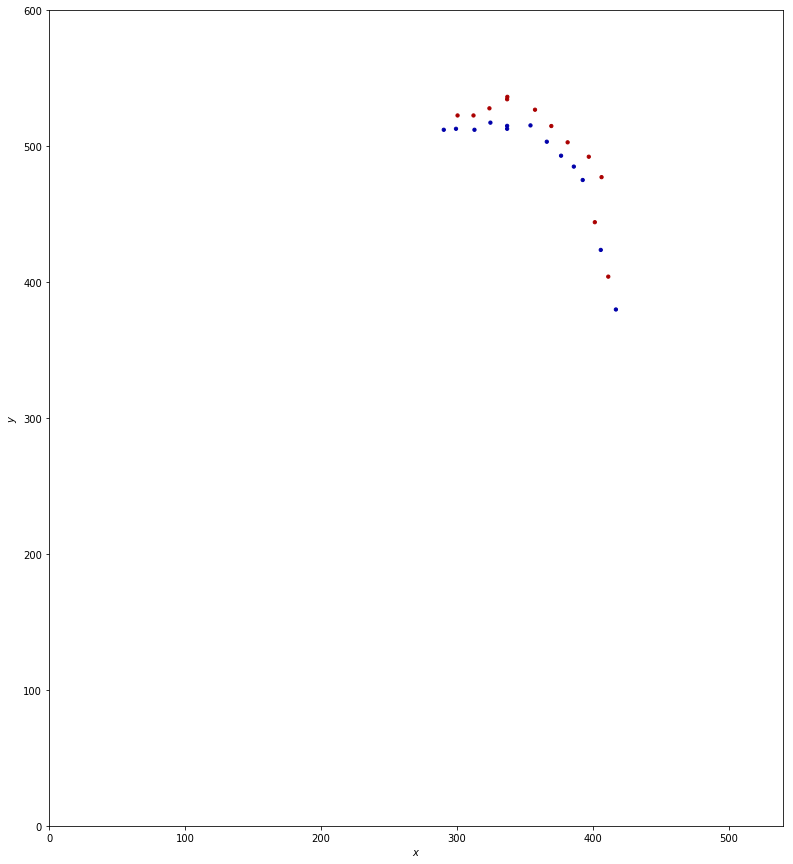

angle -162.365661596
move (-0.95095317167592575, -0.30933487562752648)
375.048371556 463.254915555
190
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


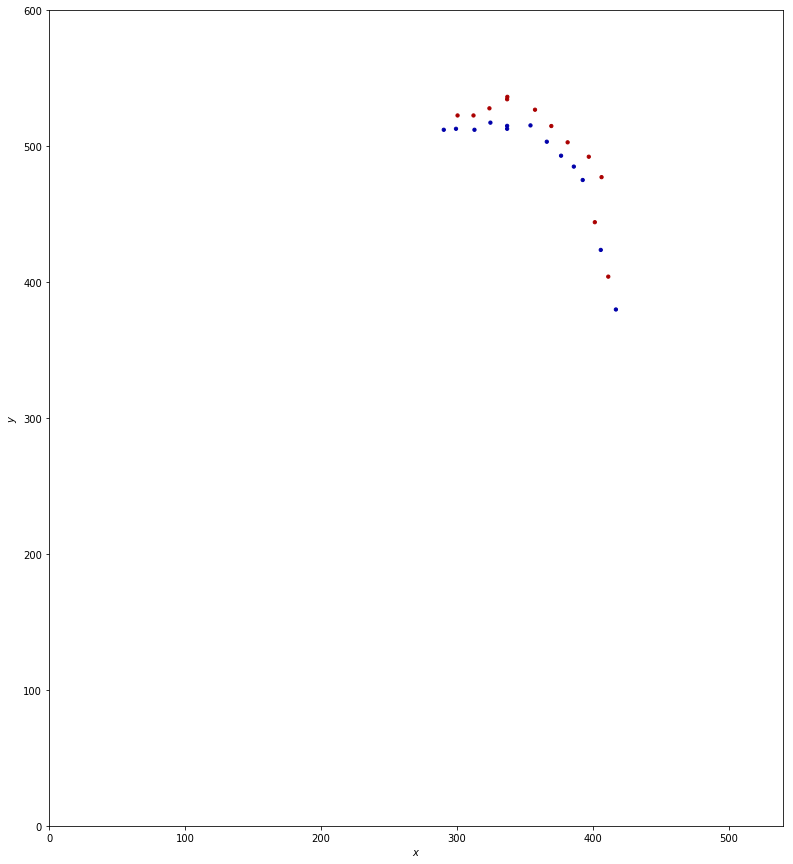

angle -161.980848411
move (-0.94890495728922342, -0.31556200980462945)
374.099466599 462.939353545
191
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


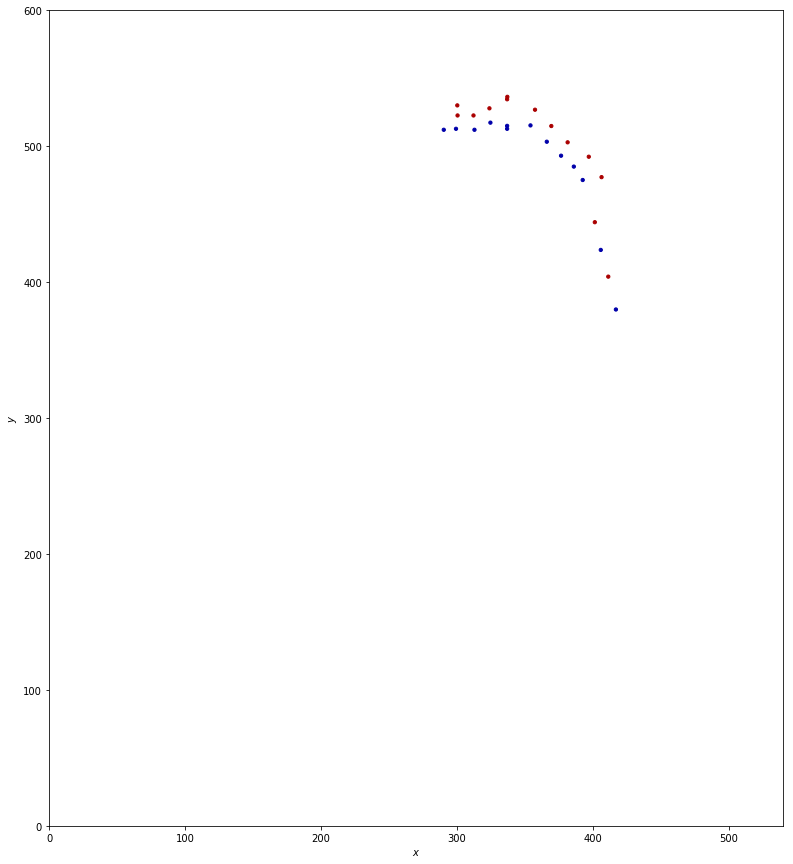

angle -161.605254861
move (-0.96552507943790622, -0.26031004778230304)
373.133941519 462.679043497
192
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


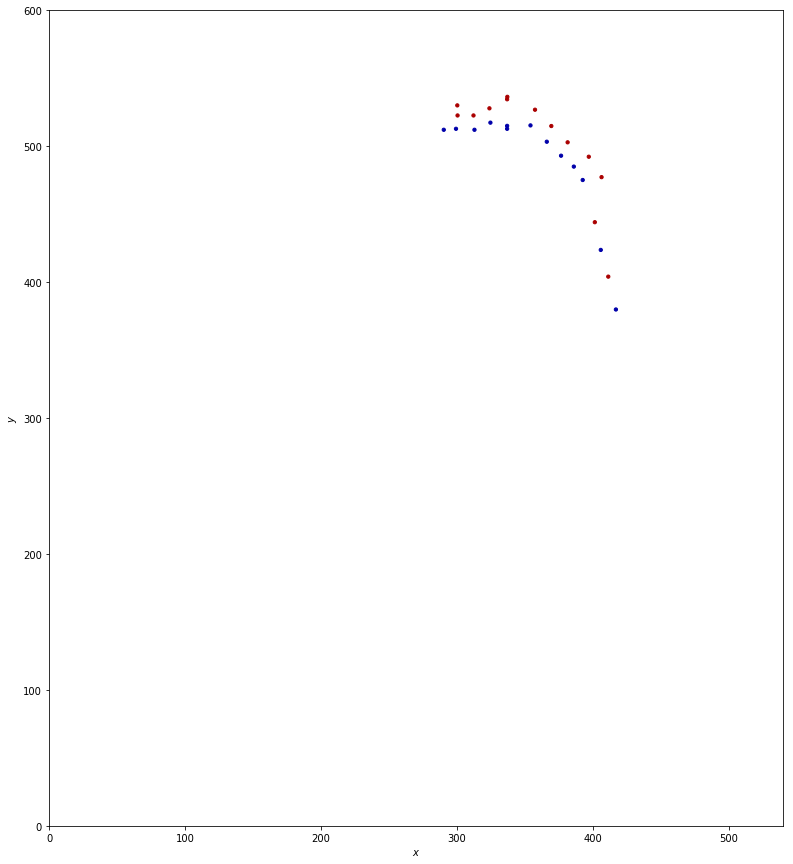

angle -164.911539927
move (-0.96514821308227705, -0.26170389141945821)
372.168793306 462.417339606
193
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


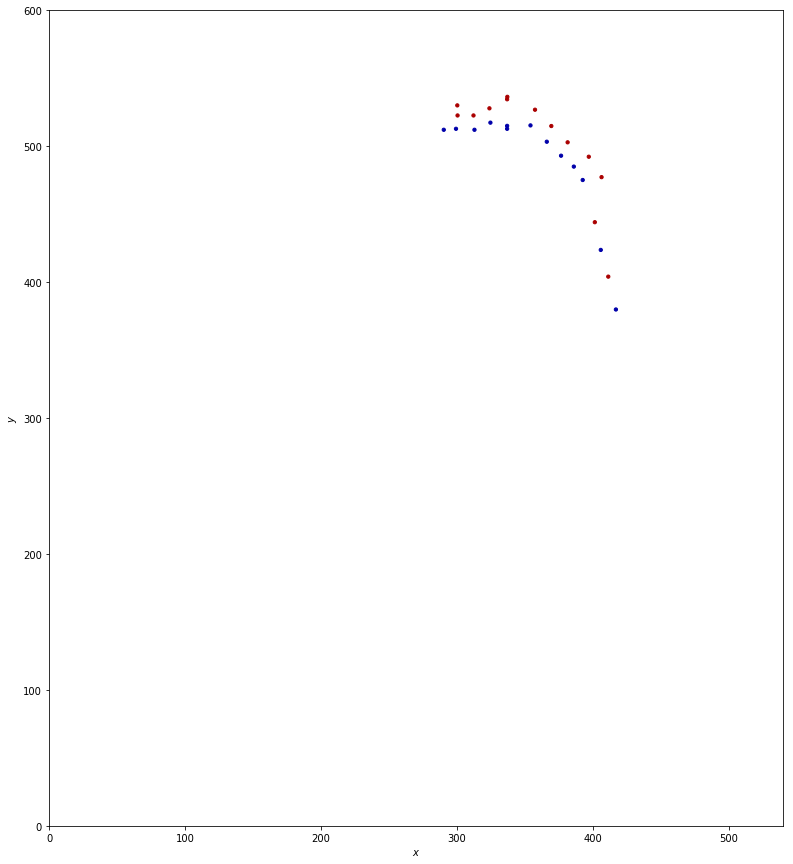

angle -164.828810919
move (-0.96484470607946304, -0.26282064825738966)
371.2039486 462.154518958
194
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


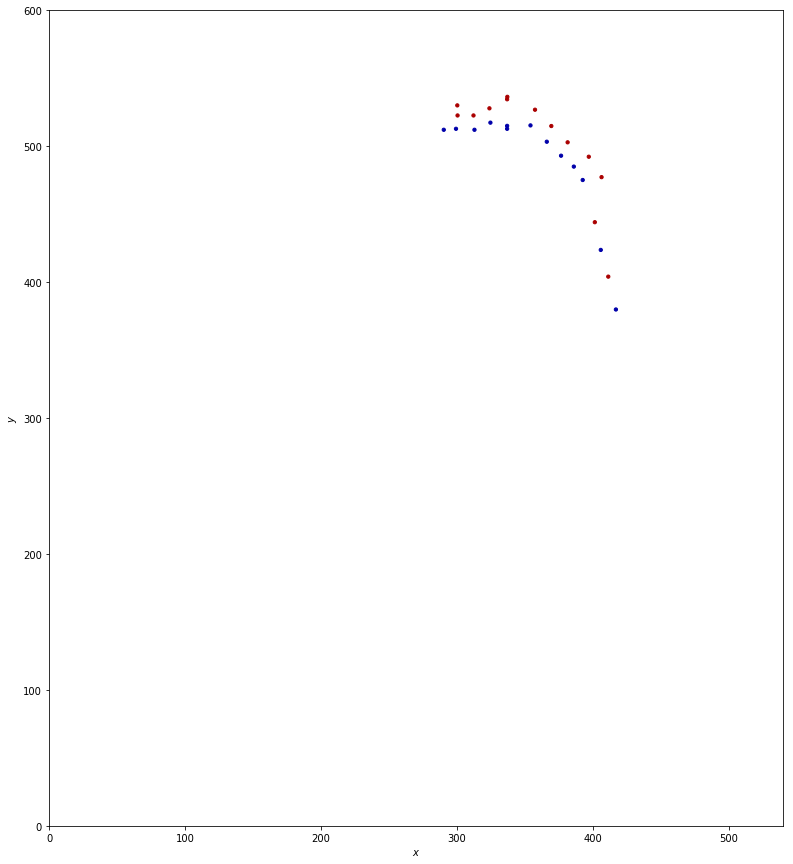

angle -164.762504513
move (-0.96462370580188572, -0.2636306245583715)
370.239324894 461.890888333
195
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


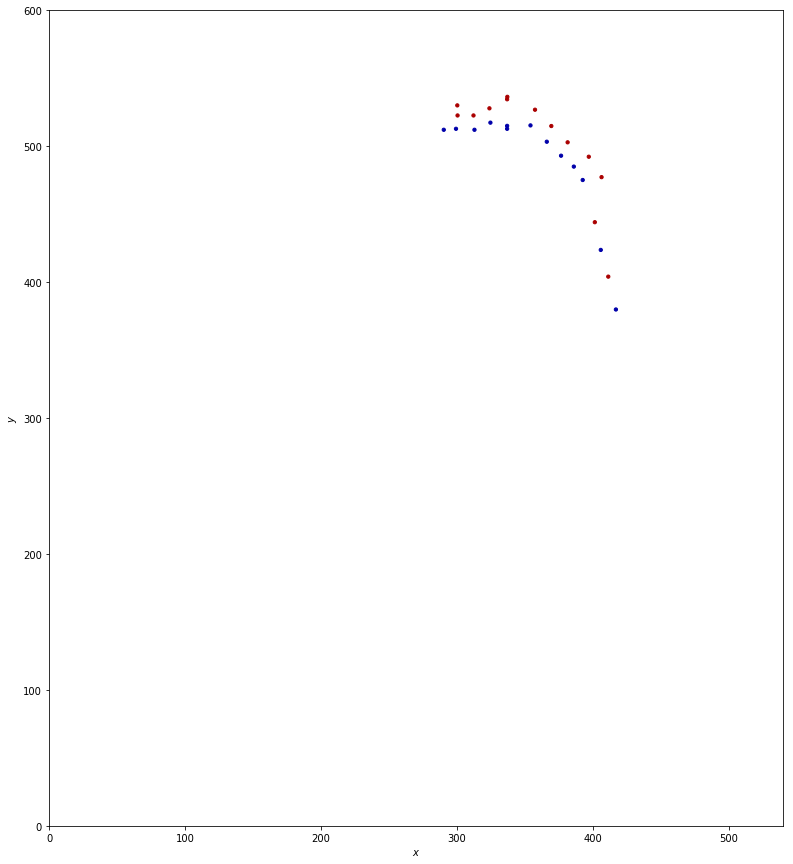

angle -164.714399843
move (-0.96449328155259628, -0.26410738316053223)
369.274831613 461.62678095
196
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes -1 (311.5797, 380.8201)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


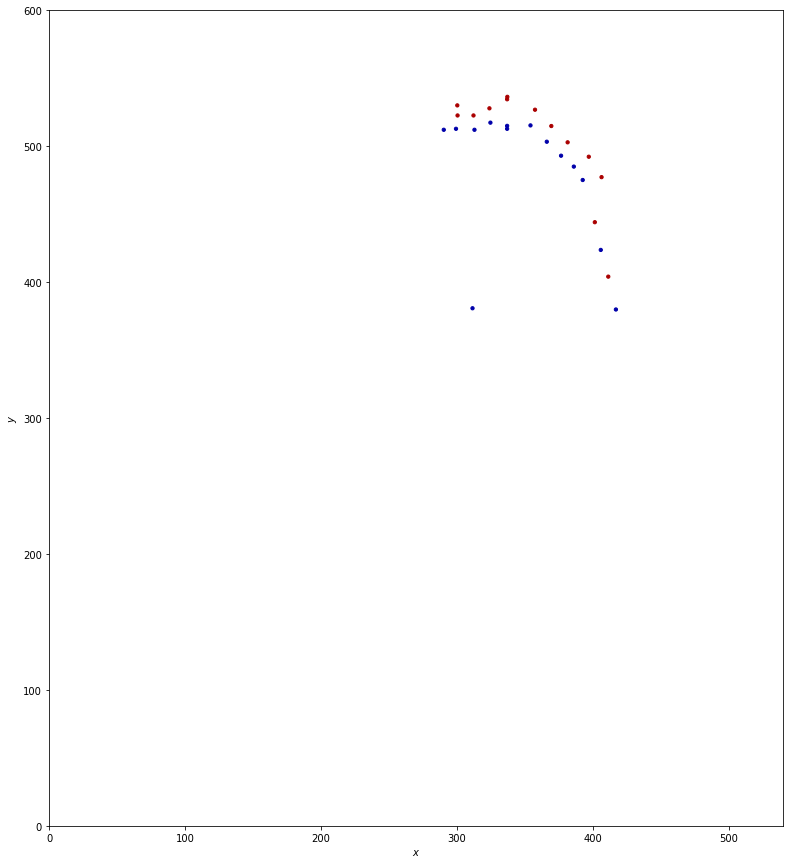

angle -164.686079886
move (-0.91698961671464374, -0.39891107133987991)
368.357841996 461.227869878
197
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


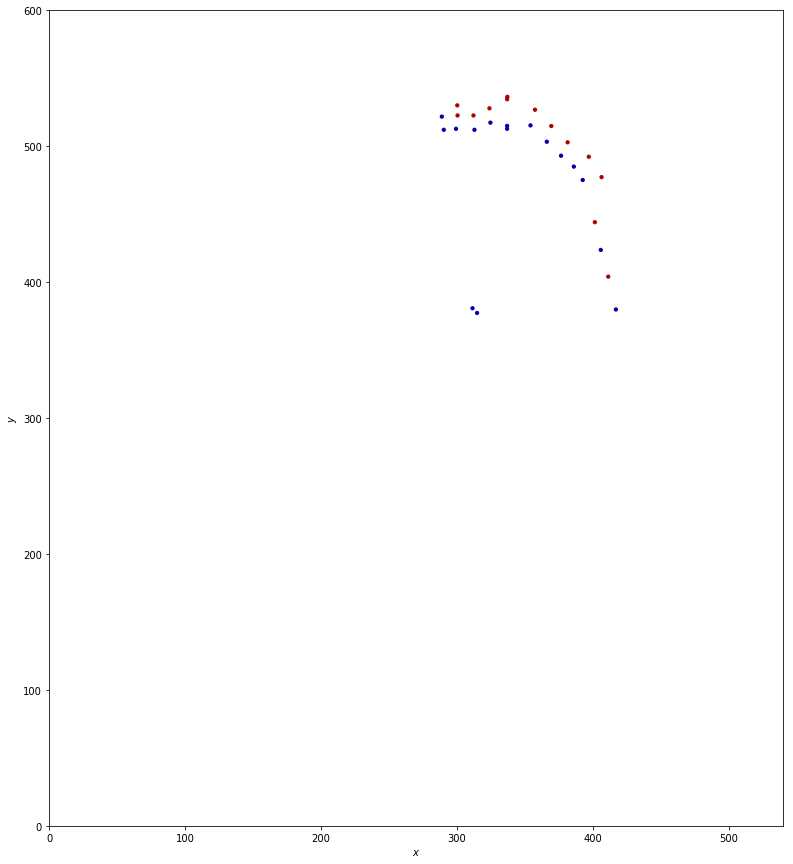

angle -156.489878077
move (-0.7921473200511564, -0.61032992990330315)
367.565694676 460.617539949
198
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


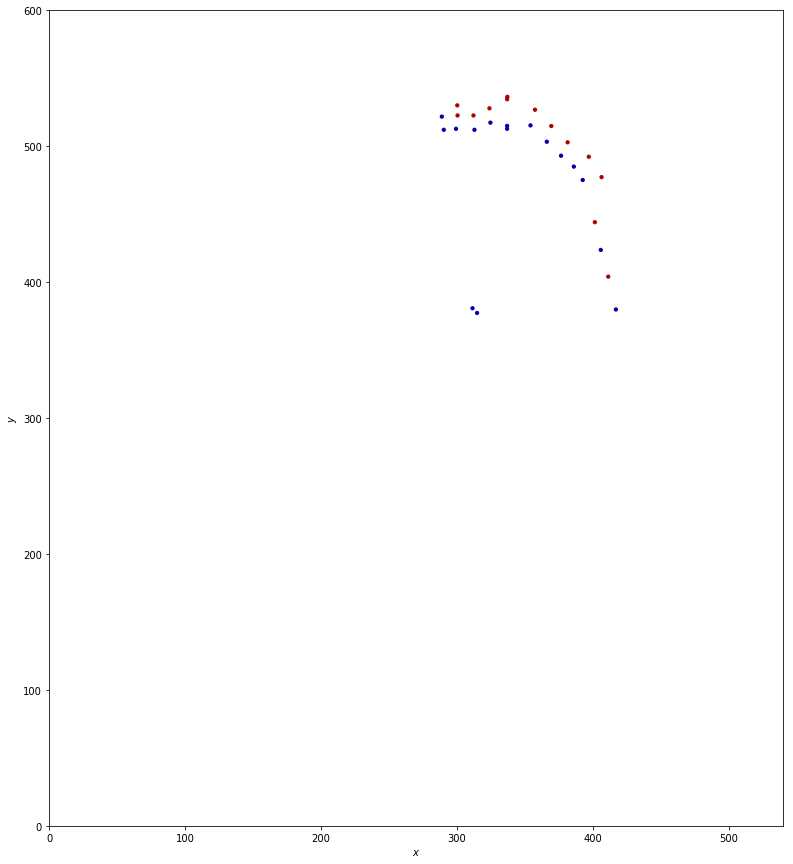

angle -142.386637131
move (-0.77293701767425949, -0.63448275524936171)
366.792757658 459.983057193
199
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


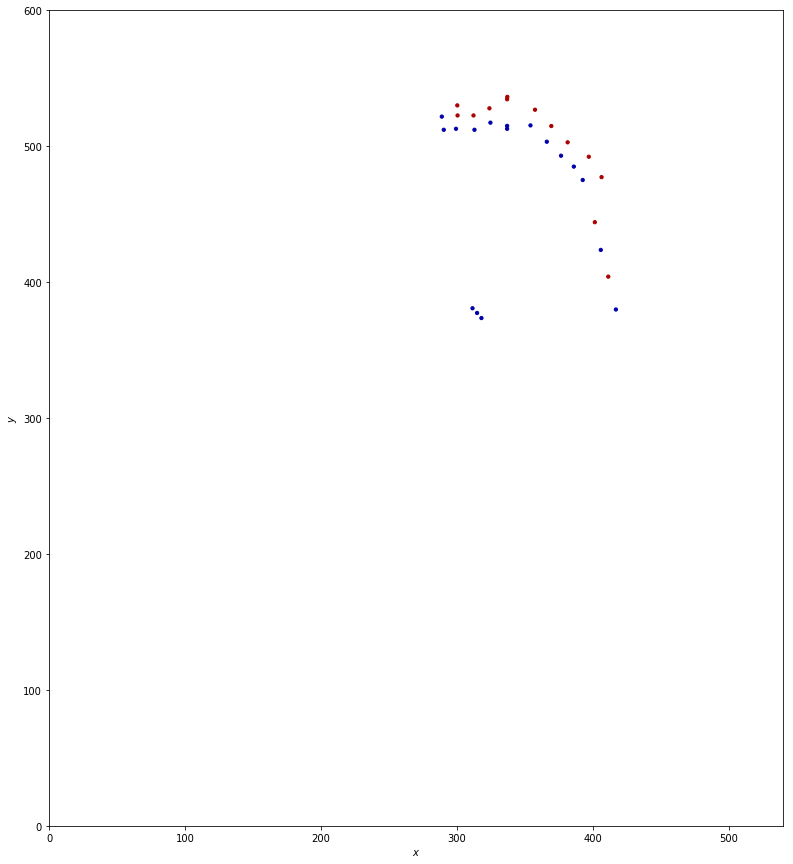

angle -140.61836806
move (-0.61698800113610841, -0.78697255762451424)
366.175769657 459.196084636
200
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


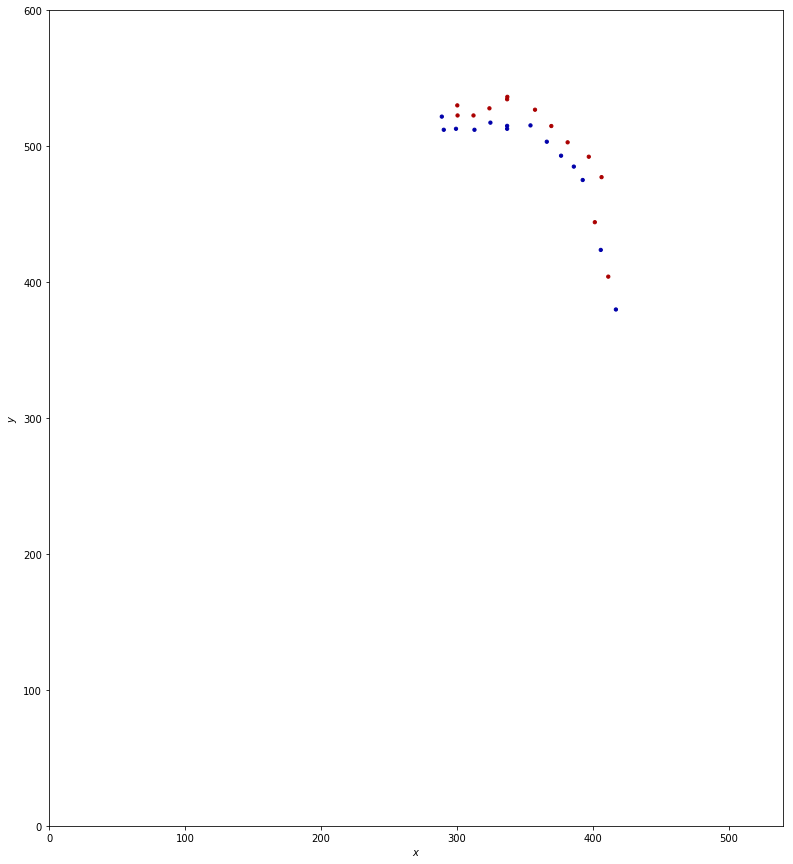

angle -128.096514435
move (-0.91673427191114909, -0.39949752778150616)
365.259035385 458.796587108
201
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


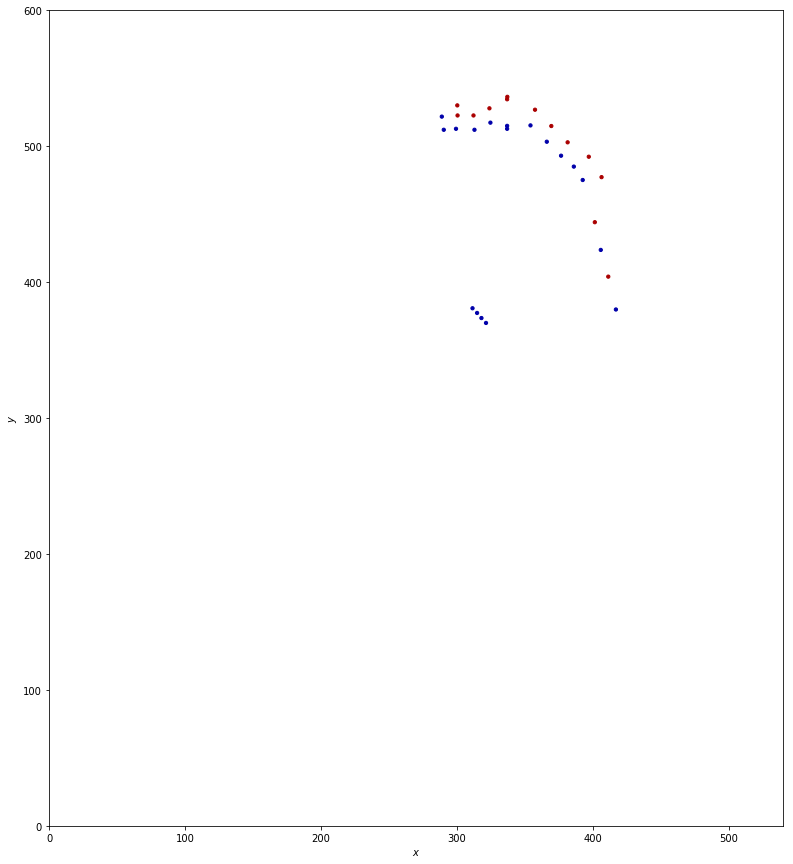

angle -156.453229727
move (-0.37149104101398567, -0.9284365387286011)
364.887544344 457.868150569
202
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


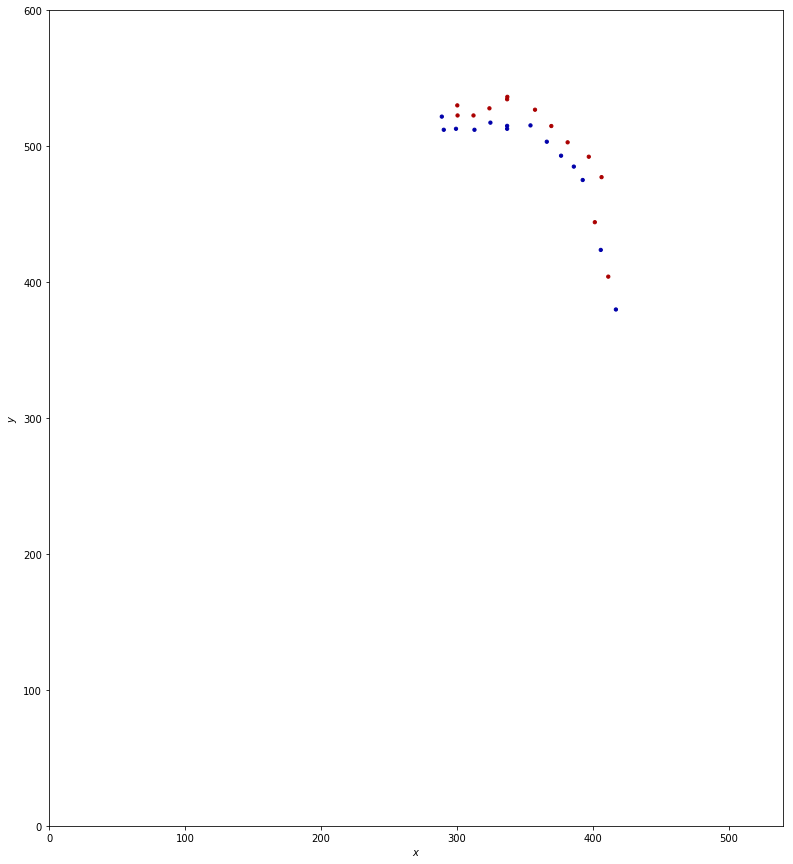

angle -111.807603068
move (-0.90587309449566034, -0.42354921398682394)
363.98167125 457.444601355
203
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


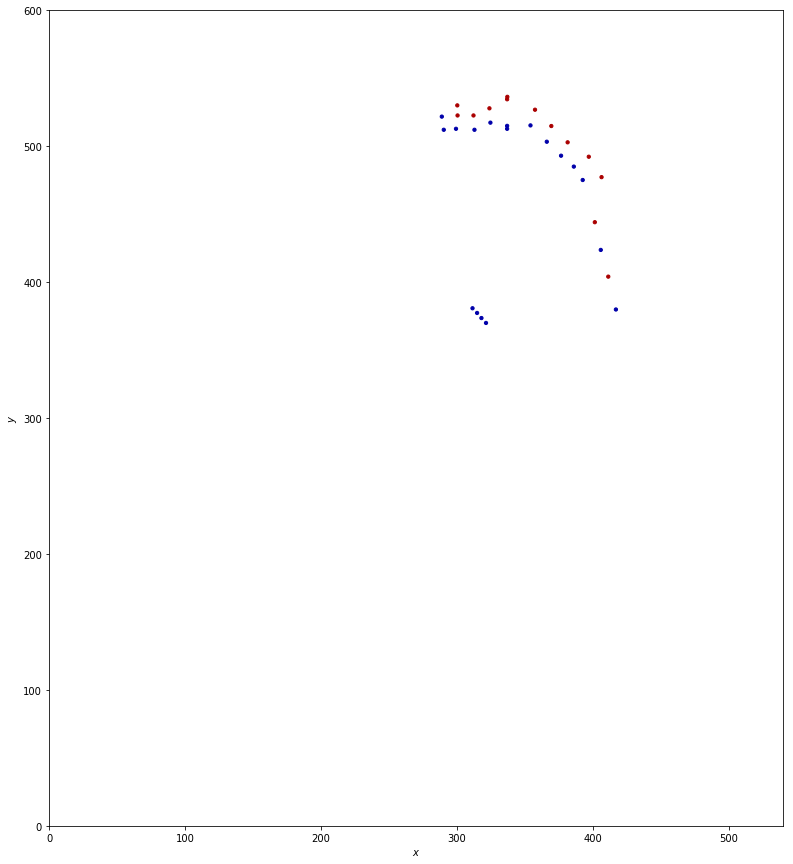

angle -154.941132113
move (-0.28856547268600774, -0.95746016521498212)
363.693105777 456.48714119
204
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


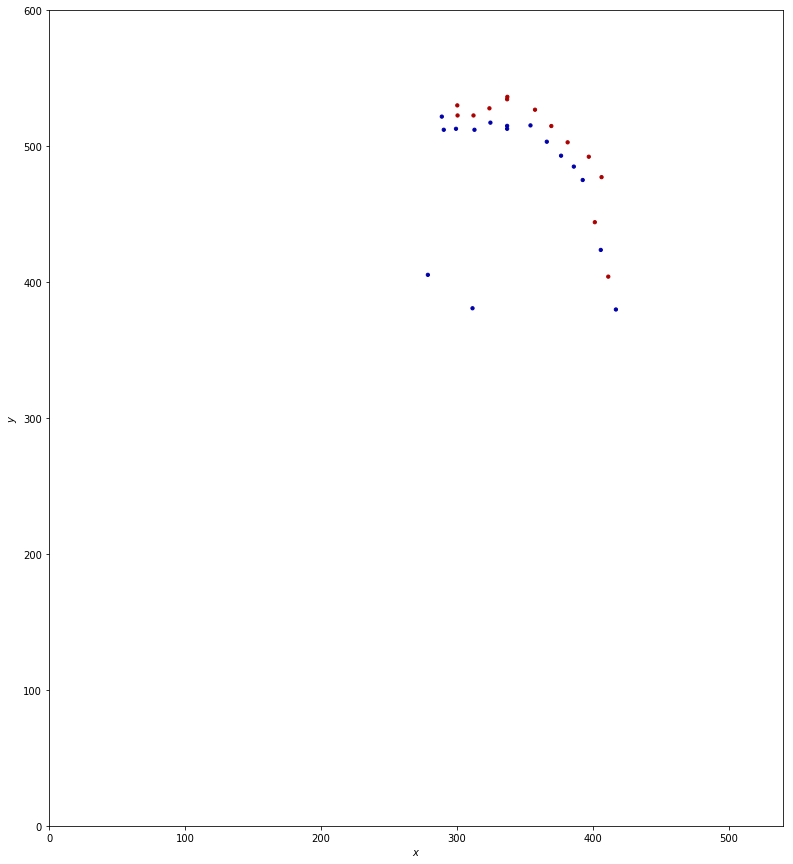

angle -106.772092443
move (-0.65950760080642745, -0.75169789442205437)
363.033598176 455.735443296
205
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


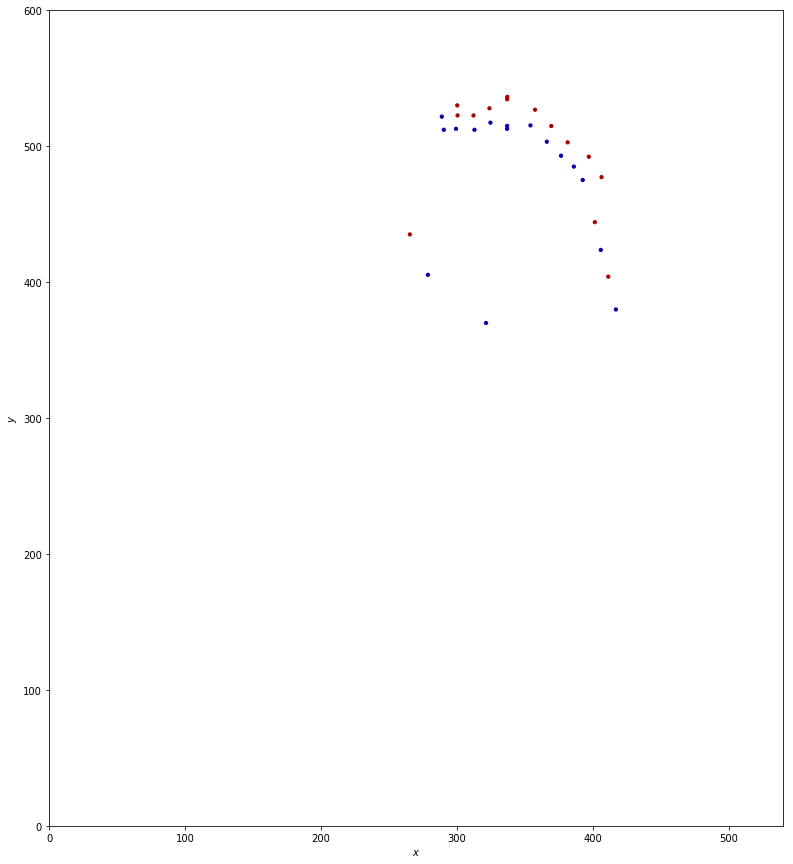

angle -131.262330437
move (-0.77844313422892353, -0.62771513186464611)
362.255155042 455.107728164
206
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes 1 (265.4697, 435.1501)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


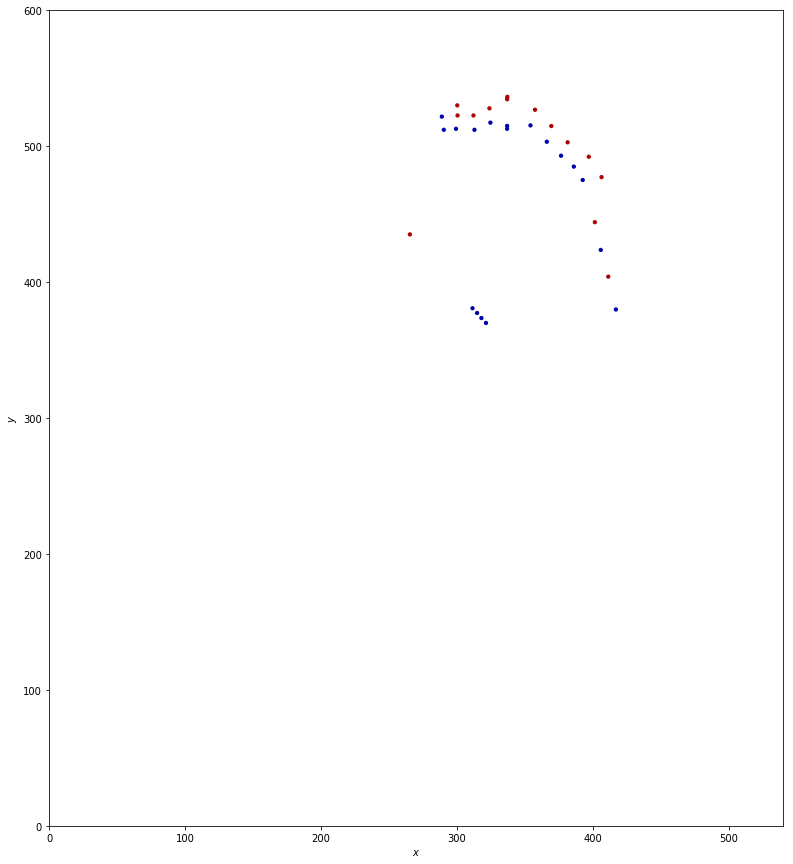

angle -141.118250435
move (-0.25362582506876213, -0.96730240403825607)
362.001529217 454.14042576
207
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


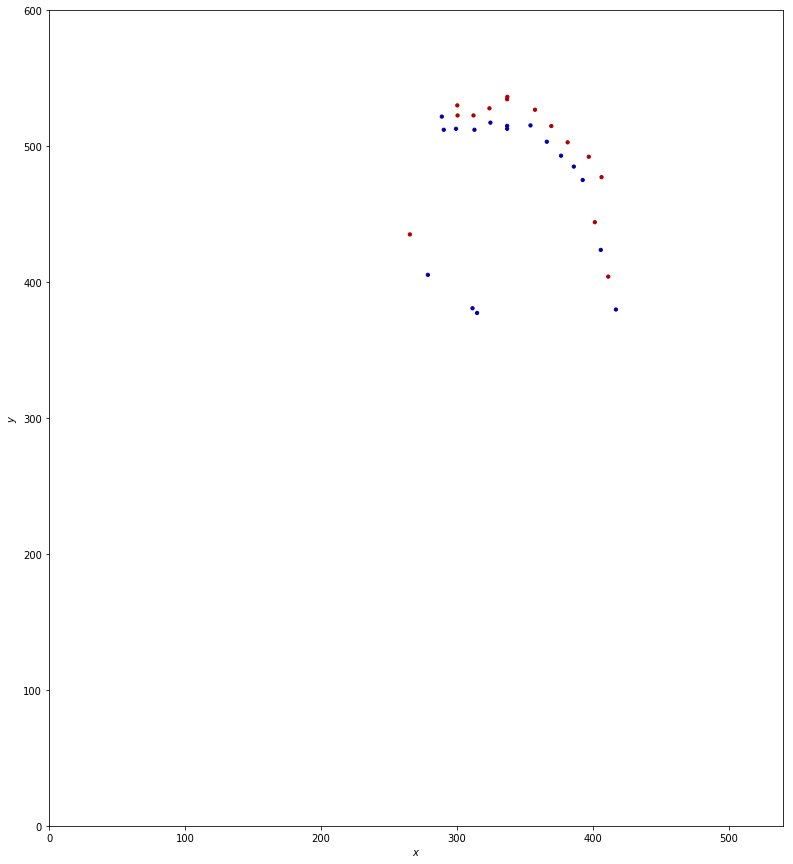

angle -104.692174085
move (-0.52040434708227312, -0.85391997021844679)
361.48112487 453.286505789
208
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


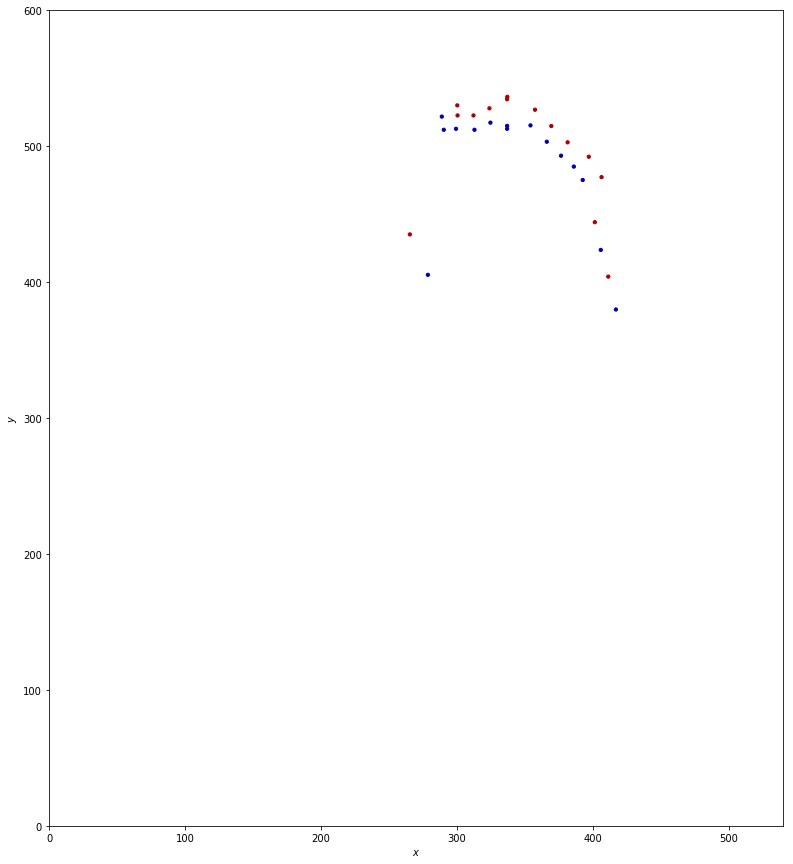

angle -121.359378209
move (-0.86278171698792572, -0.50557661024949208)
360.618343153 452.780929179
209
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (288.9881, 521.8503)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes 1 (265.4697, 435.1501)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


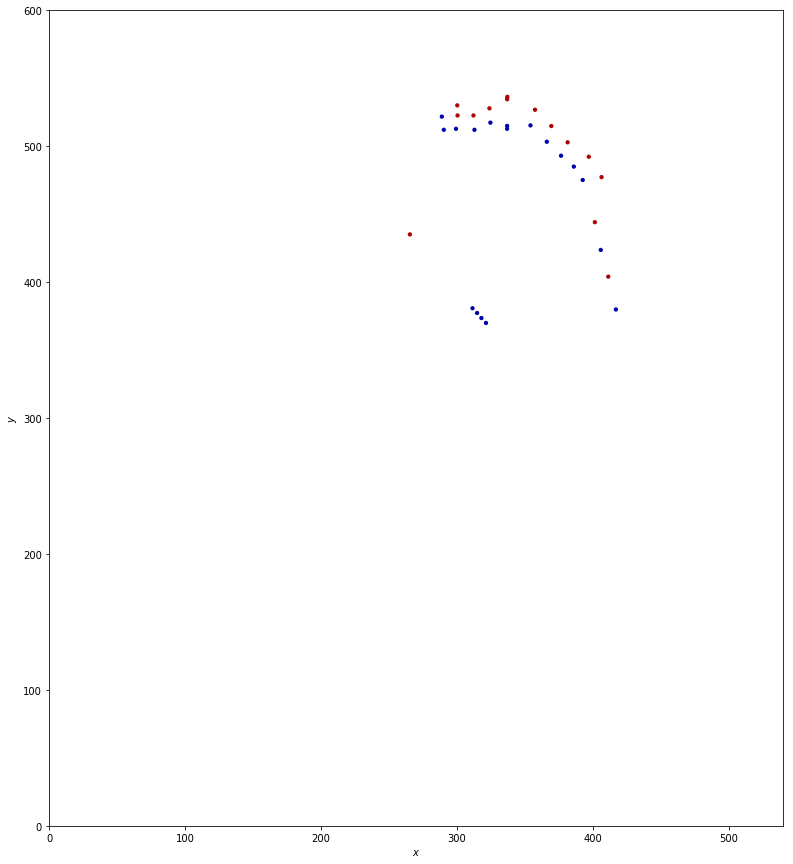

angle -149.630363481
move (-0.10046065354194945, -0.99494103196617856)
360.517882499 451.785988147
210
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (300.3891, 530.1002)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes 1 (300.5691, 522.6902)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (290.4281, 512.1602)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (265.4697, 435.1501)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)


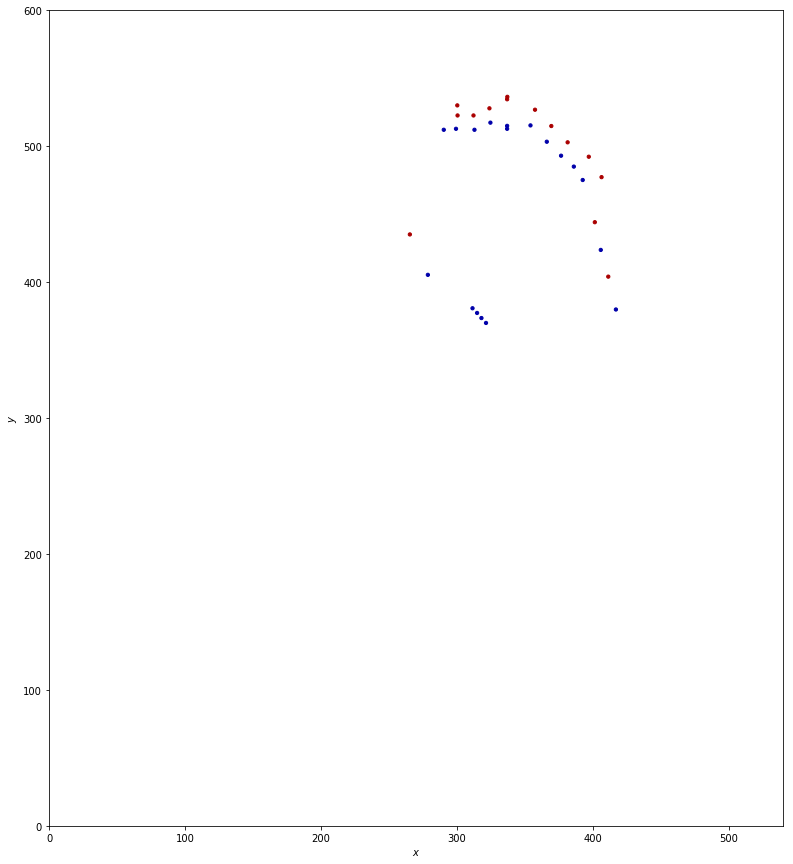

angle -95.7656975648
move (0.26173508147528241, -0.96513975522984607)
360.779617581 450.820848392
211
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)


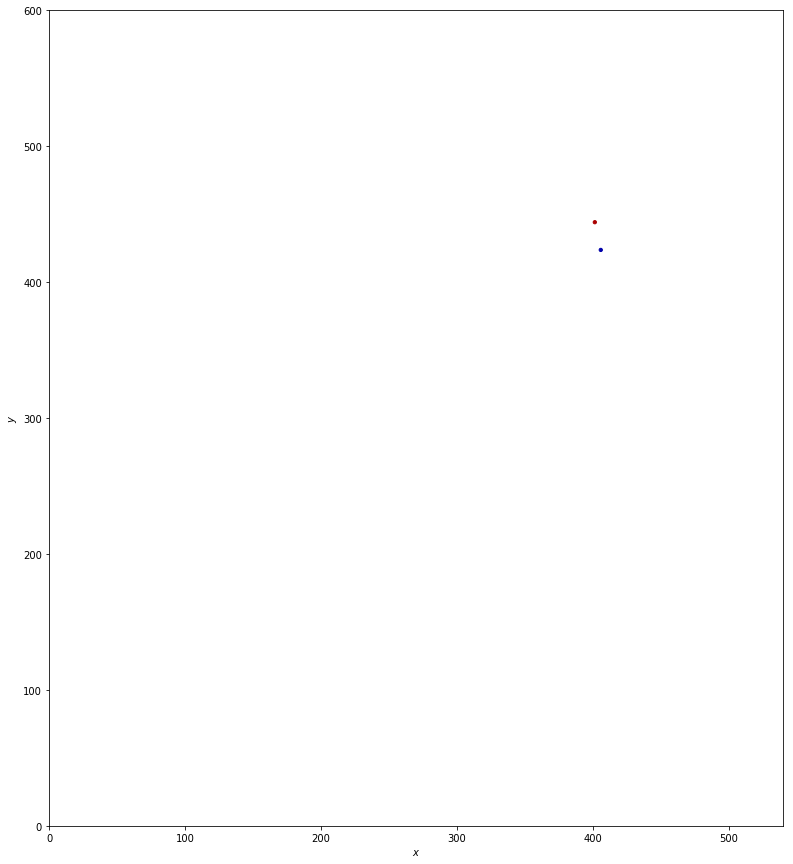

angle -74.8269593206
move (0.54243330880715457, -0.84009886650115295)
361.322050889 449.980749525
212
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (417.0894, 379.9204)


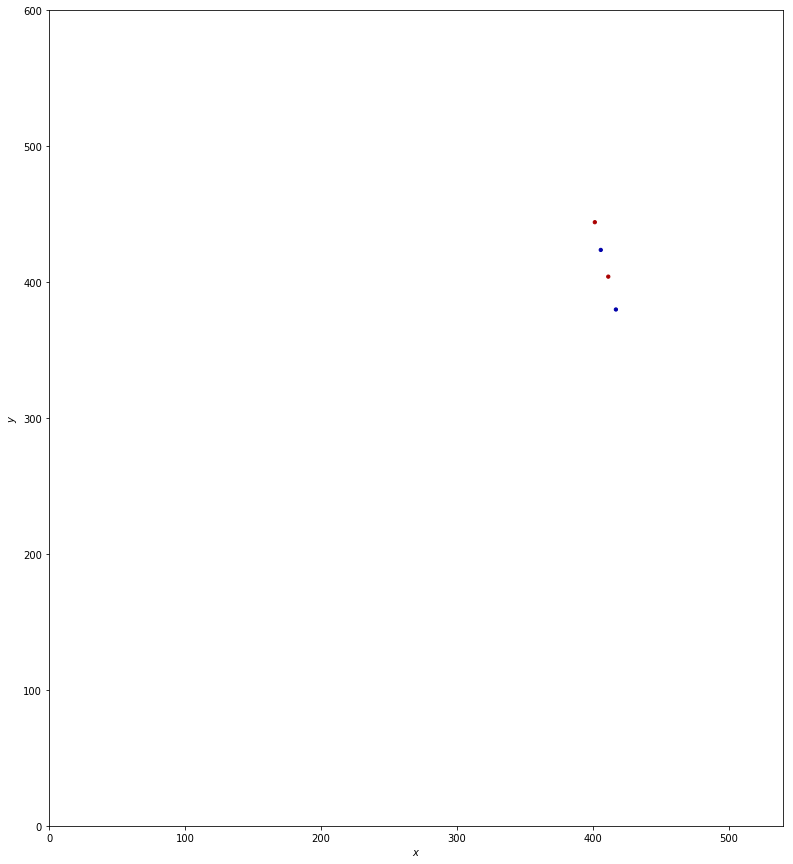

angle -57.1505611517
move (0.32980258976950416, -0.94404992017441969)
361.651853479 449.036699605
213
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)


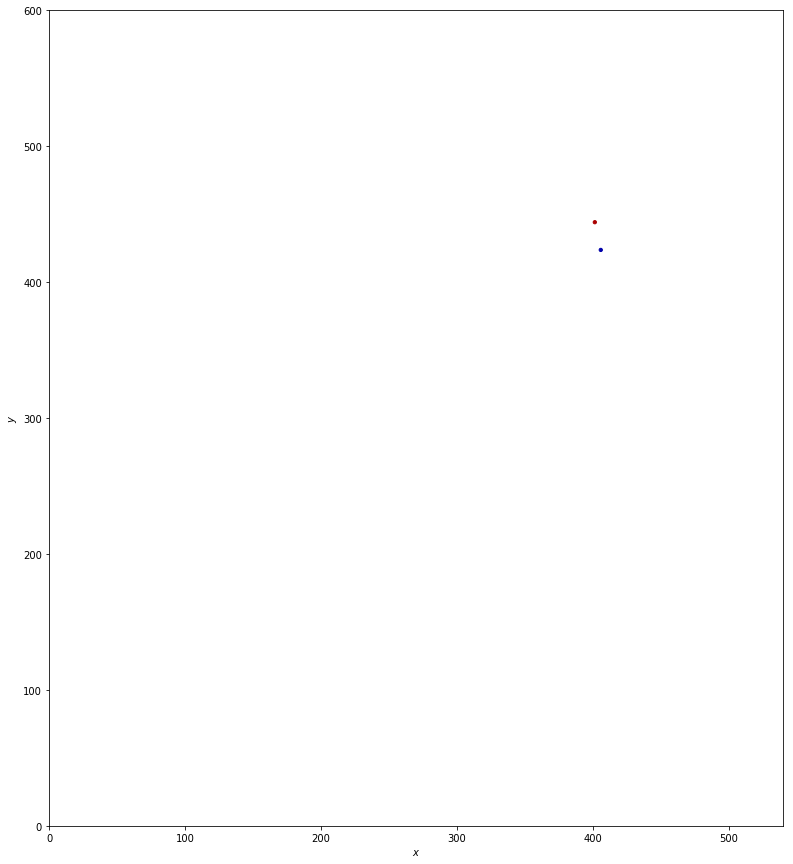

angle -70.7432060638
move (0.59478243758346305, -0.80388671586379246)
362.246635917 448.232812889
214
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (417.0894, 379.9204)


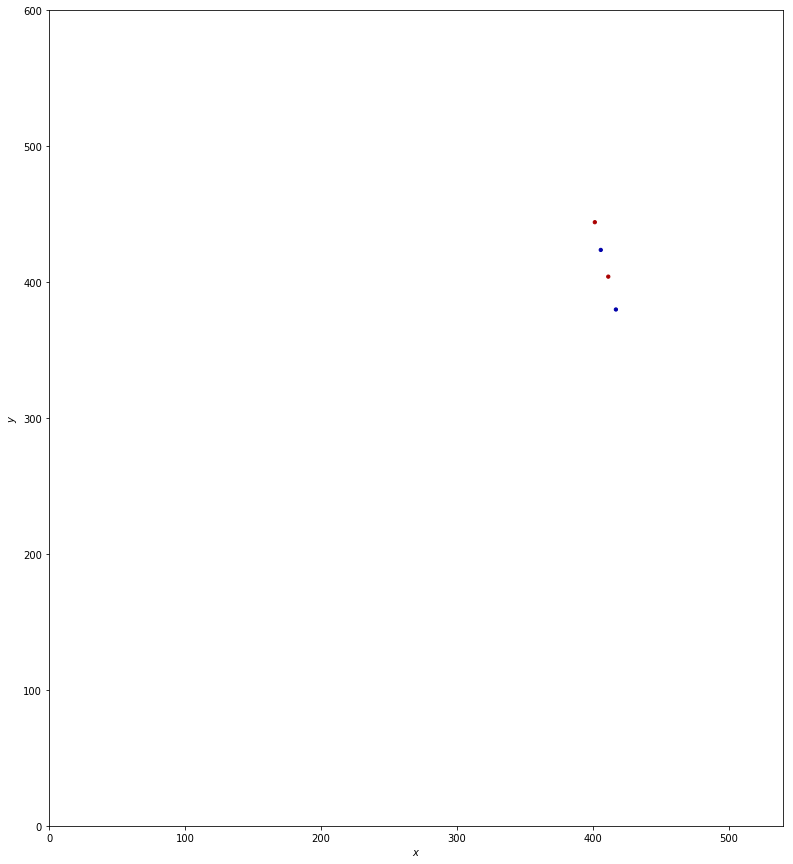

angle -53.5028758778
move (0.37965742005306224, -0.92512714985490108)
362.626293337 447.30768574
215
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)


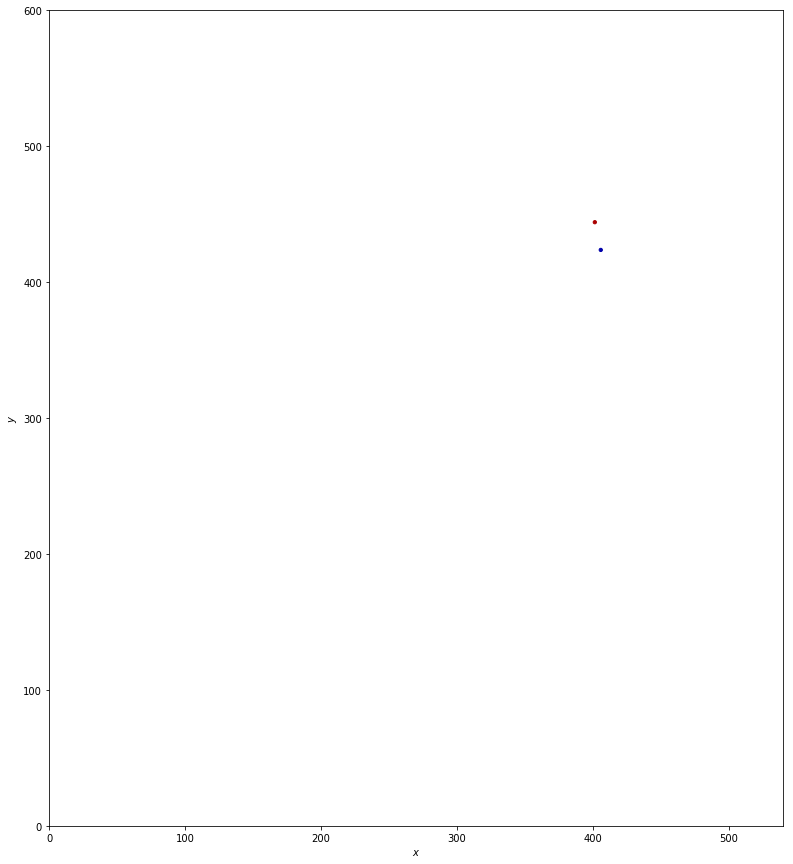

angle -67.6875359144
move (0.64502957331772992, -0.76415760779144726)
363.27132291 446.543528132
216
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (417.0894, 379.9204)


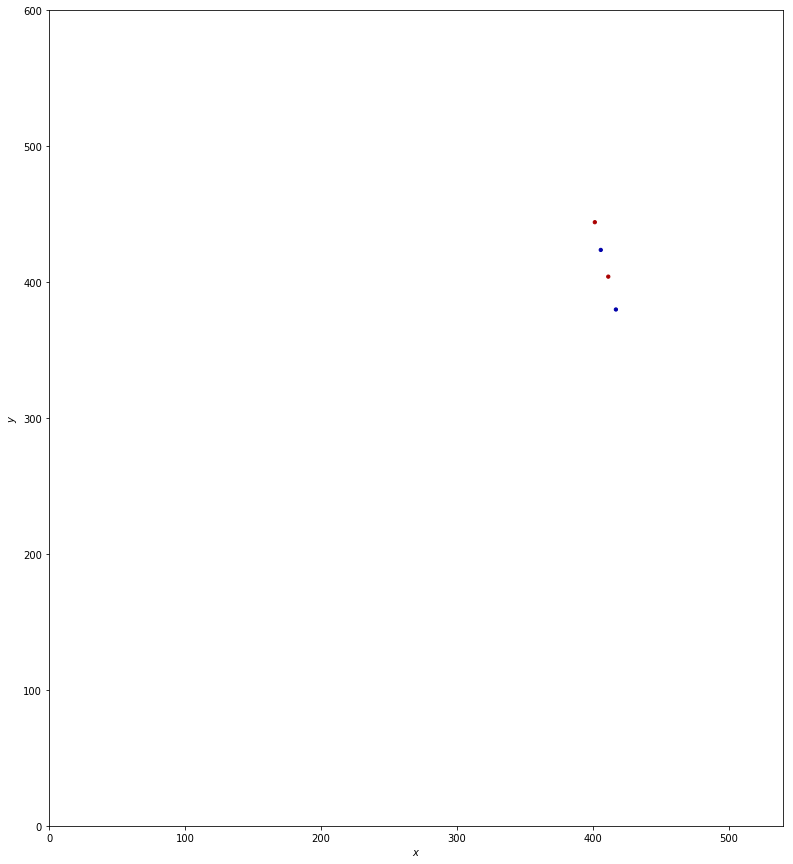

angle -49.8321071889
move (0.42898823705444034, -0.90331007548290043)
363.700311147 445.640218056
217
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (417.0894, 379.9204)
yes 1 (417.6894, 362.4898)


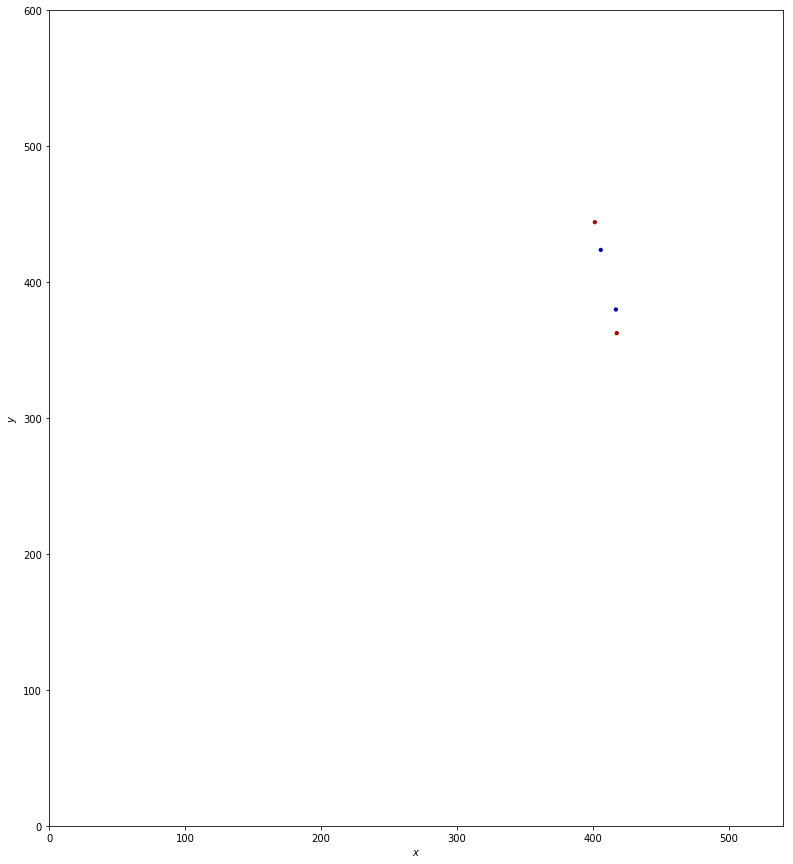

angle -64.5966317517
move (0.80193888994405416, -0.5974060736176845)
364.502250037 445.042811983
218
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (417.0894, 379.9204)


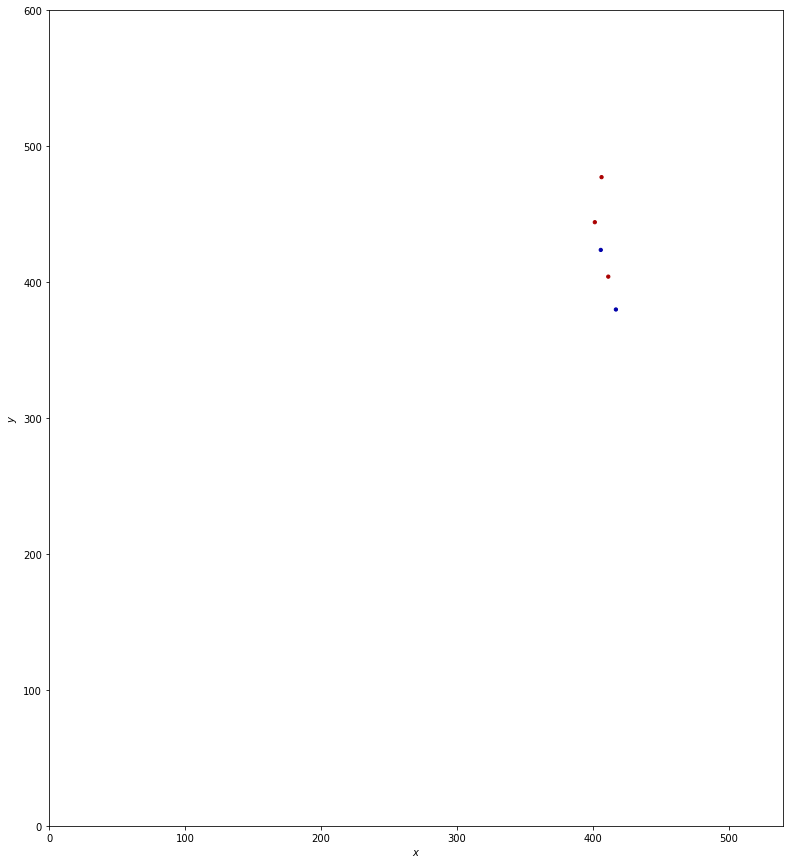

angle -36.6843463678
move (0.54797501700850271, -0.83649469856929237)
365.050225054 444.206317284
219
yes 1 (401.5797, 444.1501)
yes -1 (405.9587, 423.7502)
yes -1 (417.0894, 379.9204)
yes 1 (417.6894, 362.4898)


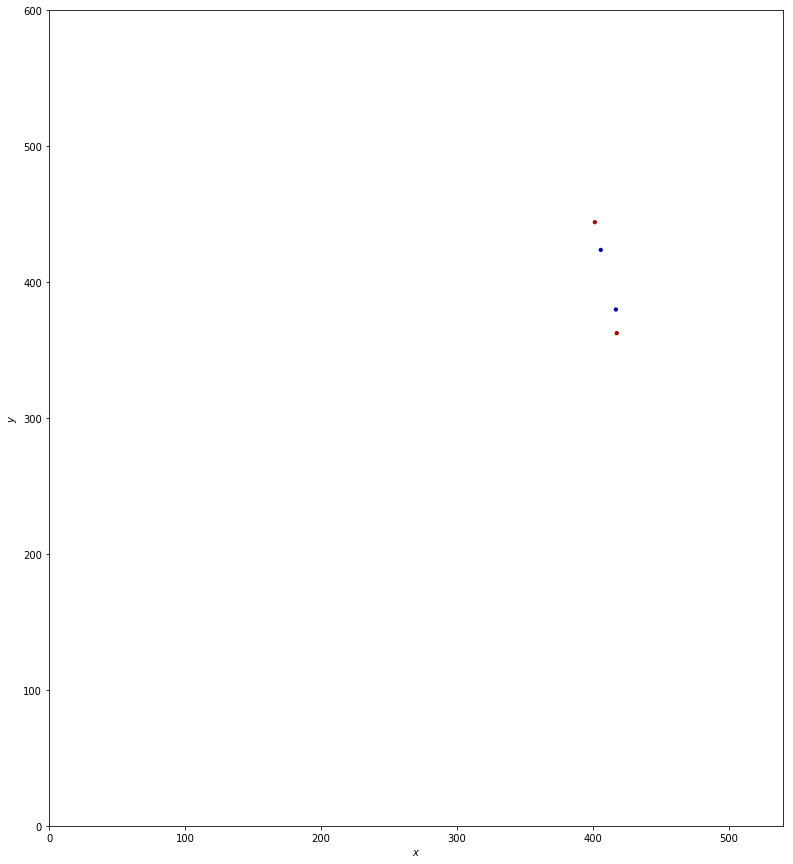

angle -56.7717987116
move (0.83142830190521355, -0.55563205342295818)
365.881653356 443.650685231
220
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


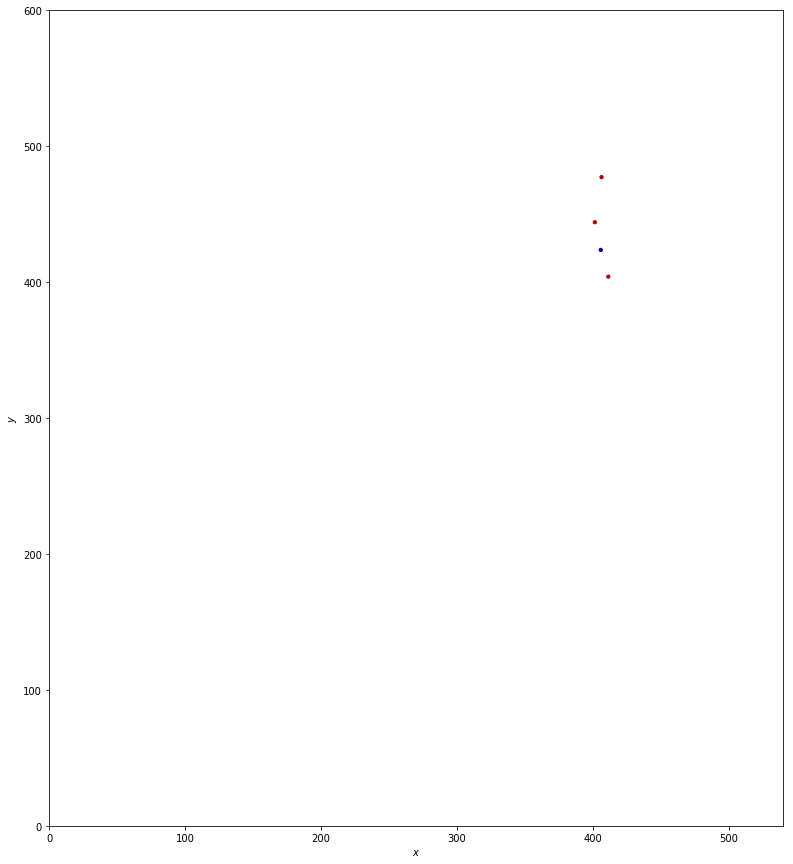

angle -33.754260091
move (0.31828289594168807, -0.94799577960609749)
366.199936252 442.702689451
221
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes 1 (417.6894, 362.4898)


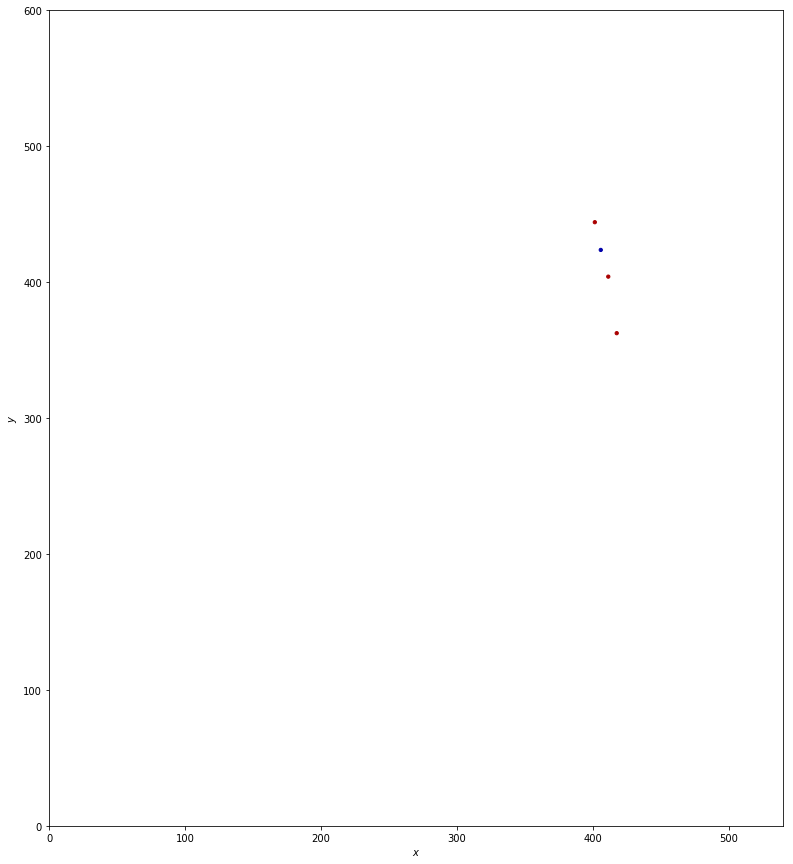

angle -71.4408865502
move (-0.25611096897322455, -0.9666473874022502)
365.943825283 441.736042064
222
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


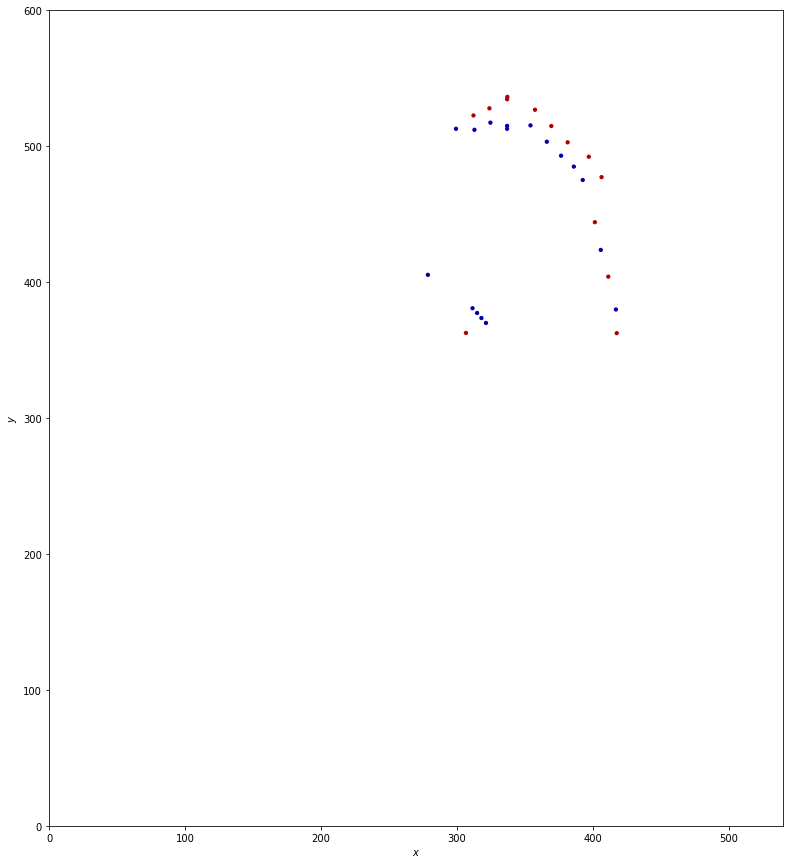

angle -104.839425249
move (0.00028479703935905019, -0.99999995944532238)
365.94411008 440.736042104
223
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


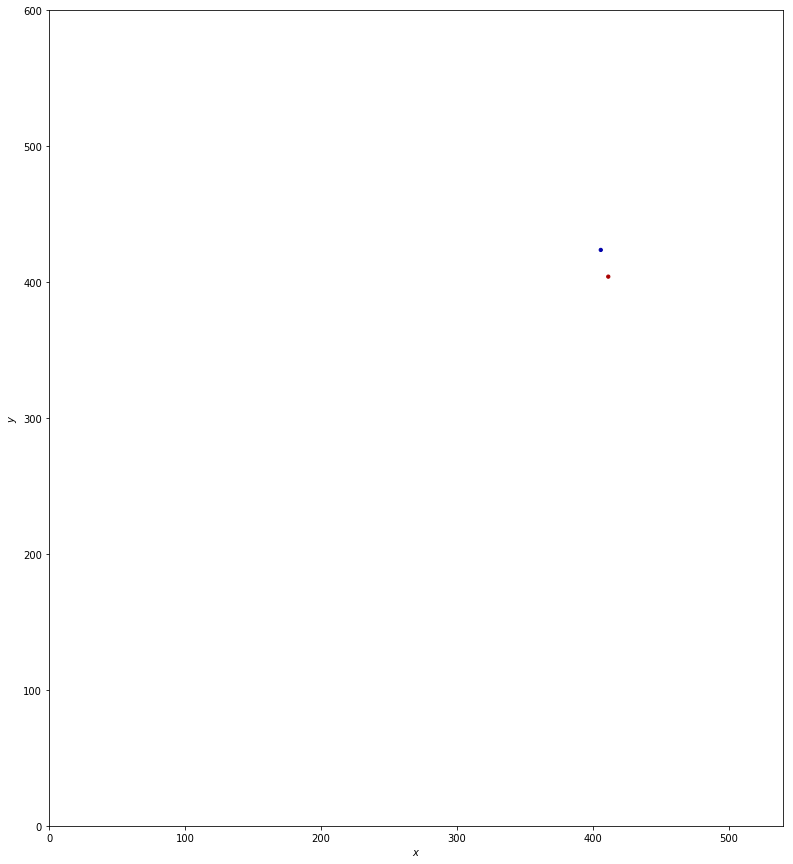

angle -89.9836823314
move (-0.12905863399238096, 0.99163696431305981)
365.815051446 441.727679069
224
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


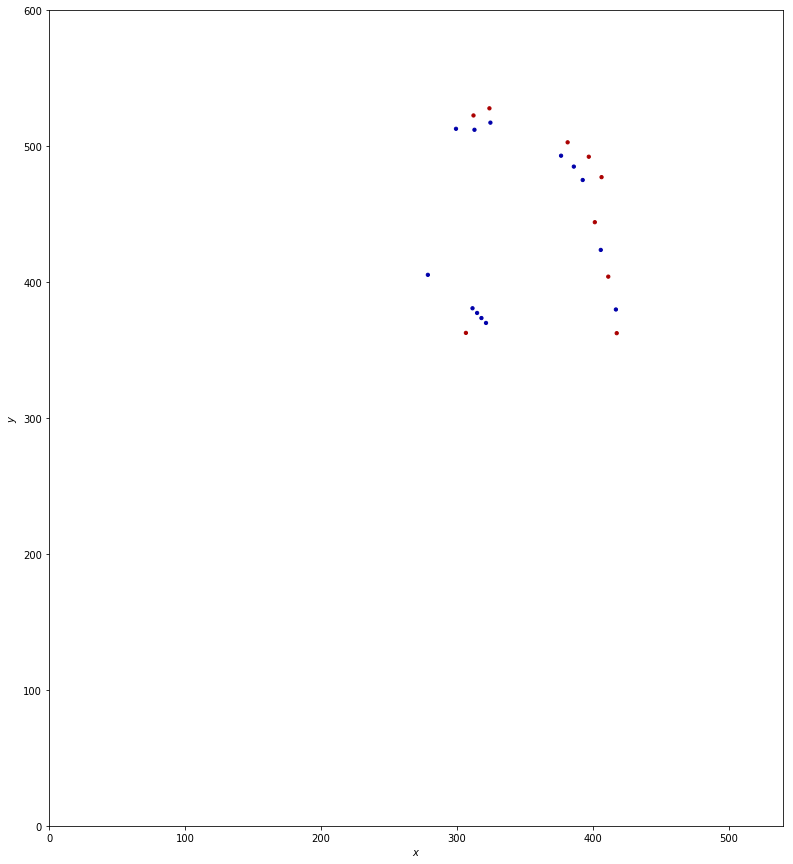

angle 97.4151977733
move (0.1733610153318369, -0.98485834431308683)
365.988412461 440.742820724
225
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


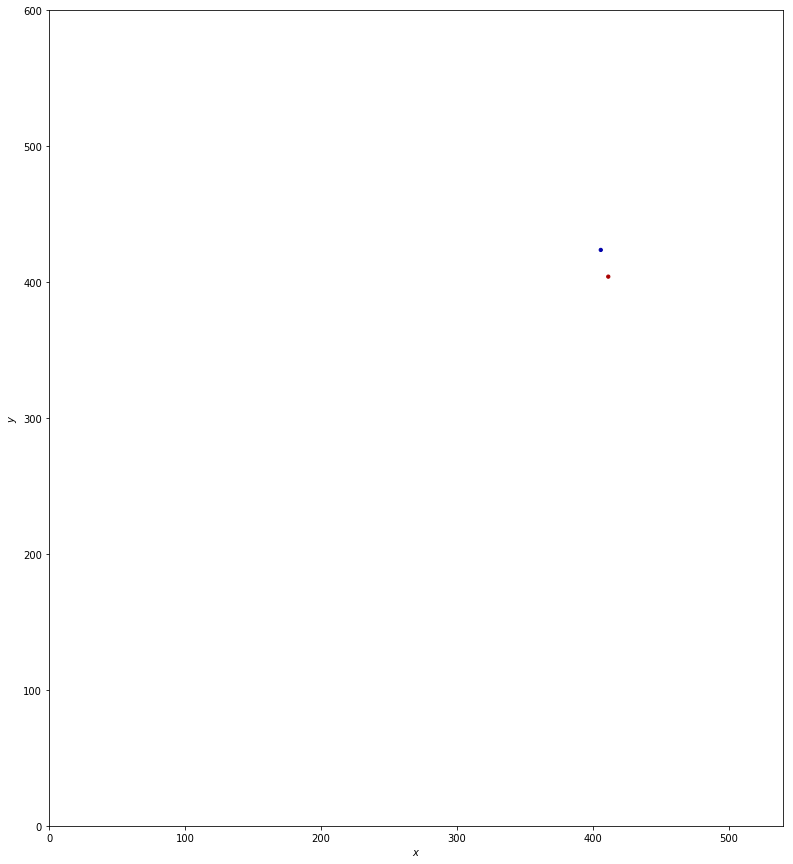

angle -80.0167065776
move (-0.12797748316263075, 0.99177707364274081)
365.860434978 441.734597798
226
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


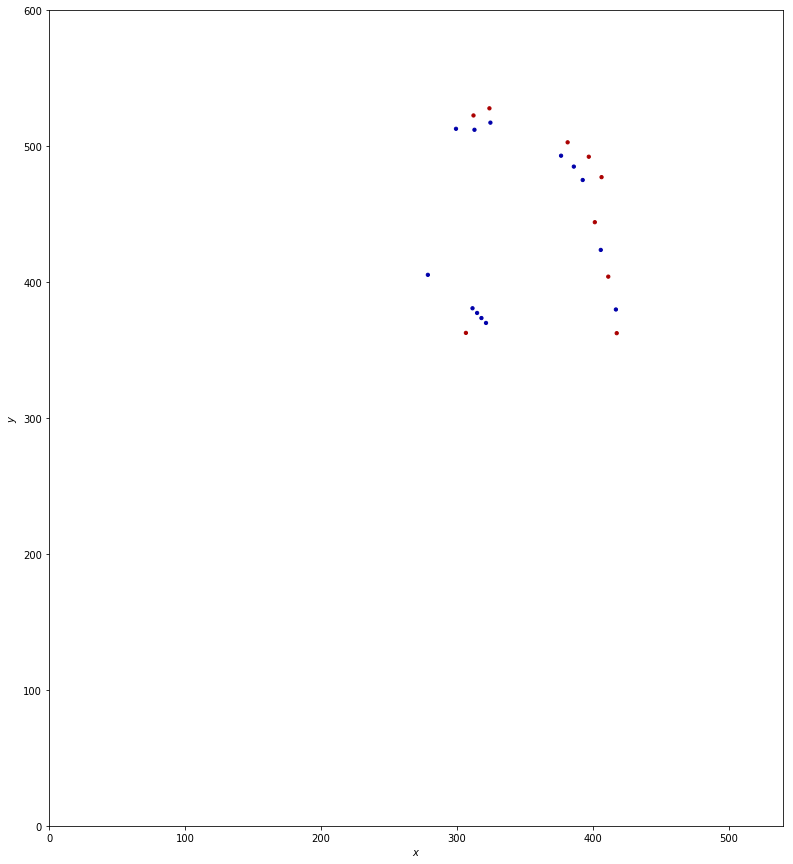

angle 97.3527343922
move (0.17273509759750602, -0.98496831728638867)
366.033170076 440.749629481
227
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


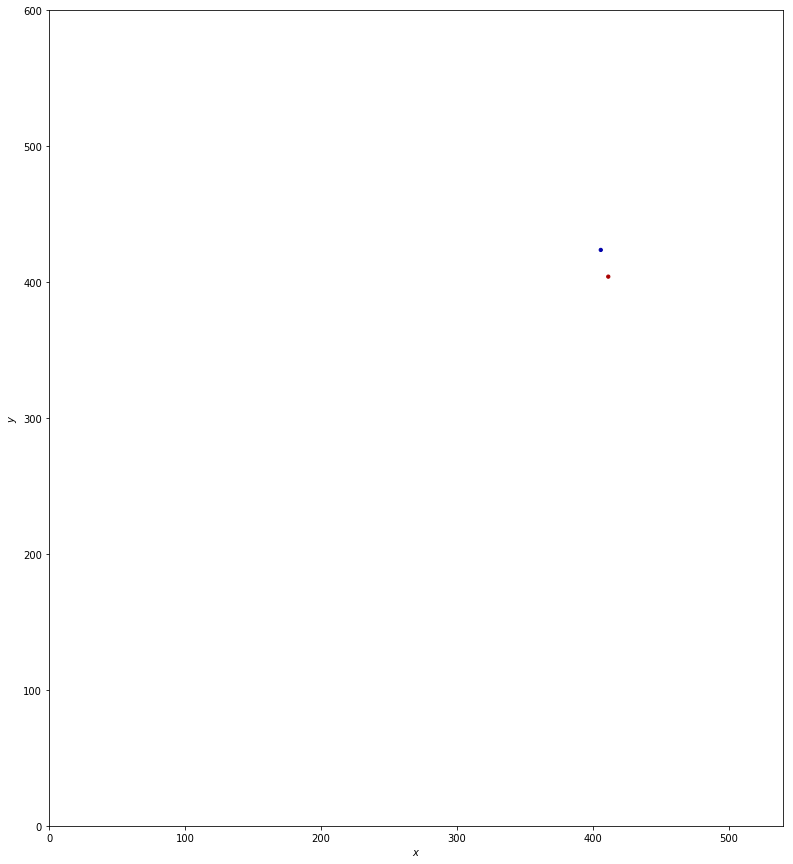

angle -80.0531183533
move (-0.12688498728581152, 0.99191743608098726)
365.906285089 441.741546917
228
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


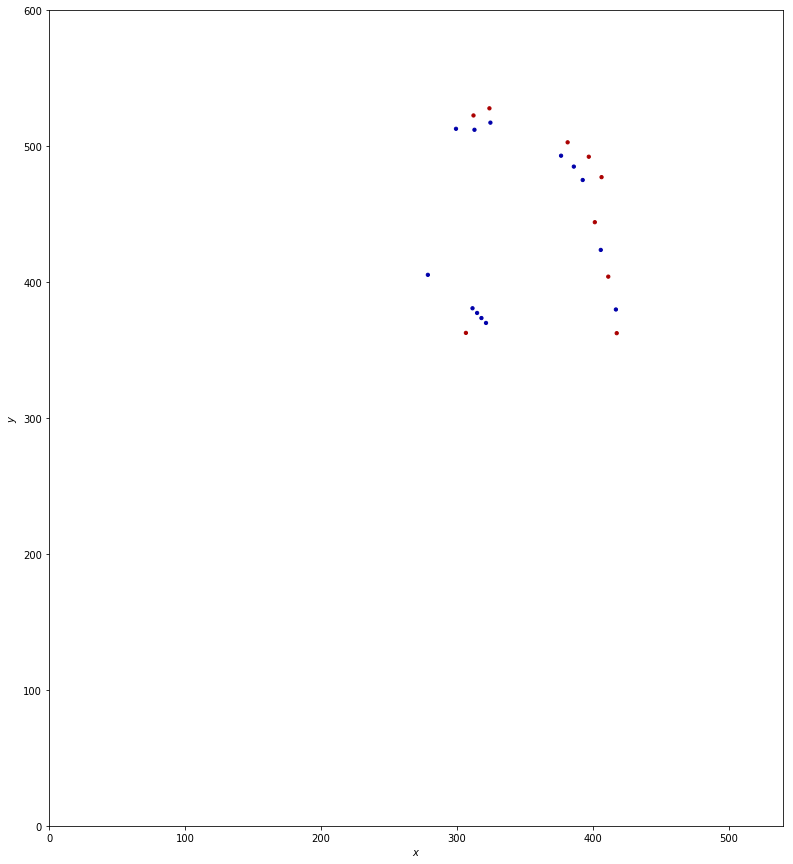

angle 97.2896244766
move (0.17210484177410246, -0.98507863819997188)
366.07838993 440.756468278
229
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


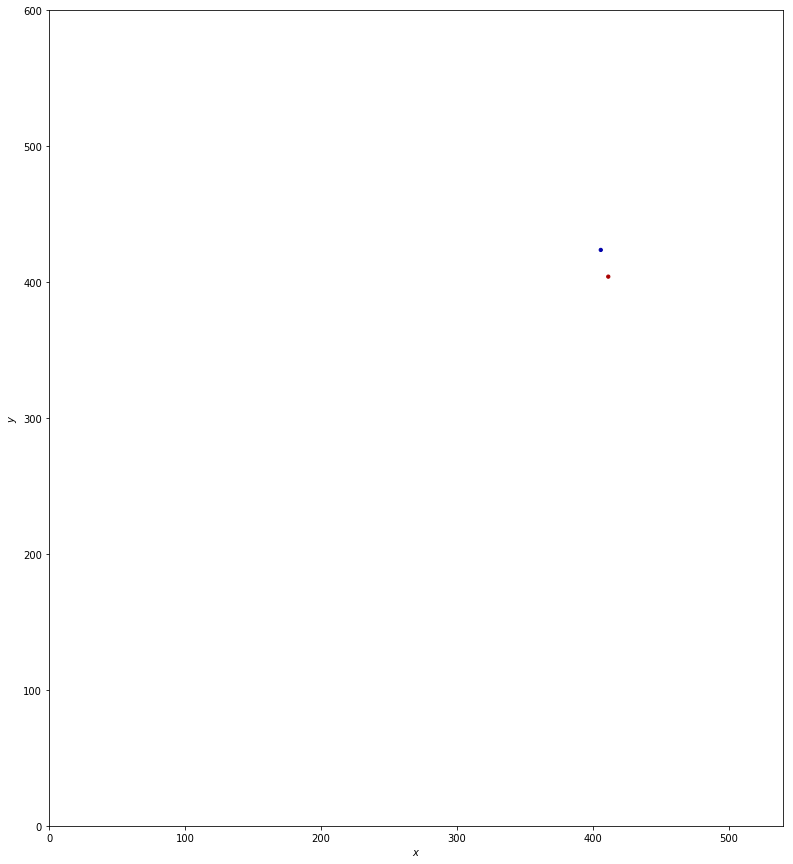

angle -80.0897783906
move (-0.12578096625800489, 0.99205803687445759)
365.952608964 441.748526315
230
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


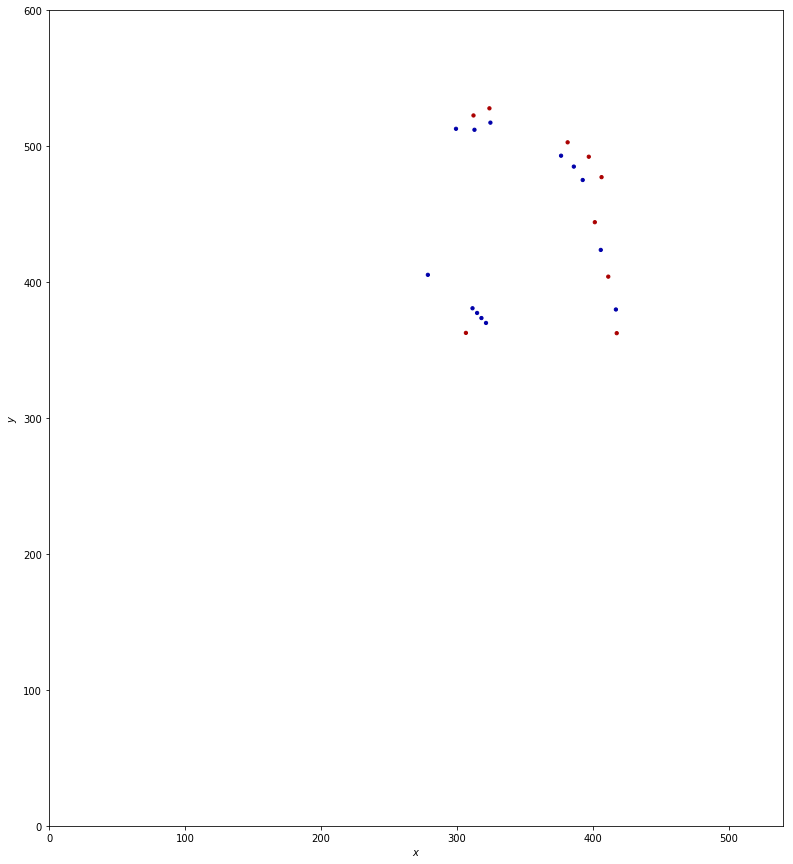

angle 97.2258578225
move (0.17147022514432525, -0.98518930256522497)
366.124079189 440.763337013
231
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


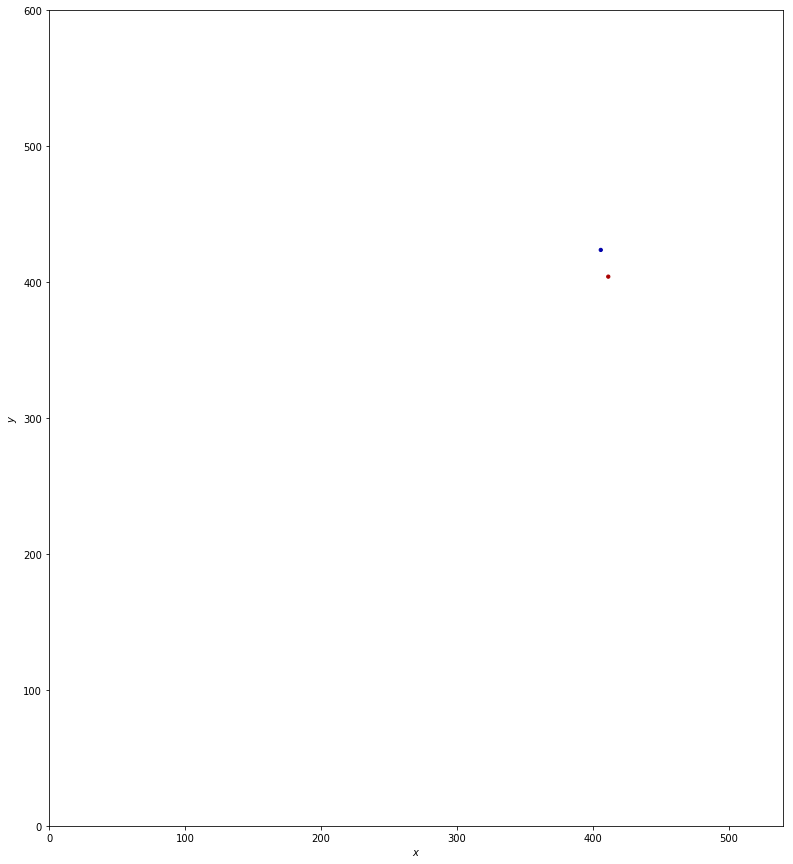

angle -80.1266879423
move (-0.12466523578410153, 0.99219886060552109)
365.999413953 441.755535873
232
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


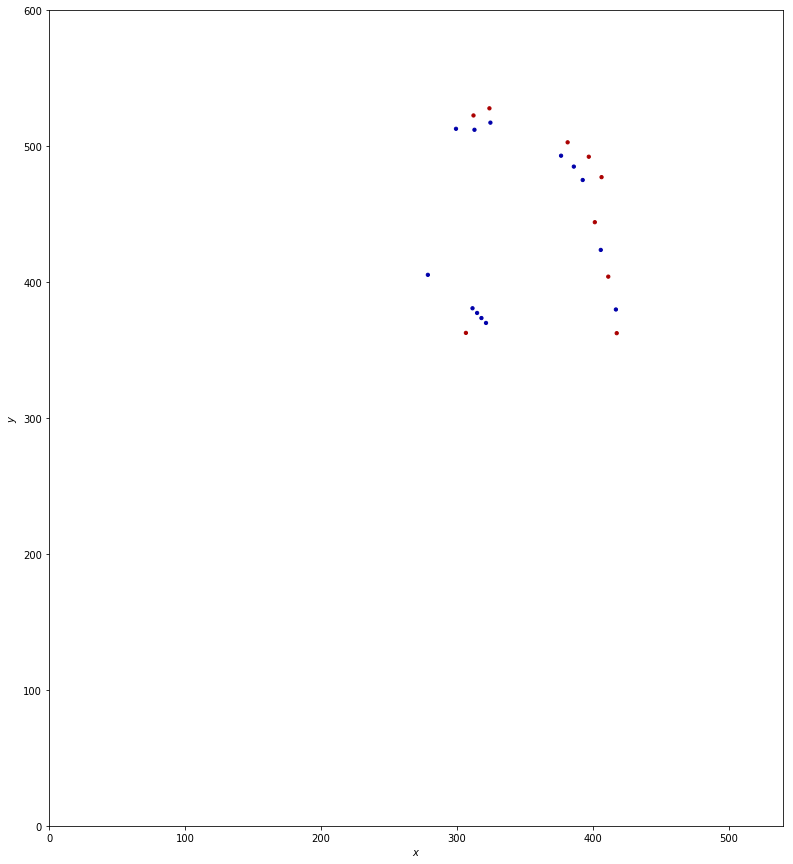

angle 97.1614239878
move (0.17083122549433855, -0.98530030569167204)
366.170245179 440.770235568
233
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


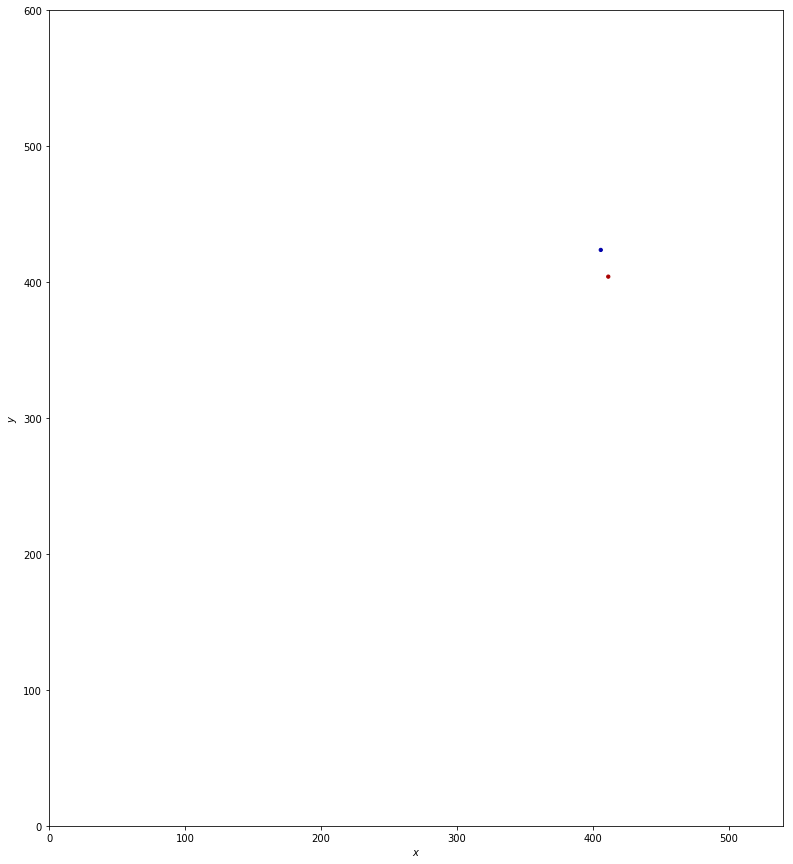

angle -80.1638482314
move (-0.12353760724798489, 0.99233989116403187)
366.046707572 441.762575459
234
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


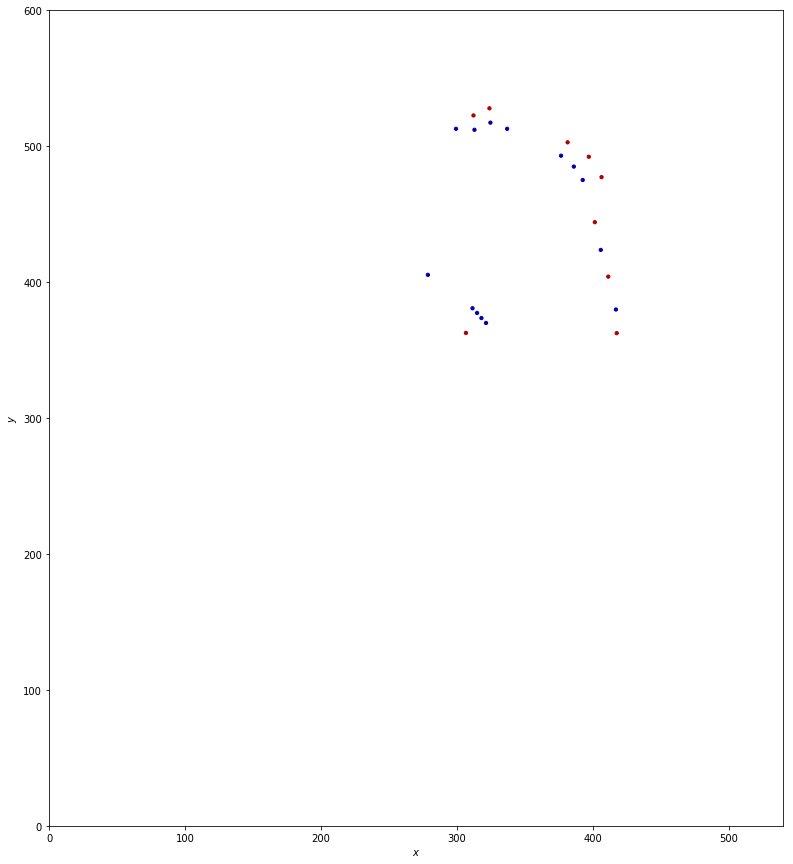

angle 97.0963122847
move (-0.026640903773306465, -0.99964506813475618)
366.020066668 440.762930391
235
yes 1 (357.5678, 526.9202)
yes 1 (337.0497, 534.6002)
yes 1 (337.1997, 536.4001)
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (354.2378, 515.3702)
yes -1 (337.0497, 515.0402)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (369.5678, 514.9202)
yes -1 (366.2378, 503.3702)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


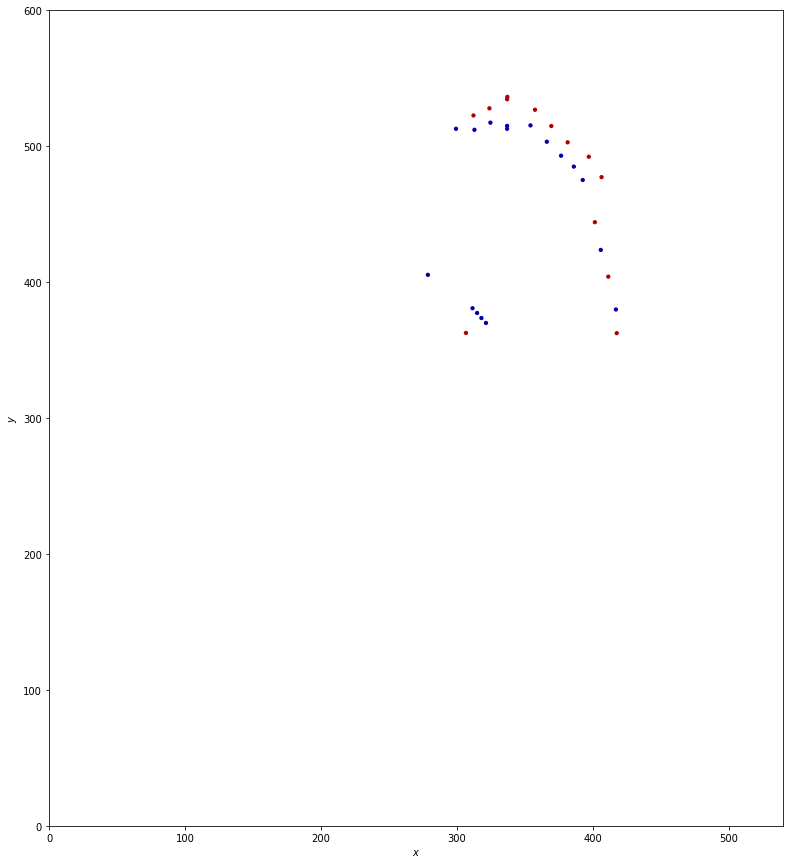

angle -91.5265919649
move (0.022602046593606231, -0.99974454111526934)
366.042668715 439.76318585
236
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


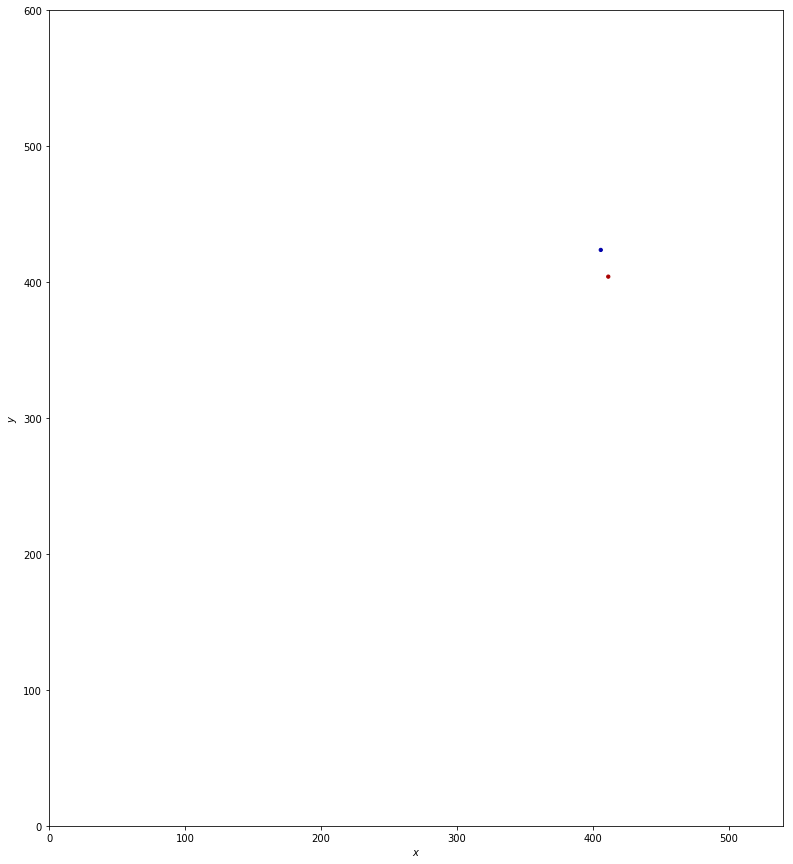

angle -88.7048878373
move (-0.16033110142566223, 0.98706328972140078)
365.882337613 440.750249139
237
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


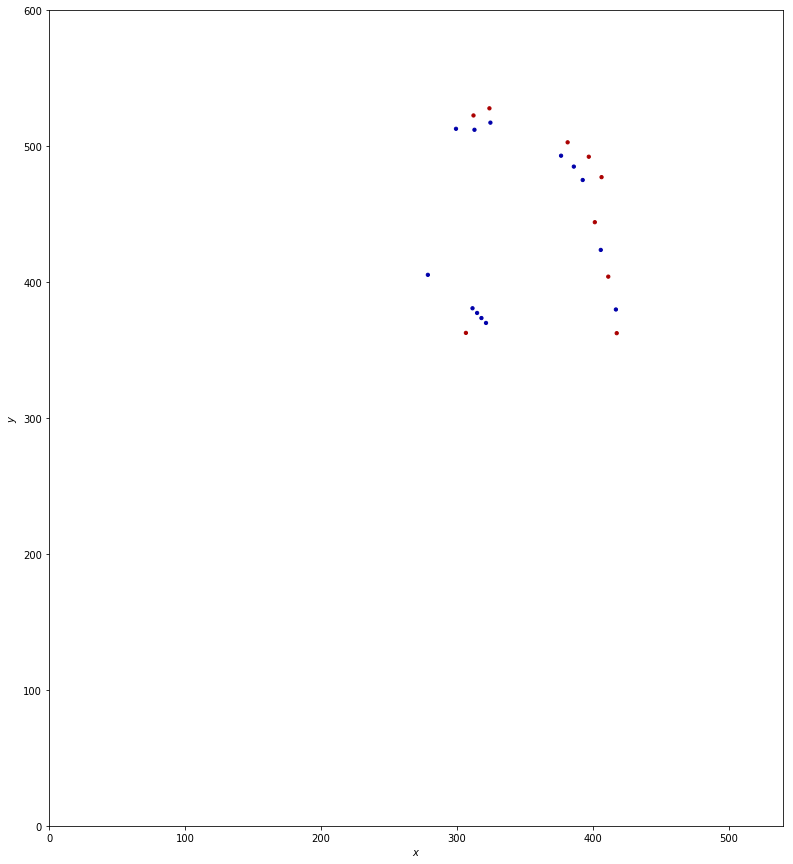

angle 99.2261150476
move (0.19108116584162452, -0.98157423970915492)
366.073418779 439.7686749
238
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


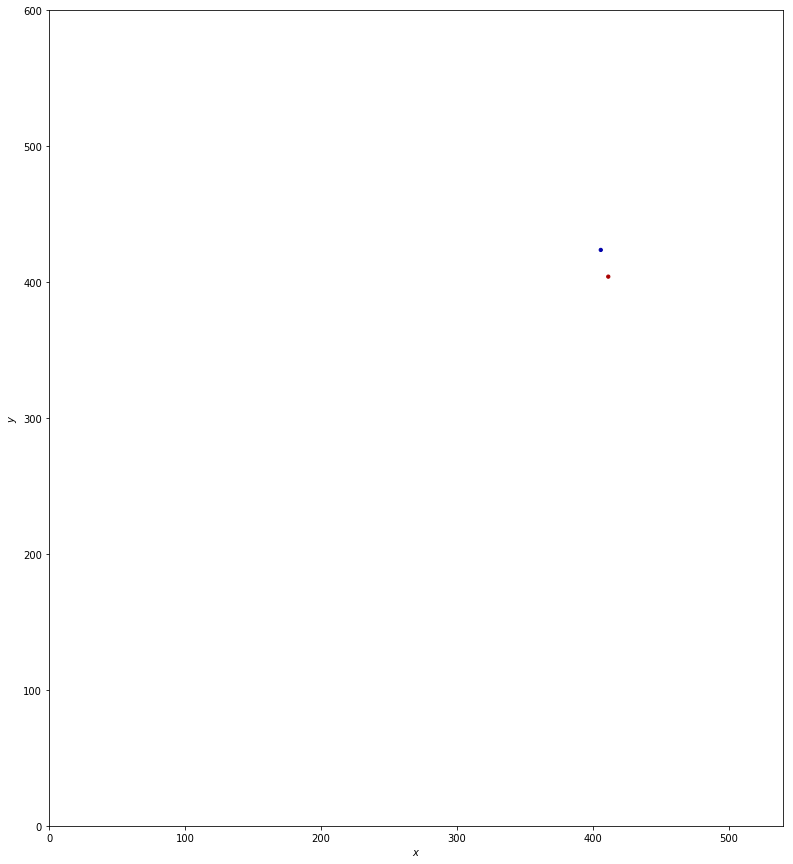

angle -78.9841134805
move (-0.1595631937802082, 0.98718771628837632)
365.913855585 440.755862616
239
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


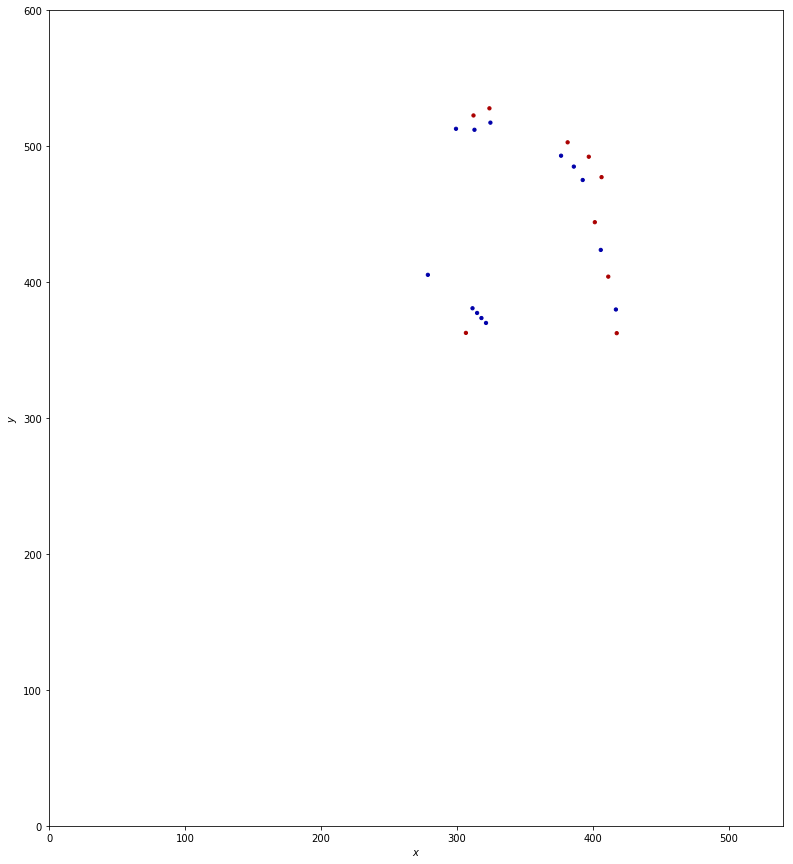

angle 99.1815433444
move (0.19066719448415576, -0.9816547361203638)
366.10452278 439.77420788
240
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


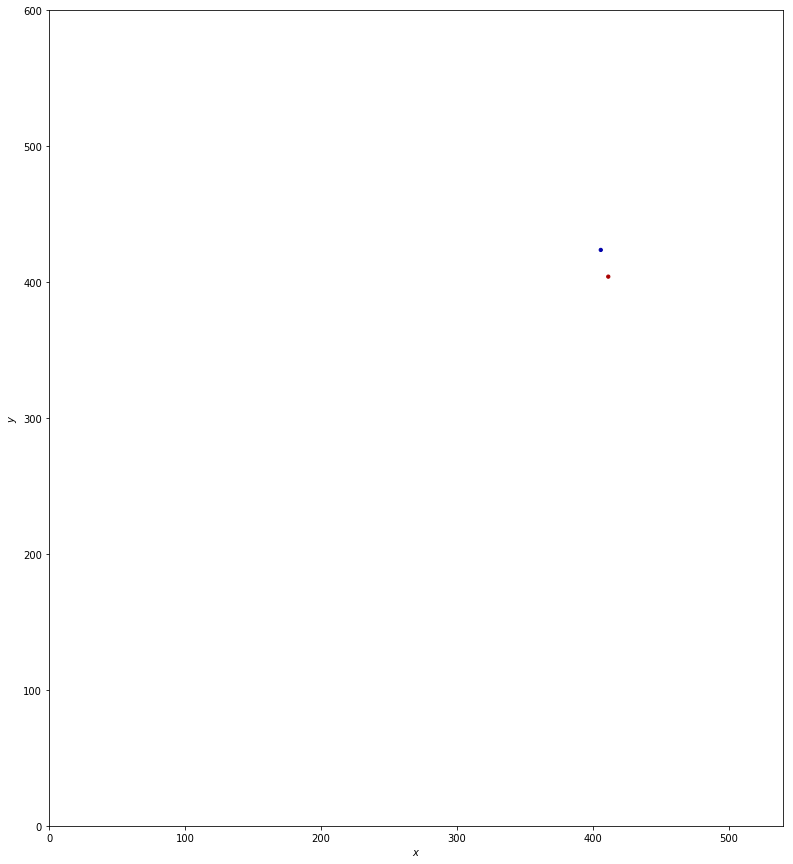

angle -79.008276542
move (-0.15878630841931271, 0.98731297381254279)
365.945736471 440.761520854
241
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


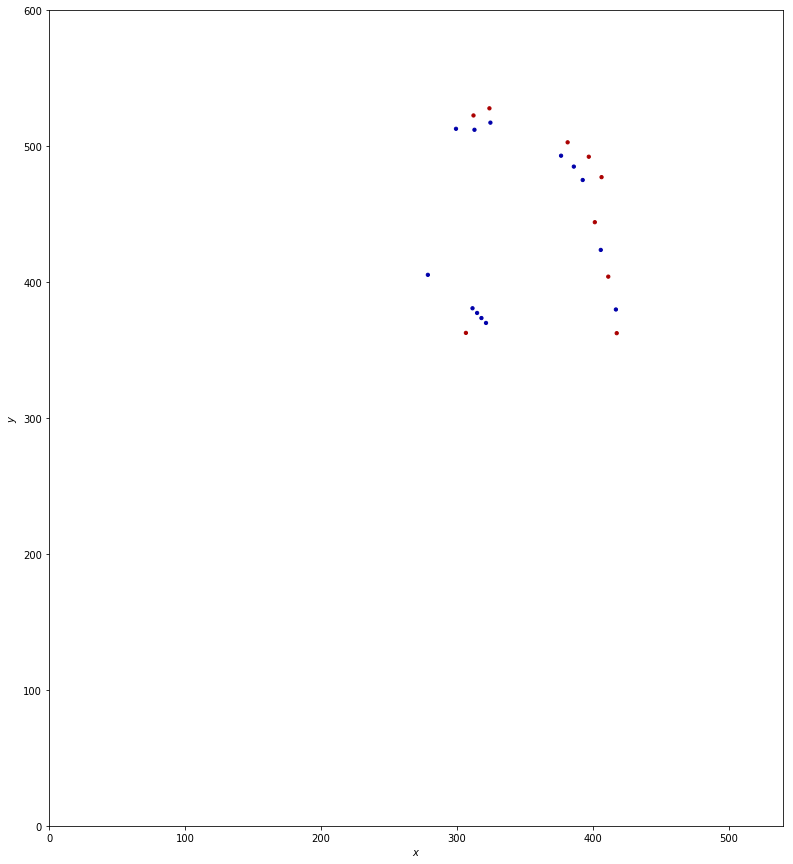

angle 99.1364562494
move (0.19024944389464238, -0.9817357837513)
366.135985915 439.77978507
242
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


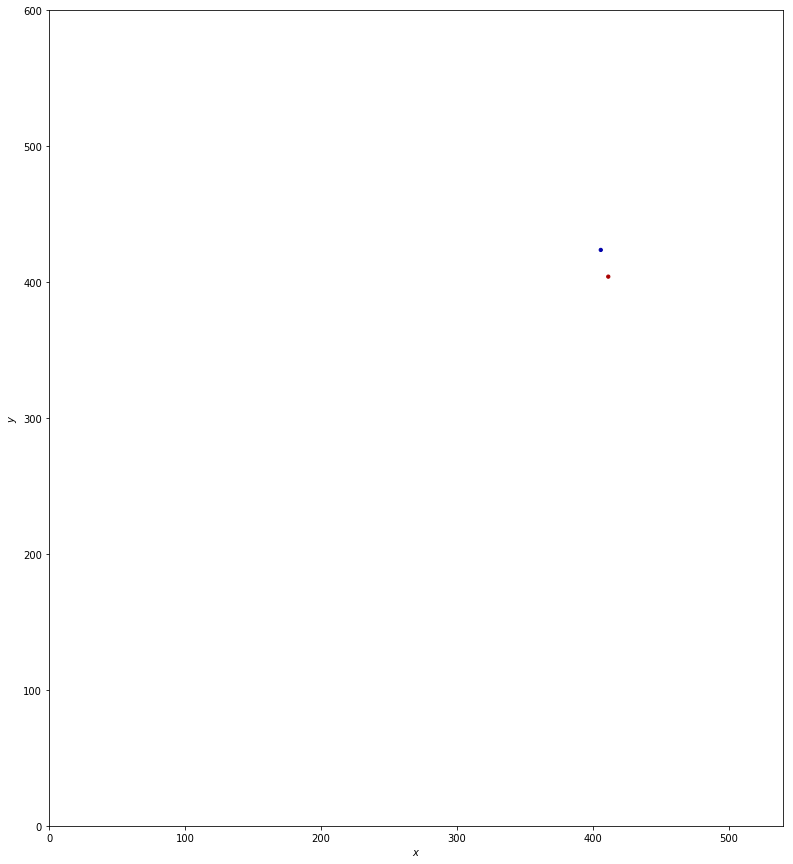

angle -79.032658187
move (-0.15800031010095381, 0.987439062427653)
365.977985605 440.767224132
243
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


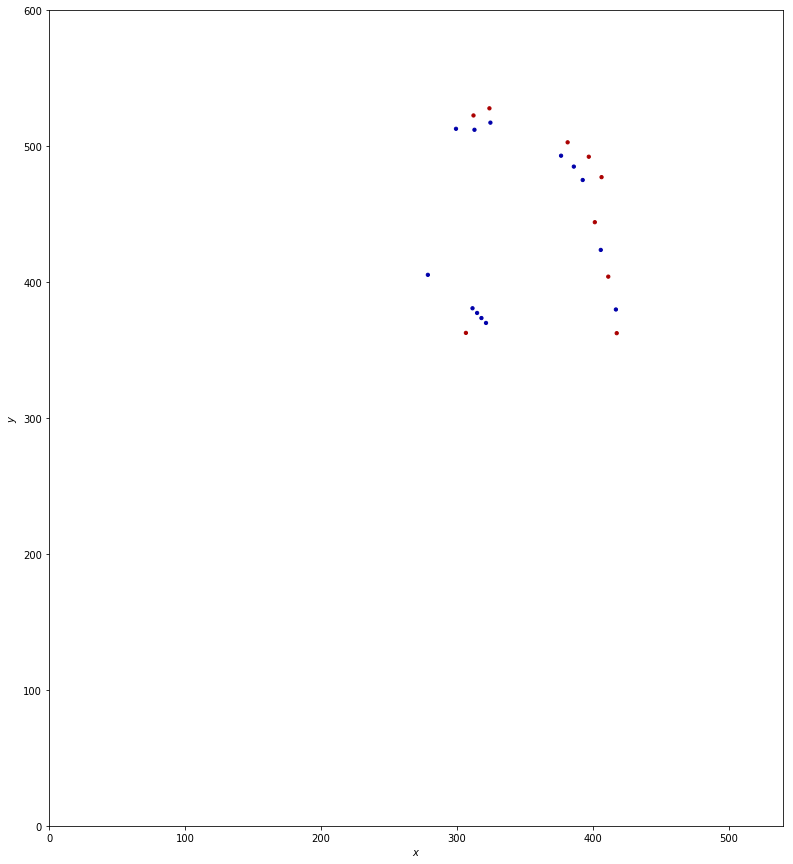

angle 99.0908460836
move (0.18982788199909009, -0.98181738384270811)
366.167813487 439.785406748
244
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


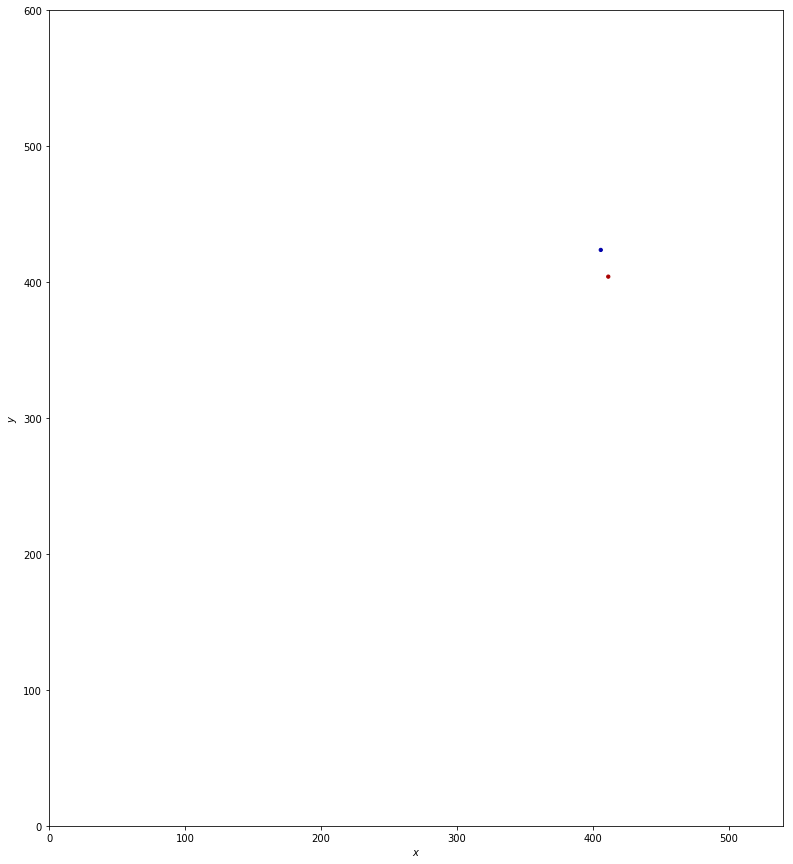

angle -79.0572602375
move (-0.15720506081129695, 0.98756598202617152)
366.010608426 440.77297273
245
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


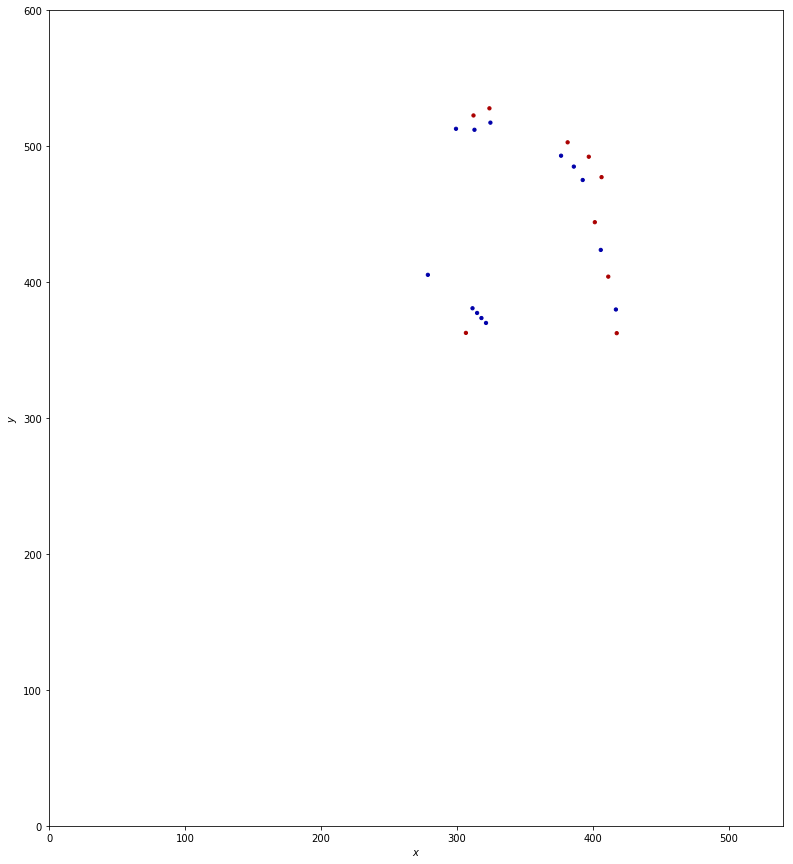

angle 99.044705011
move (0.18940247666575136, -0.98189953754591386)
366.200010903 439.791073193
246
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


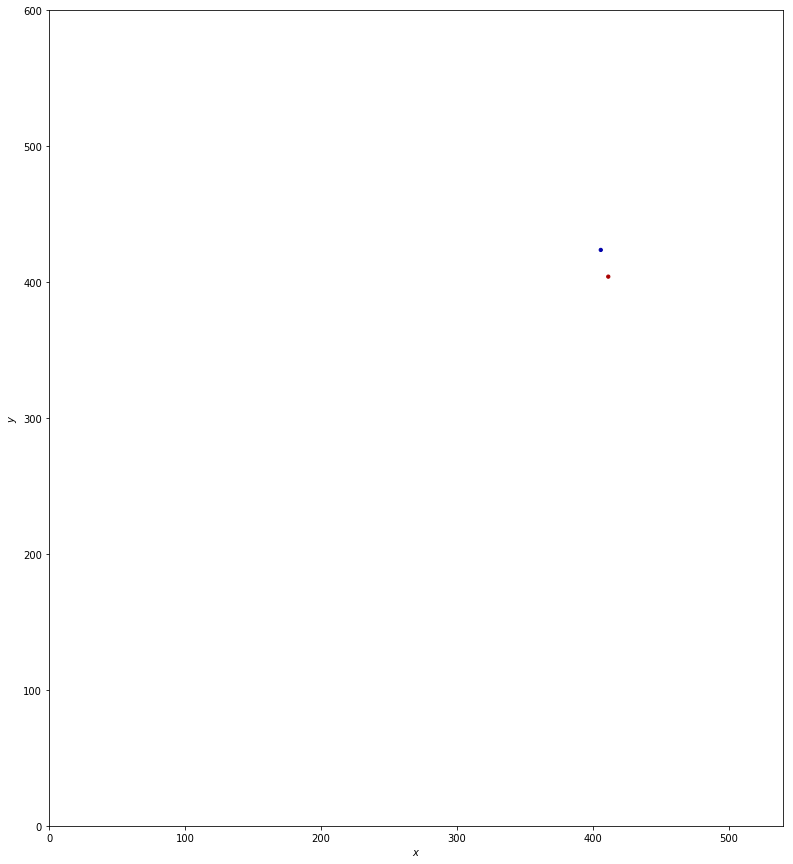

angle -79.0820845179
move (-0.15640041968919938, 0.98769373224752333)
366.043610483 440.778766925
247
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


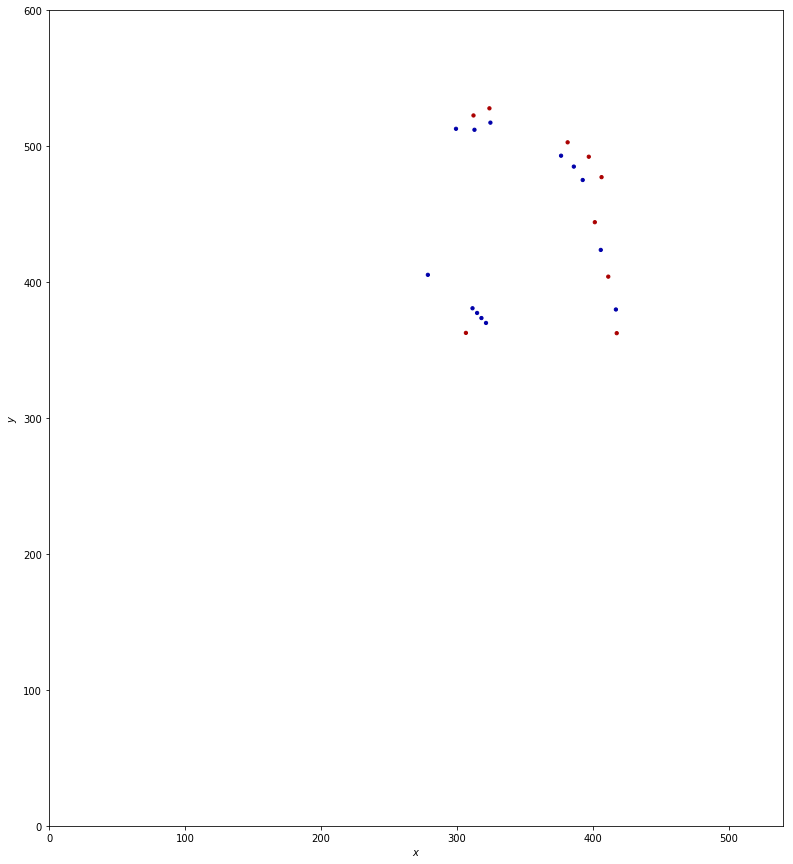

angle 98.9980250353
move (0.18897319571914145, -0.98198224591878192)
366.232583679 439.796784679
248
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


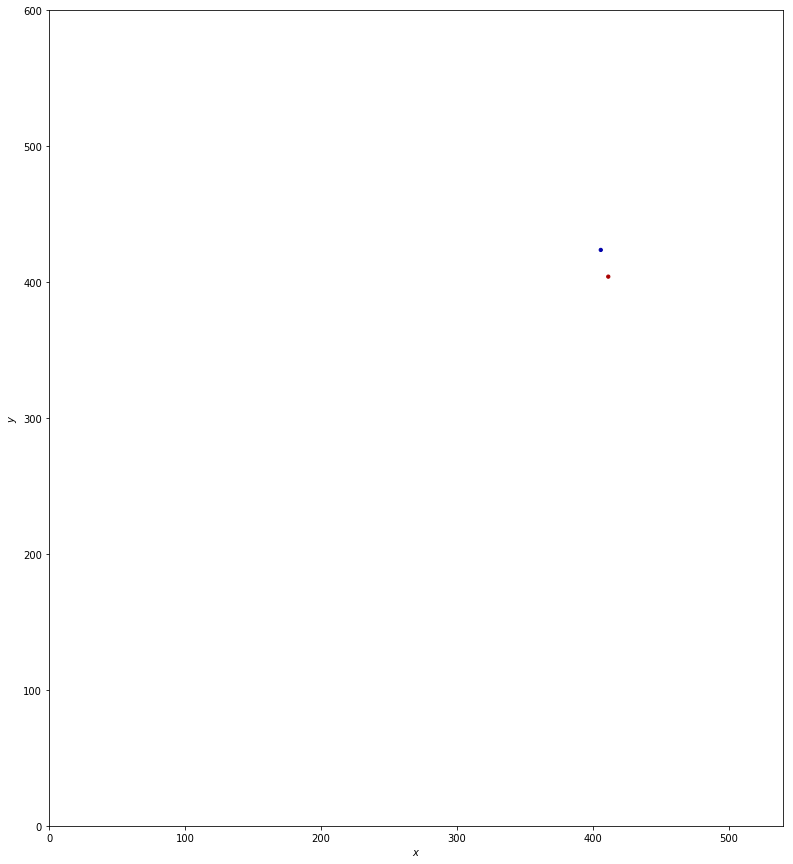

angle -79.1071328546
move (-0.15558624294814774, 0.98782231246579966)
366.076997436 440.784606992
249
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


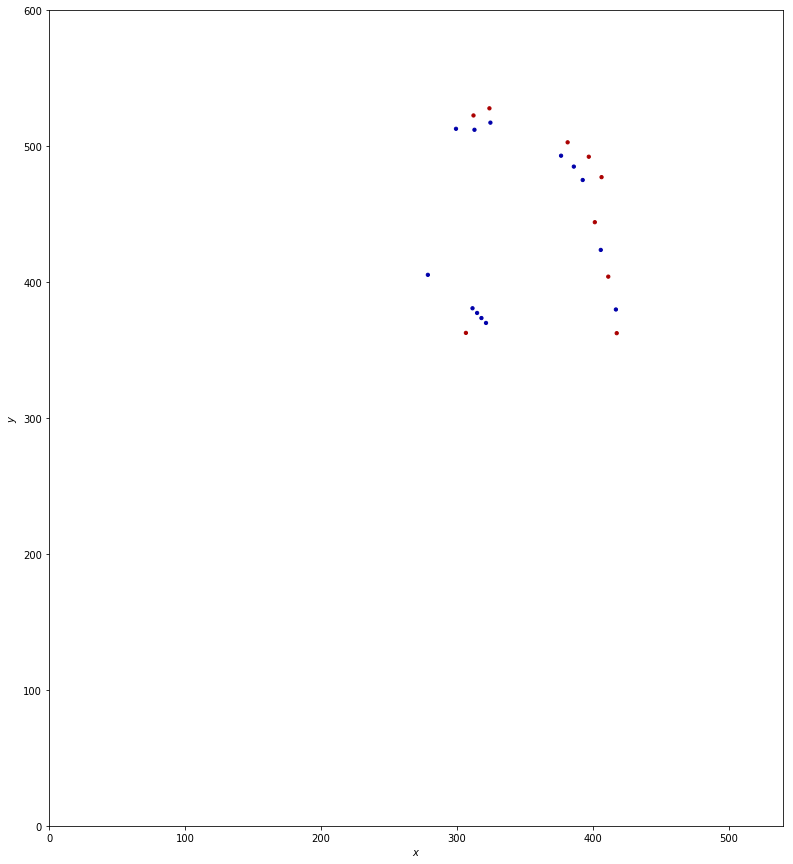

angle 98.9507979945
move (0.1885400069550133, -0.98206550992151409)
366.265537443 439.802541482
250
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


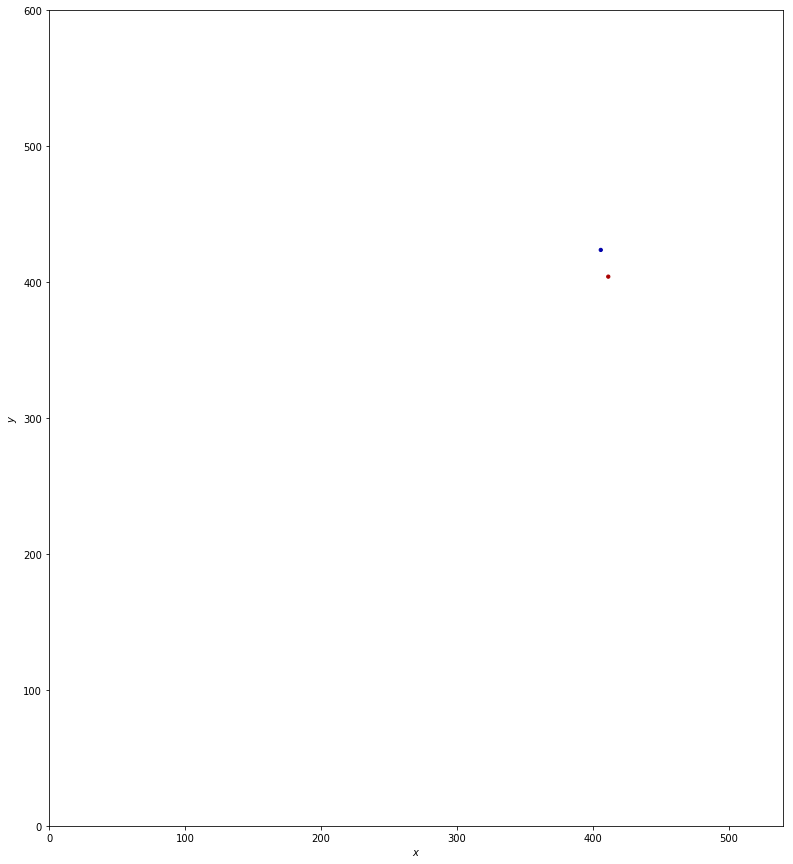

angle -79.1324070746
move (-0.15476238379550006, 0.9879517217768965)
366.110775059 440.790493204
251
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


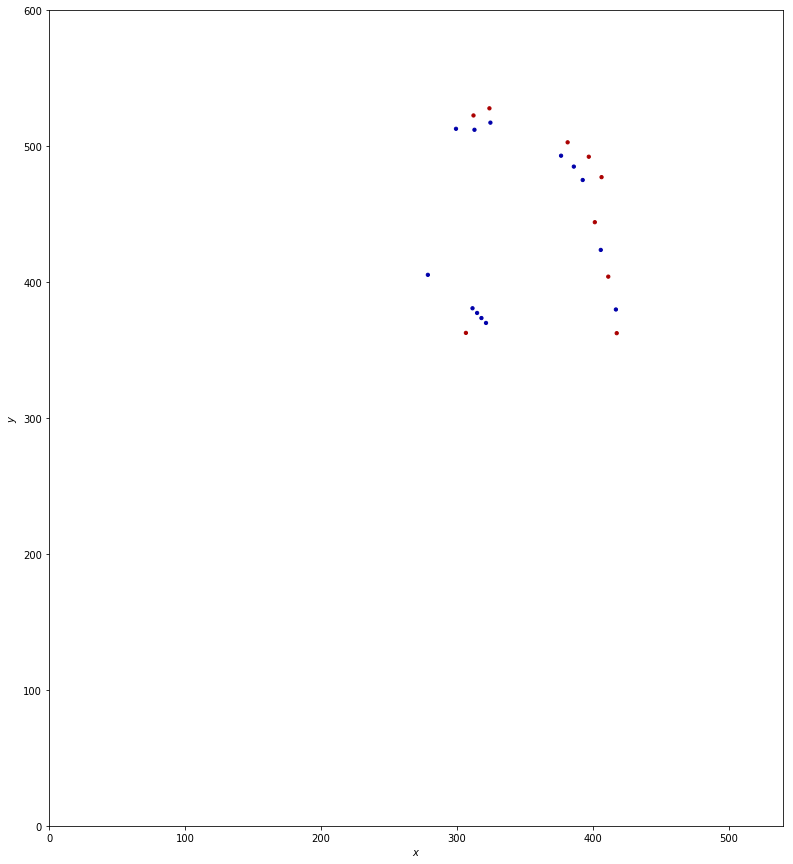

angle 98.9030155571
move (0.18810287815633742, -0.98214933041228614)
366.298877937 439.808343873
252
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


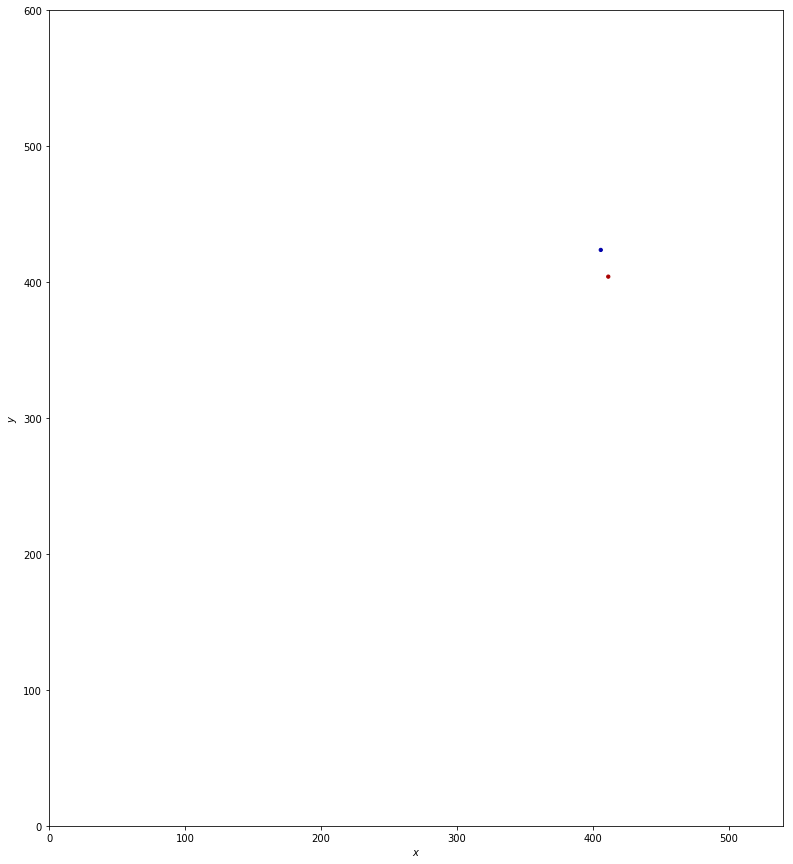

angle -79.1579090048
move (-0.15392869234894266, 0.98808195898505535)
366.144949245 440.796425832
253
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


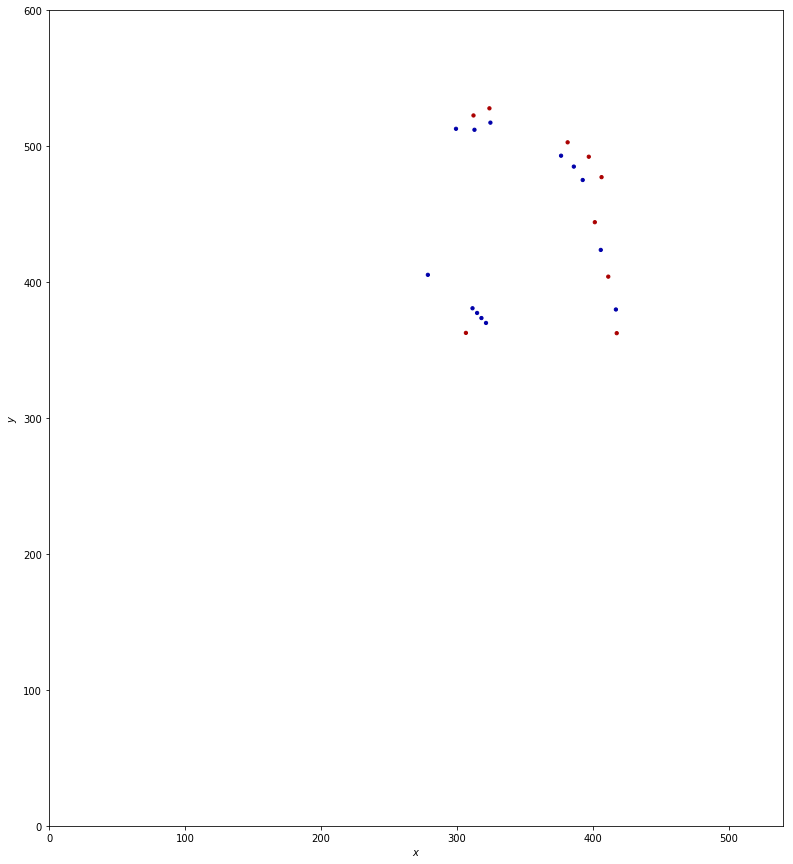

angle 98.8546692167
move (0.18766177711035498, -0.9822337081427126)
366.332611022 439.814192124
254
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


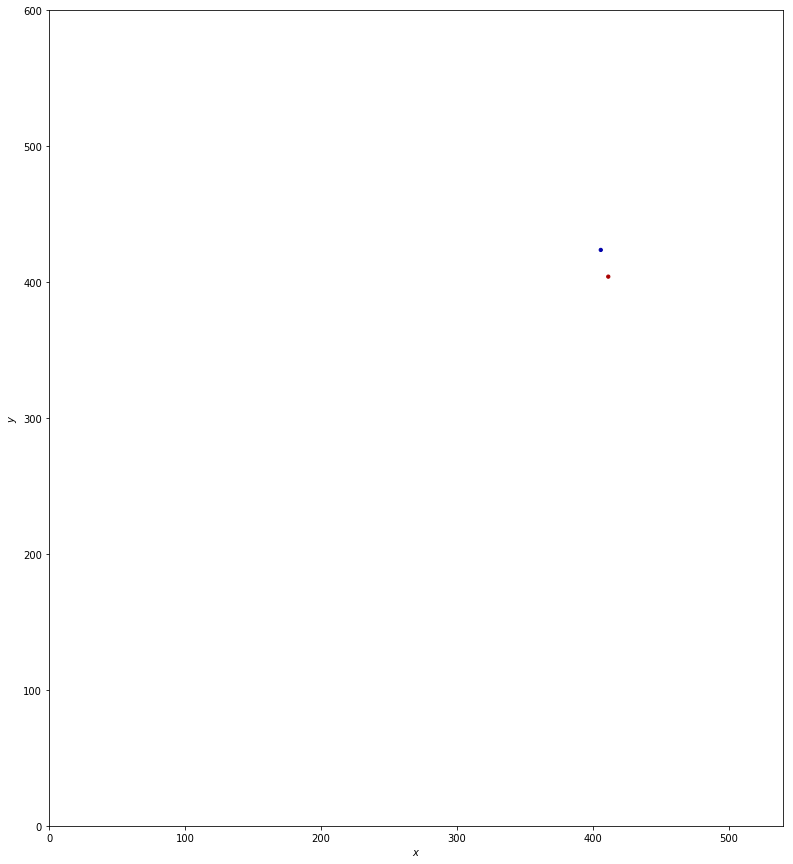

angle -79.1836404709
move (-0.15308501555001716, 0.98821302258877919)
366.179526006 440.802405147
255
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


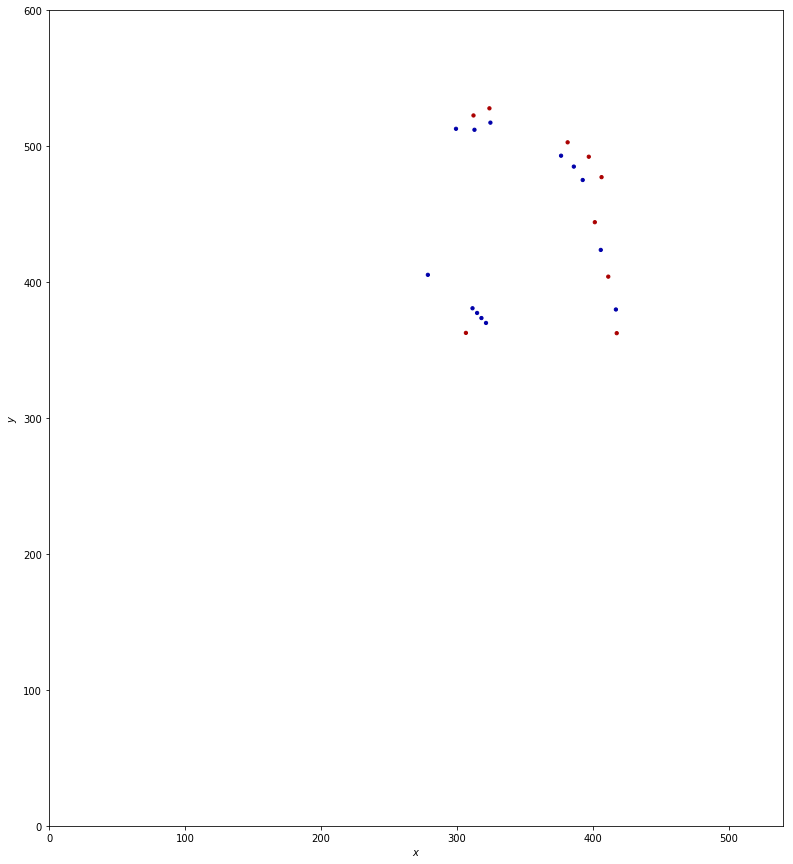

angle 98.8057502877
move (0.18721667162675637, -0.98231864375313538)
366.366742678 439.820086503
256
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


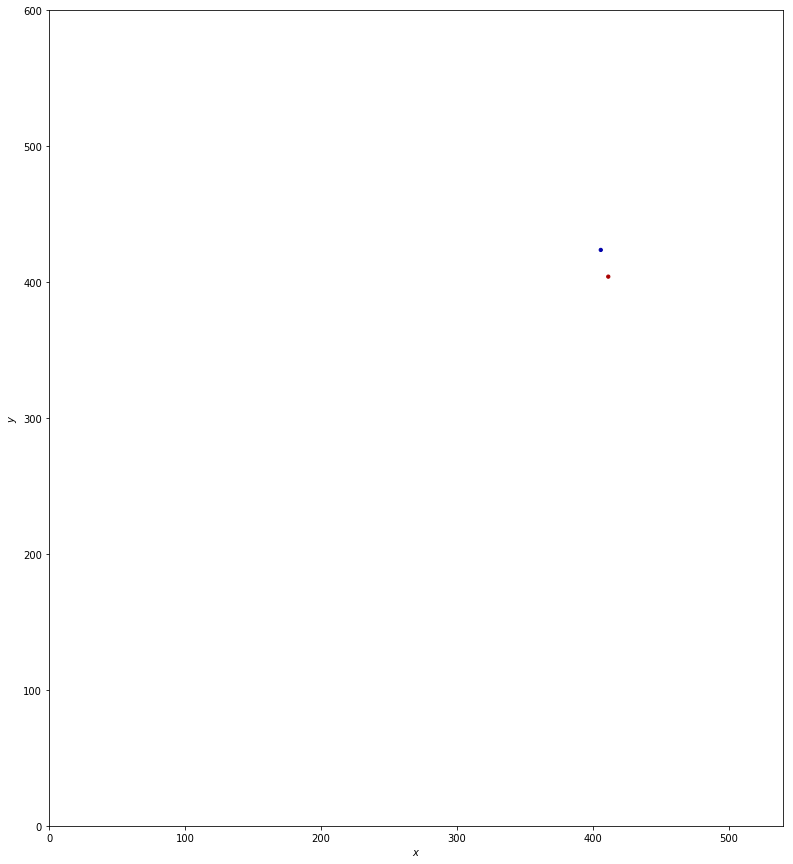

angle -79.2096032967
move (-0.15223119707464158, 0.98834491076608555)
366.214511481 440.808431414
257
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


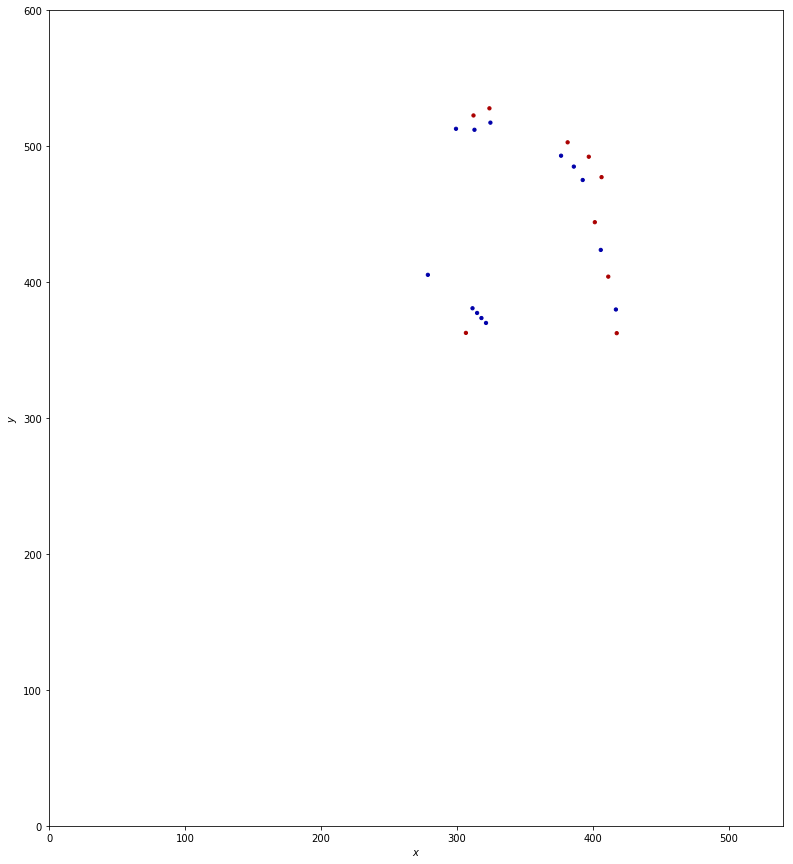

angle 98.7562498999
move (0.18676752955706885, -0.98240413776772617)
366.401279011 439.826027276
258
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


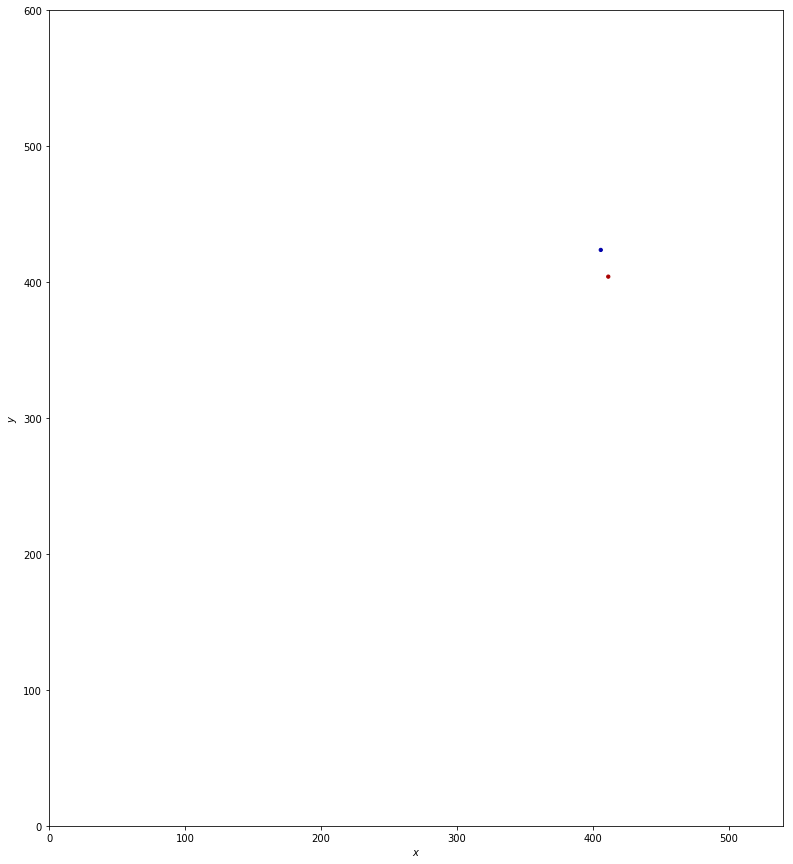

angle -79.2357993024
move (-0.15136707724043236, 0.98847762135907202)
366.249911933 440.814504897
259
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


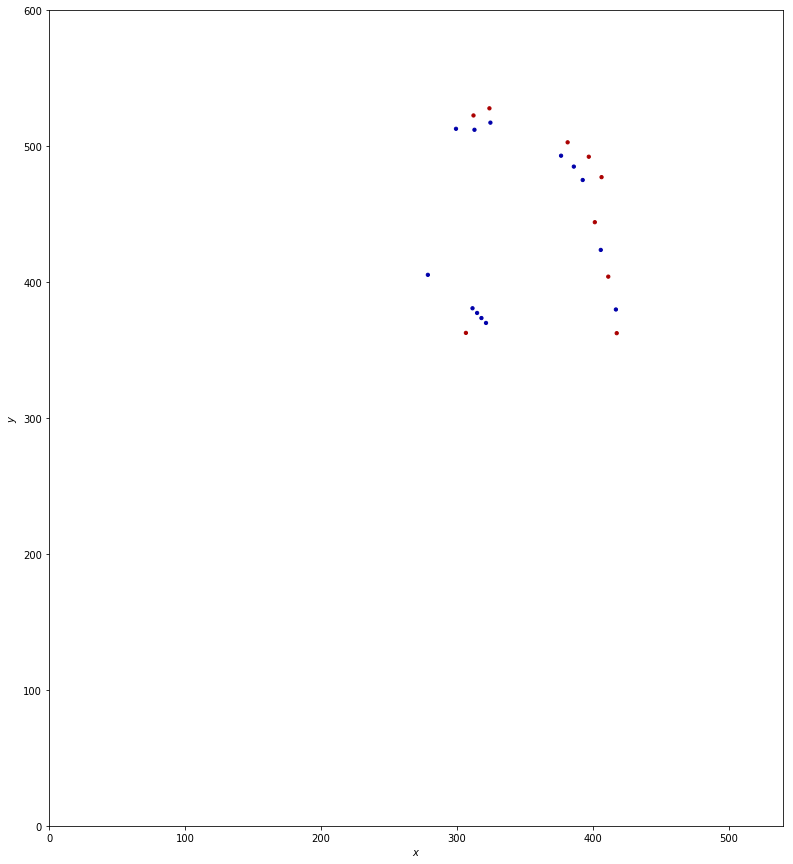

angle 98.7061589934
move (0.18631431881530294, -0.98249019058939702)
366.436226252 439.832014707
260
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


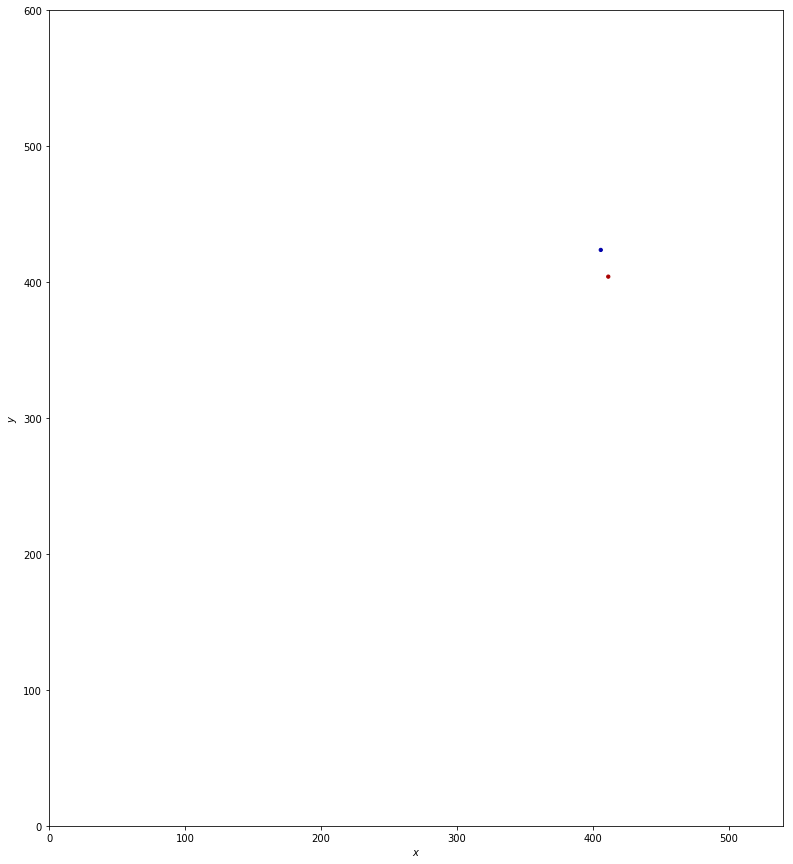

angle -79.2622303037
move (-0.15049249291077105, 0.98861115185774706)
366.285733759 440.820625858
261
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


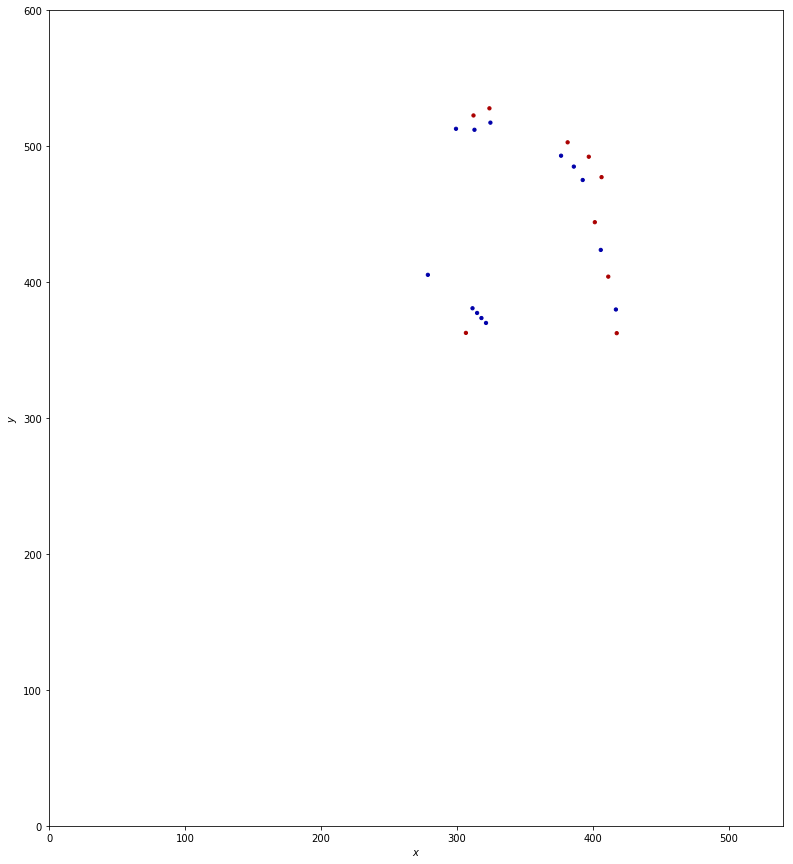

angle 98.6554683129
move (0.18585700739995761, -0.98257680249450841)
366.471590767 439.838049056
262
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


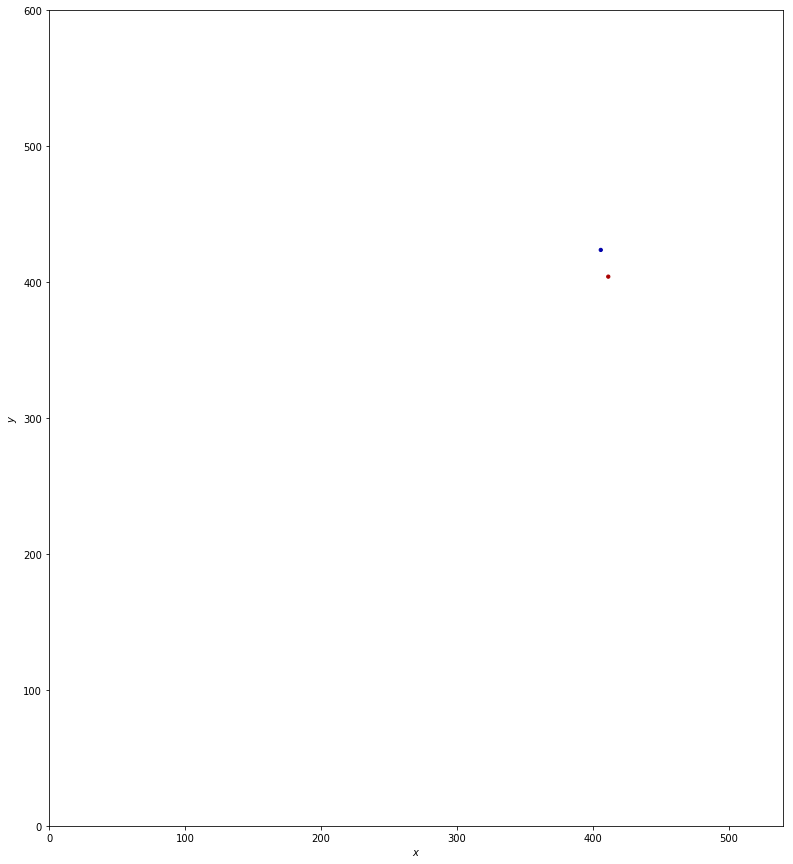

angle -79.2888981105
move (-0.14960727739540439, 0.9887454993830993)
366.321983489 440.826794555
263
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


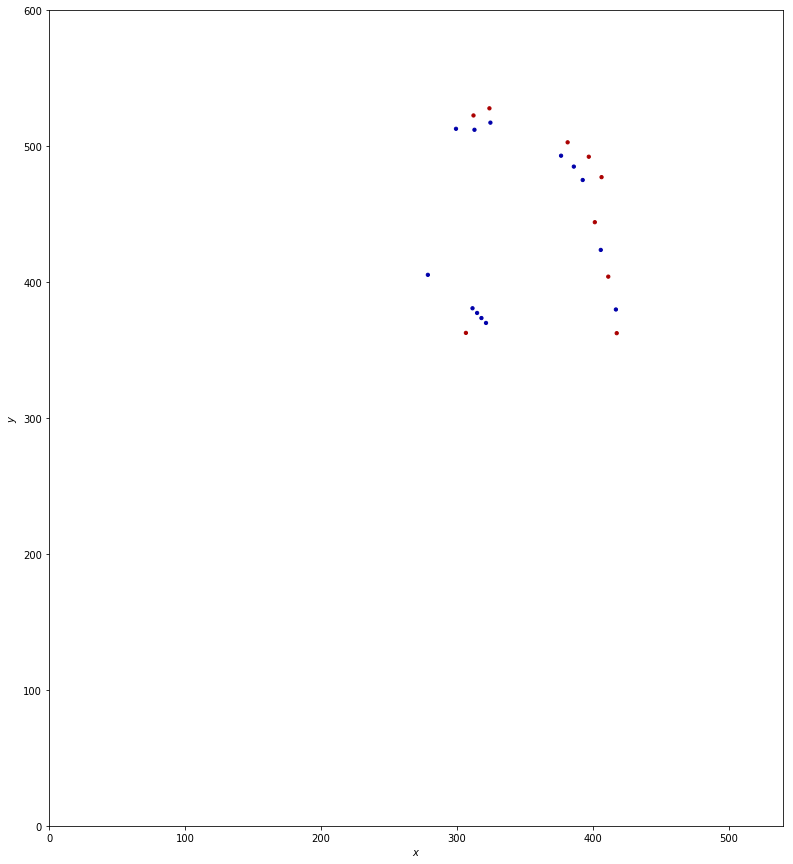

angle 98.6041684024
move (0.18539556341744201, -0.98266397362736835)
366.507379053 439.844130582
264
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


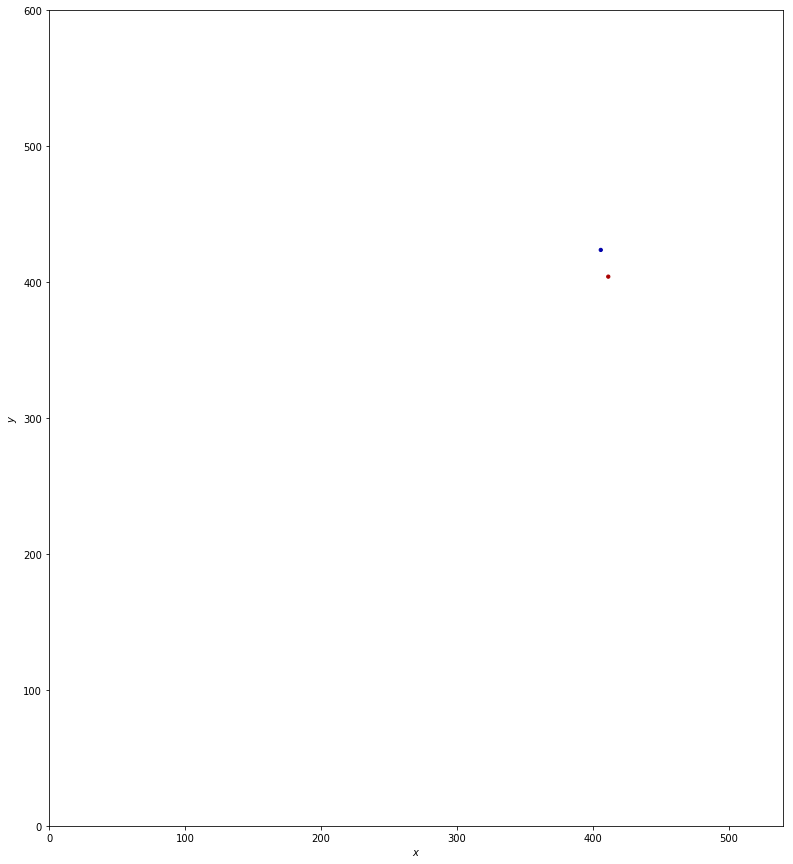

angle -79.3158045258
move (-0.14871126034747417, 0.98888066066935787)
366.358667792 440.833011242
265
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


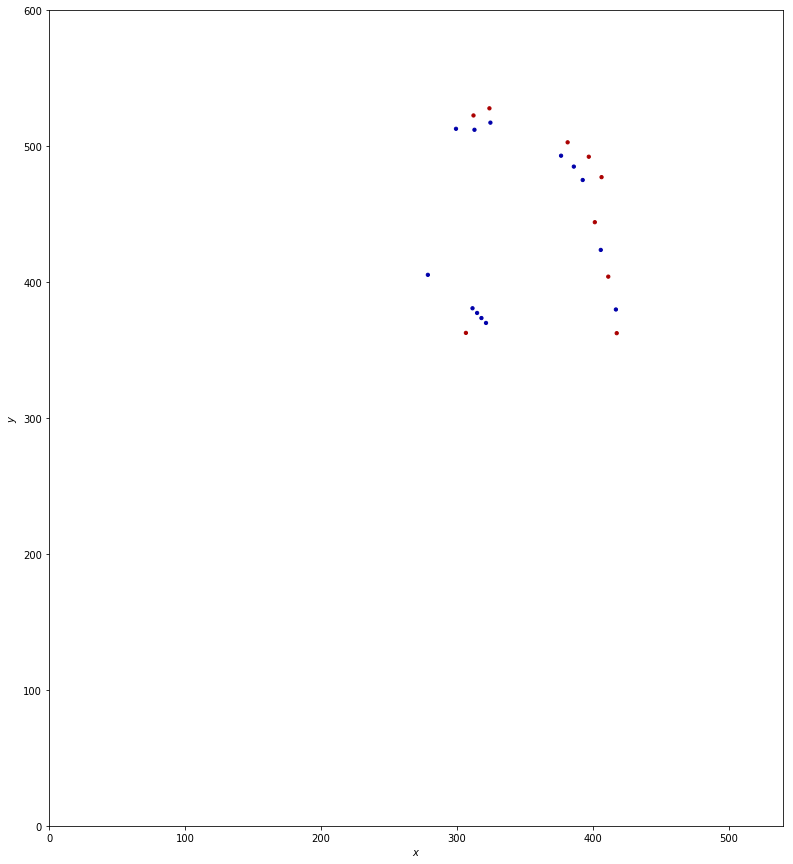

angle 98.5522495992
move (0.18492995510701141, -0.98275170399451295)
366.543597747 439.850259538
266
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


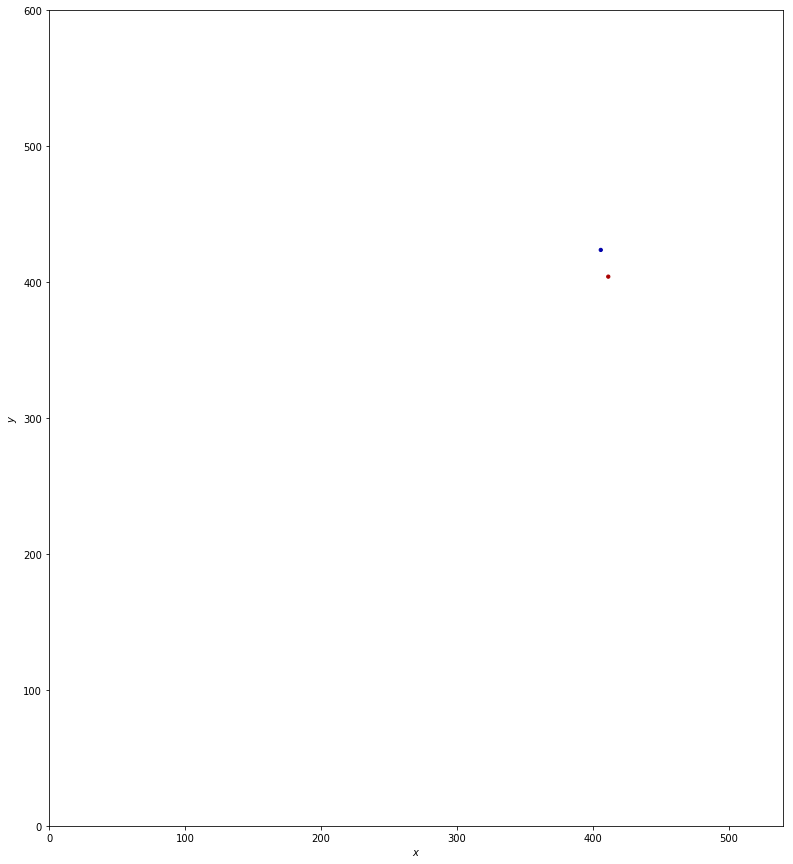

angle -79.3429513435
move (-0.14780426765680418, 0.98901663204540491)
366.39579348 440.83927617
267
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


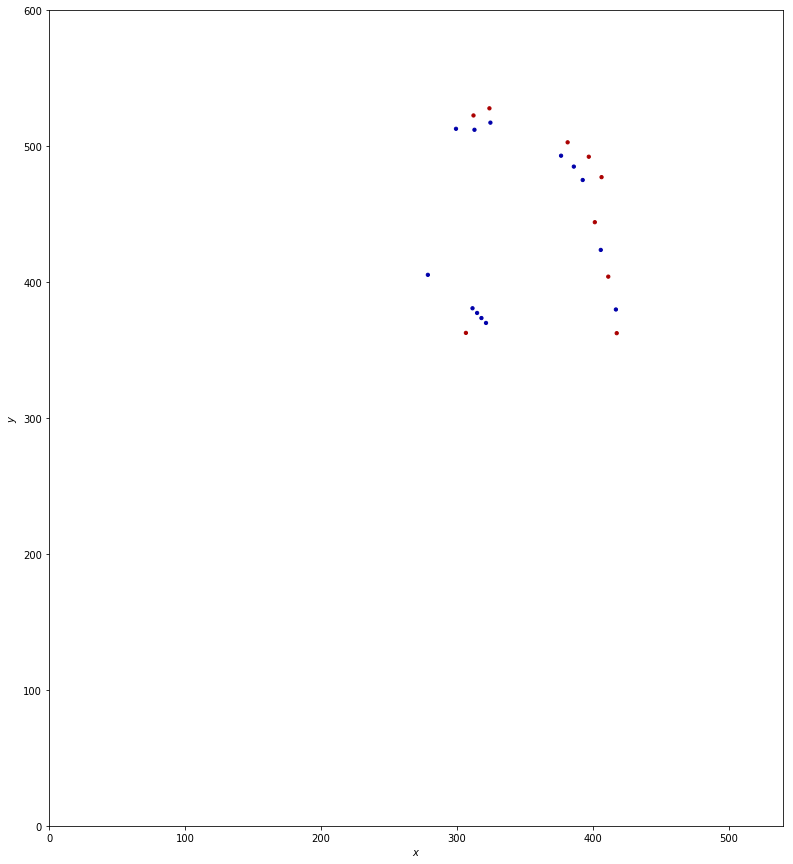

angle 98.4997020279
move (0.18446015086731313, -0.98283999345875628)
366.580253631 439.856436177
268
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


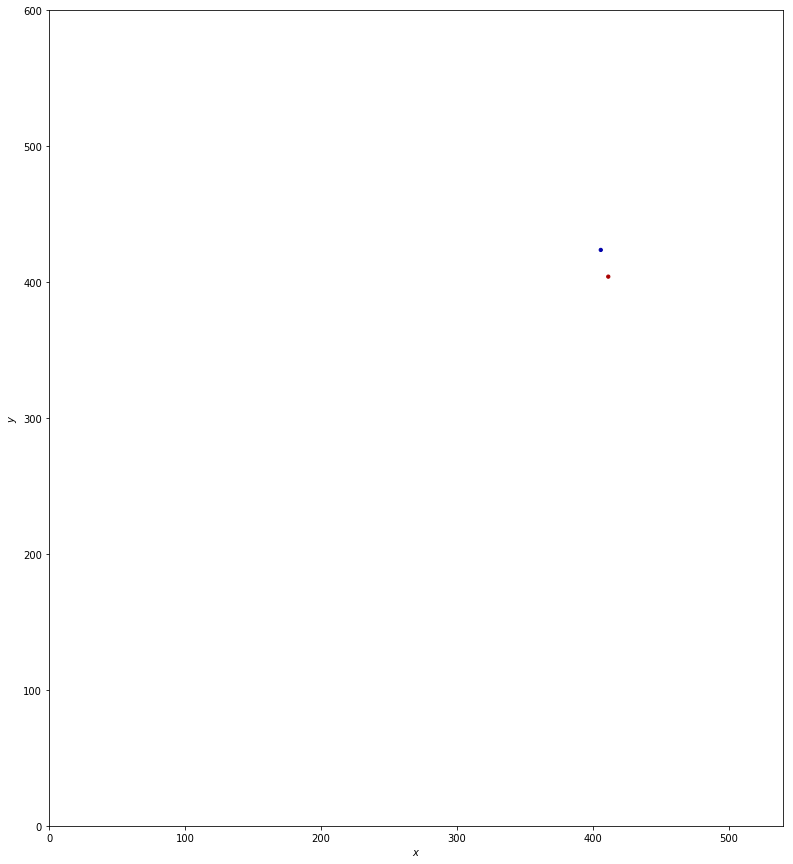

angle -79.3703403477
move (-0.14688612133930221, 0.98915340941529173)
366.433367509 440.845589586
269
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


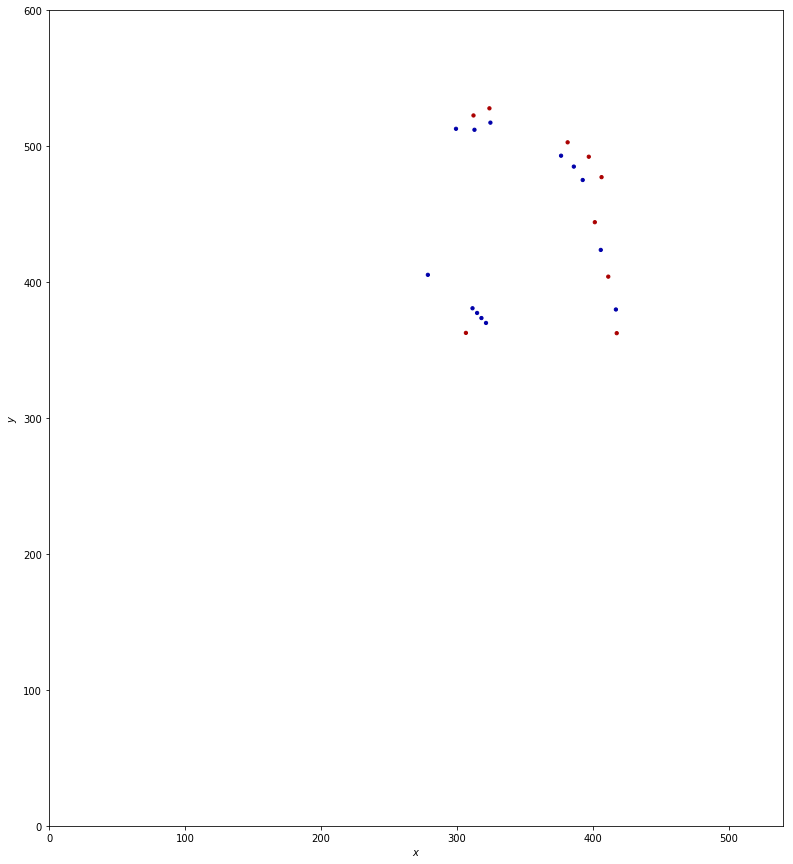

angle 98.4465155938
move (0.18398611928462588, -0.98292884173300332)
366.617353629 439.862660745
270
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


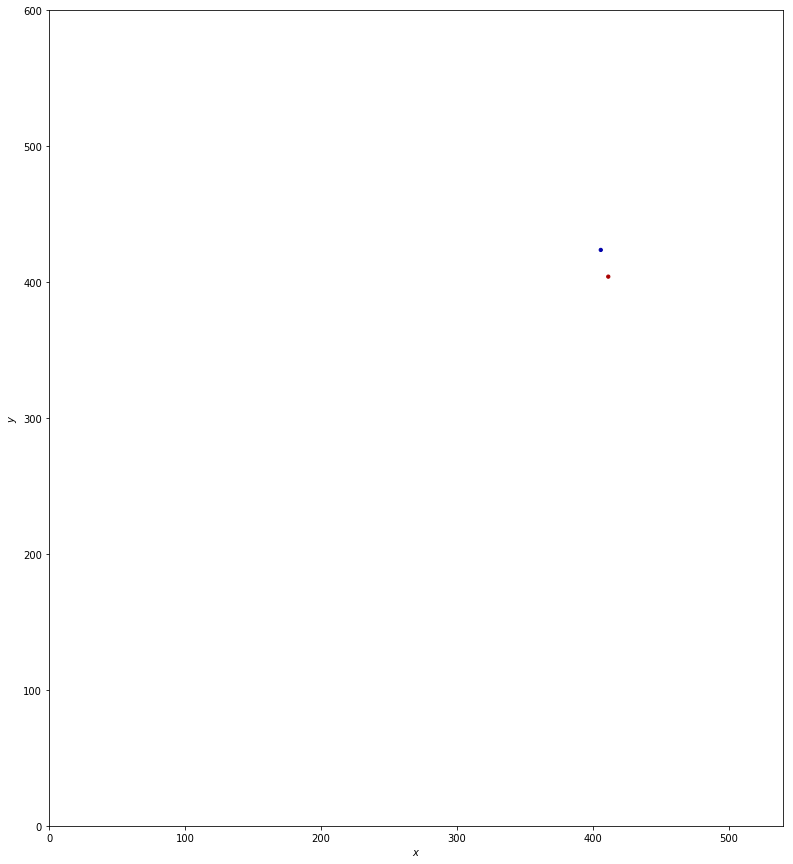

angle -79.3979733105
move (-0.14595663942226839, 0.98929098823781769)
366.471396989 440.851951733
271
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


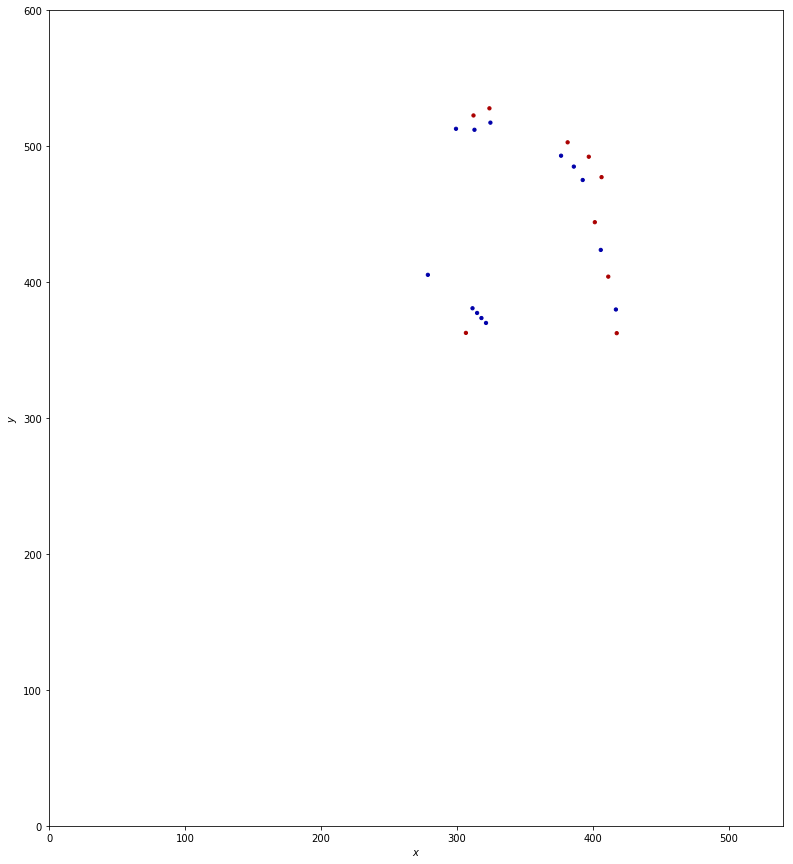

angle 98.3926799772
move (0.18350782916289943, -0.98301824837381335)
366.654904818 439.868933485
272
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


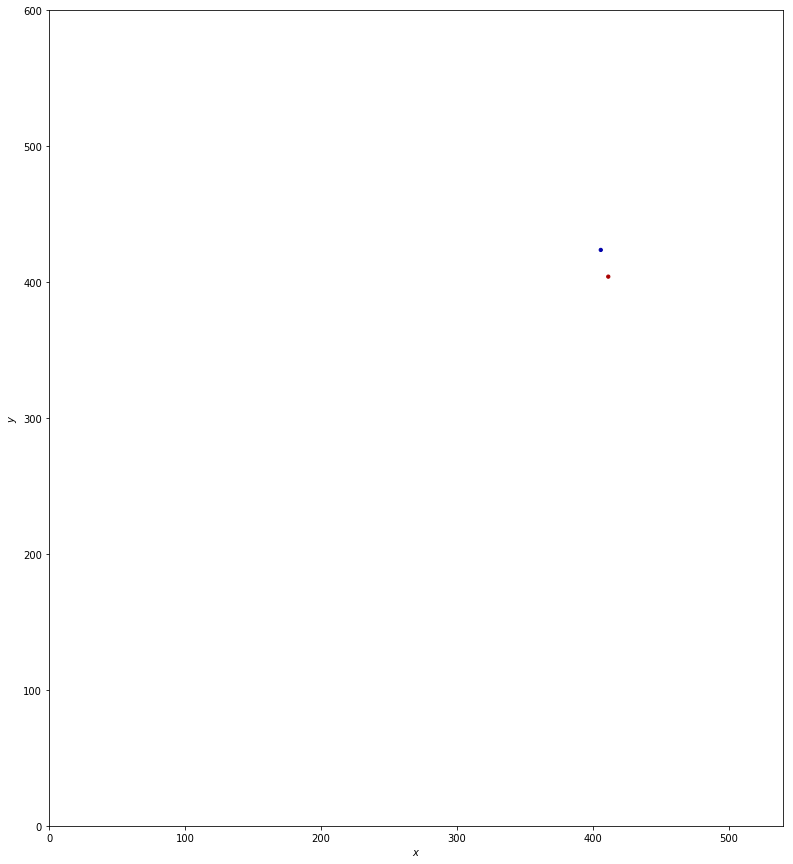

angle -79.4258519904
move (-0.14501563582546853, 0.98942936350511401)
366.509889182 440.858362848
273
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


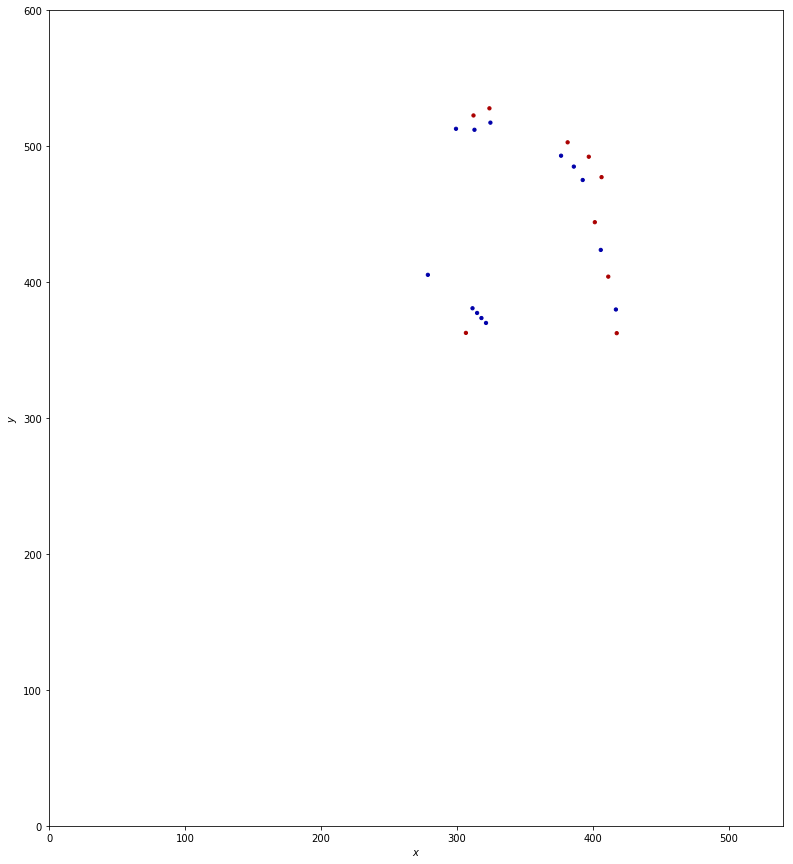

angle 98.3381846257
move (0.18302524955571409, -0.98310821277470195)
366.692914432 439.875254635
274
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


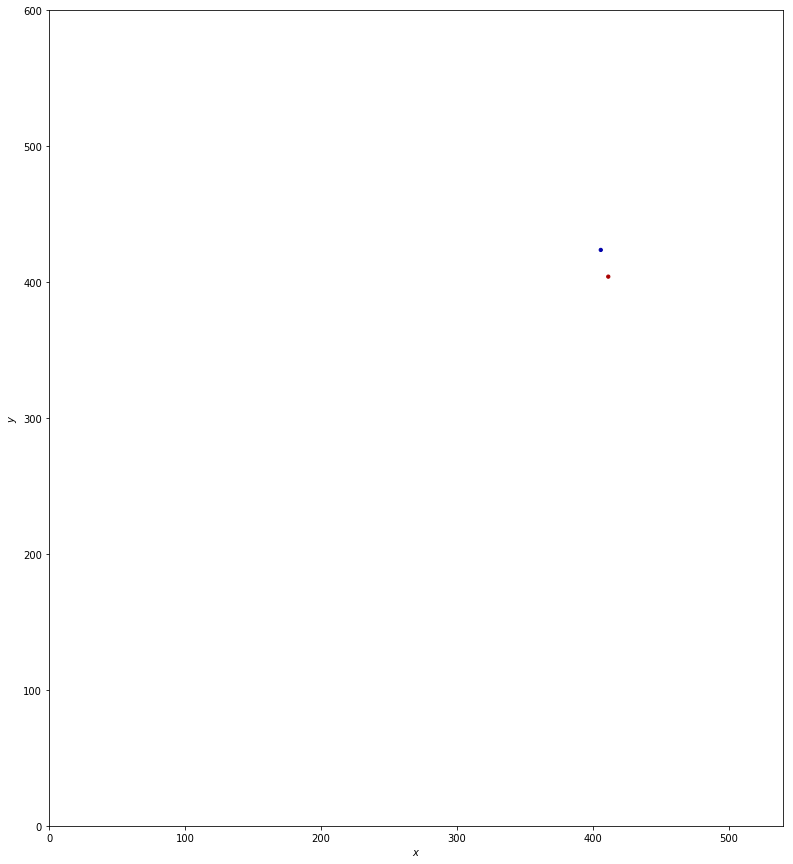

angle -79.4539781306
move (-0.14406292023776721, 0.98956852972018405)
366.548851512 440.864823165
275
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


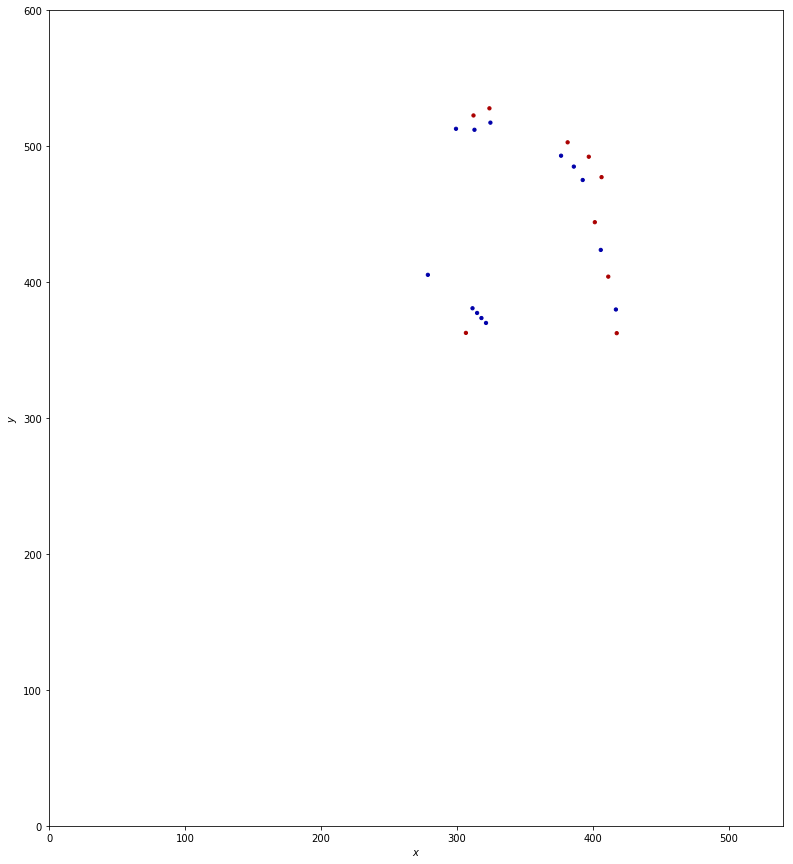

angle 98.2830187479
move (0.1825383498002546, -0.98319873415917292)
366.731389862 439.881624431
276
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


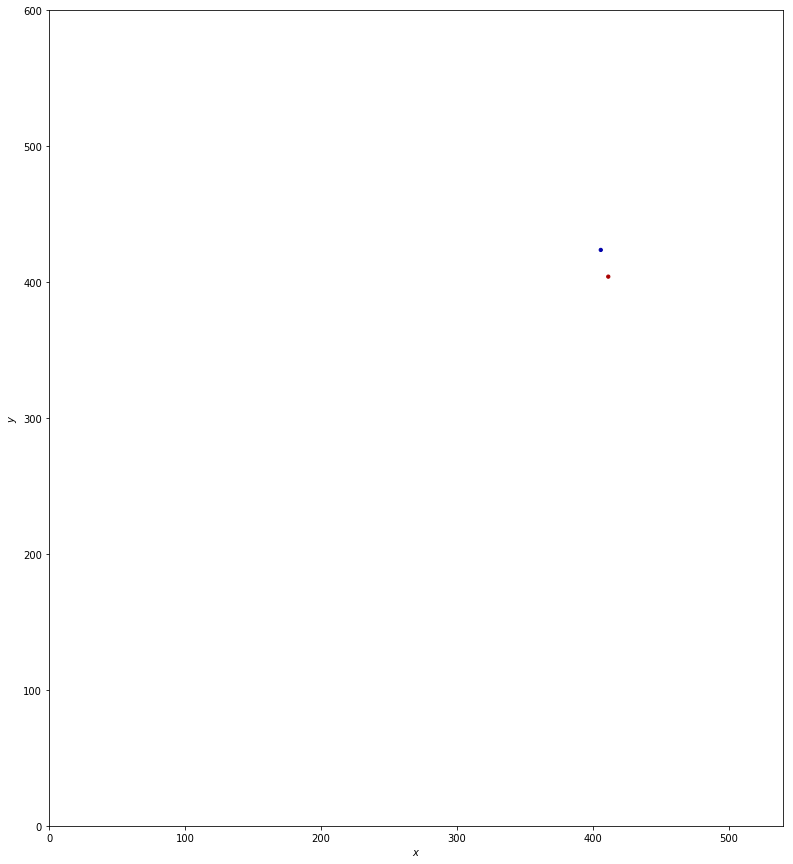

angle -79.4823534567
move (-0.14309829798911566, 0.98970848087334196)
366.588291564 440.871332912
277
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


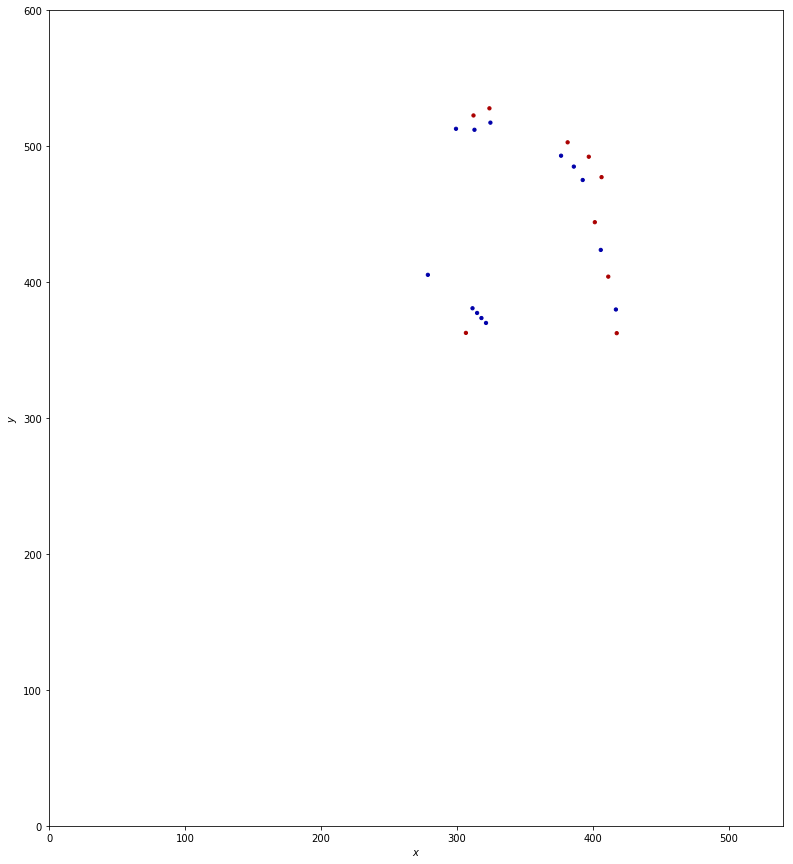

angle 98.2271713056
move (0.18204709955344492, -0.98328981157346385)
366.770338663 439.8880431
278
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


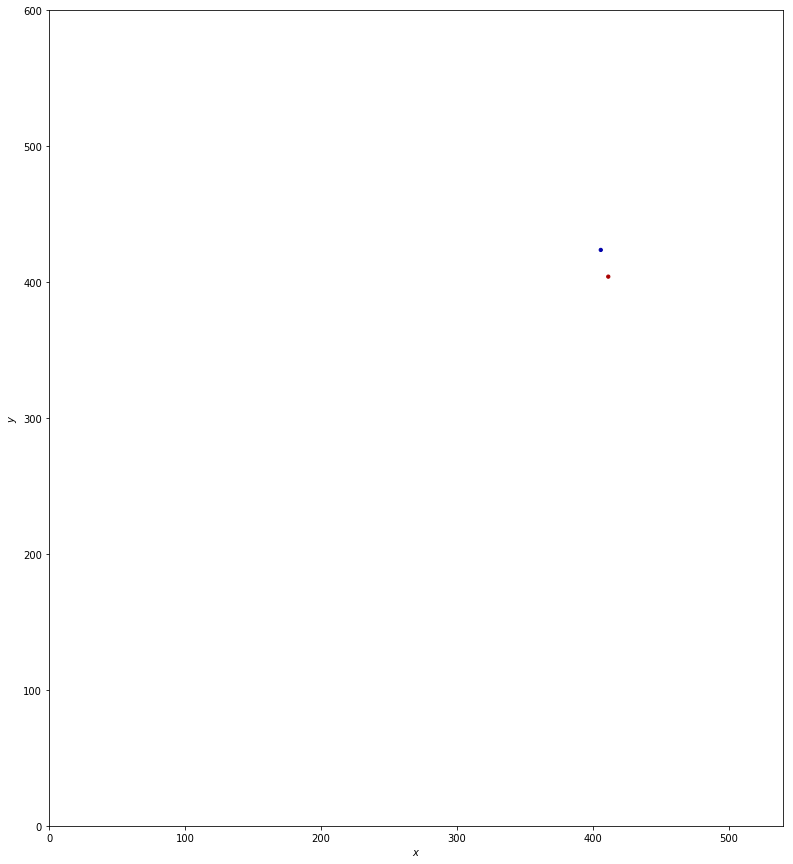

angle -79.5109796751
move (-0.14212156991770694, 0.98984921041748897)
366.628217093 440.877892311
279
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


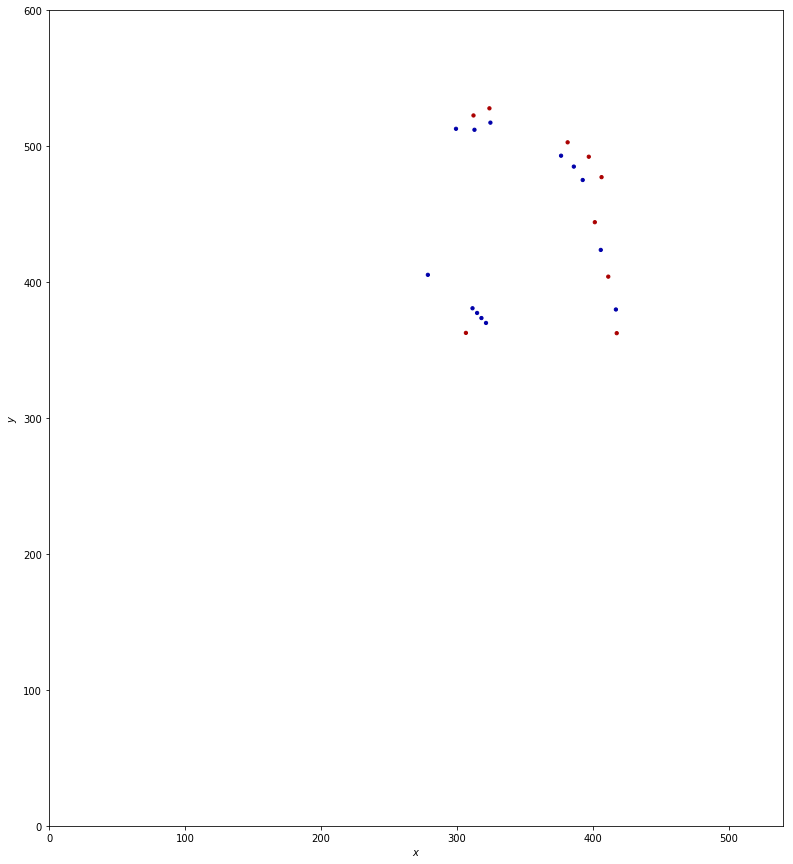

angle 98.1706310068
move (0.18155146883036063, -0.98338144387899584)
366.809768562 439.894510867
280
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


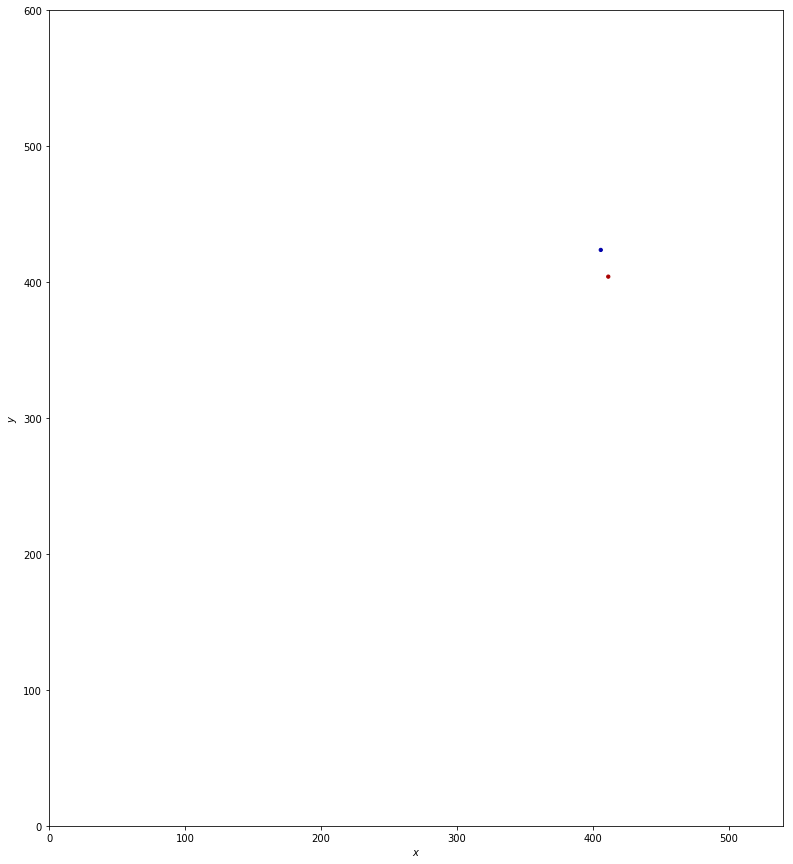

angle -79.5398584701
move (-0.14113253223205299, 0.98999071124216542)
366.66863603 440.884501578
281
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


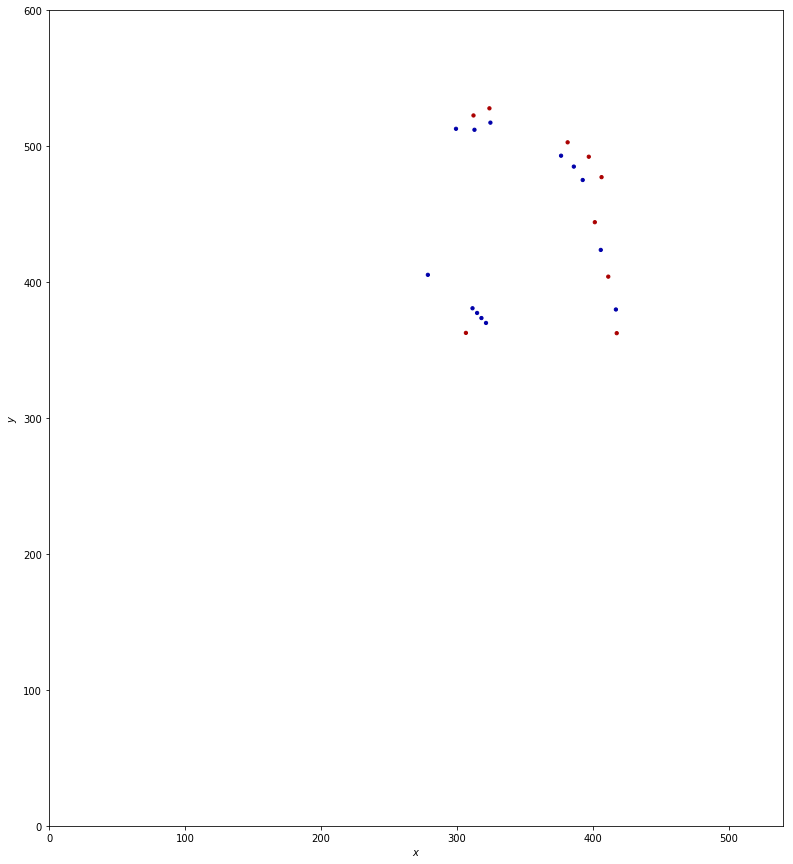

angle 98.1133862974
move (0.18105142804506336, -0.98347362974451091)
366.849687458 439.901027948
282
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


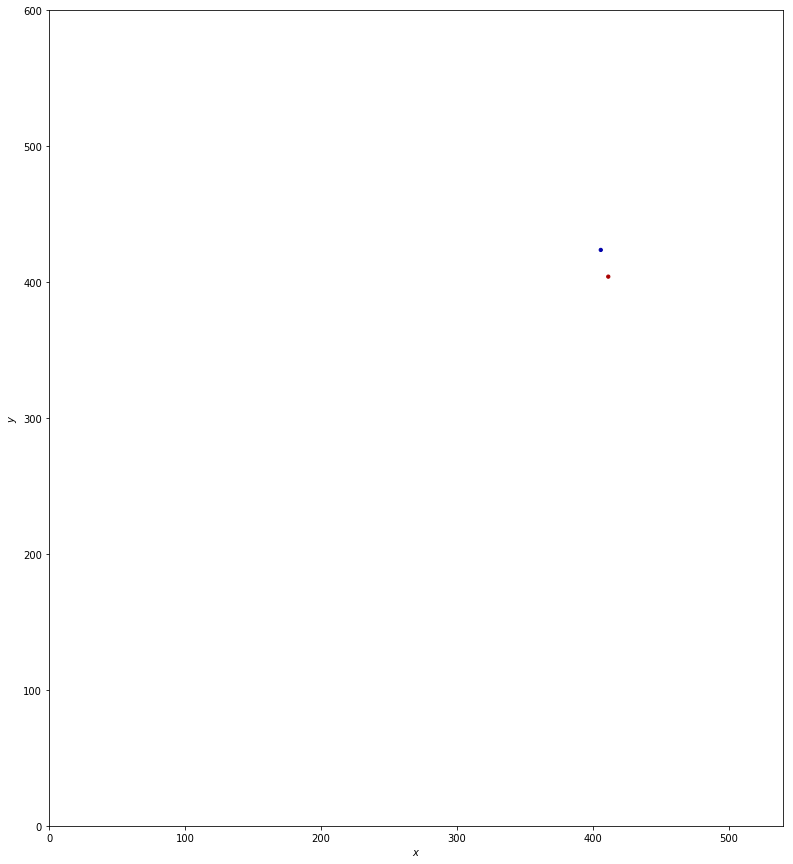

angle -79.5689915021
move (-0.14013097636777491, 0.99013297564630887)
366.709556482 440.891160924
283
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


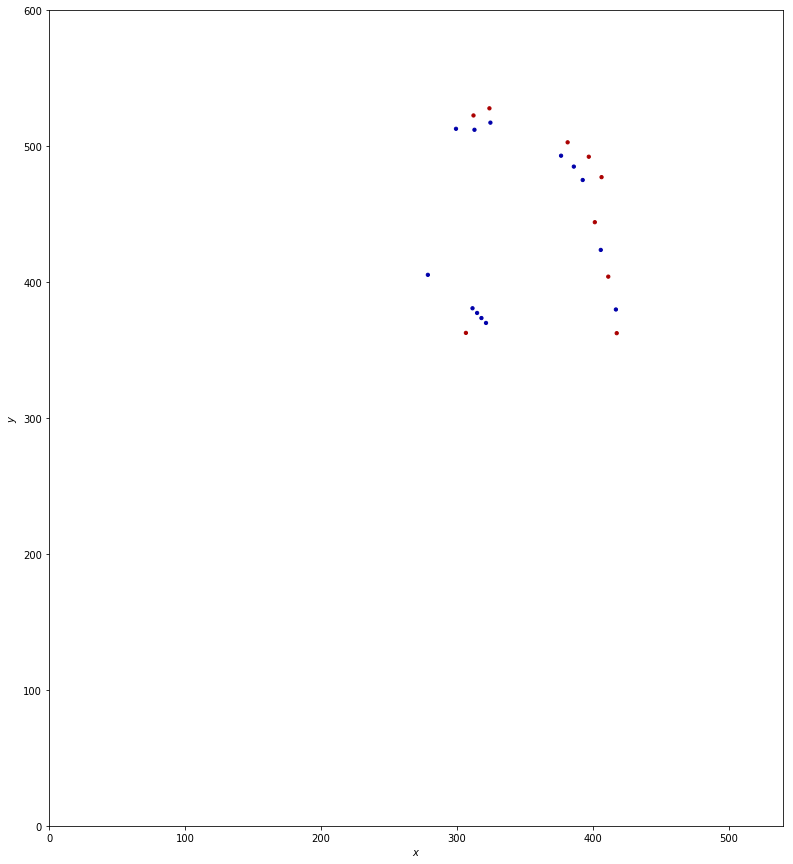

angle 98.0554253534
move (0.18054694805400276, -0.98356636763788607)
366.89010343 439.907594556
284
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


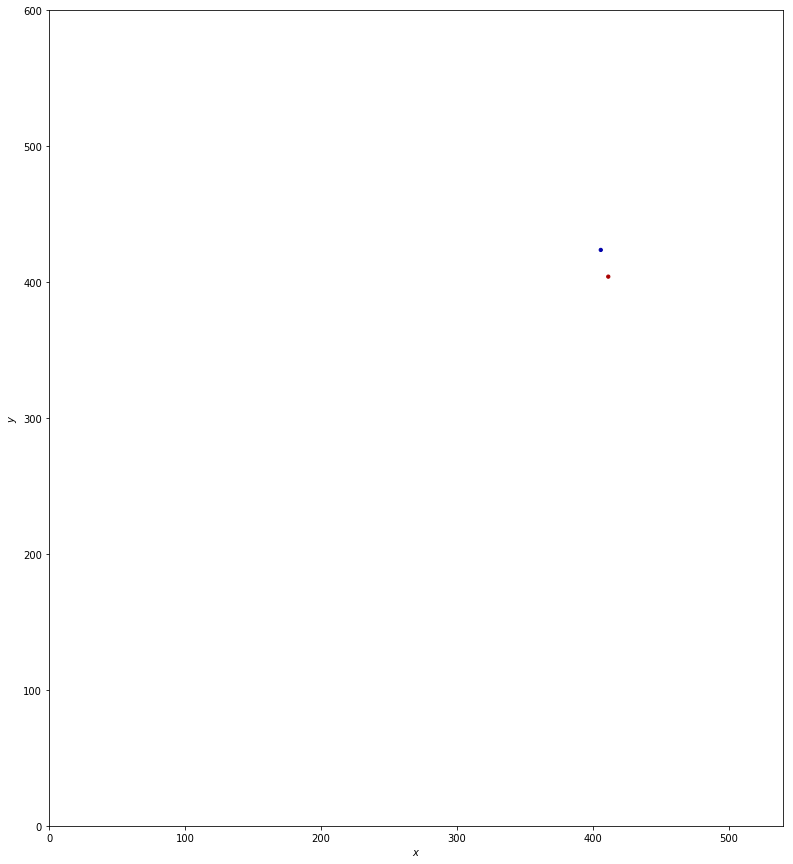

angle -79.598380405
move (-0.13911668883884806, 0.9902759953096486)
366.750986741 440.897870551
285
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


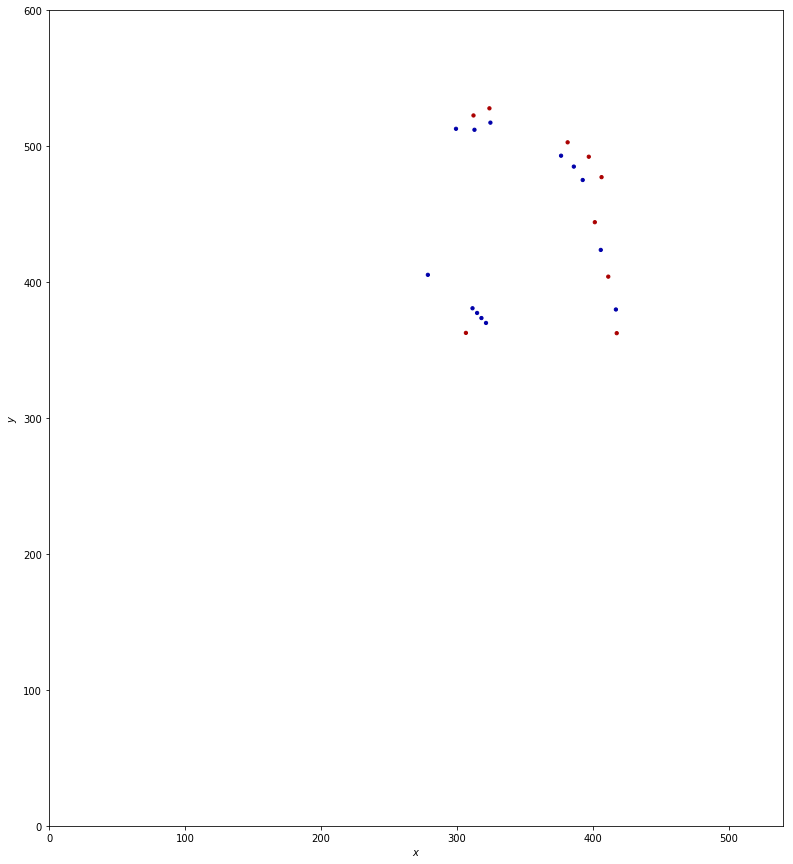

angle 97.9967360722
move (0.18003800020214936, -0.98365965581760584)
366.931024741 439.914210896
286
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


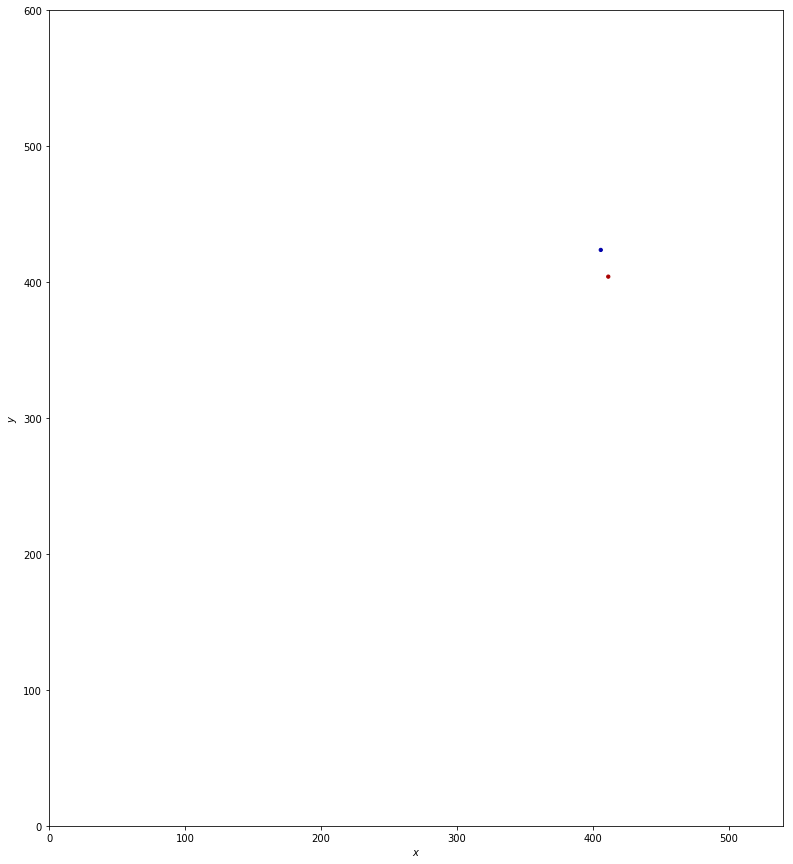

angle -79.6280267831
move (-0.13808945108305776, 0.99041976126265763)
366.79293529 440.904630657
287
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


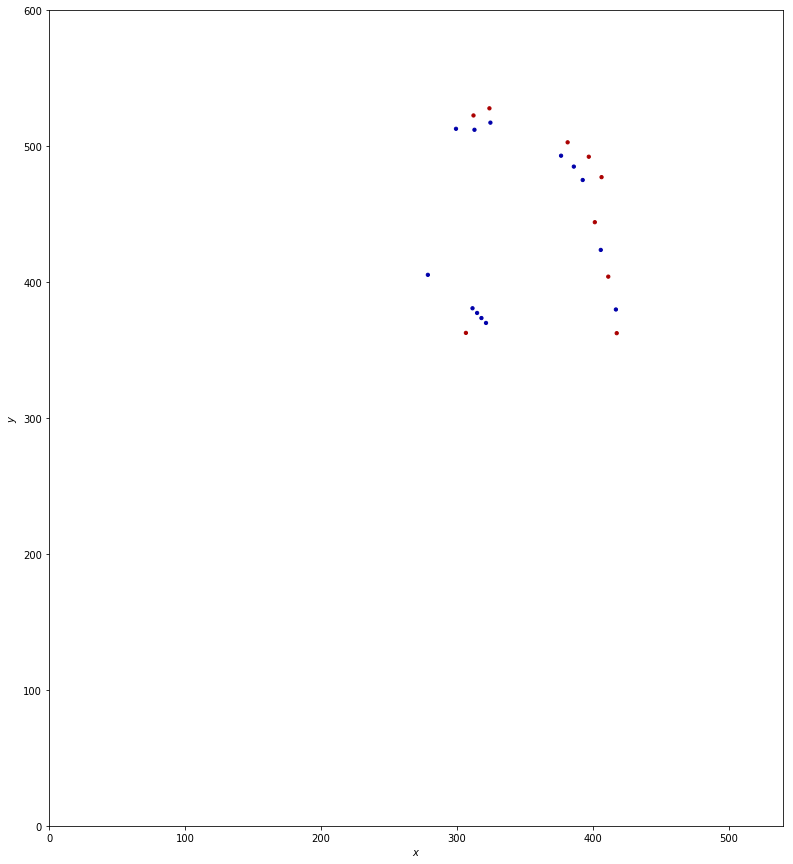

angle 97.9373060638
move (0.17952455637202983, -0.98375349232387777)
366.972459846 439.920877165
288
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


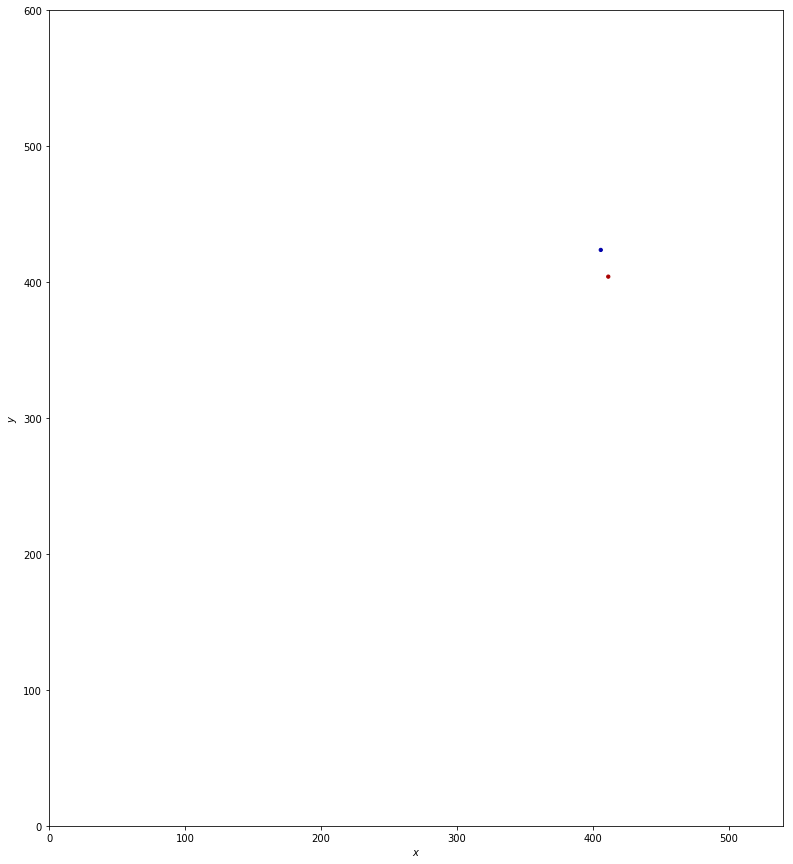

angle -79.6579322088
move (-0.13704903930138465, 0.99056426385498464)
366.835410807 440.911441428
289
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


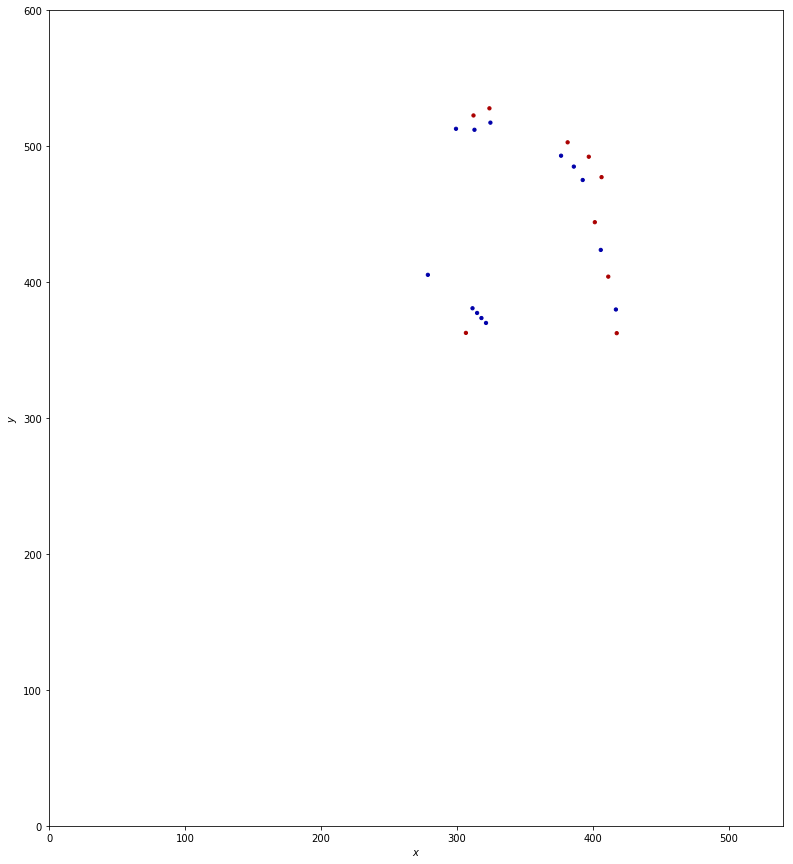

angle 97.877122642
move (0.17900658903582861, -0.98384787496937653)
367.014417396 439.927593553
290
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


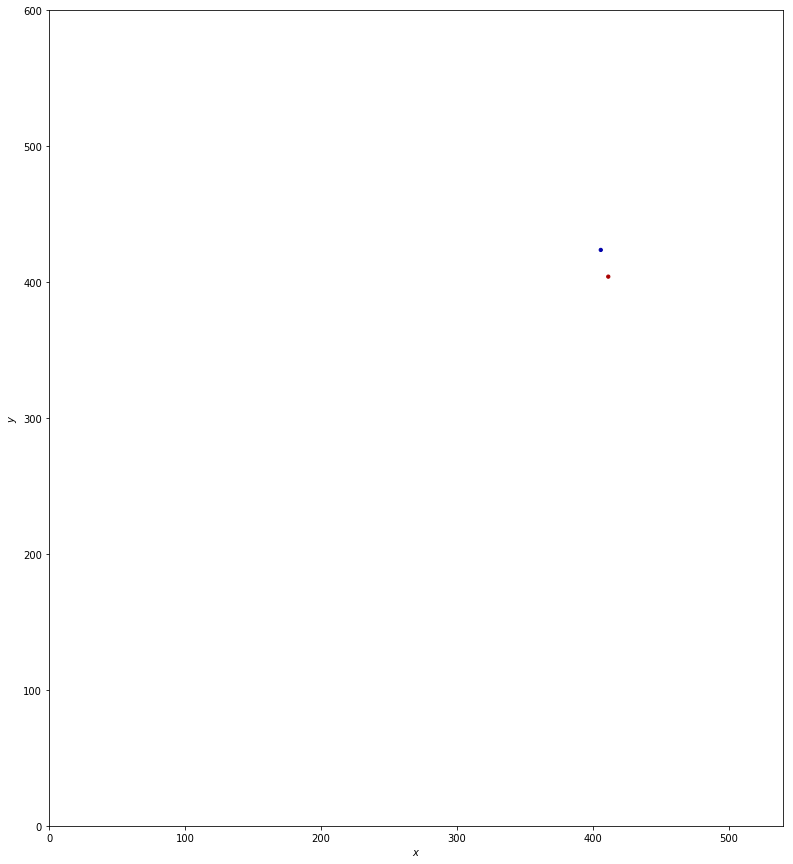

angle -79.6880982191
move (-0.13599522429103772, 0.99070949272227649)
366.878422172 440.918303046
291
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


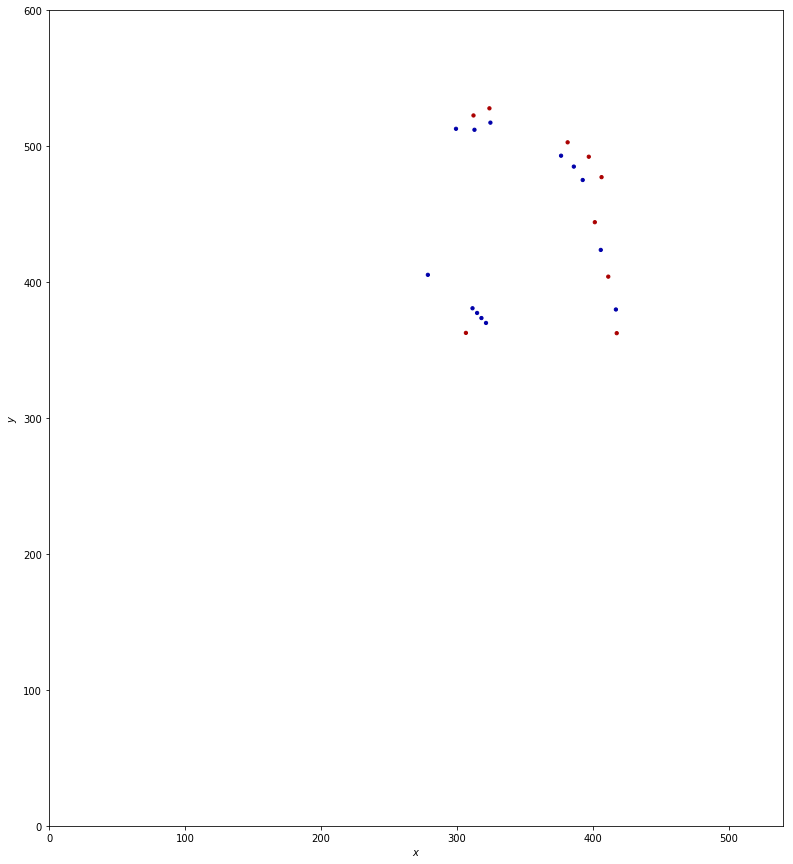

angle 97.8161728146
move (0.17848407131076754, -0.983942801329596)
367.056906243 439.934360245
292
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


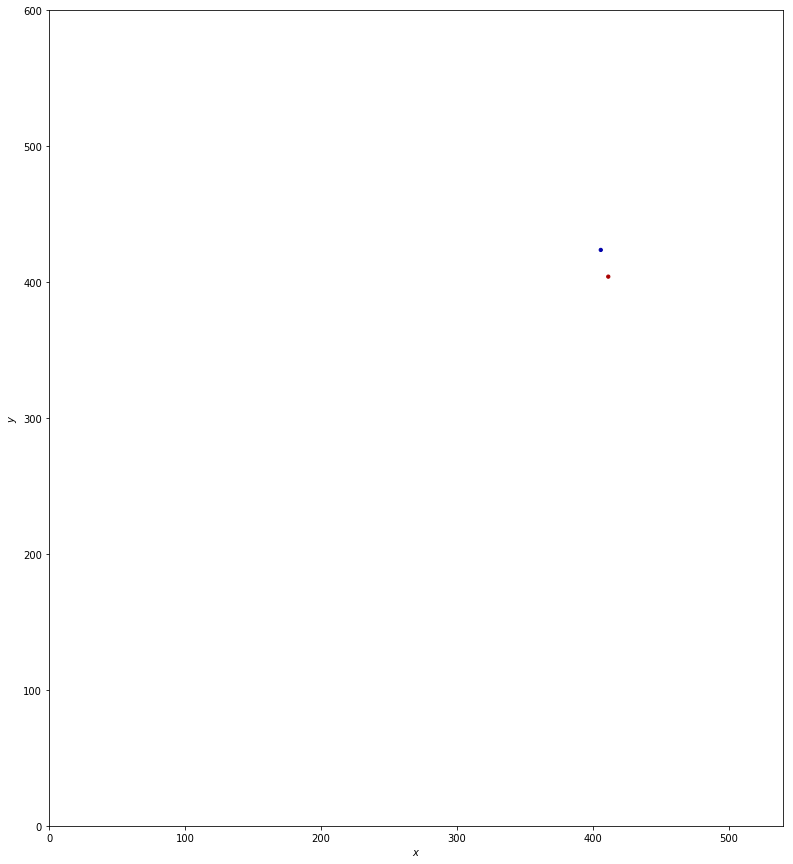

angle -79.7185263129
move (-0.13492777127184466, 0.99085543675130161)
366.921978472 440.925215682
293
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


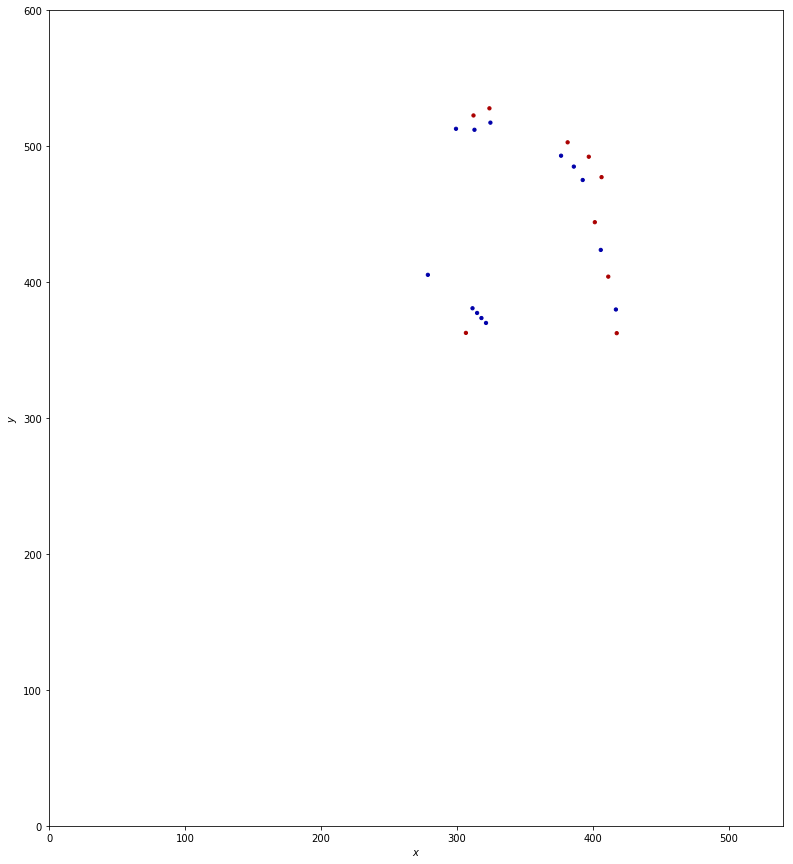

angle 97.7544432734
move (0.17795697701795432, -0.98403826873279232)
367.099935449 439.941177413
294
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


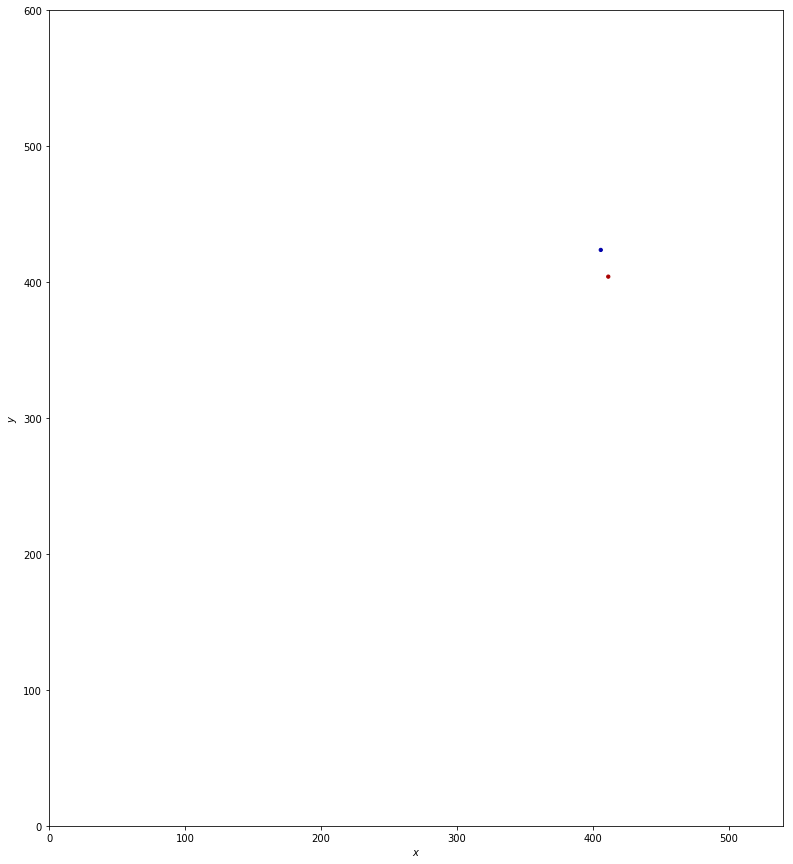

angle -79.7492179472
move (-0.13384643970566287, 0.99100208404327705)
366.966089009 440.932179497
295
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


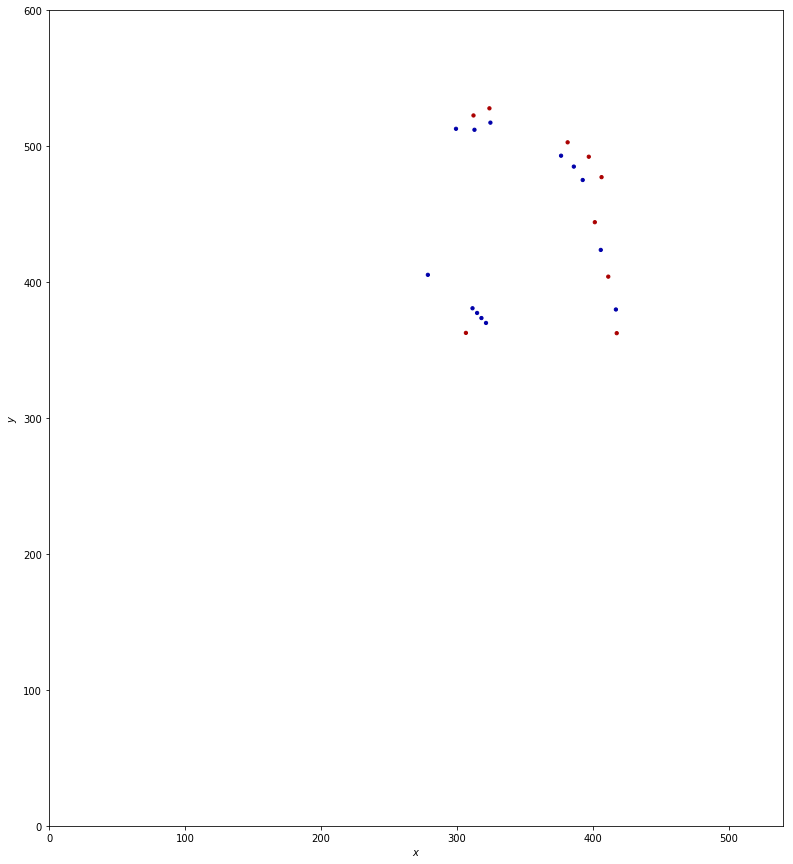

angle 97.6919203845
move (0.17742528074492753, -0.98413427424949673)
367.14351429 439.948045223
296
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


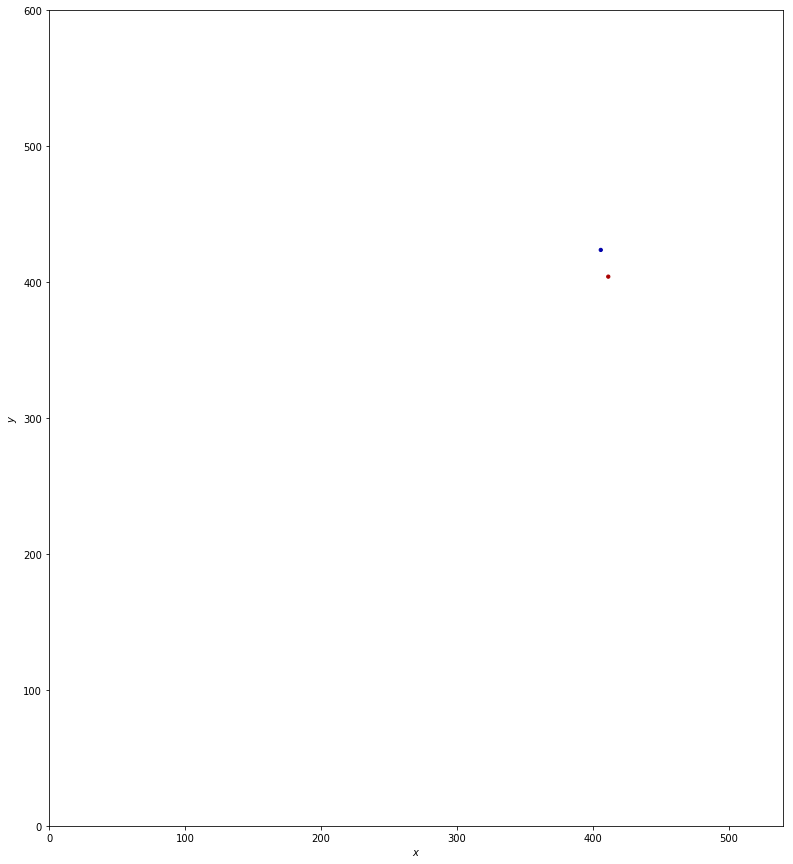

angle -79.7801745336
move (-0.13275098310850383, 0.99114942187529209)
367.010763307 440.939194645
297
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


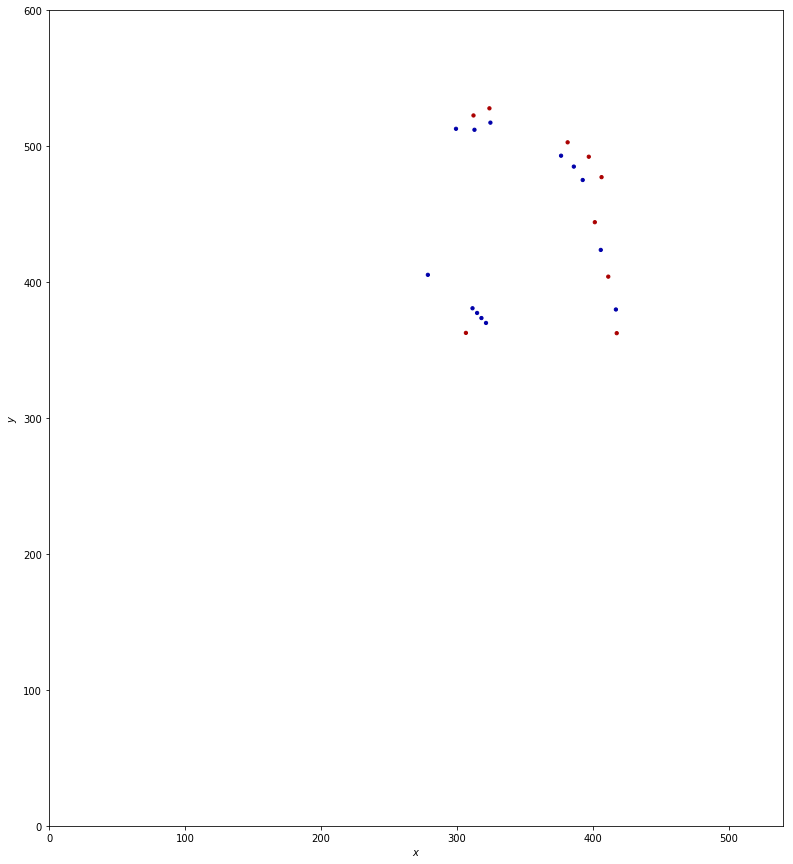

angle 97.6285901768
move (0.17688895791212036, -0.98423081468157869)
367.187652265 439.95496383
298
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)


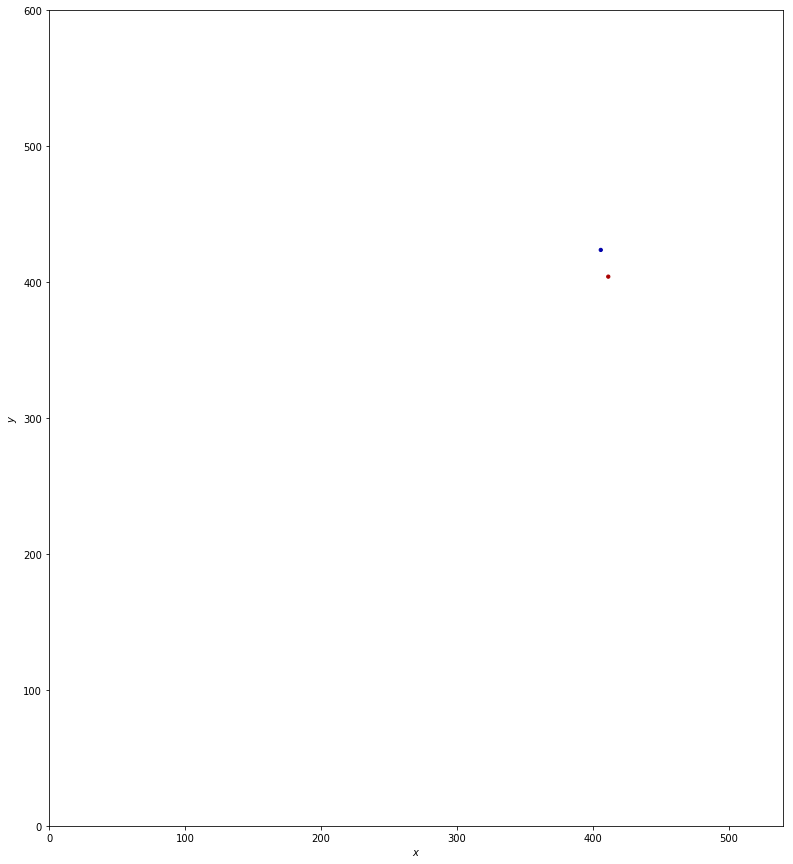

angle -79.8113974345
move (-0.13164114885498696, 0.99129743665972381)
367.056011116 440.946261267
299
yes 1 (406.5297, 477.3002)
yes 1 (401.5797, 444.1501)
yes 1 (411.4797, 404.1003)
yes -1 (405.9587, 423.7502)
yes -1 (392.6697, 475.2002)
yes -1 (337.0497, 512.8801)
yes -1 (313.0197, 512.1602)
yes -1 (299.4281, 512.8801)
yes -1 (417.0894, 379.9204)
yes -1 (321.5097, 370.0201)
yes -1 (318.1497, 373.6201)
yes -1 (314.9397, 377.3701)
yes -1 (311.5797, 380.8201)
yes -1 (278.7297, 405.4201)
yes 1 (306.7197, 362.7002)
yes 1 (312.2997, 522.6902)
yes -1 (324.7503, 517.4102)
yes 1 (324.0303, 527.9402)
yes 1 (381.5678, 502.9202)
yes -1 (376.7378, 493.0805)
yes 1 (397.1397, 492.3303)
yes -1 (386.1294, 485.0703)
yes 1 (417.6894, 362.4898)


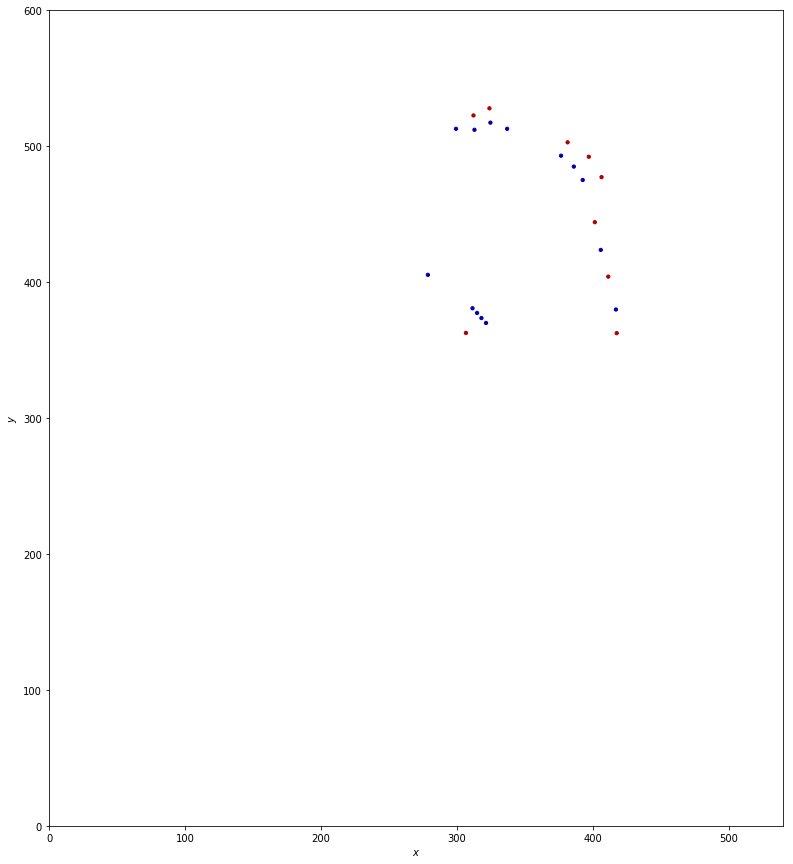

angle 97.5644383315
move (-0.012298617017985415, -0.99992436914970972)
367.043712499 439.946336897
300


In [41]:
cones = []

cones.append((1,( 357.5678 , 526.9202 )))   # 
cones.append((1,( 337.0497 , 534.6002 )))   # Start
cones.append((1,( 337.1997 , 536.4001 )))   # 
cones.append((1,( 300.3891 , 530.1002 )))   # 
cones.append((1,( 300.7194 , 540.1503 )))   # 
cones.append((1,( 297.1497 , 558.3002 )))   # Stage Red
cones.append((1,( 406.5297 , 477.3002 )))   # 
cones.append((1,( 401.5797 , 444.1501 )))   # 
cones.append((1,( 411.4797 , 404.1003 )))   # 
cones.append((-1,( 405.9587 , 423.7502 )))   # 
cones.append((-1,( 392.6697 , 475.2002 )))   # 
cones.append((-1,( 354.2378 , 515.3702 )))   # 
cones.append((-1,( 337.0497 , 515.0402 )))   # Start
cones.append((-1,( 337.0497 , 512.8801 )))   # 
cones.append((1,( 300.5691 , 522.6902 )))   # 
cones.append((-1,( 313.0197 , 512.1602 )))   # 
cones.append((-1,( 299.4281 , 512.8801 )))   # 
cones.append((-1,( 290.4281 , 512.1602 )))   # 
cones.append((-1,( 288.9881 , 521.8503 )))   # 
cones.append((-1,( 288.9881 , 529.3801 )))   # 
cones.append((-1,( 288.9881 , 540.8401 )))   # 
cones.append((-1,( 288.9881 , 558.1653 )))   # Stage
cones.append((-1,( 417.0894 , 379.9204 )))   # 
cones.append((-1,( 417.4197 , 323.8201 )))   # 
cones.append((-1,( 416.6997 , 299.3701 )))   # 
cones.append((1,( 429.4797 , 323.8201 )))   # 
cones.append((1,( 430.1997 , 299.3701 )))   # 
cones.append((1,( 430.1997 , 228.7201 )))   # 
cones.append((1,( 418.6197 , 228.7201 )))   # 
cones.append((1,( 406.8897 , 228.7201 )))   # 
cones.append((1,( 395.1597 , 228.7201 )))   # 
cones.append((1,( 383.4297 , 228.7201 )))   # 
cones.append((-1,( 383.4297 , 242.9106 )))   # 
cones.append((-1,( 347.5494 , 257.4001 )))   # 
cones.append((-1,( 324.2697 , 310.9201 )))   # 
cones.append((-1,( 321.5097 , 370.0201 )))   # 
cones.append((-1,( 318.1497 , 373.6201 )))   # 
cones.append((-1,( 314.9397 , 377.3701 )))   # 
cones.append((-1,( 311.5797 , 380.8201 )))   # 
cones.append((-1,( 278.7297 , 405.4201 )))   # 
cones.append((-1,( 254.2797 , 481.6201 )))   # 
cones.append((-1,( 253.5597 , 501.1201 )))   # 
cones.append((-1,( 250.5897 , 502.5601 )))   # 
cones.append((-1,( 247.9197 , 504.1501 )))   # 
cones.append((-1,( 245.3997 , 505.7401 )))   # 
cones.append((1,( 312.2997 , 307.8002 )))   # 
cones.append((1,( 306.7197 , 362.7002 )))   # 
cones.append((1,( 265.4697 , 435.1501 )))   # 
cones.append((1,( 241.9197 , 476.0102 )))   # 
cones.append((1,( 194.8197 , 510.0302 )))   # 
cones.append((1,( 171.8697 , 465.1802 )))   # 
cones.append((1,( 184.7697 , 388.3802 )))   # 
cones.append((1,( 202.7697 , 323.2501 )))   # 
cones.append((-1,( 196.4097 , 532.5602 )))   # 
cones.append((-1,( 159.3597 , 524.9703 )))   # 
cones.append((-1,( 159.3597 , 518.1301 )))   # 
cones.append((-1,( 159.3597 , 511.4402 )))   # 
cones.append((-1,( 159.3597 , 504.7502 )))   # 
cones.append((-1,( 159.3597 , 498.0602 )))   # 
cones.append((-1,( 159.3597 , 491.3702 )))   # 
cones.append((-1,( 159.3597 , 484.6802 )))   # 
cones.append((-1,( 159.3294 , 463.2902 )))   # 
cones.append((-1,( 176.1294 , 420.6902 )))   # 
cones.append((-1,( 193.9497 , 355.8902 )))   # 
cones.append((-1,( 212.2497 , 288.3902 )))   # 
cones.append((1,( 213.2697 , 209.2501 )))   # 
cones.append((1,( 228.4197 , 168.1501 )))   # 
cones.append((1,( 277.2897 , 159.1501 )))   # 
cones.append((1,( 329.1897 , 168.8701 )))   # 
cones.append((1,( 395.1597 , 159.3901 )))   # 
cones.append((1,( 347.9997 , 228.7201 )))   # 
cones.append((1,( 344.0697 , 236.5201 )))   # 
cones.append((1,( 340.1397 , 244.3201 )))   # 
cones.append((1,( 336.2097 , 252.1201 )))   # 
cones.append((-1,( 200.5497 , 209.4001 )))   # 
cones.append((-1,( 202.0497 , 179.4001 )))   # 
cones.append((-1,( 202.0497 , 175.5001 )))   # 
cones.append((-1,( 202.0497 , 171.6001 )))   # 
cones.append((-1,( 202.0497 , 167.7001 )))   # 
cones.append((-1,( 202.0497 , 163.8 )))   # 
cones.append((-1,( 202.0497 , 159.9001 )))   # 
cones.append((-1,( 202.0497 , 156.0001 )))   # 
cones.append((-1,( 206.2497 , 156.0001 )))   # 
cones.append((-1,( 210.4497 , 156.0001 )))   # 
cones.append((-1,( 214.1997 , 156.0001 )))   # 
cones.append((-1,( 218.3997 , 156.0001 )))   # 
cones.append((-1,( 269.1 , 146.2501 )))   # 
cones.append((-1,( 273.3003 , 146.2501 )))   # 
cones.append((-1,( 277.5006 , 146.2501 )))   # 
cones.append((-1,( 329.2478 , 157.5002 )))   # 
cones.append((-1,( 395.0094 , 134.4001 )))   # 
cones.append((-1,( 395.0094 , 111.0002 )))   # 
cones.append((1,( 418.6194 , 158.0701 )))   # 
cones.append((1,( 418.6194 , 153.2701 )))   # 
cones.append((1,( 418.6194 , 148.4702 )))   # 
cones.append((1,( 418.6194 , 144.8702 )))   # 
cones.append((1,( 418.6194 , 141.2701 )))   # 
cones.append((1,( 418.6194 , 133.7701 )))   # 
cones.append((1,( 418.5594 , 137.3702 )))   # 
cones.append((1,( 418.5594 , 129.9902 )))   # 
cones.append((-1,( 359.7594 , 75.75018 )))   # 
cones.append((-1,( 316.9494 , 75.75018 )))   # 
cones.append((-1,( 265.56 , 51.90015 )))   # 
cones.append((-1,( 218.0094 , 51.90015 )))   # 
cones.append((-1,( 183.3297 , 68.25018 )))   # 
cones.append((-1,( 164.7 , 115.3502 )))   # 
cones.append((-1,( 163.26 , 118.8002 )))   # 
cones.append((-1,( 161.5794 , 122.2502 )))   # 
cones.append((1,( 405.5097 , 58.59015 )))   # 
cones.append((1,( 402.2397 , 58.59015 )))   # 
cones.append((1,( 398.9697 , 58.59015 )))   # 
cones.append((1,( 395.6997 , 58.59015 )))   # 
cones.append((1,( 359.6991 , 62.79016 )))   # 
cones.append((1,( 316.6194 , 64.05029 )))   # 
cones.append((1,( 264.5997 , 35.85034 )))   # 
cones.append((1,( 219.5391 , 33.30029 )))   # 
cones.append((1,( 188.9391 , 29.85034 )))   # 
cones.append((1,( 184.9491 , 38.25031 )))   # 
cones.append((1,( 181.1991 , 45.75031 )))   # 
cones.append((1,( 177.9891 , 53.07013 )))   # 
cones.append((1,( 174.6894 , 59.31018 )))   # 
cones.append((1,( 154.2894 , 109.1105 )))   # 
cones.append((1,( 152.5494 , 112.7402 )))   # 
cones.append((1,( 151.2294 , 116.4902 )))   # 
cones.append((1,( 117.3294 , 163.0801 )))   # 
cones.append((1,( 117.3594 , 166.5601 )))   # 
cones.append((1,( 117.3294 , 169.9202 )))   # 
cones.append((-1,( 130.5449 , 169.9202 )))   # 
cones.append((-1,( 148.3949 , 228.5402 )))   # 
cones.append((-1,( 148.3949 , 231.8103 )))   # 
cones.append((-1,( 148.3949 , 235.0804 )))   # 
cones.append((-1,( 148.3949 , 238.3505 )))   # 
cones.append((-1,( 148.3949 , 241.4706 )))   # 
cones.append((-1,( 148.3949 , 244.5906 )))   # 
cones.append((-1,( 148.3949 , 247.8607 )))   # 
cones.append((-1,( 148.3949 , 251.1308 )))   # 
cones.append((1,( 134.7294 , 229.5901 )))   # 
cones.append((1,( 134.7294 , 251.1308 )))   # 
cones.append((1,( 113.2794 , 286.4705 )))   # 
cones.append((-1,( 124.2449 , 287.1905 )))   # 
cones.append((-1,( 125.2043 , 347.7905 )))   # Finish

cones.append((-1,( 127.5136 , 347.7905 )))   # 
cones.append((-1,( 122.8049 , 381.6602 )))   # 
cones.append((-1,( 122.9543 , 399.2101 )))   # 
cones.append((-1,( 123.1036 , 416.7602 )))   # 
cones.append((-1,( 122.8049 , 434.3102 )))   # 
cones.append((-1,( 122.6561 , 452.0102 )))   # 
cones.append((-1,( 122.5074 , 469.5602 )))   # 
cones.append((-1,( 122.6587 , 487.2602 )))   # Exit
cones.append((1,( 112.5594 , 347.7905 )))   # Finish
cones.append((1,( 110.3847 , 347.7905 )))   # 
cones.append((1,( 112.5594 , 381.8102 )))   # 
cones.append((1,( 112.4987 , 399.2101 )))   # 
cones.append((1,( 112.4381 , 416.6102 )))   # 
cones.append((1,( 112.3775 , 434.0102 )))   # 
cones.append((1,( 112.3168 , 451.5602 )))   # 
cones.append((1,( 112.5562 , 469.4102 )))   # 
cones.append((1,( 112.1956 , 487.1102 )))   # Exit
cones.append((1,( 312.2997 , 522.6902 )))   # 
cones.append((-1,( 324.7503 , 517.4102 )))   # 
cones.append((1,( 324.0303 , 527.9402 )))   # 
cones.append((1,( 369.5678 , 514.9202 )))   # 
cones.append((-1,( 366.2378 , 503.3702 )))   # 
cones.append((1,( 381.5678 , 502.9202 )))   # 
cones.append((-1,( 376.7378 , 493.0805 )))   # 
cones.append((1,( 397.1397 , 492.3303 )))   # 
cones.append((-1,( 386.1294 , 485.0703 )))   # 
cones.append((-1,( 416.6997 , 280.9202 )))   # 
cones.append((1,( 430.1997 , 280.9202 )))   # 
cones.append((-1,( 416.6997 , 262.4702 )))   # 
cones.append((1,( 430.1997 , 262.4702 )))   # 
cones.append((-1,( 416.6997 , 244.0203 )))   # 
cones.append((1,( 430.1997 , 244.0203 )))   # 
cones.append((-1,( 394.1397 , 242.8201 )))   # 
cones.append((-1,( 407.4894 , 242.9106 )))   # 
cones.append((1,( 360.0881 , 228.8701 )))   # 
cones.append((1,( 373.0336 , 228.8701 )))   # 
cones.append((-1,( 372.7197 , 242.9106 )))   # 
cones.append((-1,( 336.2697 , 298.9201 )))   # 
cones.append((1,( 324.2997 , 295.8002 )))   # 
cones.append((-1,( 348.2697 , 286.9201 )))   # 
cones.append((1,( 336.2997 , 283.8002 )))   # 
cones.append((-1,( 347.5494 , 271.6801 )))   # 
cones.append((1,( 331.7394 , 270.9601 )))   # 
cones.append((-1,( 361.1391 , 239.7905 )))   # 
cones.append((-1,( 352.079 , 246.5701 )))   # 
cones.append((1,( 417.6894 , 362.4898 )))   # 
cones.append((-1,( 423.299 , 338.31 )))   # 




def isBetween(x, end1, end2):
    '''Return True if x is between the ends or equal to either.
    The ends do not need to be in increasing order.'''
    
    return end1 <= x <= end2 or end2 <= x <= end1

def add_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle + (sweep/2.0) < np.pi: 
        return angle + (sweep/2.0)
    else: 
        return angle + (sweep/2.0) - (2.0*np.pi)
    
def sub_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle - (sweep/2.0) > -np.pi: 
        return angle - (sweep/2.0)
    else: 
        return angle - (sweep/2.0) + (2.0*np.pi)
    
def angleIsBetween(Xpos,Ypos,angle,sweep,coords): 

    sweepadd = add_angle_sweep(angle,sweep)
    sweepsub = sub_angle_sweep(angle,sweep)

    if np.pi/2.0 >= angle >= -np.pi/2.0:
        #print(angle, 'Between -90 and 90')
        if sweep < np.pi:
            #print(angle, 'little sweep')  
            return isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        else:
            #print(angle, 'Big sweep')
            return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
    else:
        #print(angle, 'Not between -90 and 90')
        return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        
        


# Artificial field vector, E=(Ex, Ey), as separate components
#Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

Xpos = 293.0
Ypos = 558.0
angle = -np.pi/2
path = []
speed = 1.0
dist1 = 60.0**2.0
sweep1 = np.pi/ 1.2
dist2 = 100.0**2.0
sweep2 = np.pi/6.0
totaltries = 300
tries = 0
while not(Xpos < 122 and Xpos > 112 and Ypos > 487) and tries < totaltries:
    
   
        
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_xlim(0,540)
    ax1.set_ylim(0,600)
    ax1.set_aspect('equal')
    
    Ex = 0.0
    Ey = 0.0
    for conetype, coords in cones:
       # if ((((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1) 
       #     and (angle+sweep1 >  np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > angle-sweep1) 
        #    or (((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2) 
        #    and (angle+sweep2 >  np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > angle-sweep2)):
        #    ex, ey = E(conetype, coords, x=Xpos, y=Ypos)
        if ((((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1) 
            and (angleIsBetween(Xpos,Ypos,angle,sweep1,coords)) 
            or (((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2) 
            and (angleIsBetween(Xpos,Ypos,angle,sweep2,coords))):
            ex, ey = E(conetype, coords, x=Xpos, y=Ypos)
            Ex += ex
            Ey += ey
            
            
            

            # Add filled circles for the cones themselves
            cone_colors = {True: '#aa0000', False: '#0000aa'}

            ax1.add_artist(Circle(coords, 1.2, color=cone_colors[conetype>0]))
    

            
            
            
            
            print('yes', conetype, coords)
        
    
    #print(Ex,Ey)
    plt.show()
    print('angle',(angle*180/np.pi))
    angle = np.arctan2(Ey, Ex)    
   
    newx=  np.cos(angle) * speed
    newy= np.sin(angle) * speed
    Xpos += newx
    Ypos += newy
    path.append((Xpos,Ypos))
    tries += 1
    print ('move',(newx, newy))
    print(Xpos, Ypos)
    print(tries)
    #time.sleep(.5)

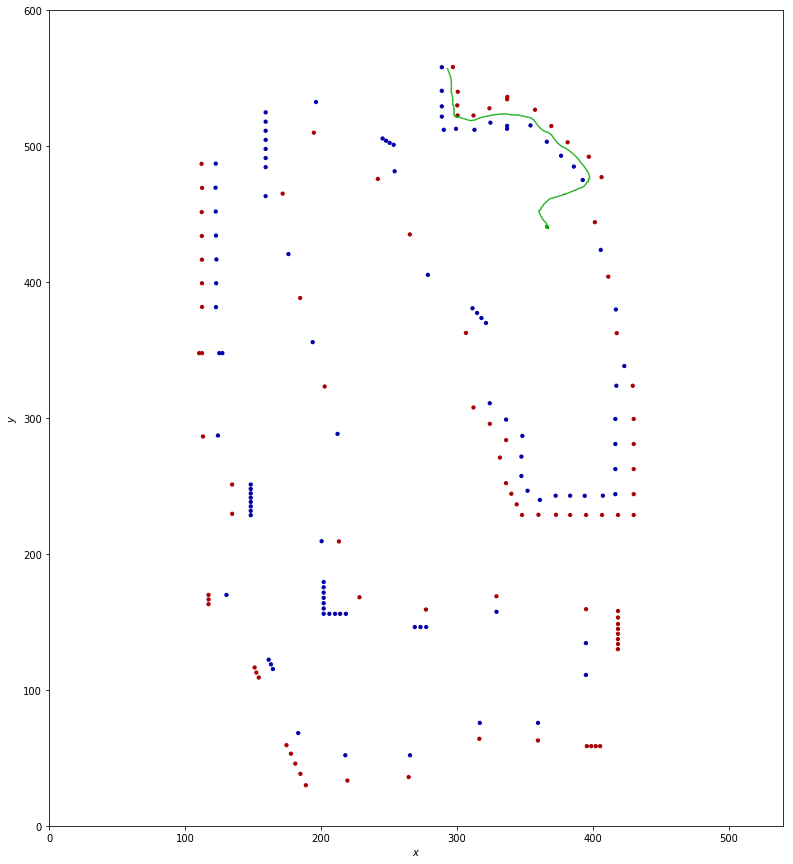

In [42]:

fig = plt.figure()
ax = fig.add_subplot(111)

# Add filled circles for the cones themselves
cone_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in cones:
    ax.add_artist(Circle(pos, 1.2, color=cone_colors[q>0]))
    
for pos in path:
     ax.add_artist(Circle(pos, 0.2, color='#00aa00'))
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(0,540)
ax.set_ylim(0,600)
ax.set_aspect('equal')
plt.show()

In [14]:
print((1,0),np.arctan2(1,0),np.arctan2(1,0)*180/np.pi)
print((0,1),np.arctan2(0,1)*180/np.pi)
print((-1,-0),np.arctan2(-1,0)*180/np.pi)
print((0.001,-1),np.arctan2(0.001,-1)*180/np.pi)
print((-0.001,-1),np.arctan2(-0.001,-1)*180/np.pi)

(1, 0) 1.57079632679 90.0
(0, 1) 0.0
(-1, 0) -90.0
(0.001, -1) 179.94270424
(-0.001, -1) -179.94270424


In [83]:
 # subset the cones to ones only within 'range'
    
cones = []




cones.append((1,(297.0,558.0)))   #Stage
cones.append((-1,(289,558.0)))   #Stage
cones.append((1,(337.0,534.6)))   #Start
cones.append((-1,(337.0497,515.0402)))   #Start
cones.append((1,(337.1997,536.4001)))   #
cones.append((1,(312.4497,536.4001)))   #
cones.append((1,(300.8997,539.4001)))   #
cones.append((1,(406.9497,521.4001)))   #
cones.append((1,(406.7997,511.0502)))   #


def isBetween(x, end1, end2):
    '''Return True if x is between the ends or equal to either.
    The ends do not need to be in increasing order.'''
    
    return end1 <= x <= end2 or end2 <= x <= end1

def add_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle + (sweep/2.0) < np.pi: 
        return angle + (sweep/2.0)
    else: 
        return angle + (sweep/2.0) - (2.0*np.pi)
    
def sub_angle_sweep(angle,sweep):
    '''Return xxx'''
    
    if angle - (sweep/2.0) > -np.pi: 
        return angle - (sweep/2.0)
    else: 
        return angle - (sweep/2.0) + (2.0*np.pi)
    
def angleIsBetween(Xpos,Ypos,angle,sweep,coords): 

    sweepadd = add_angle_sweep(angle,sweep)
    sweepsub = sub_angle_sweep(angle,sweep)

    if np.pi/2.0 >= angle >= -np.pi/2.0:
        #print(angle, 'Between -90 and 90')
        if sweep < np.pi:
            #print(angle, 'little sweep')  
            return isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        else:
            #print(angle, 'Big sweep')
            return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
    else:
        #print(angle, 'Not between -90 and 90')
        return not isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),add_angle_sweep(angle,sweep),sub_angle_sweep(angle,sweep))
        
        


Xpos = 293.0
Ypos = 558.0
angle = -np.pi/2.0
print(angle, angle*180/np.pi)
dist1 = 20.0**2.0

sweep1 = np.pi/1.8*2.0
print('sweep1',sweep1, sweep1*180/np.pi)
dist2 = 150**2.0

sweep2 = np.pi/8.0*2.0
print('sweep2',sweep2, sweep2*180/np.pi)

for dir, coords in cones:
    print(' ')
    print(dir, coords)
    print(coords[0]-Xpos, coords[1]-Ypos)
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) , dist1 )
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1 )
    print('angle+sweep1',angle+sweep1)
    
    sweep1p = add_angle_sweep(angle,sweep1) 
    print('sweep1p',sweep1p*180/np.pi)    
    
    sweep1n = sub_angle_sweep(angle,sweep1) 
    print('sweep1n',sweep1n*180/np.pi) 
    
   
        
    print((sweep1p*180.0/np.pi , np.arctan2( coords[1]-Ypos,coords[0]-Xpos)*180.0/np.pi , sweep1n*180.0/np.pi))
    #print((sweep1p > np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > sweep1n))
    print((isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),sweep1p,sweep1n)))
    
    
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) , dist2)
    print(((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2)
    
    print('angle+sweep2',angle+sweep2)
    
    sweep2p = add_angle_sweep(angle,sweep2) 
    print('sweep2p',sweep2p*180/np.pi)    
    
    sweep2n = sub_angle_sweep(angle,sweep2) 
    print('sweep2n',sweep2n*180/np.pi) 
    
    print(sweep2p*180.0/np.pi ,  np.arctan2( coords[1]-Ypos,coords[0]-Xpos)*180.0/np.pi , sweep2n*180.0/np.pi)
    #print(angle+sweep2 >  np.arctan2( coords[1]-Ypos,coords[0]-Xpos) > angle-sweep2)
    print((isBetween(np.arctan2( coords[1]-Ypos,coords[0]-Xpos),sweep2p,sweep2n)))
    print((((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist1) 
          and (angleIsBetween(Xpos,Ypos,angle,sweep1,coords)) 
          or (((Xpos-coords[0])**2 + (Ypos-coords[1])**2) < dist2) 
          and (angleIsBetween(Xpos,Ypos,angle,sweep2,coords)))
    print(angleIsBetween(Xpos,Ypos,angle,sweep1,coords))
    print(angleIsBetween(Xpos,Ypos,angle,sweep2,coords))
   
        

-1.5707963267948966 -90.0
sweep1 3.490658503988659 200.0
sweep2 0.7853981633974483 45.0
 
1 (297.0, 558.0)
4.0 0.0
16.0 400.0
True
angle+sweep1 1.9198621771937625
sweep1p 10.000000000000002
sweep1n 170.0
(10.000000000000002, 0.0, 170.0)
False
16.0 22500.0
True
angle+sweep2 -0.7853981633974483
sweep2p -67.5
sweep2n -112.5
-67.5 0.0 -112.5
False
True
True
False
 
-1 (289, 558.0)
-4.0 0.0
16.0 400.0
True
angle+sweep1 1.9198621771937625
sweep1p 10.000000000000002
sweep1n 170.0
(10.000000000000002, 180.0, 170.0)
False
16.0 22500.0
True
angle+sweep2 -0.7853981633974483
sweep2p -67.5
sweep2n -112.5
-67.5 180.0 -112.5
False
True
True
False
 
1 (337.0, 534.6)
44.0 -23.399999999999977
2483.559999999999 400.0
False
angle+sweep1 1.9198621771937625
sweep1p 10.000000000000002
sweep1n 170.0
(10.000000000000002, -28.004857388043625, 170.0)
False
2483.559999999999 22500.0
True
angle+sweep2 -0.7853981633974483
sweep2p -67.5
sweep2n -112.5
-67.5 -28.004857388 -112.5
False
False
True
False
 
-1 (337.0497,

In [72]:
a = True
b = False

print (a, b, not a, not b)

True False False True
